# Quotation densities across narrative time (all articles)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sqlalchemy import func

from quotes.models import ChadhNovel, BPOArticle, Alignment
from quotes.services import session

In [3]:
from joblib import Memory

from quotes.models import BPOArticle

mem = Memory('cache')

bpo_year_lens = mem.cache(BPOArticle.year_lengths)()

In [4]:
scores = []
for novel in ChadhNovel.query.all():

    bpo_len = 0
    for year in range(novel.year, novel.year+11):
        bpo_len += bpo_year_lens[year]
        
    alignment_len = (
        session
        .query(func.sum(Alignment.size))
        .join(BPOArticle)
        .filter(
            Alignment.a_id == novel.id,
            Alignment.size >= 5,
        )
        .scalar()
    )
    
    if alignment_len:
        score = alignment_len / bpo_len
        scores.append((novel.slug, score))
        
scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [5]:
from quotes.text import Text

def plot_chadh_histogram(slug):
    
    novel = ChadhNovel.query.filter_by(slug=slug).one()
    
    alignments = (
        Alignment.query
        .join(BPOArticle)
        .filter(
            Alignment.a_id == novel.id,
            Alignment.size >= 5,
        )
    )
    
    quoted = []
    for a in alignments:
        quoted += range(a.a_start, a.a_start + a.size)

    text = Text(novel.text)
    
    plt.figure(figsize=(20, 5))
    plt.xlim((0, len(text.tokens)))

    n, bins, patches = plt.hist(
        quoted,
        range=(0, len(text.tokens)),
        bins=500,
        edgecolor='none',
        color='green',
    )

    print(novel.slug)
    plt.show()

Chadwyck_British_1863_Reade_HardCashA


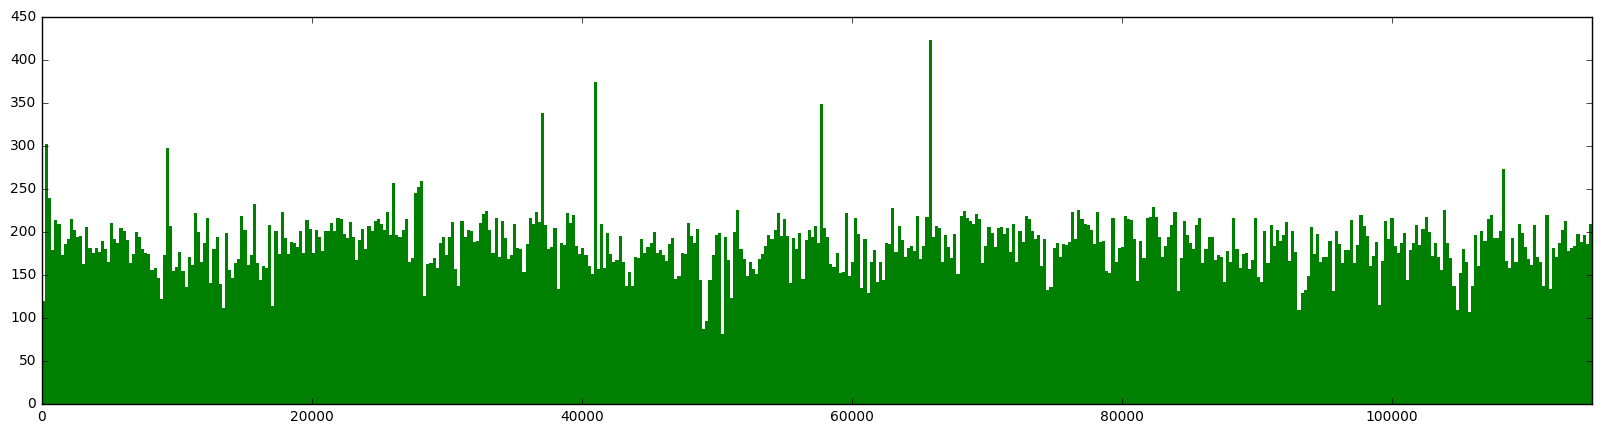

Chadwyck_British_1862_Collins_NoNameBy


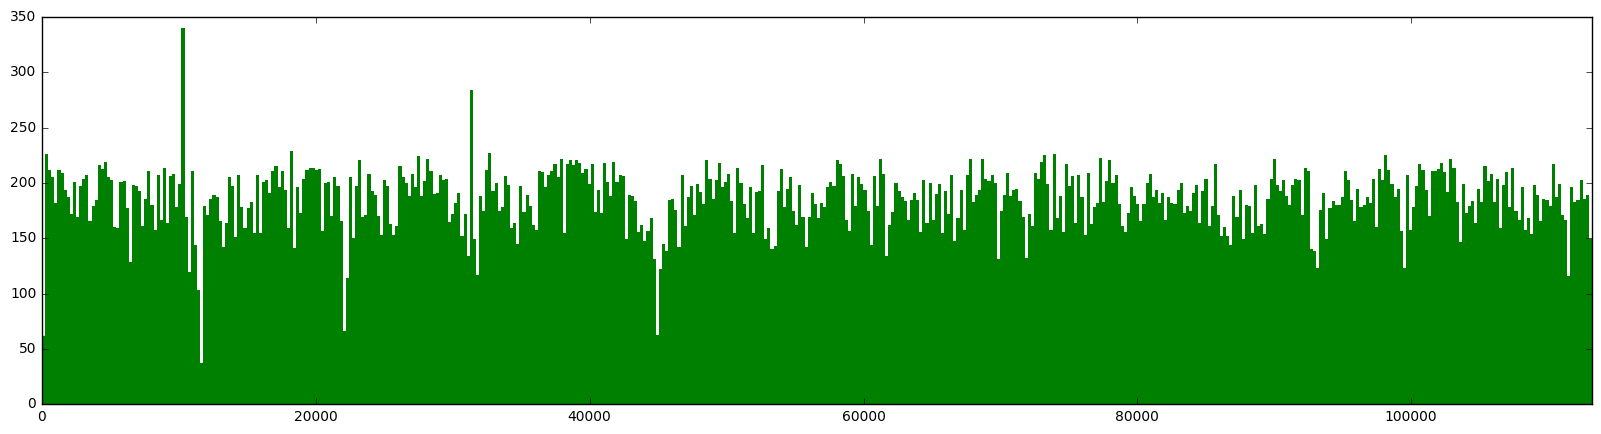

Chadwyck_British_1839_Ainsworth_JackSheppardA


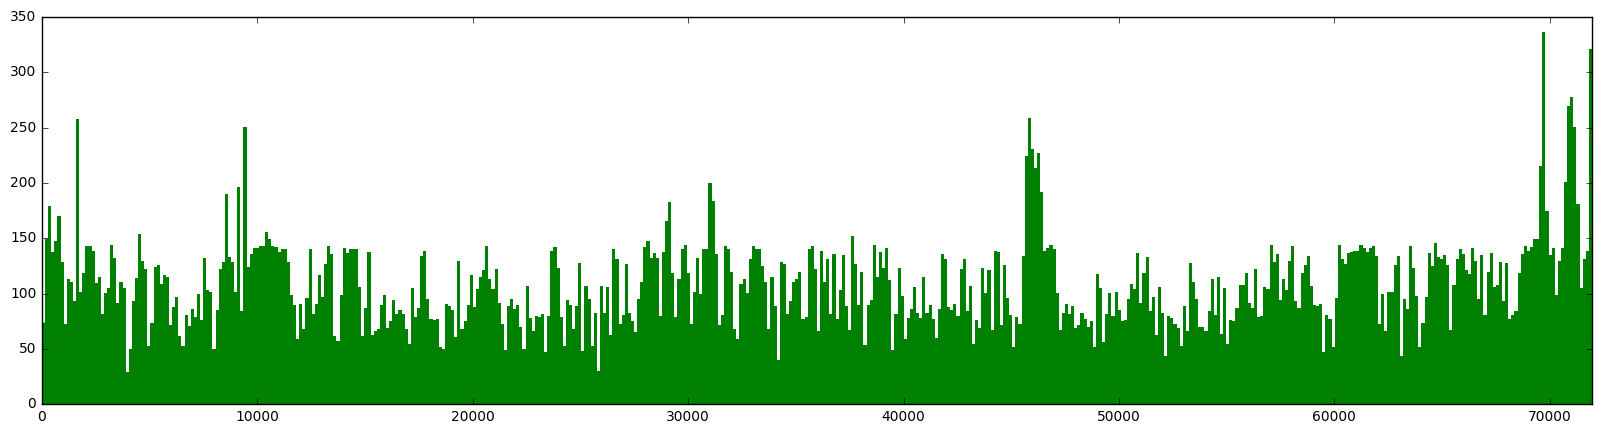

Chadwyck_British_1850_Bell_TheLadderof


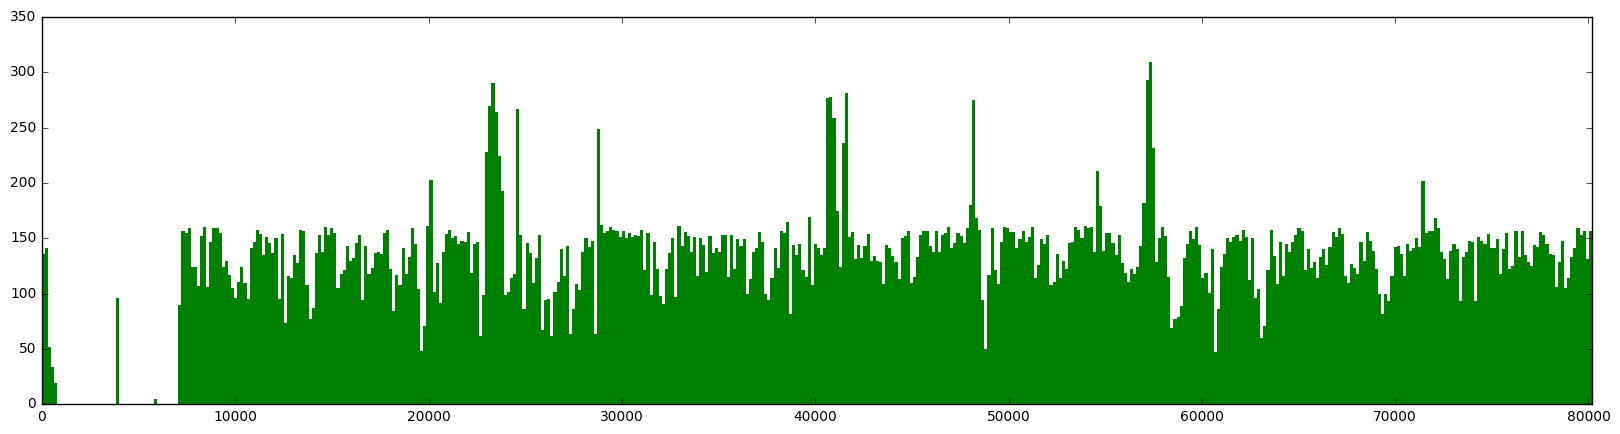

Chadwyck_British_1838_Dickens_OliverTwistor


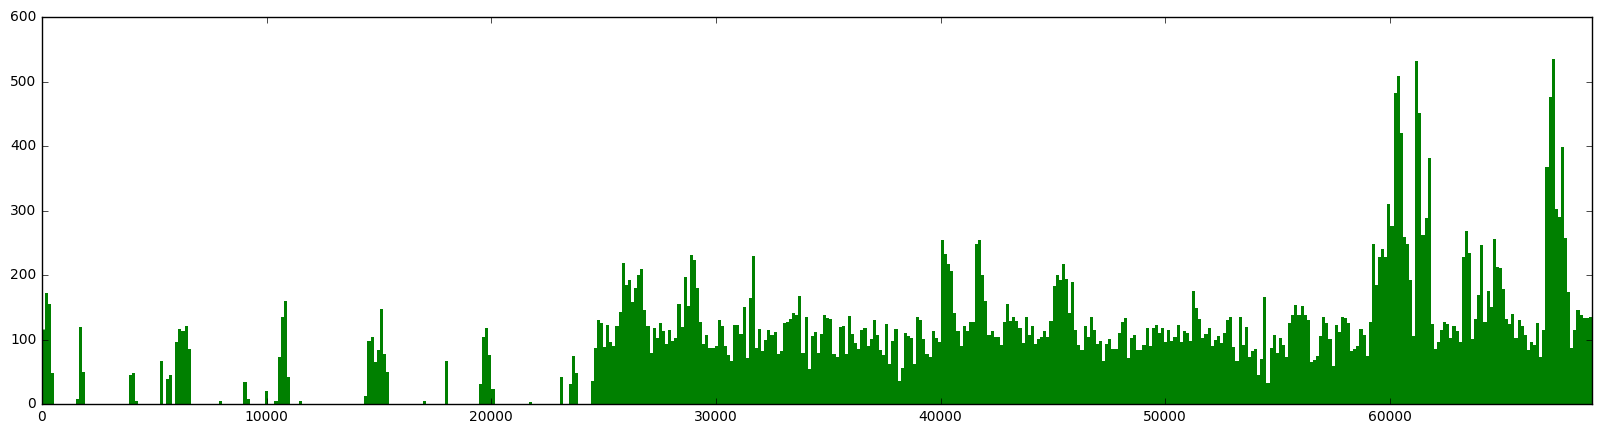

Chadwyck_British_1868_Collins_TheMoonstoneA


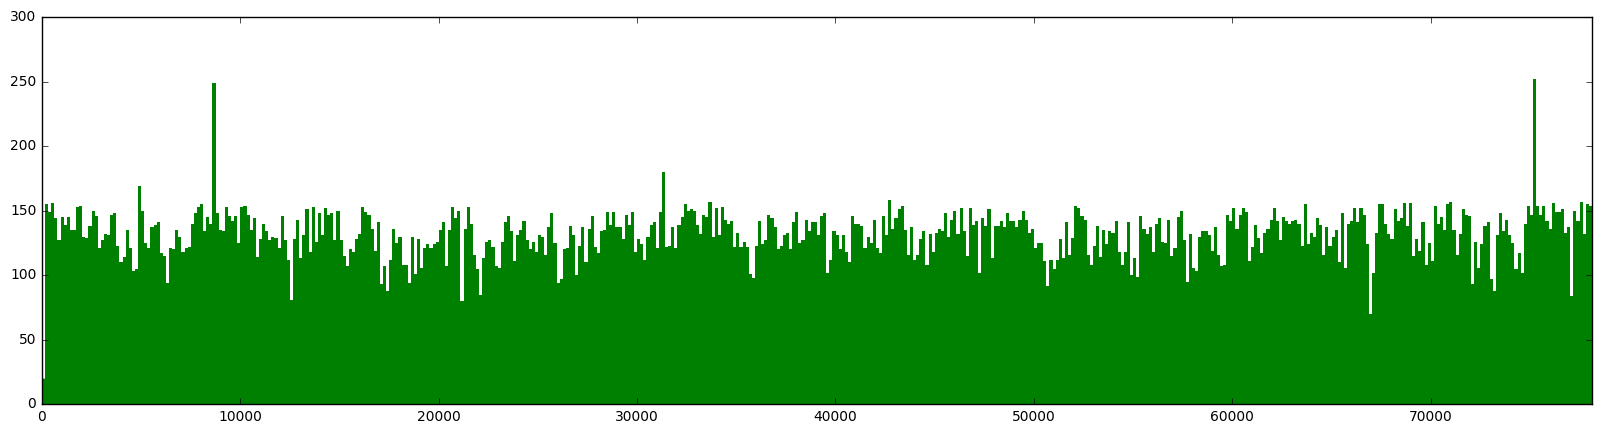

Chadwyck_British_1884_Besant_DorothyForstera


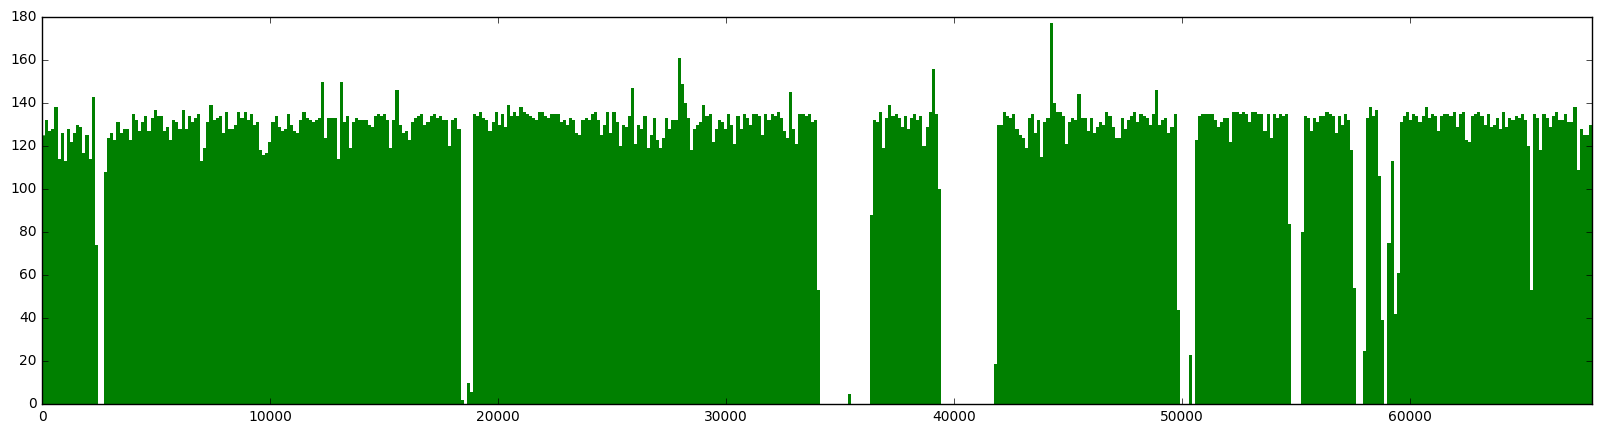

Chadwyck_British_1862_Braddon_LadyAudleySecret


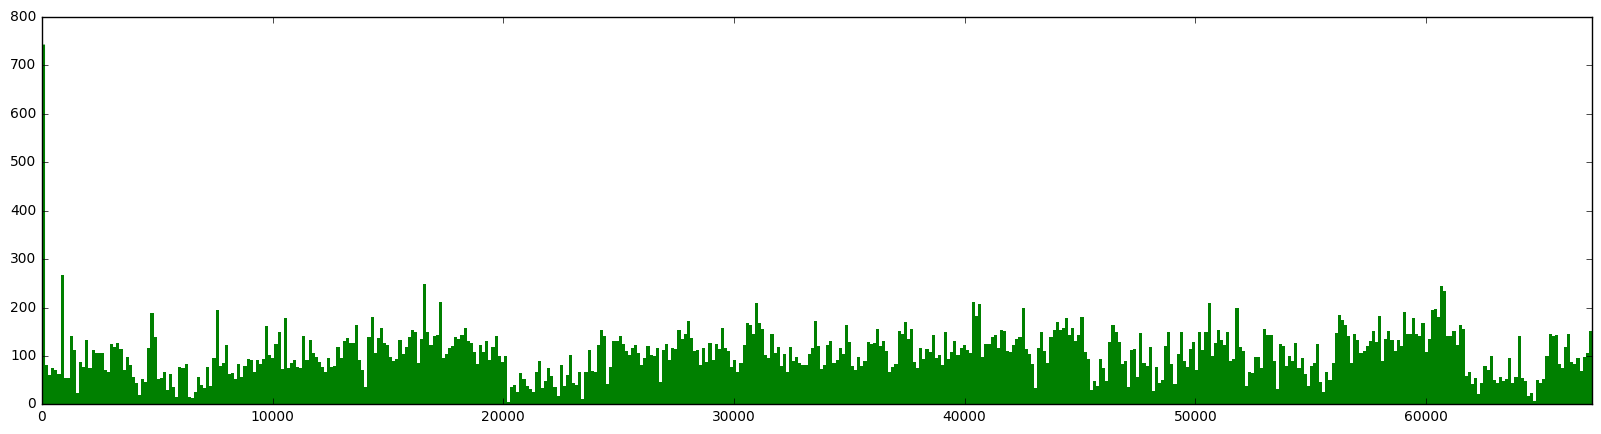

Chadwyck_Irish_1864_Le Fanu_UncleSilasA


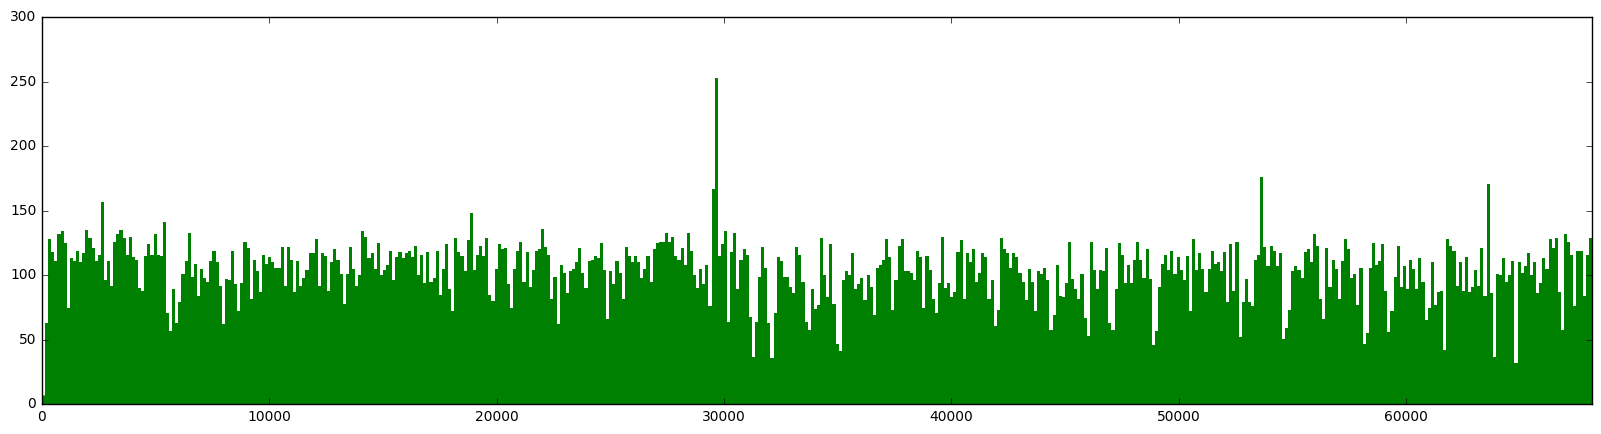

Chadwyck_British_1859_Collins_TheWomanin


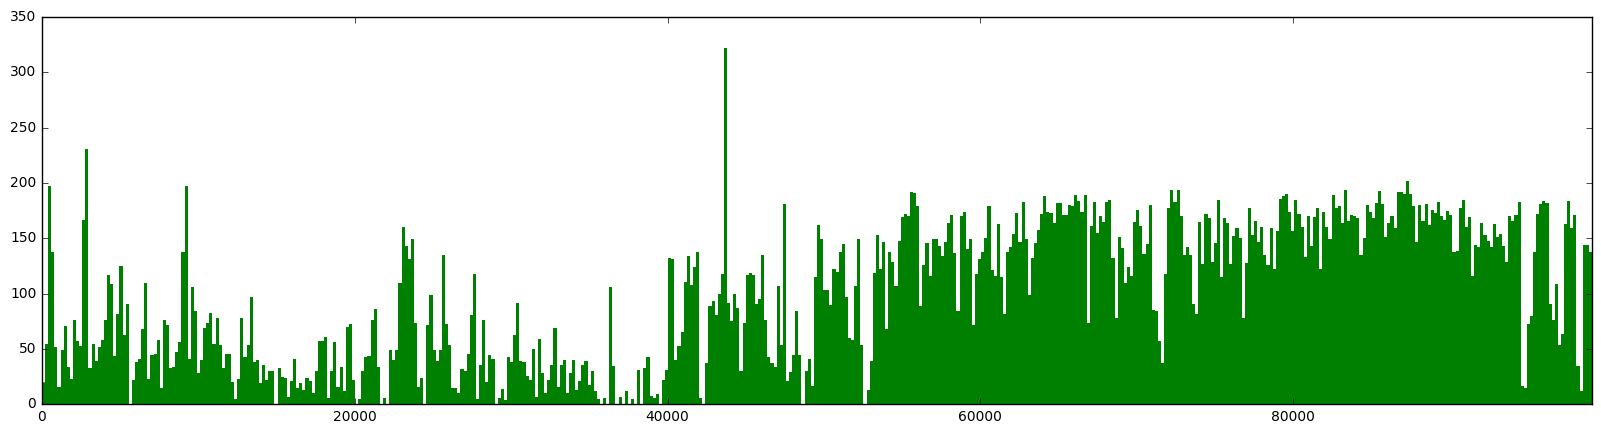

Chadwyck_British_1861_Dickens_GreatExpectationsBy


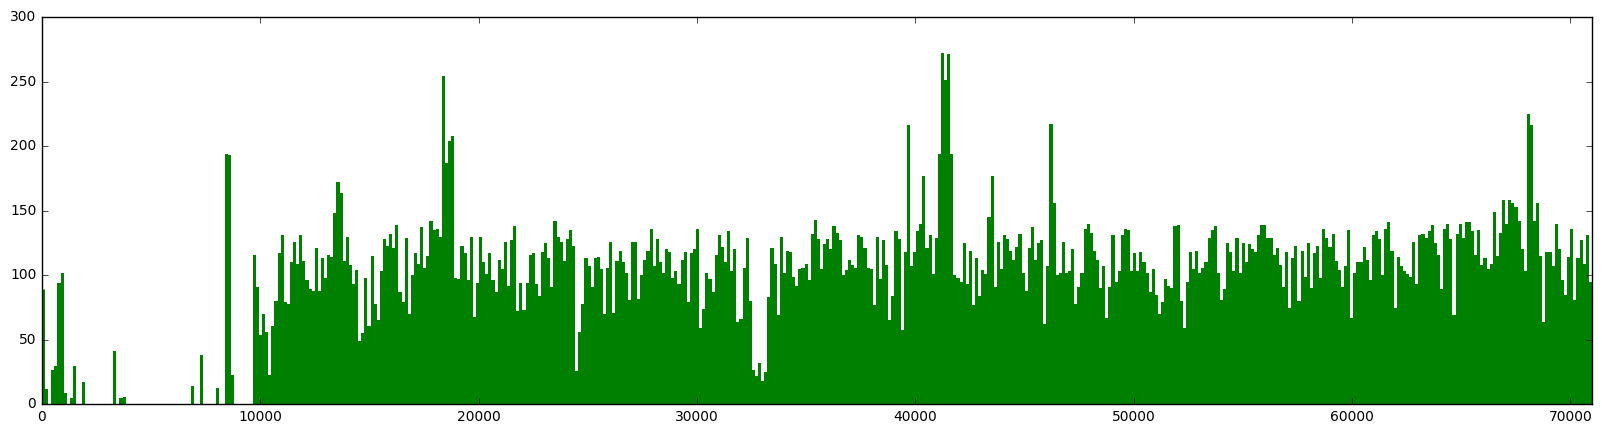

Chadwyck_British_1819_Scott_IvanhoeARomance


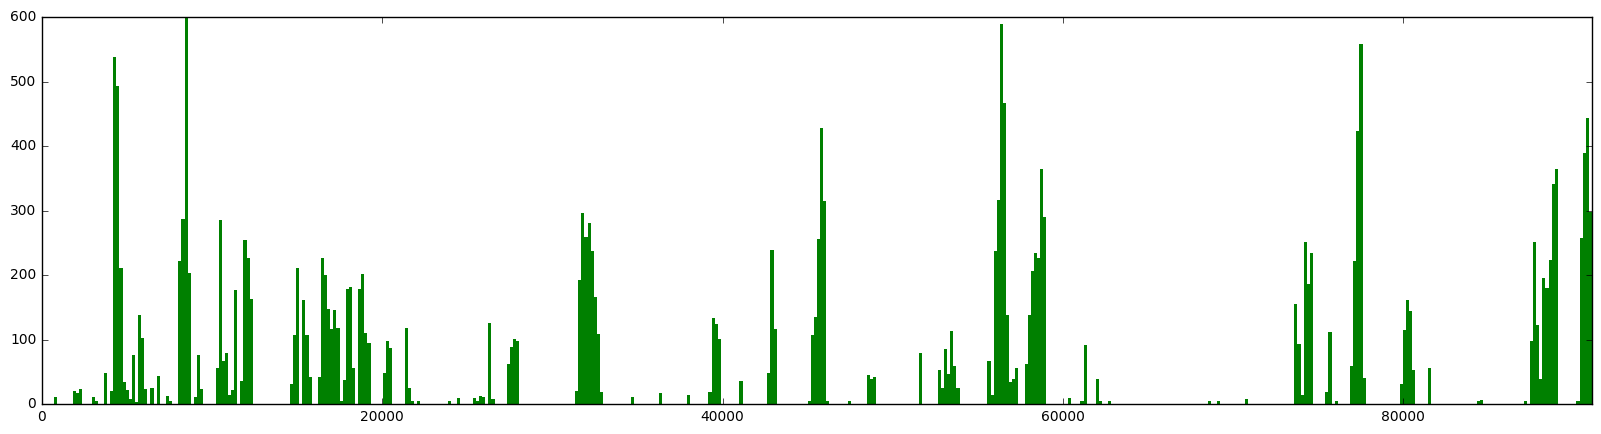

Chadwyck_British_1874_Hardy_Farfromthe


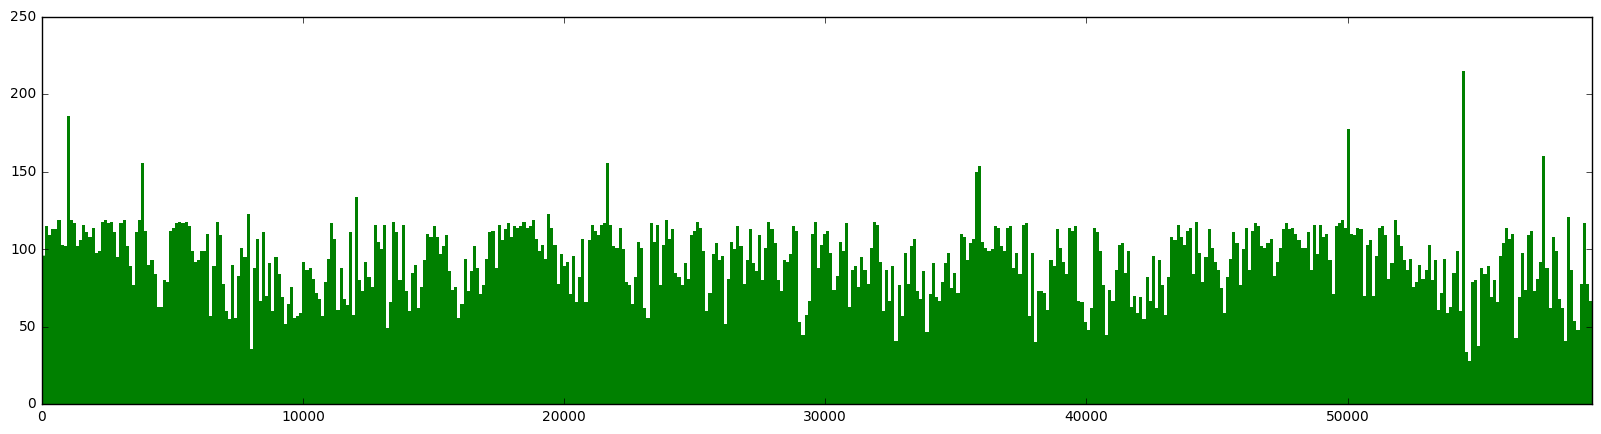

Chadwyck_British_1883_Broughton_BelindaANovel


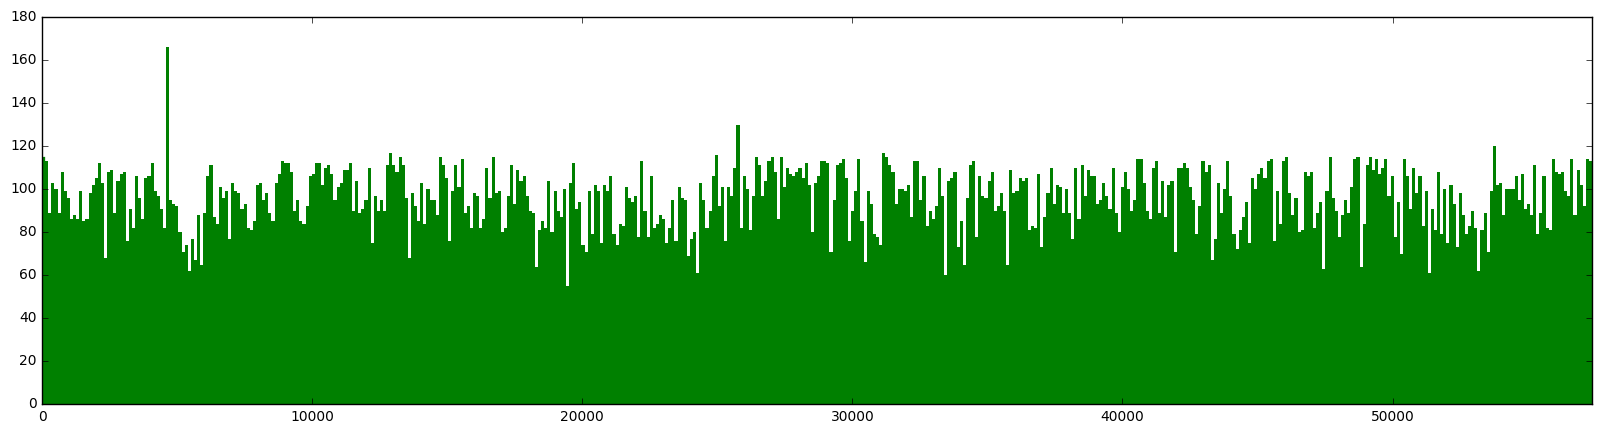

Chadwyck_British_1878_Hardy_TheReturnof


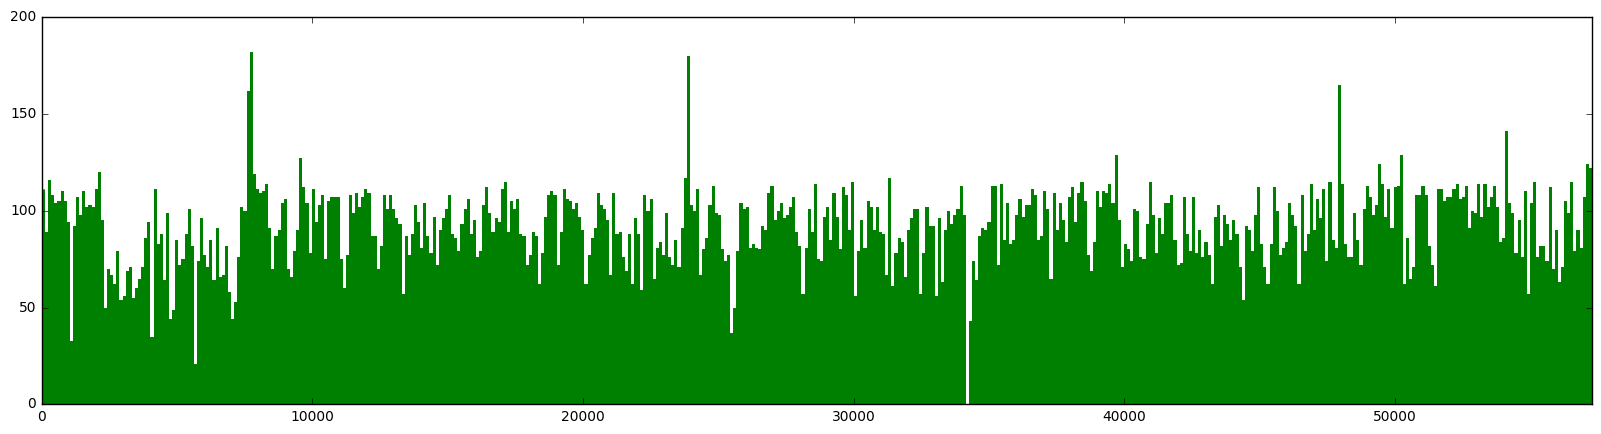

Chadwyck_British_1891_Hardy_Tessofthe


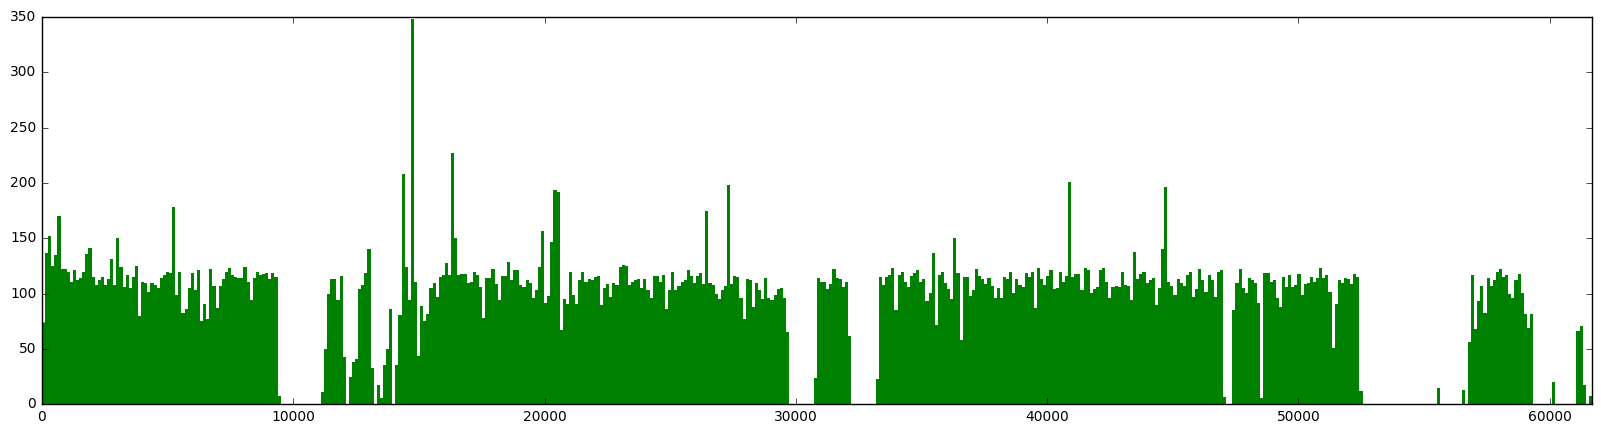

Chadwyck_British_1880_Trollope_TheDukeChildren


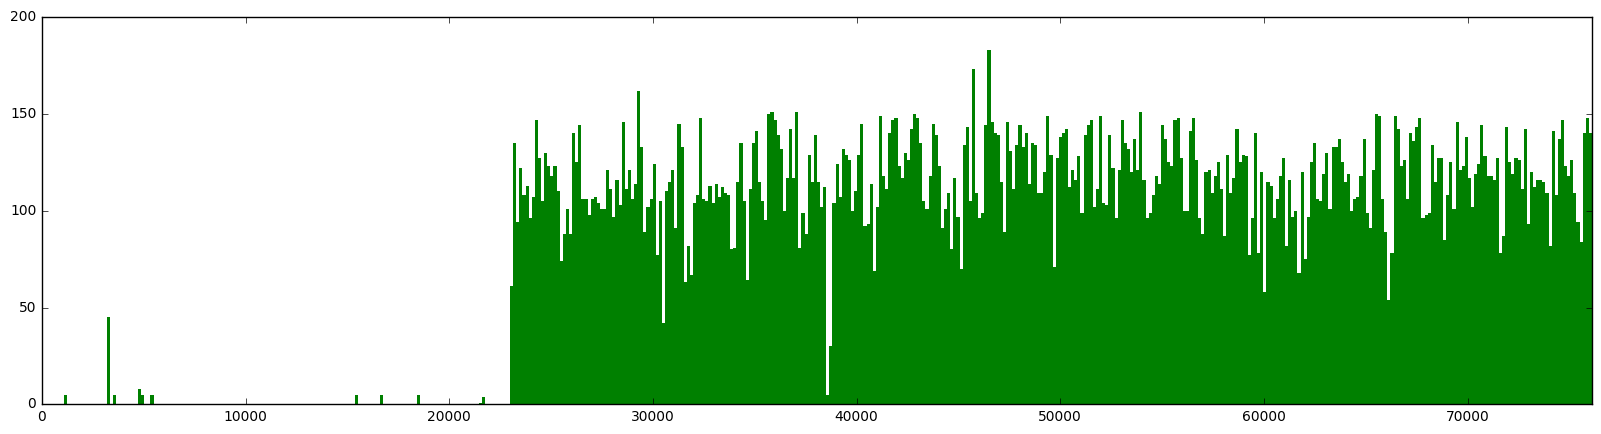

Chadwyck_British_1863_Eliot_RomolaByGeorge


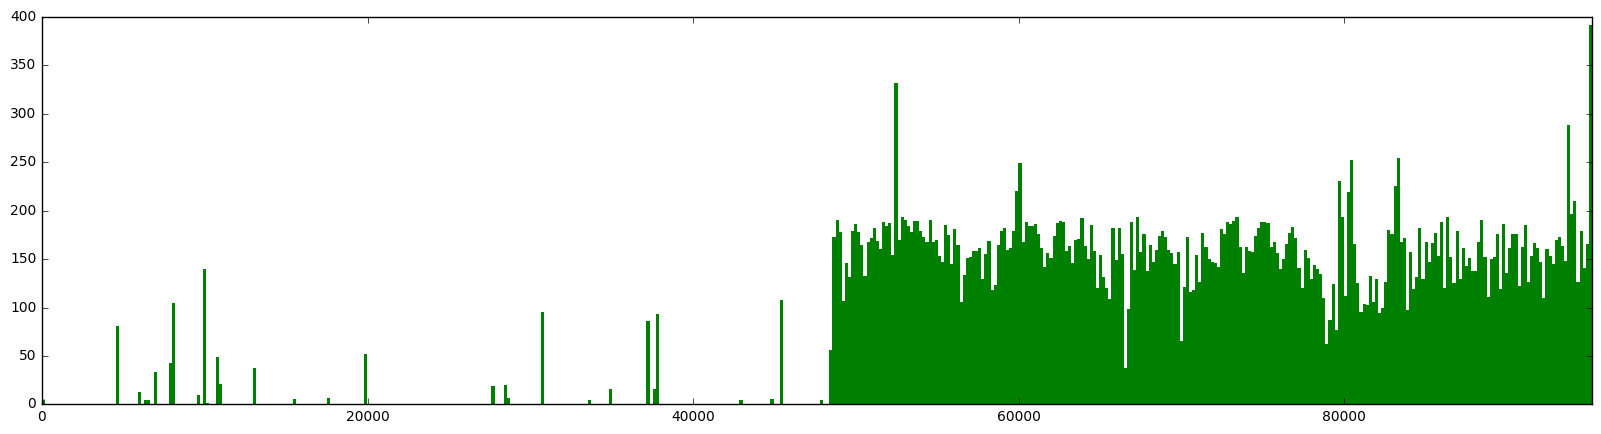

Chadwyck_British_1886_Hardy_TheMayorof


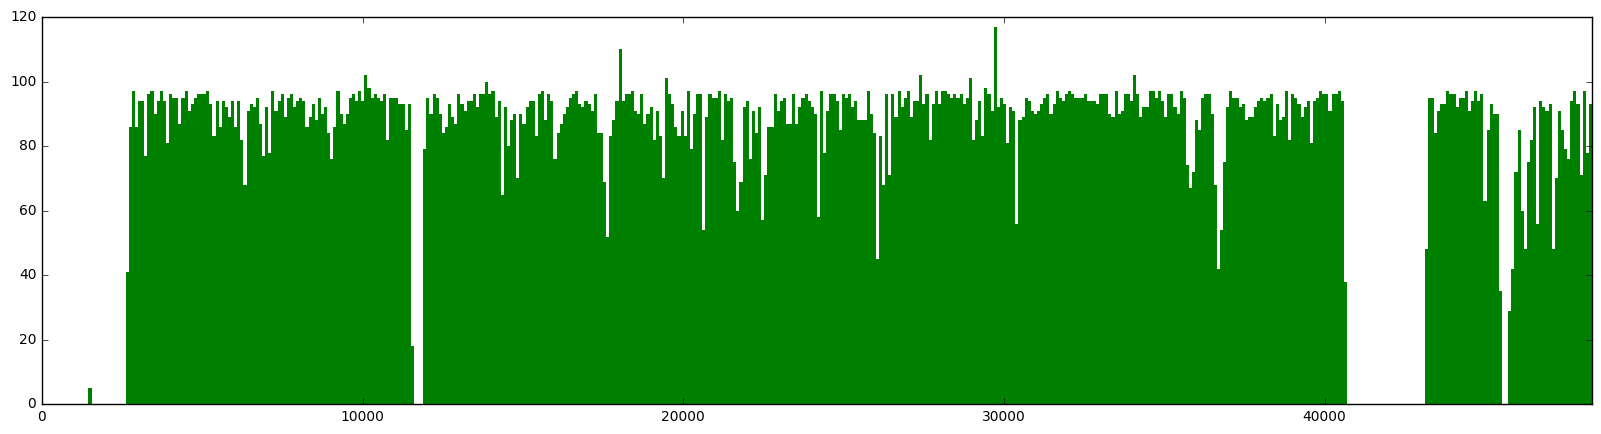

Chadwyck_British_1854_Dickens_HardTimesFor


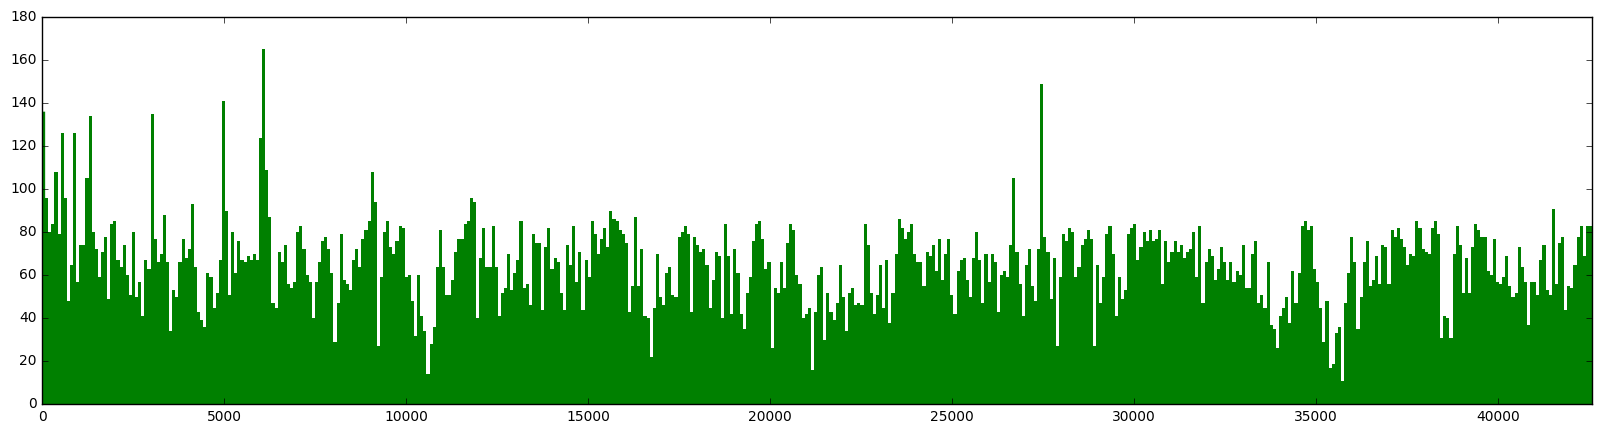

Chadwyck_British_1880_Hardy_TheTrumpet-MajorA


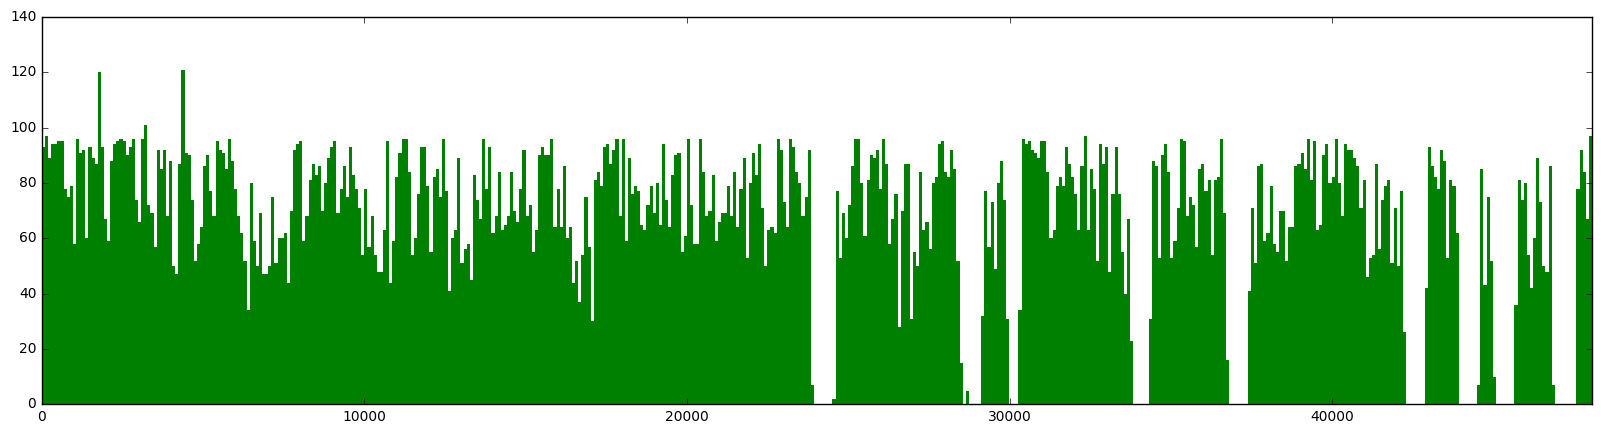

Chadwyck_British_1862_Thackeray_TheAdventuresof


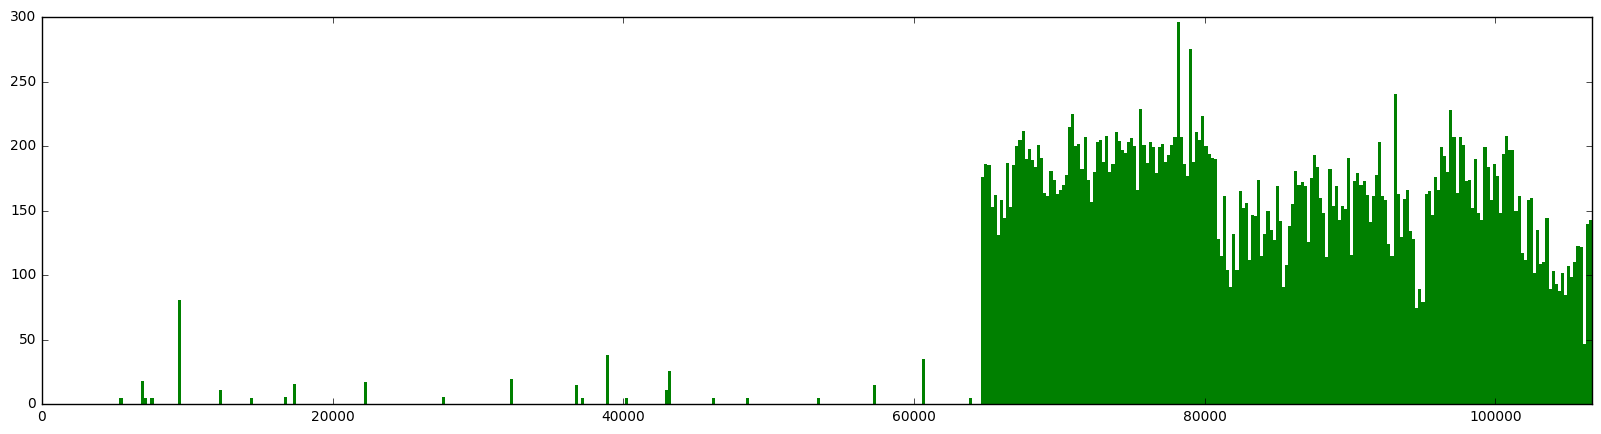

Chadwyck_British_1814_Scott_WaverleyorTis


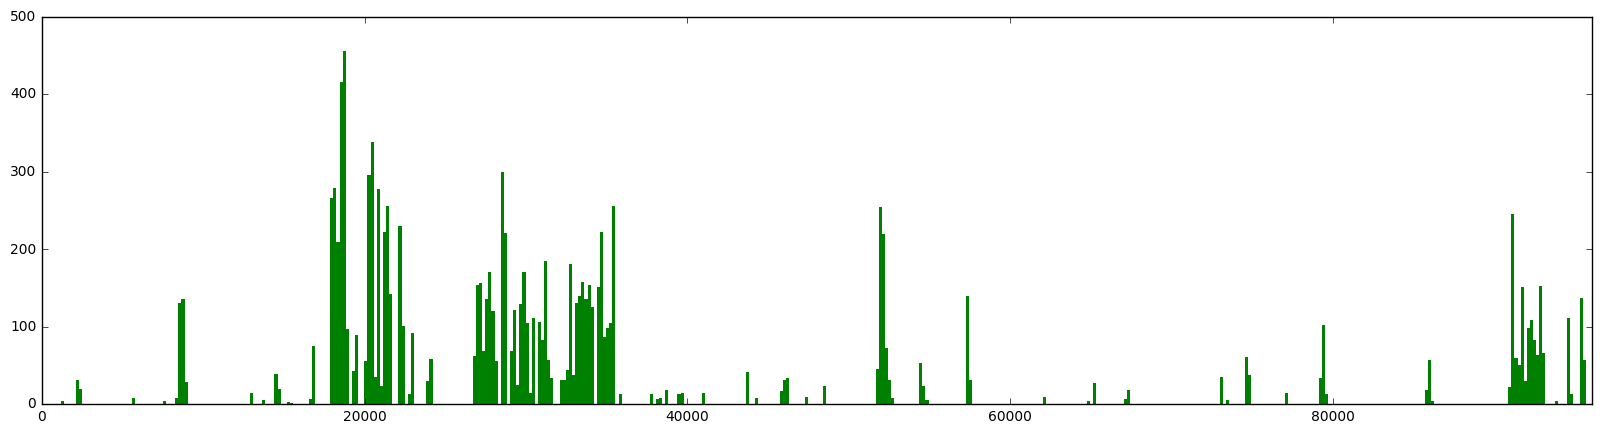

Chadwyck_British_1861_Wood_EastLynneBy


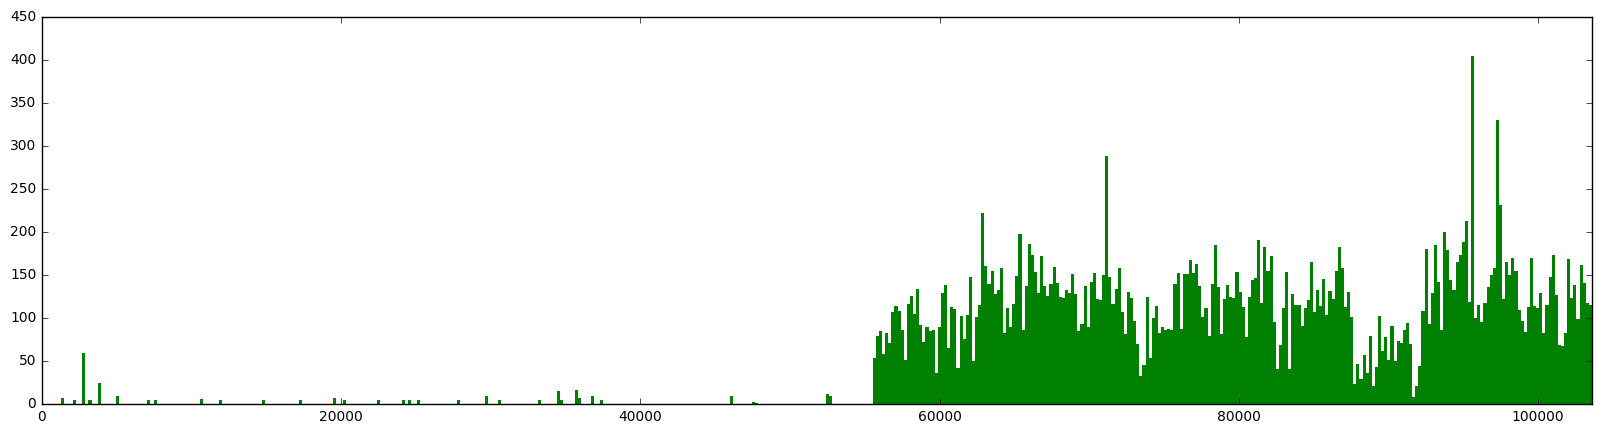

Chadwyck_British_1821_Scott_Kenilworthinthe


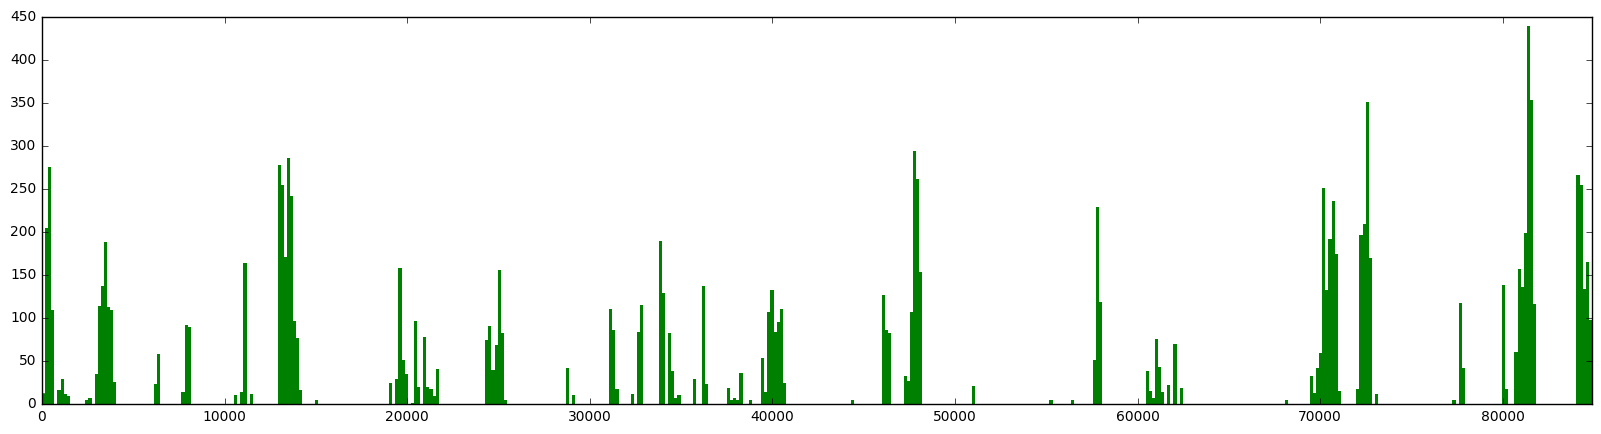

Chadwyck_British_1817_Scott_RobRoyin


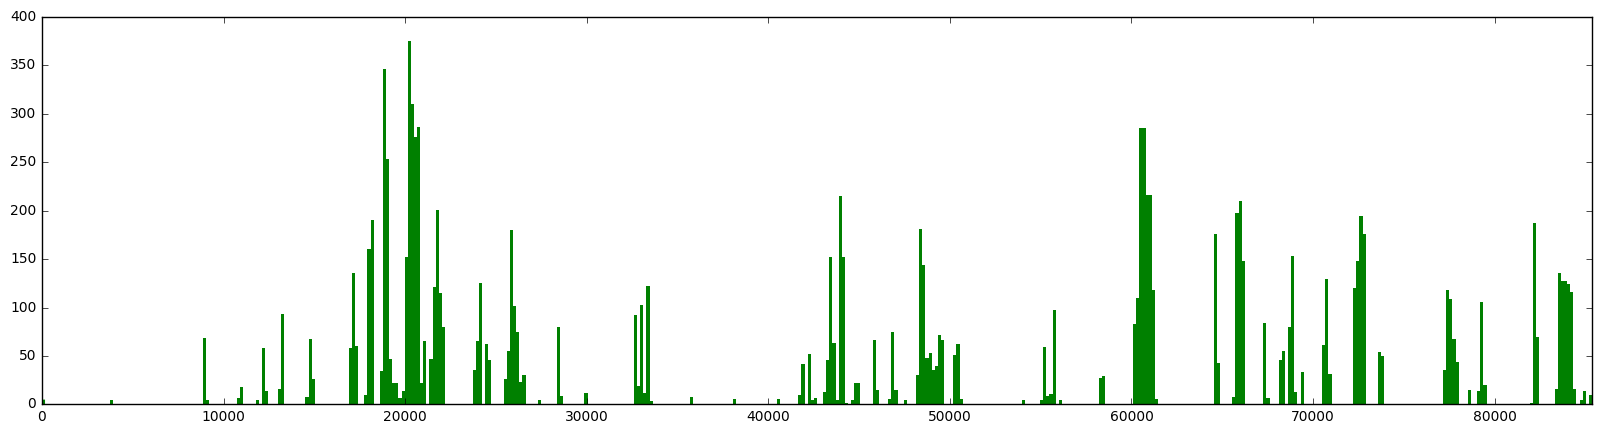

Chadwyck_British_1873_Hardy_APairof


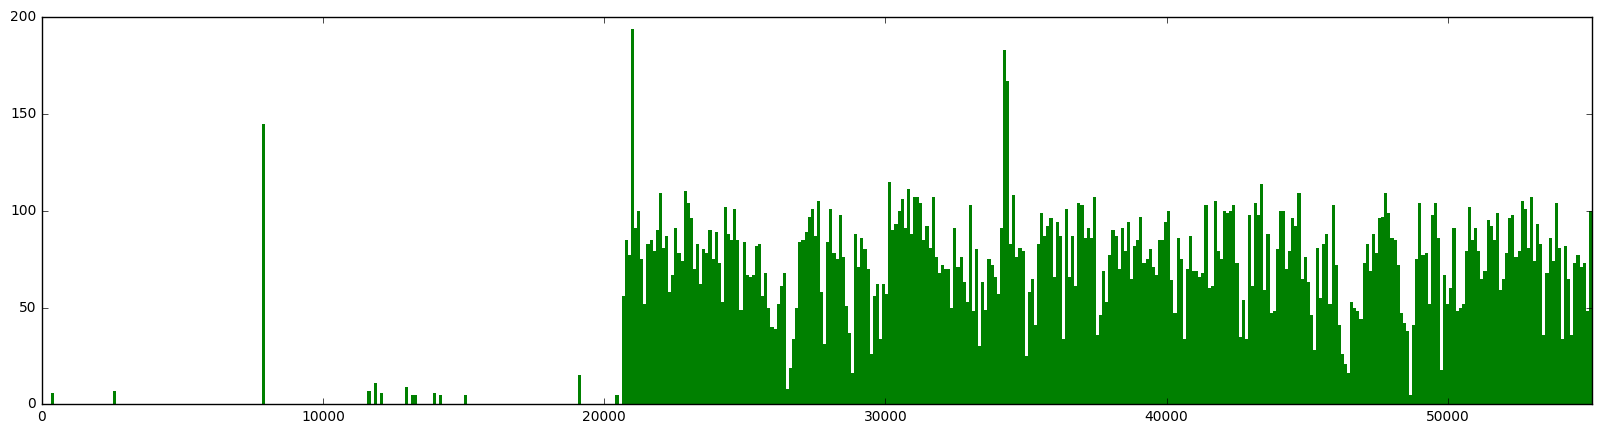

Chadwyck_British_1840_Thackeray_AShabbyGenteel


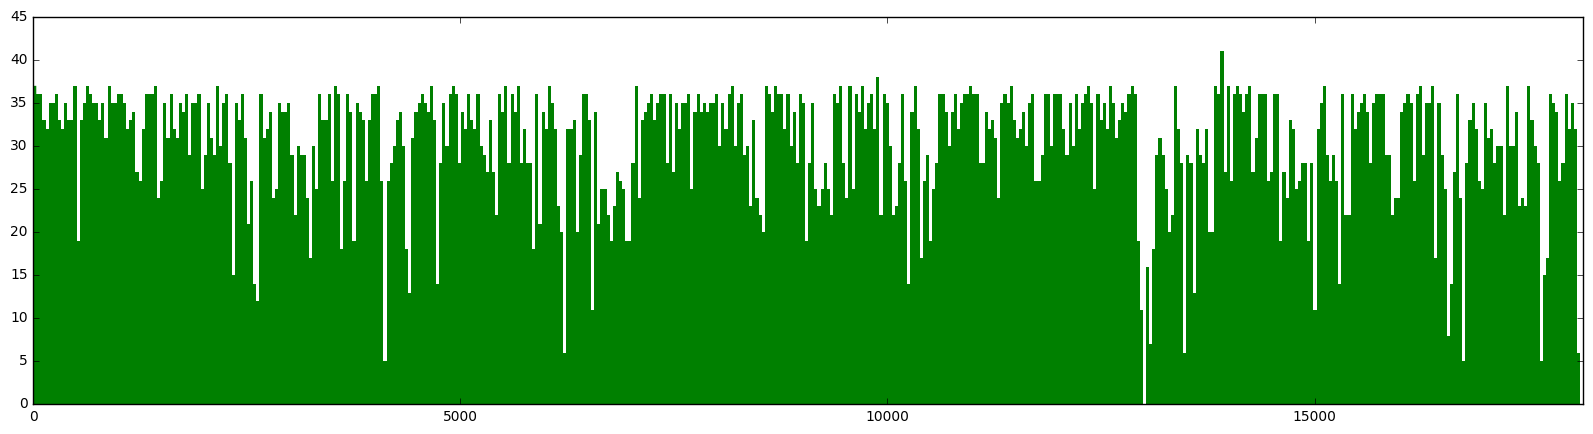

Chadwyck_British_1816_Scott_OldMortalityin


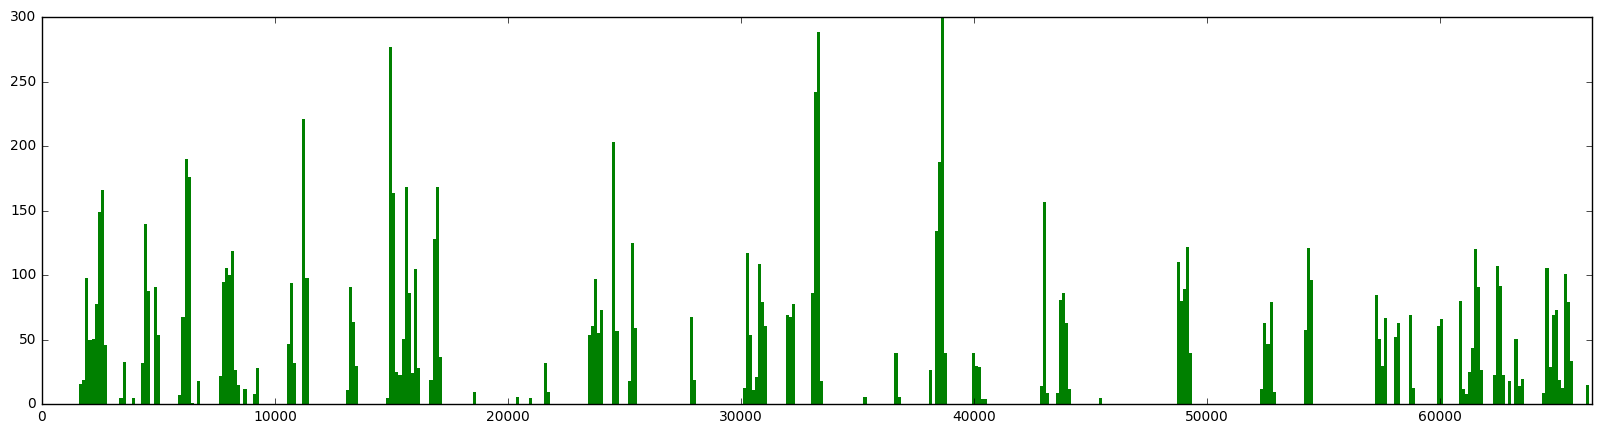

Chadwyck_British_1891_Meredith_OneofOur


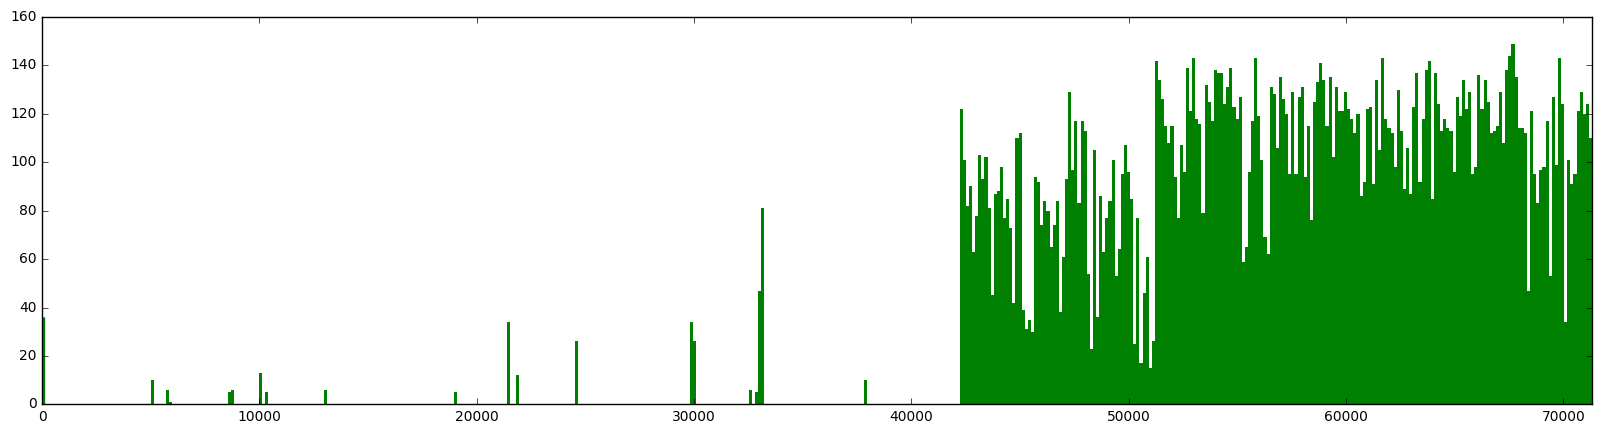

Chadwyck_British_1866_Collins_ArmadaleByWilkie


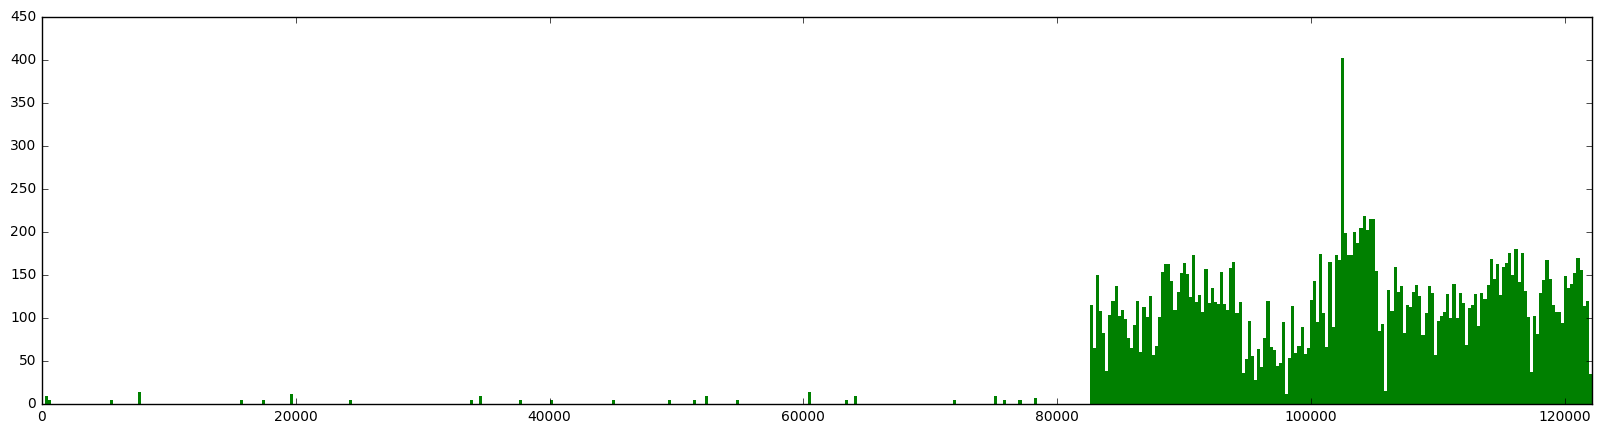

Chadwyck_British_1819_Scott_TheBrideof


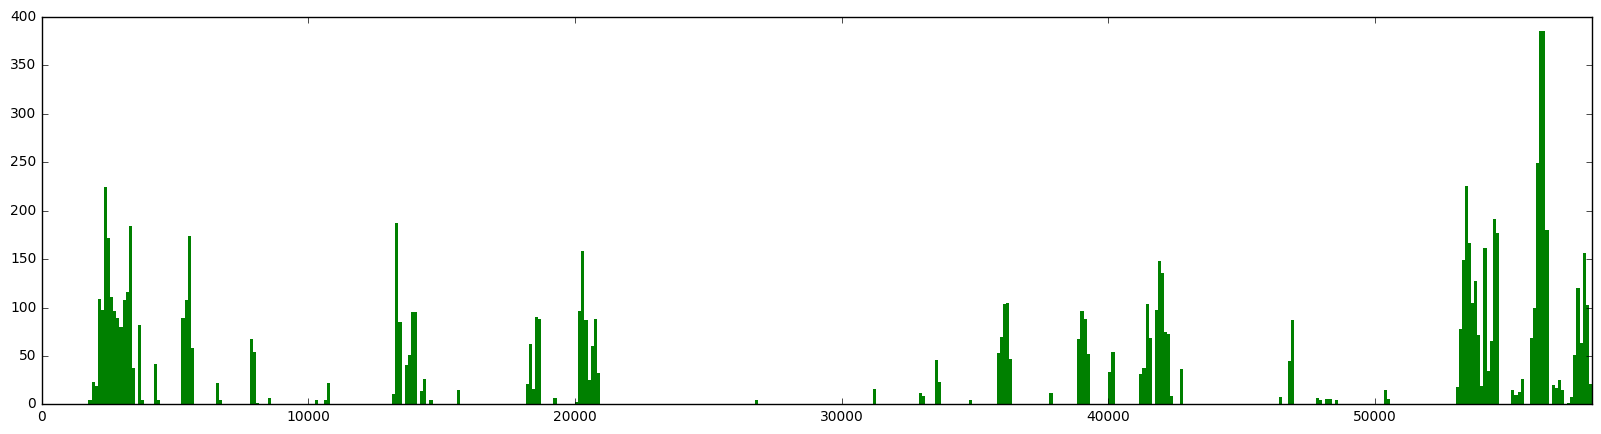

Chadwyck_British_1824_Scott_Redgauntletinthe


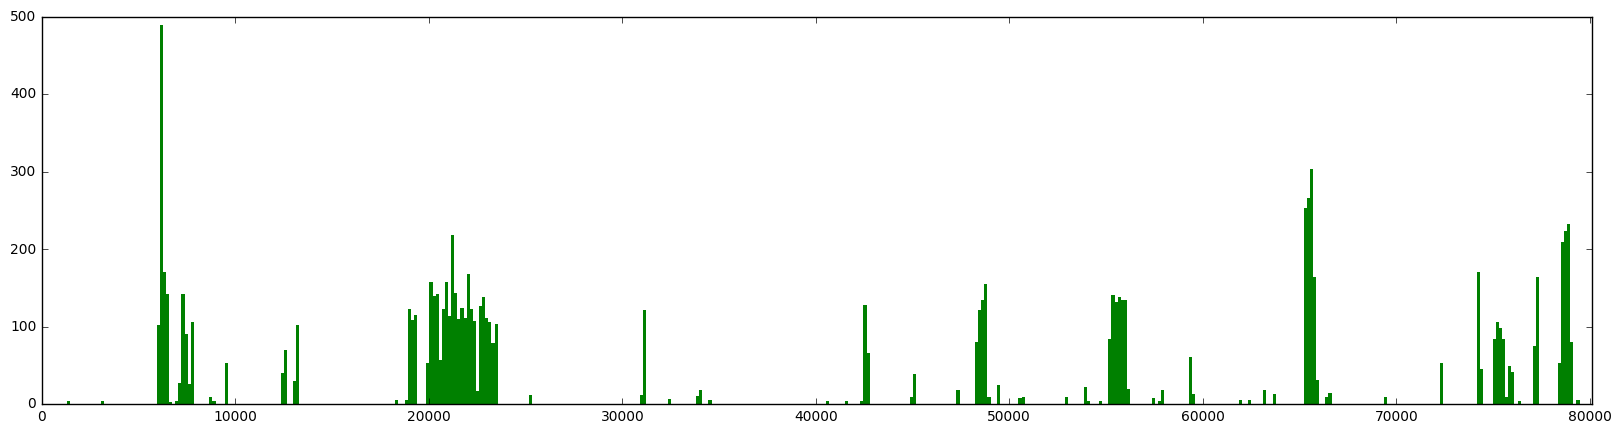

Chadwyck_British_1878_Payn_ByProxyBy


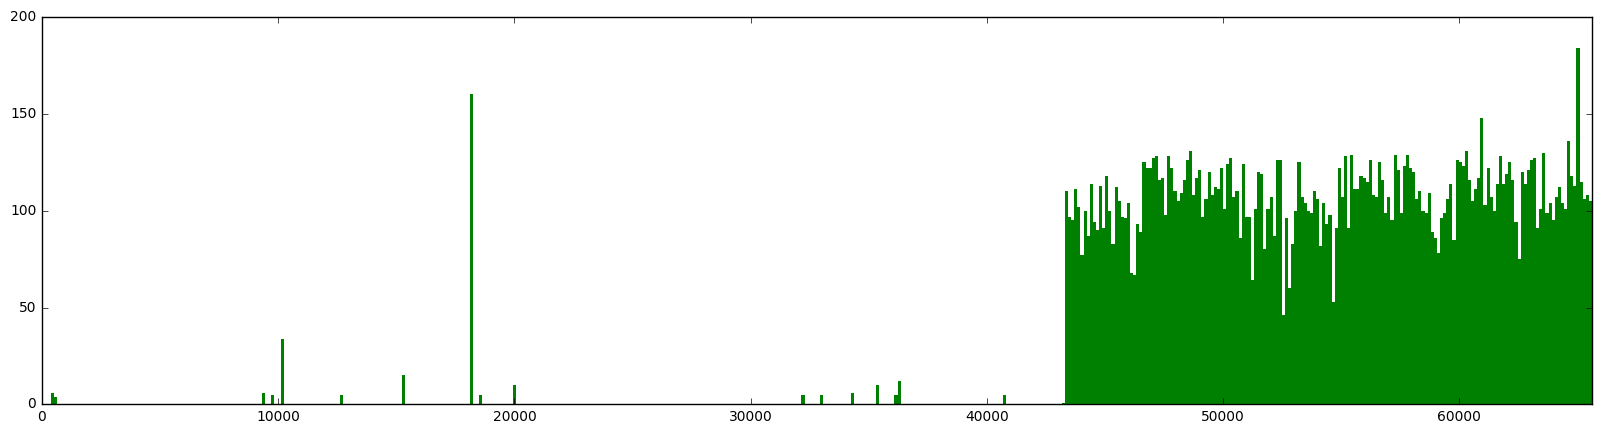

Chadwyck_British_1809_More_CoelebsinSearch


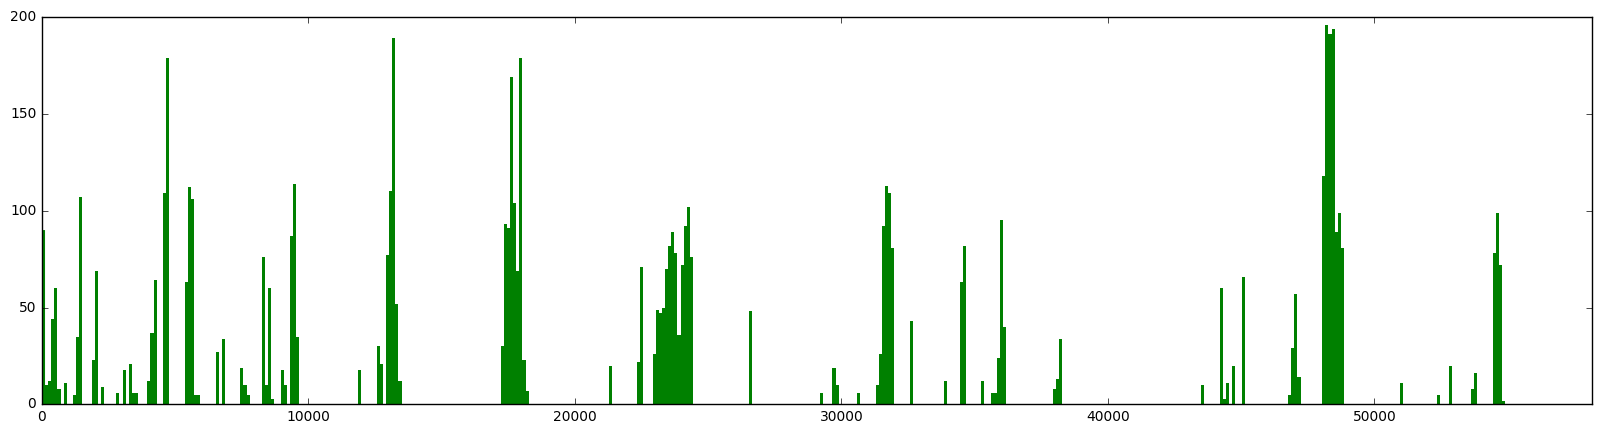

Chadwyck_British_1859_Dickens_ATaleof


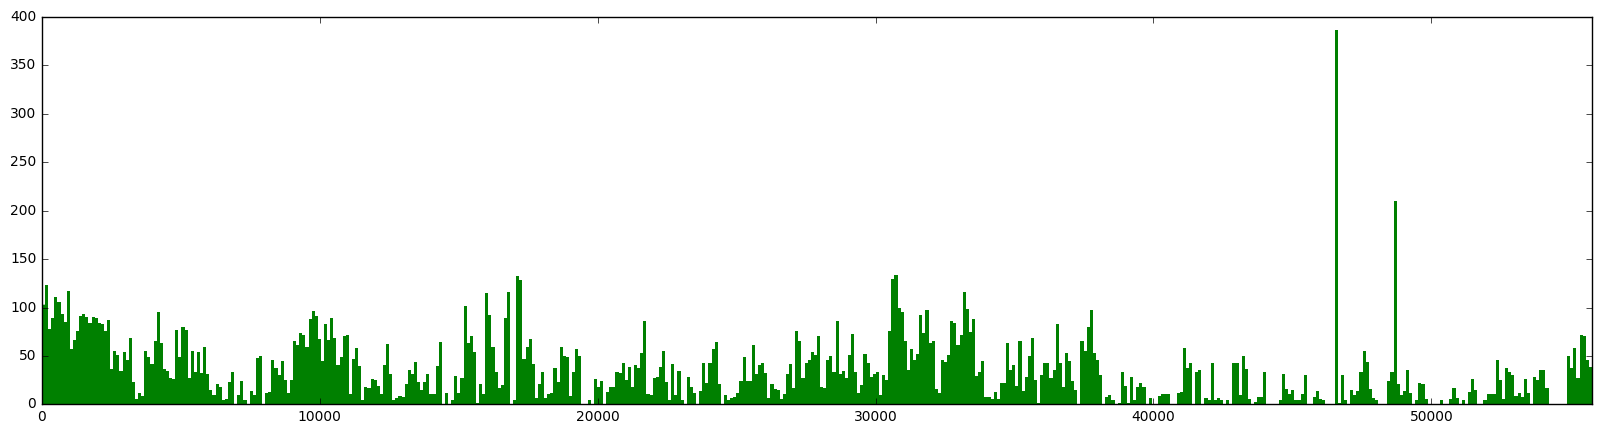

Chadwyck_British_1823_Scott_QuentinDurwardin


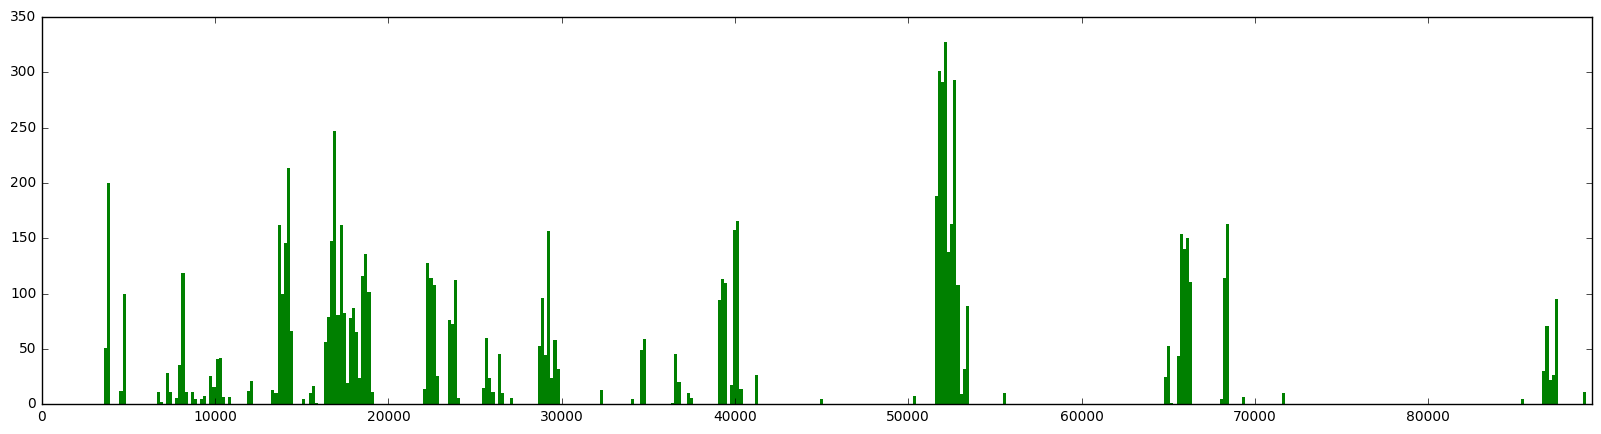

Chadwyck_British_1861_Trollope_FramleyPassonageBy


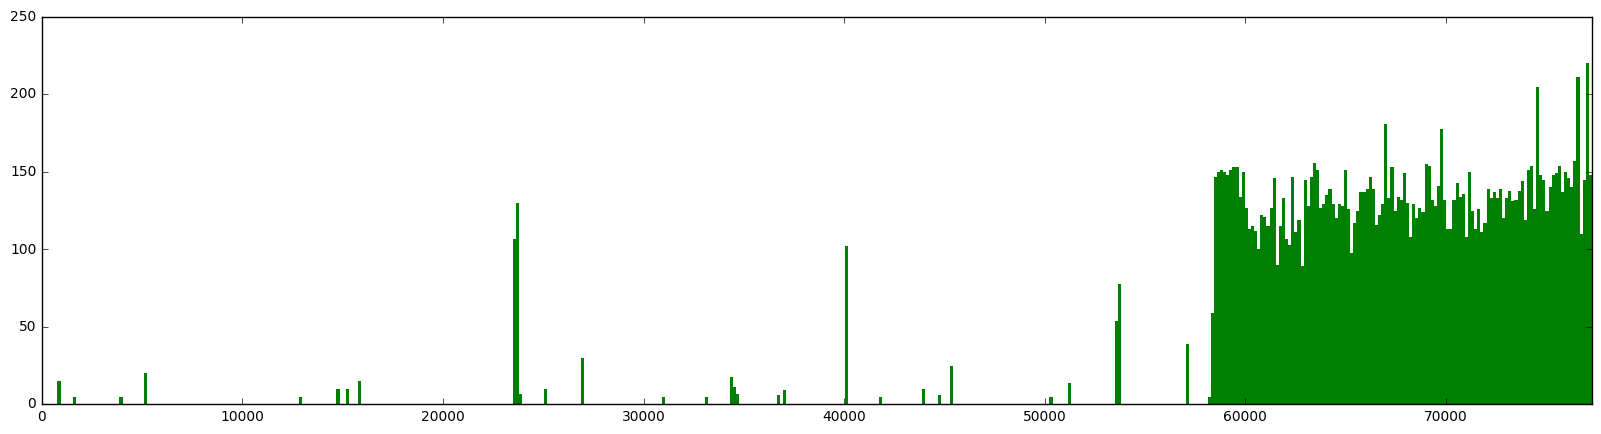

Chadwyck_British_1847_Disraeli_TancredorThe


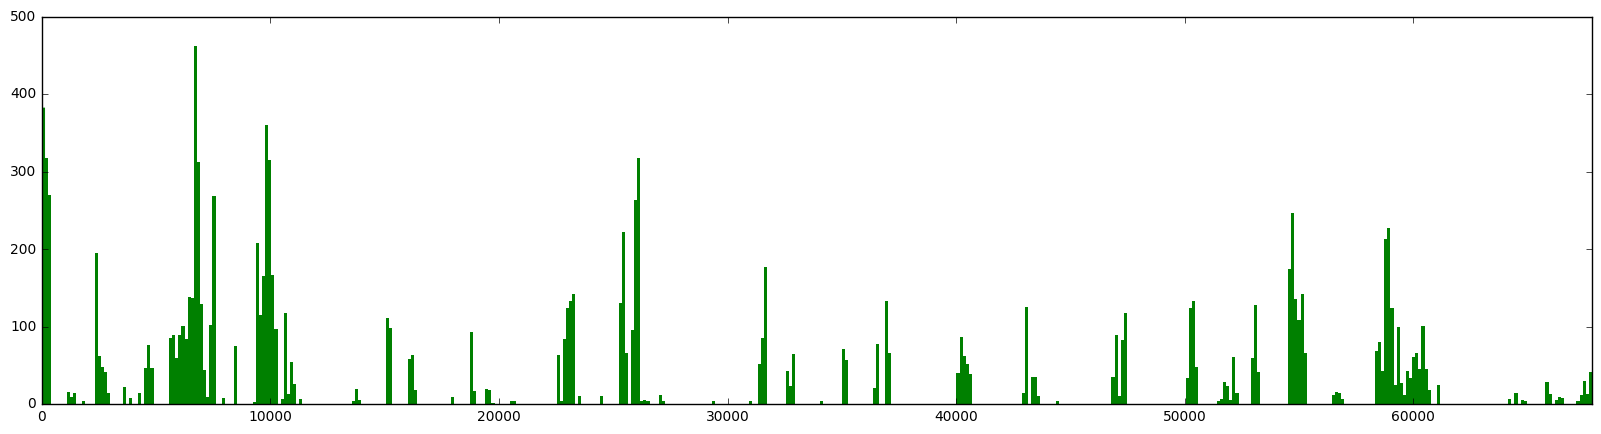

Chadwyck_British_1837_Dickens_ThePosthumousPapers


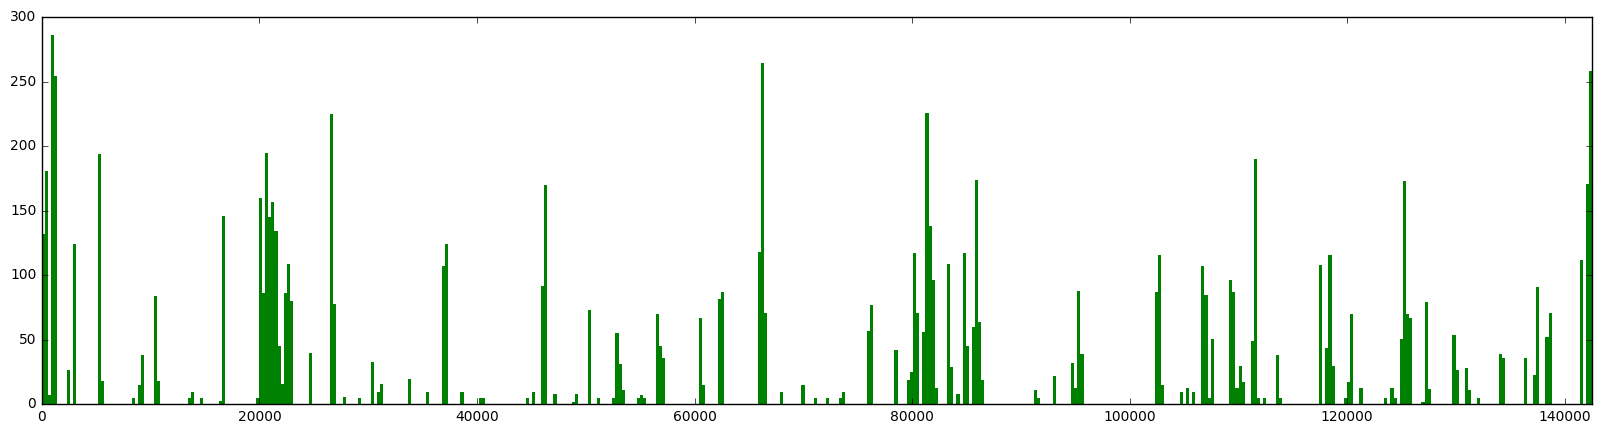

Chadwyck_British_1815_Scott_TheAntiquaryin


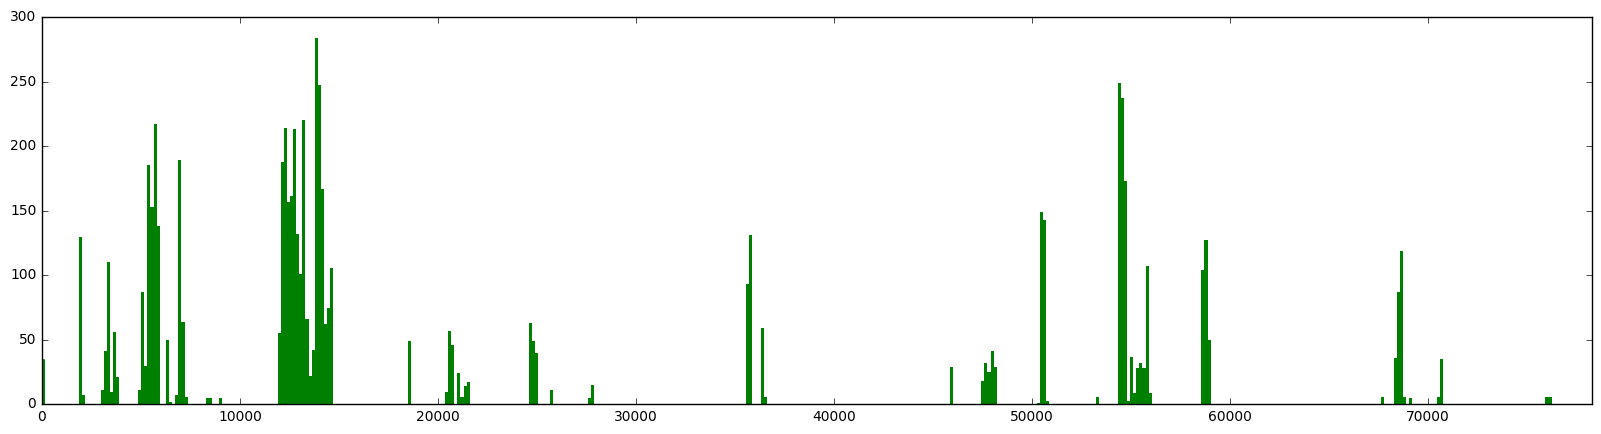

Chadwyck_British_1850_Kingsley_AltonLockeTailor


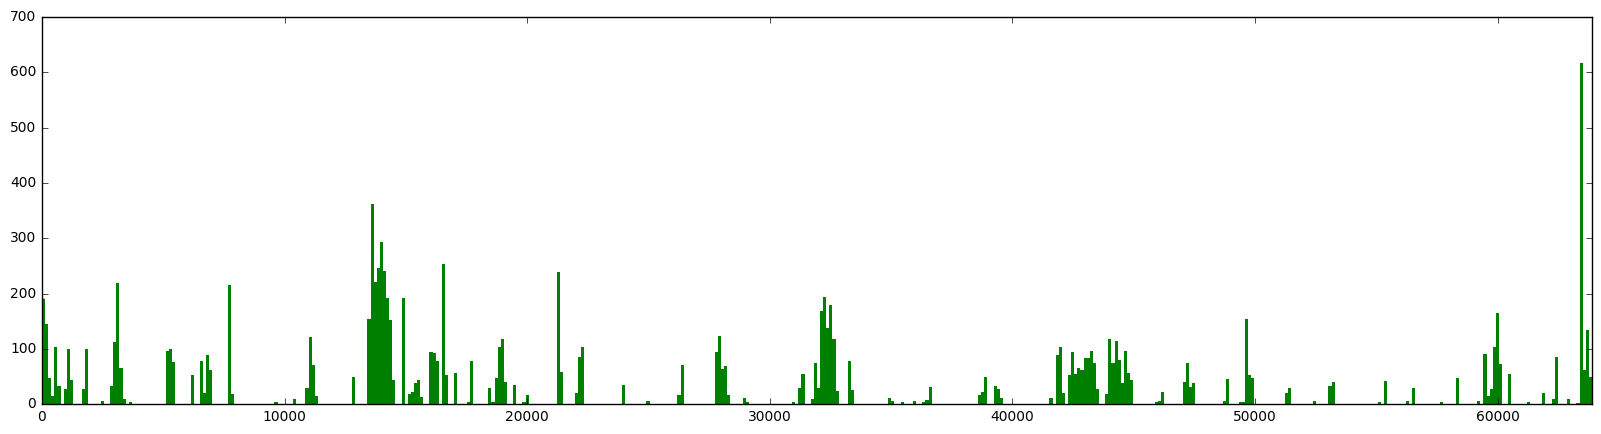

Chadwyck_British_1864_Thackeray_DenisDuvalin


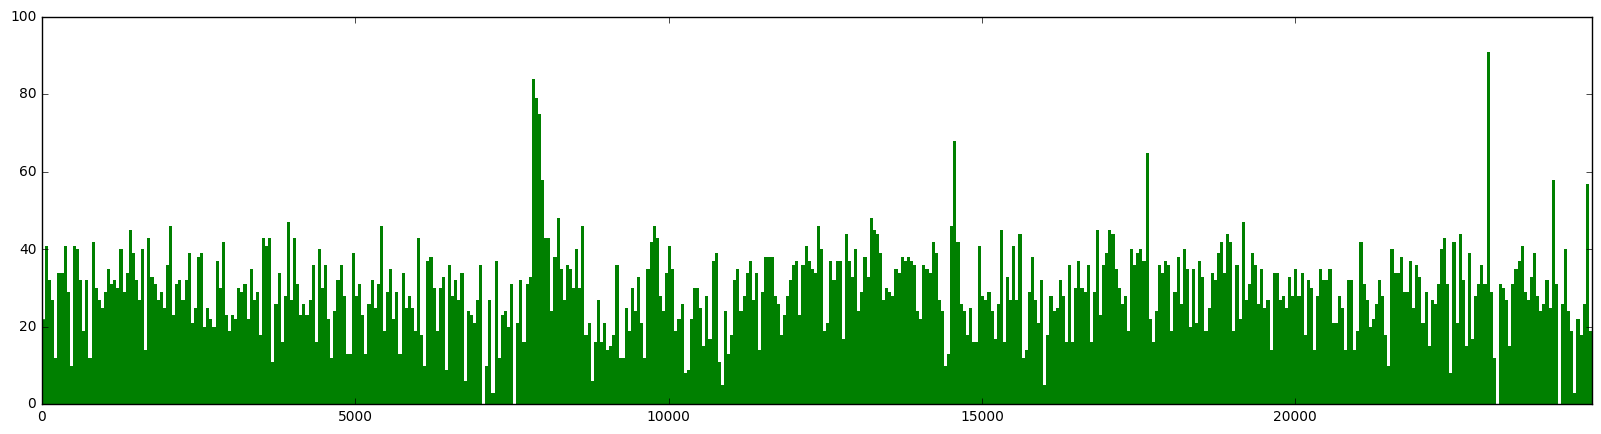

Chadwyck_British_1855_Gaskell_NorthAndSouth


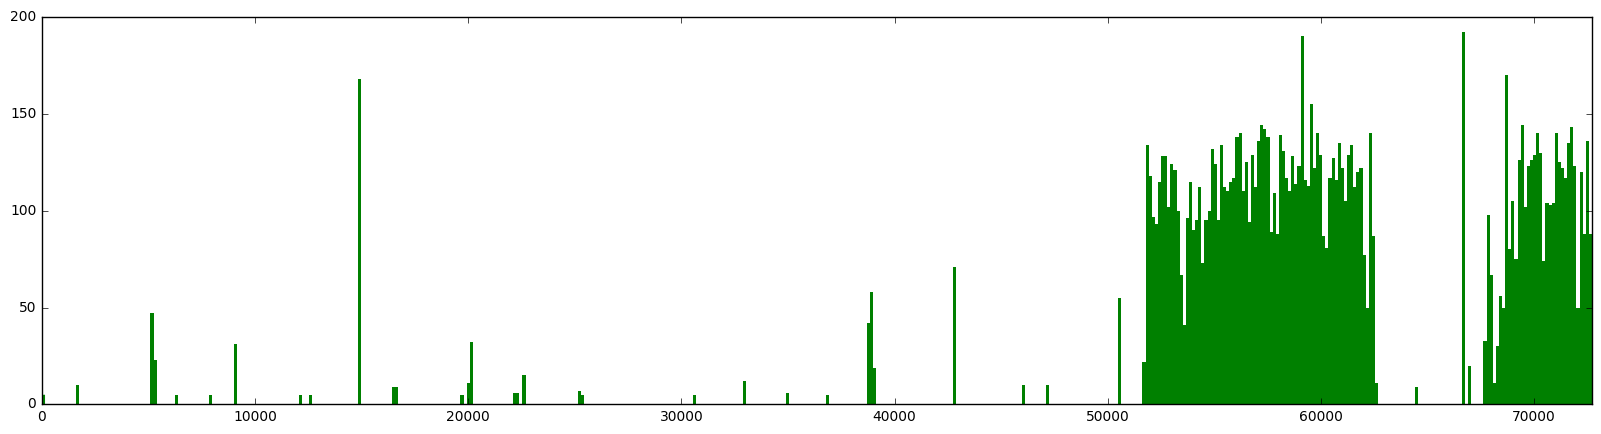

Chadwyck_Irish_1820_Maturin_MelmothTheWanderer


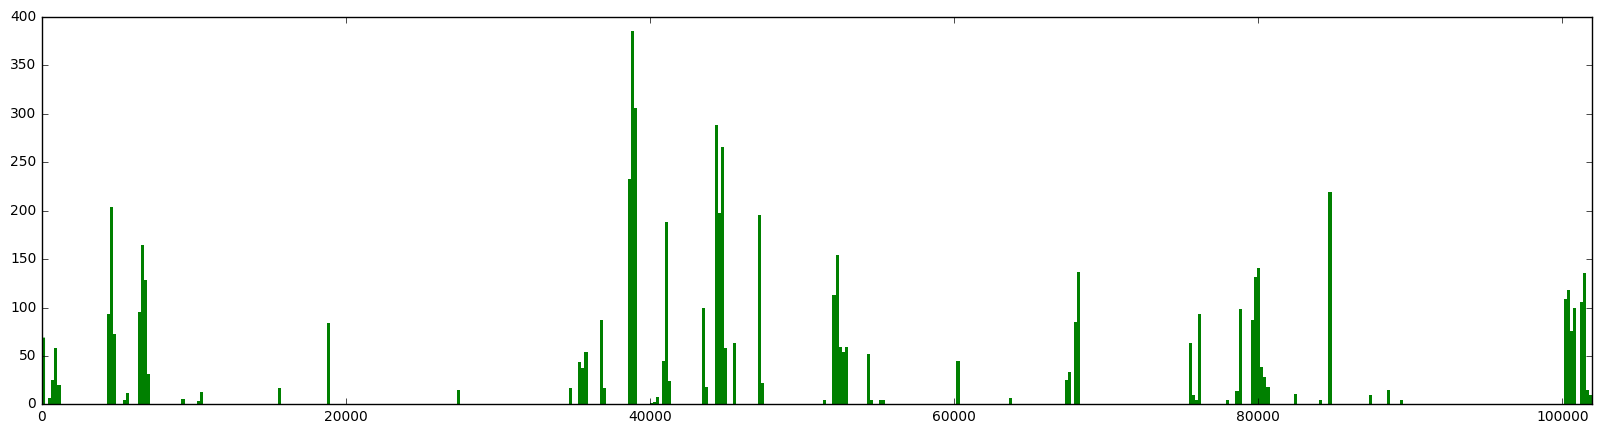

Chadwyck_British_1895_Wells_TheTimeMachine


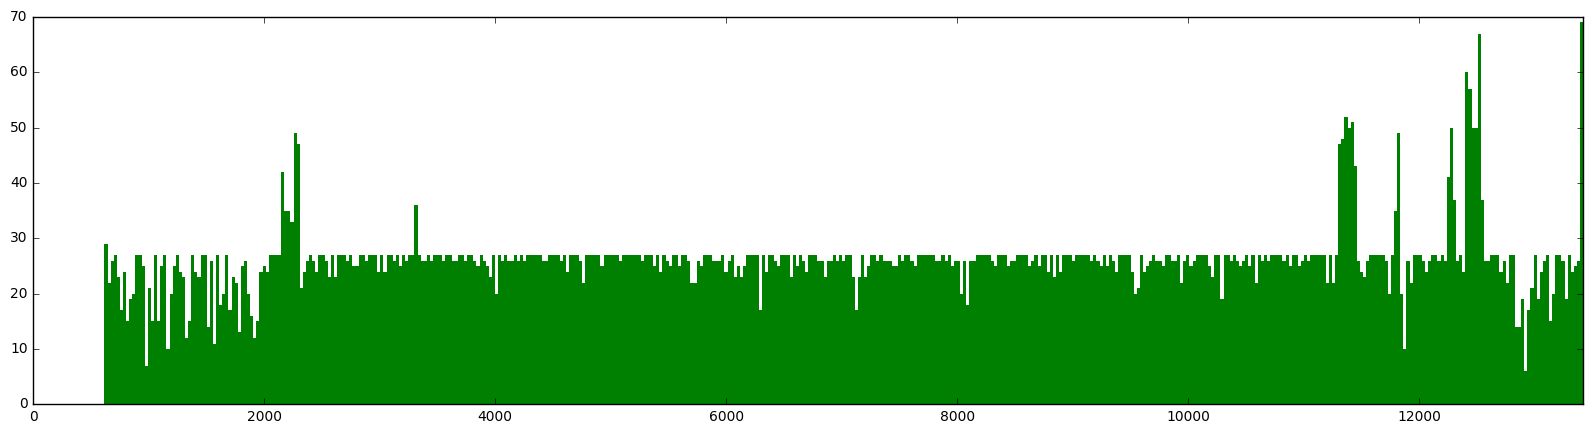

Chadwyck_British_1800_Moore_MordauntSketchesof


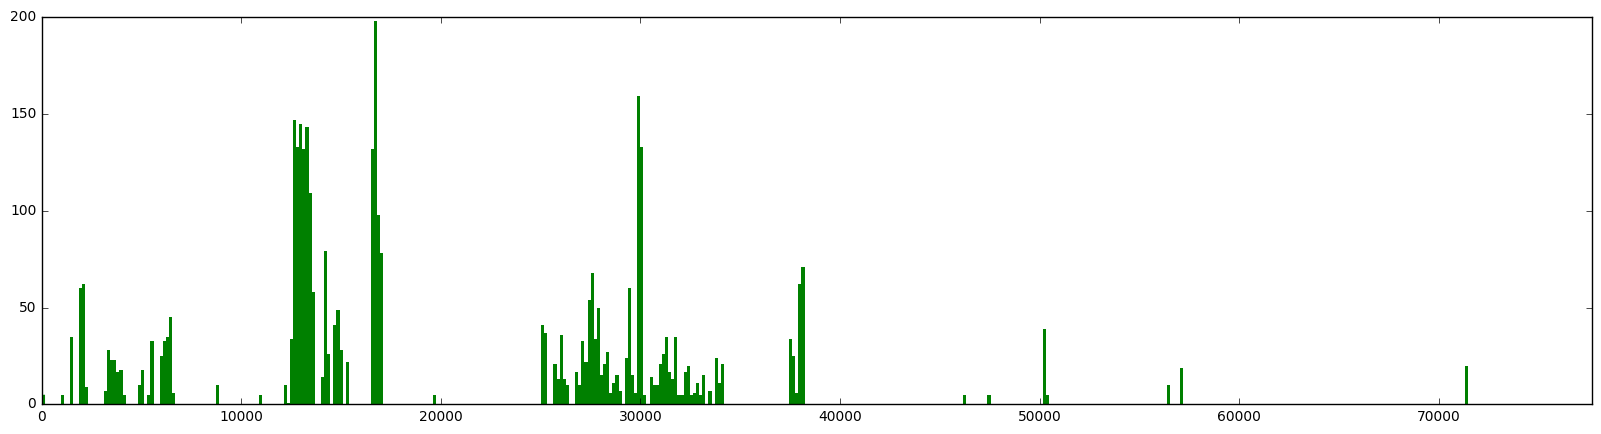

Chadwyck_British_1844_Disraeli_ConingsbyorThe


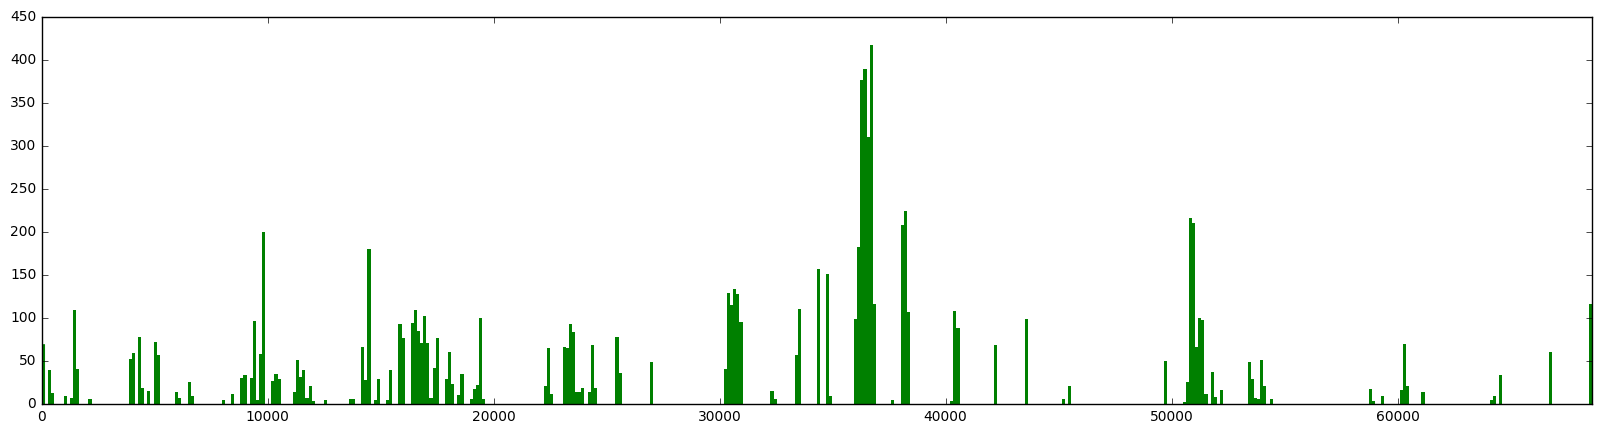

Chadwyck_British_1851_Borrow_LavengrotheScholar


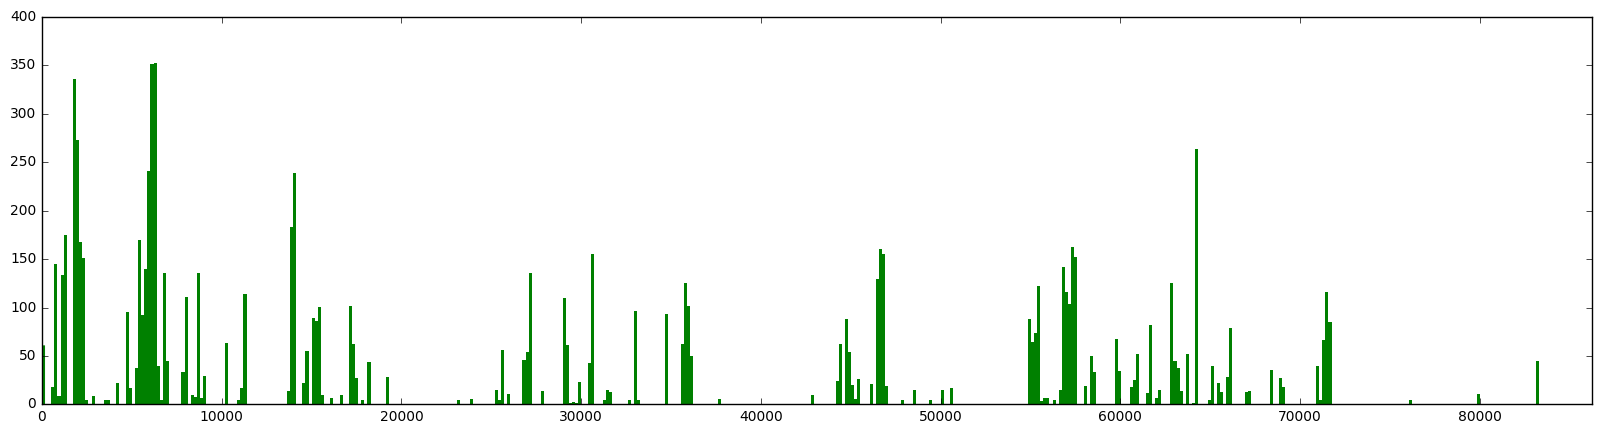

Chadwyck_British_1839_Taylor_ConfessionsOfA


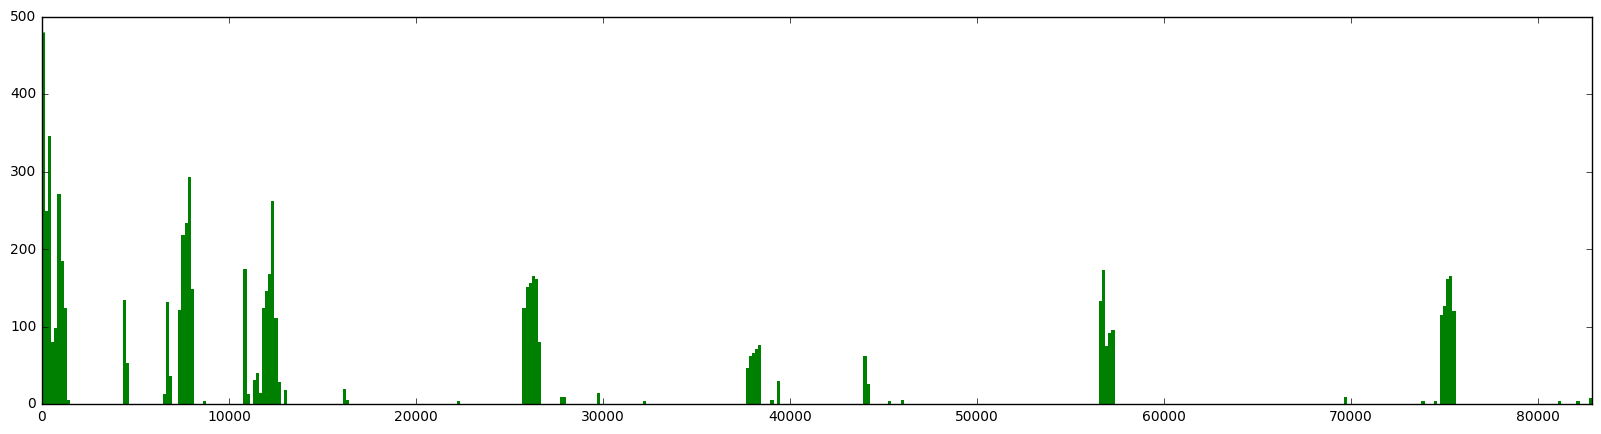

Chadwyck_British_1823_Scott_StRonanWell


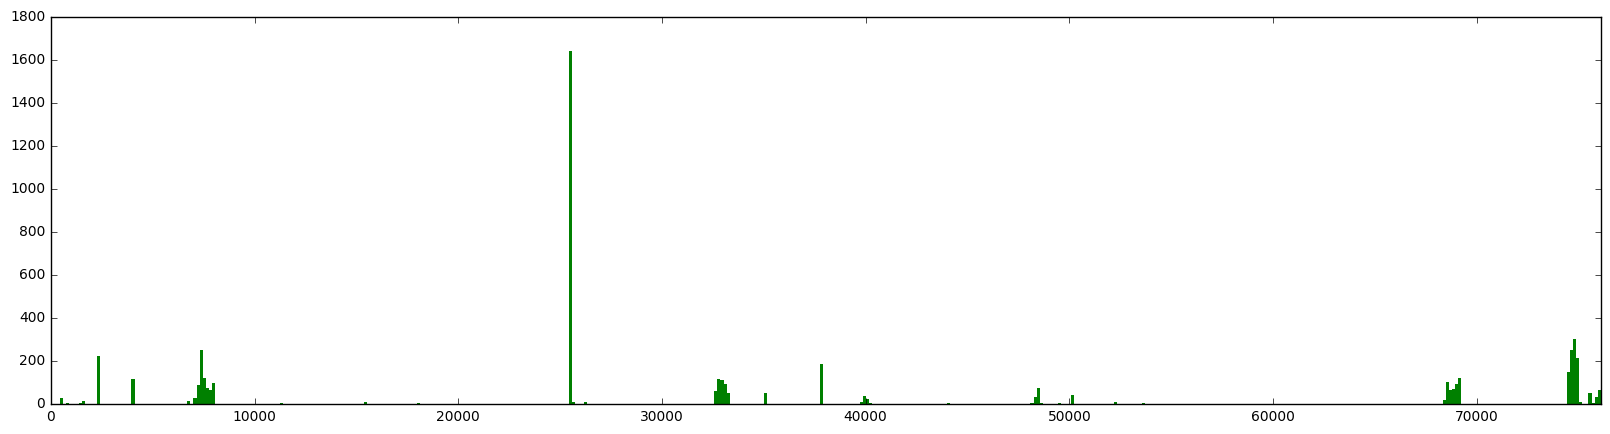

Chadwyck_British_1815_Scott_GuyManneringOr


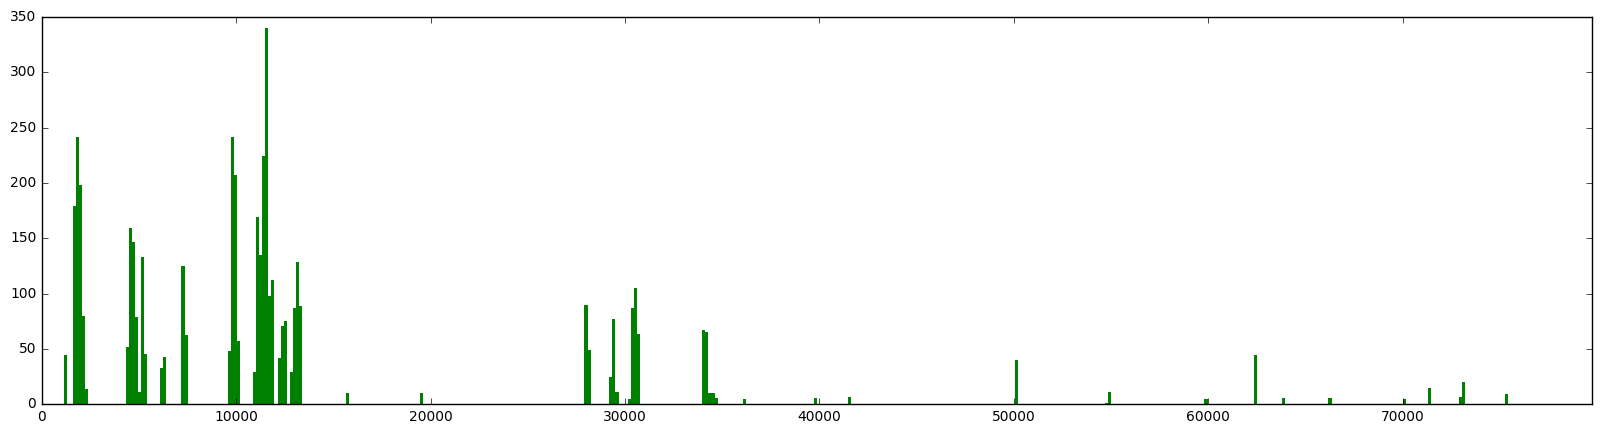

Chadwyck_British_1782_Burney_CeciliaorMemoirs


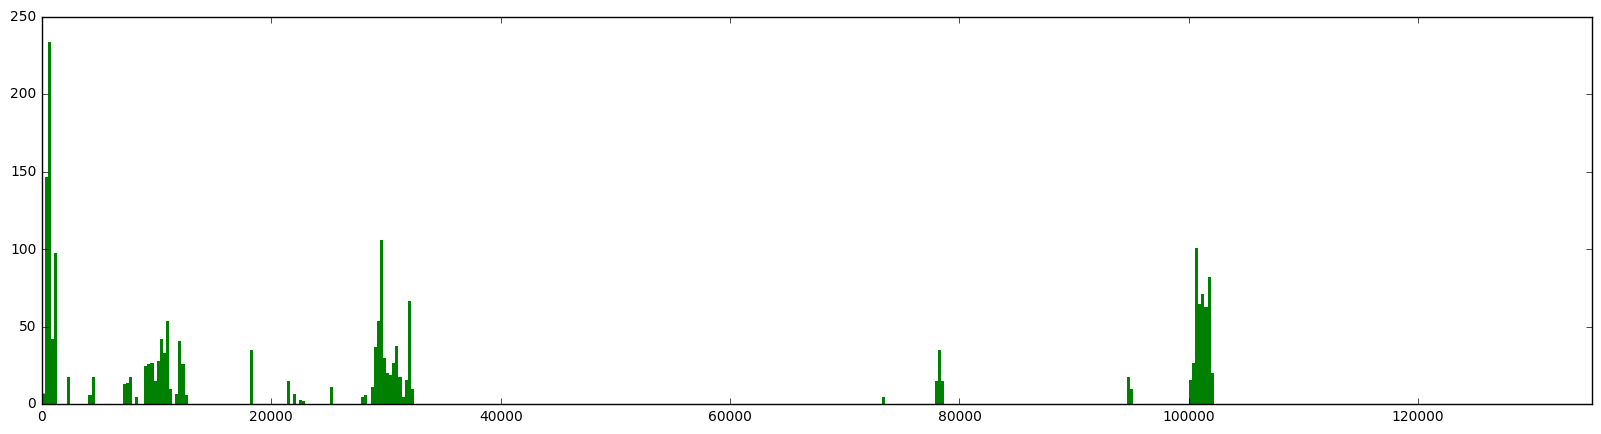

Chadwyck_British_1819_Scott_ALegendof


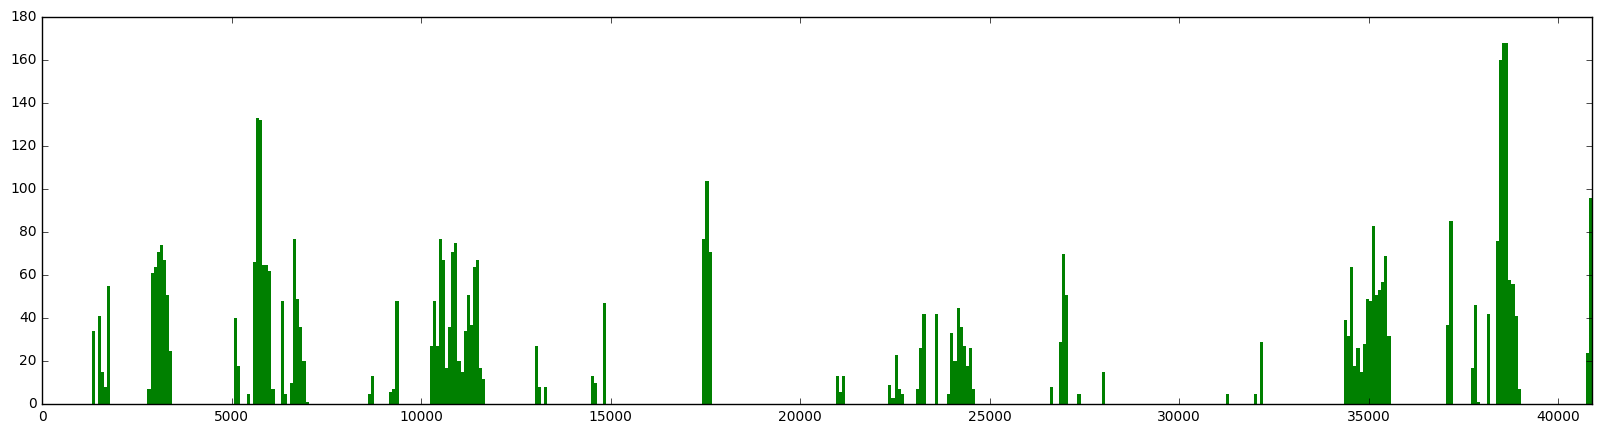

Chadwyck_British_1849_Bronte_ShirleyATale


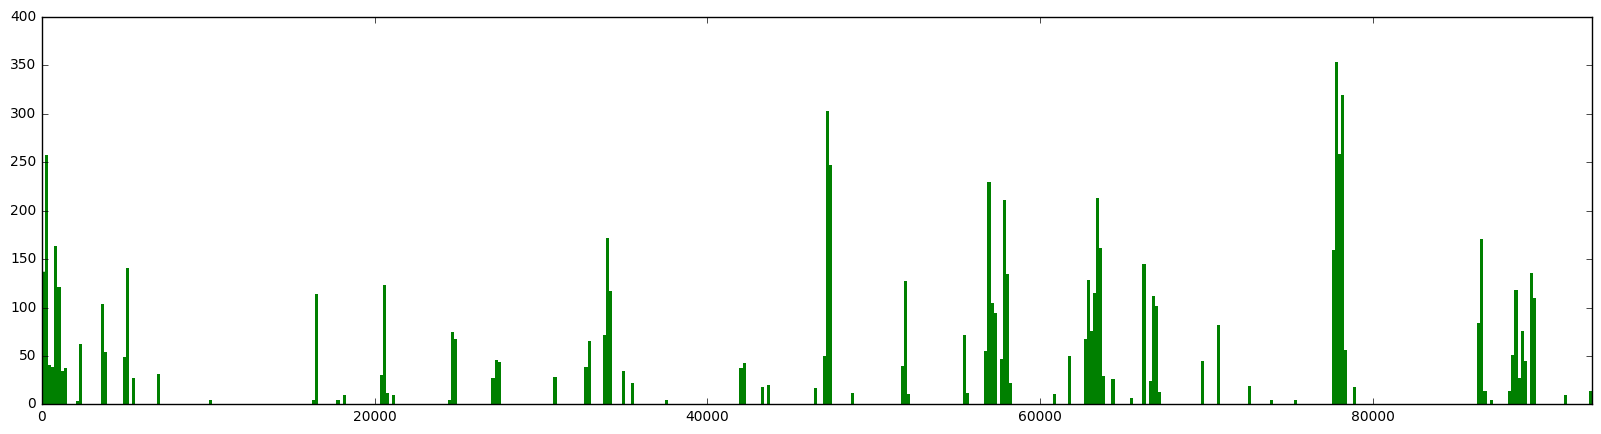

Chadwyck_British_1848_Thackeray_VanityFairA


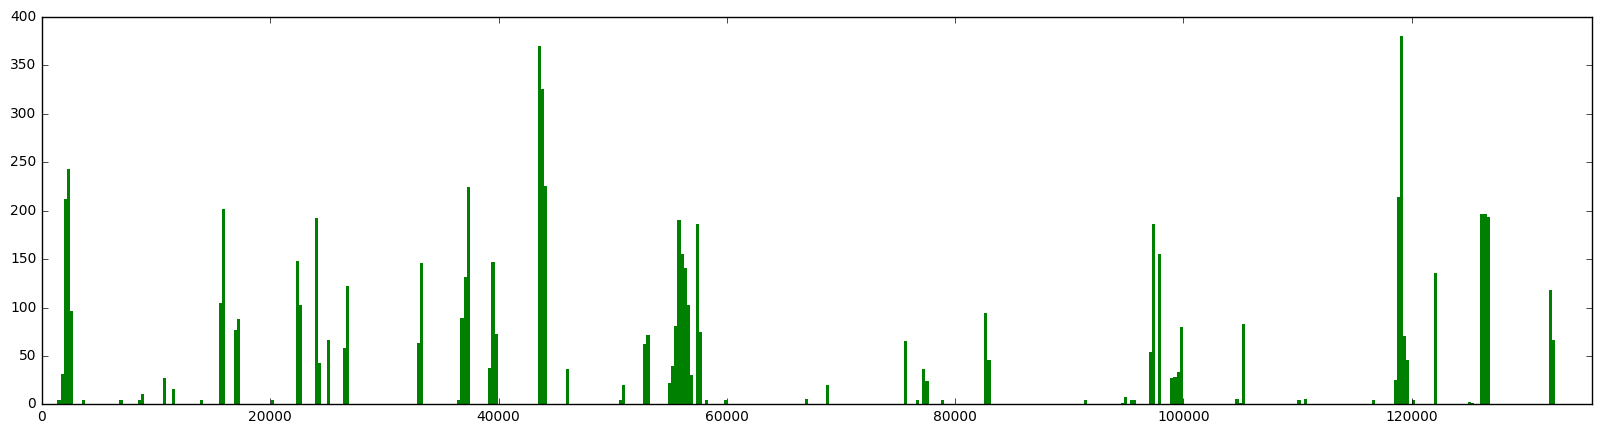

Chadwyck_British_1864_Trollope_TheSmallHouse


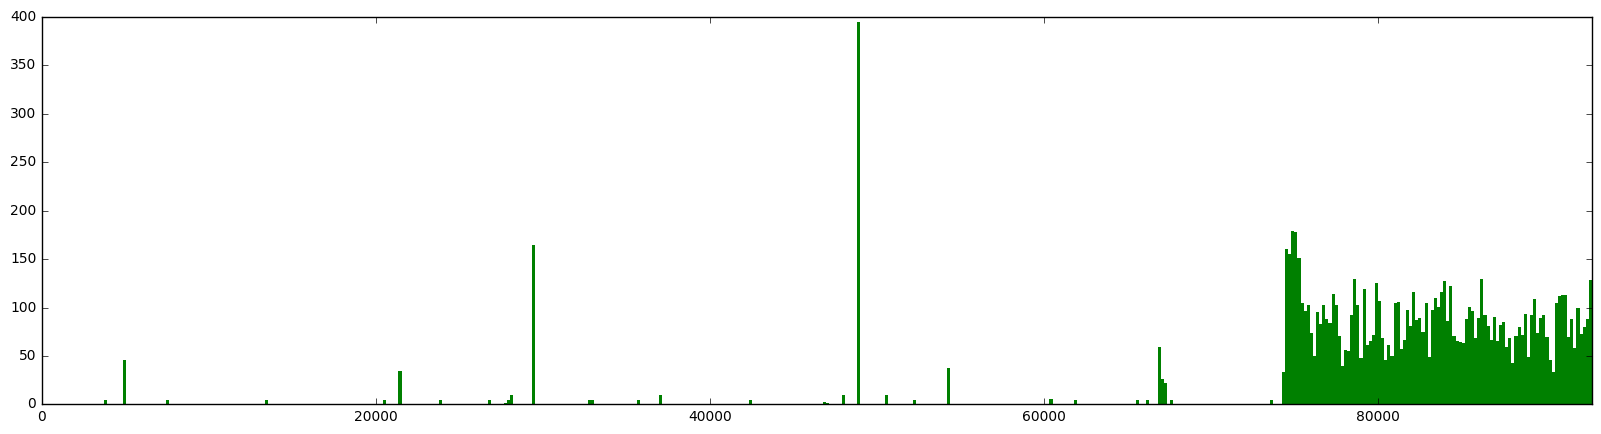

Chadwyck_British_1840_Thackeray_CatherineAStory


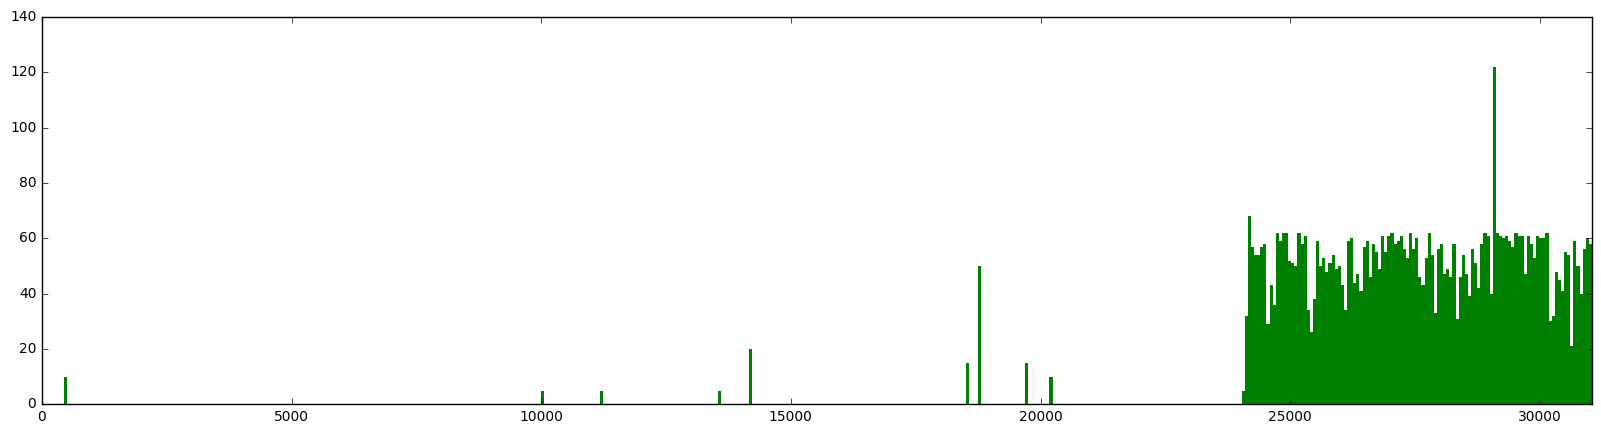

Chadwyck_British_1863_Oliphant_SalemChapelChronicles


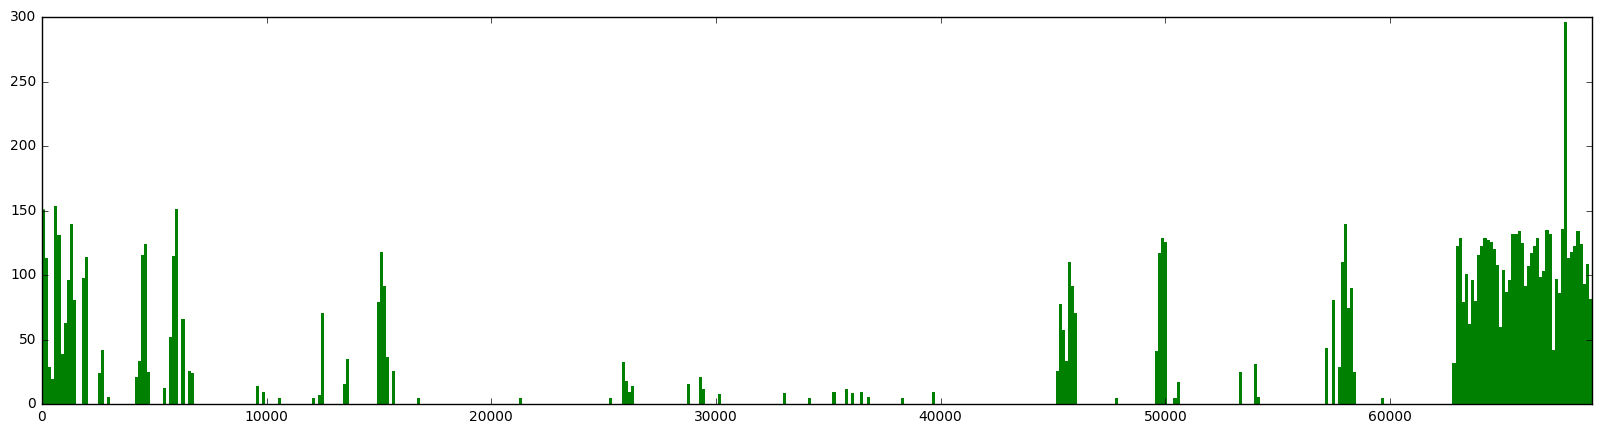

Chadwyck_British_1896_Stevenson_WeirofHermiston


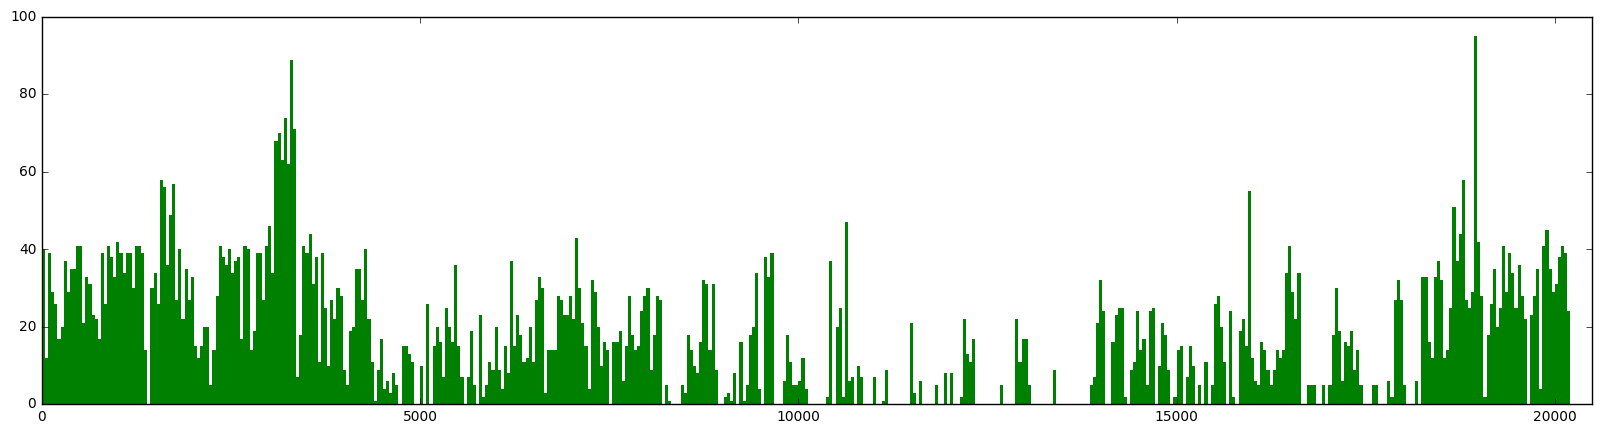

Chadwyck_British_1895_Ward_TheStoryof


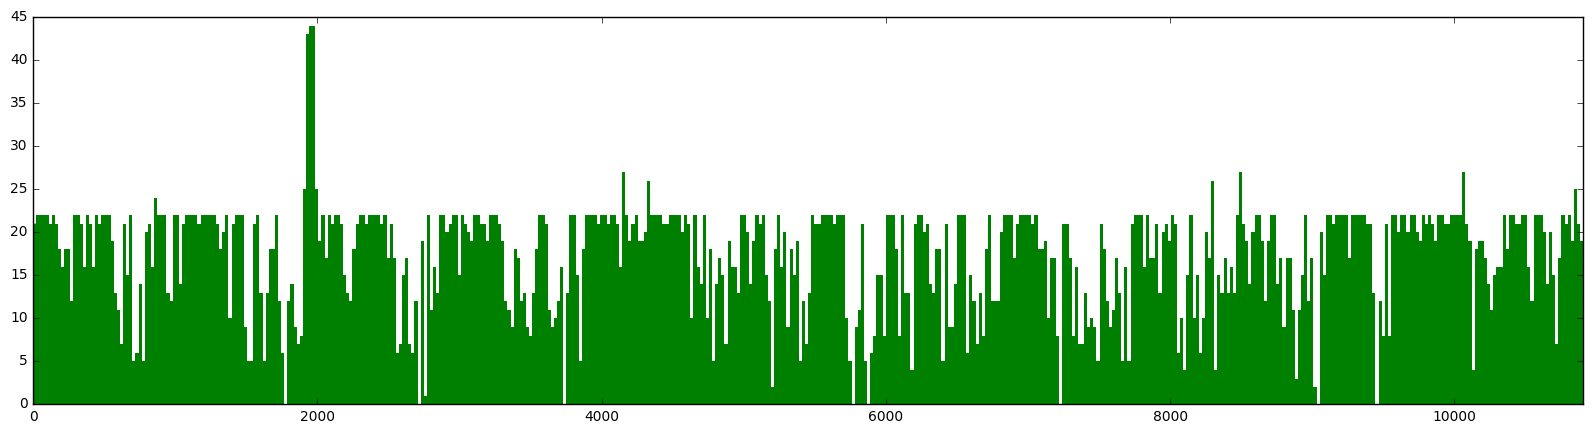

Chadwyck_Irish_1812_Edgeworth_TheAbsenteein


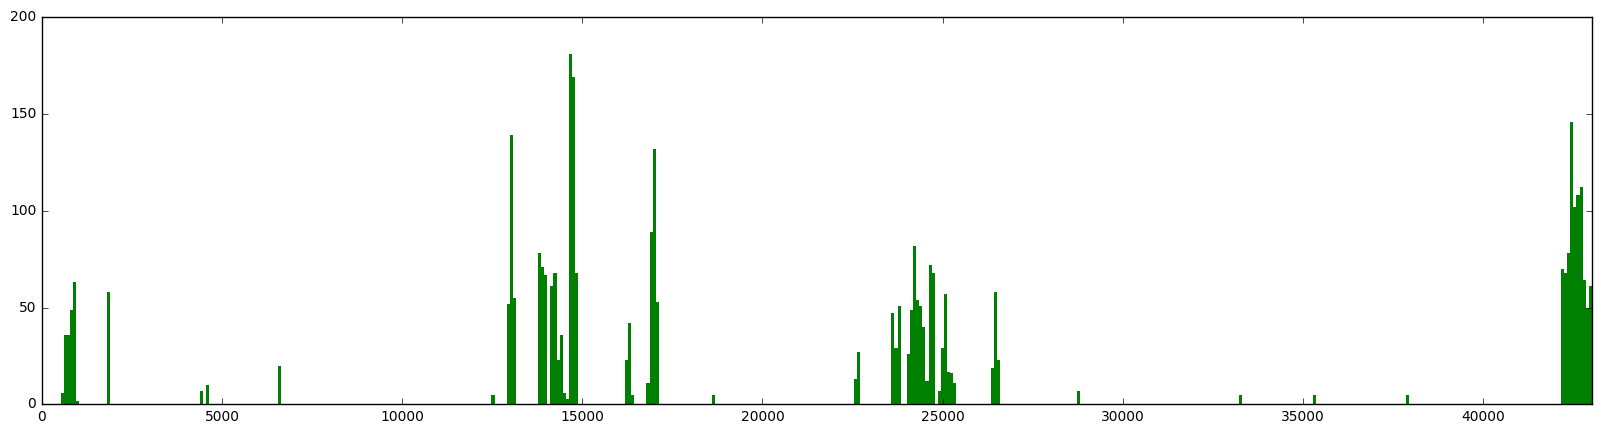

Chadwyck_British_1828_Lytton_PelhamOrThe


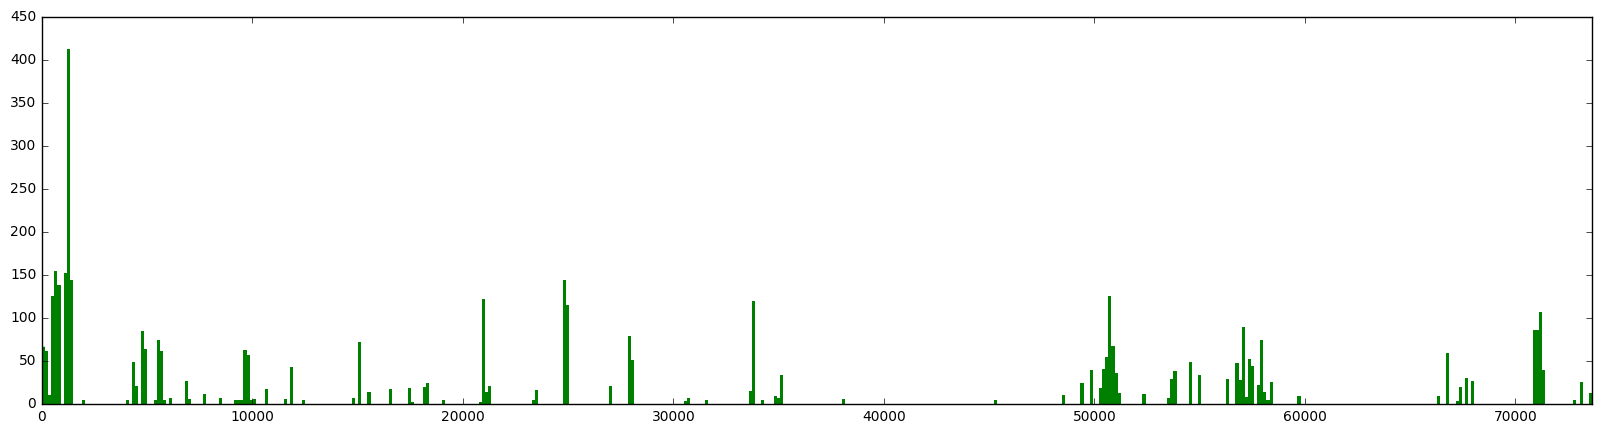

Chadwyck_British_1849_Thackeray_TheHistoryof


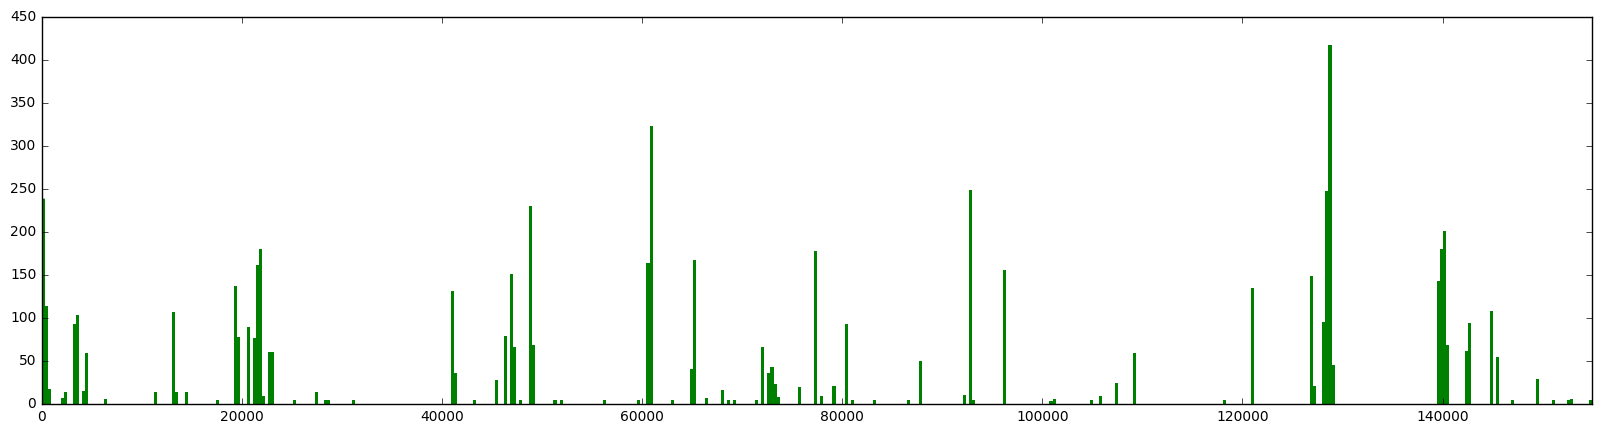

Chadwyck_British_1871_Chesney_TheBattleOf


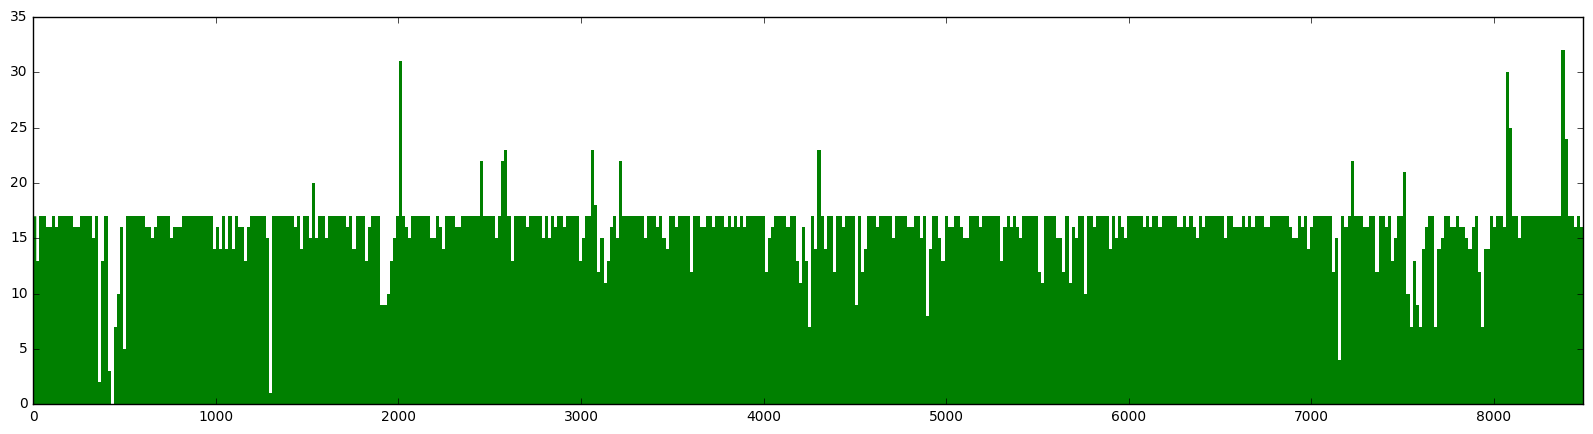

Chadwyck_British_1872_Eliot_MiddlemarchAStudy


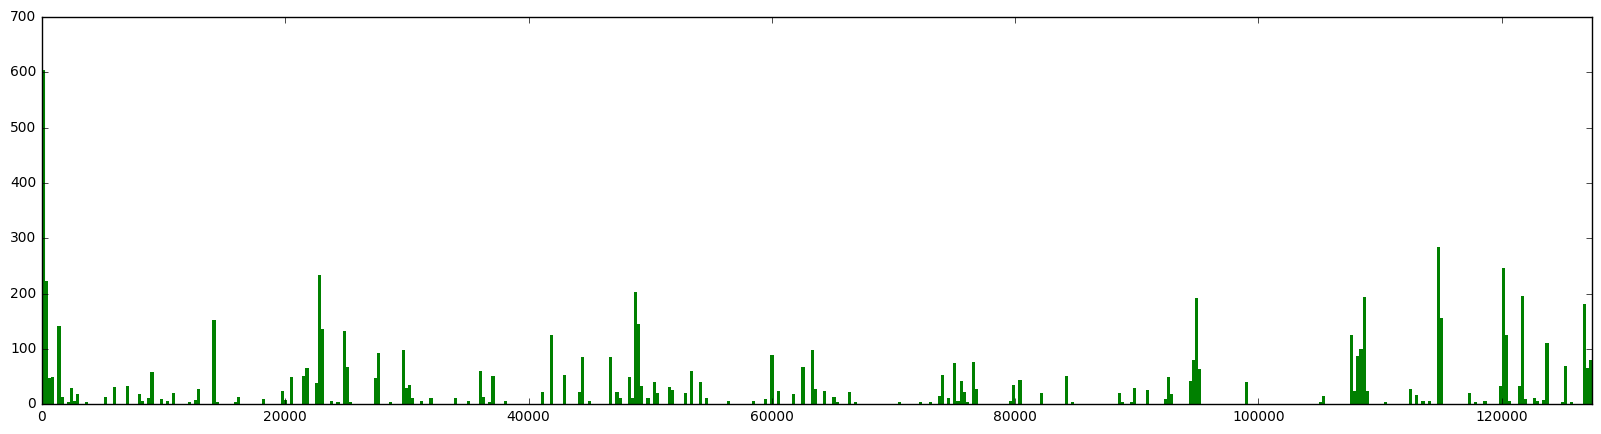

Chadwyck_British_1847_Bronte_JaneEyreAn


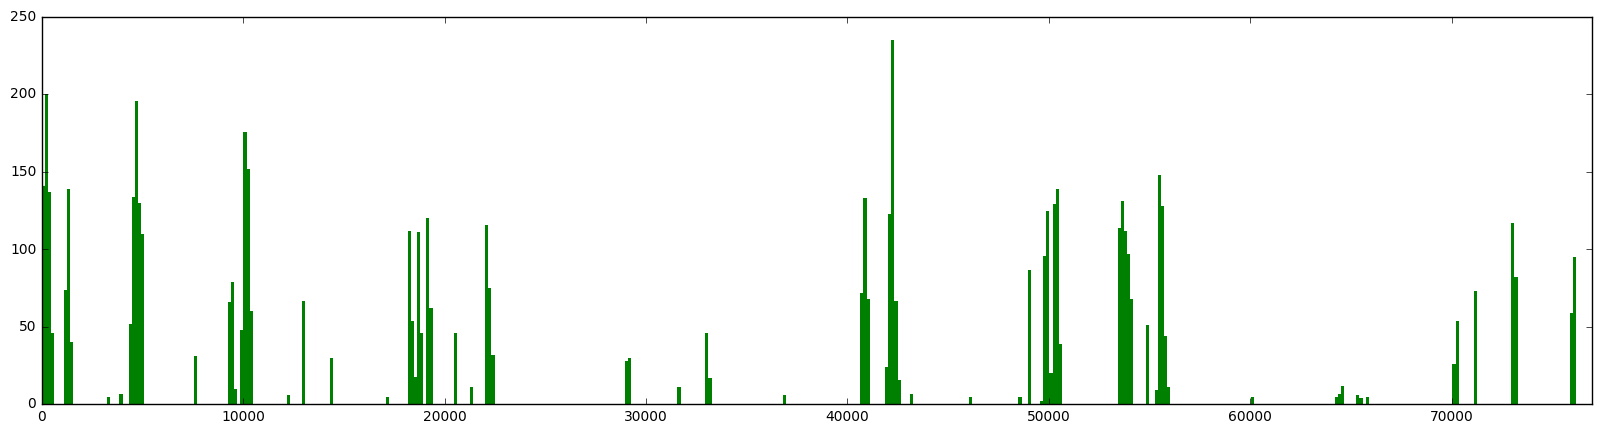

Chadwyck_British_1831_Peacock_CrotchetCastle


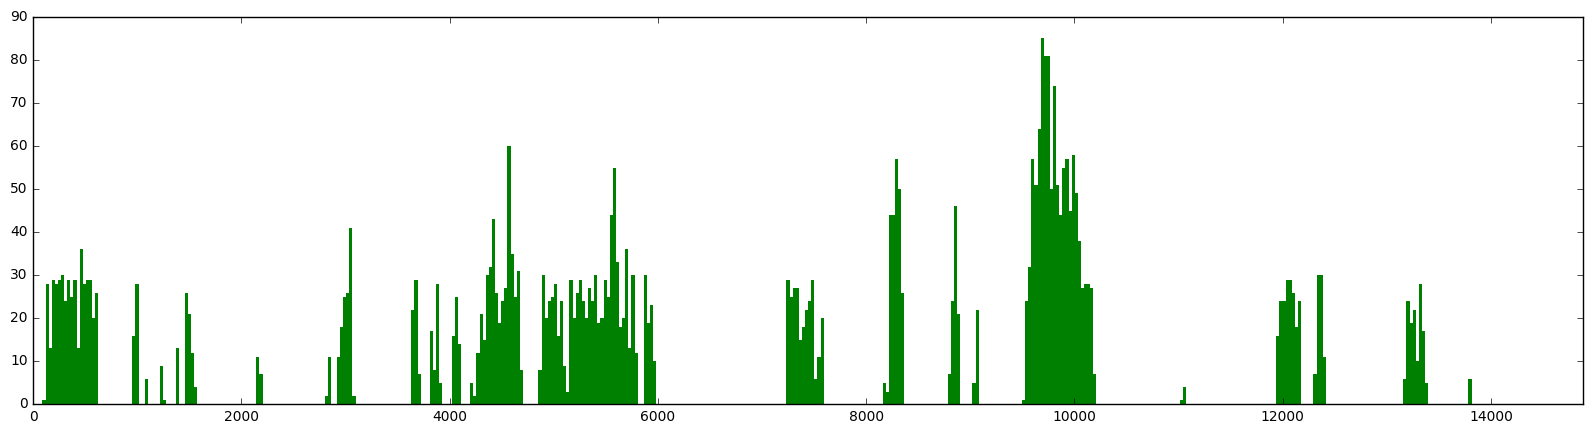

Chadwyck_British_1854_Thackeray_TheNewcomesMemoirs


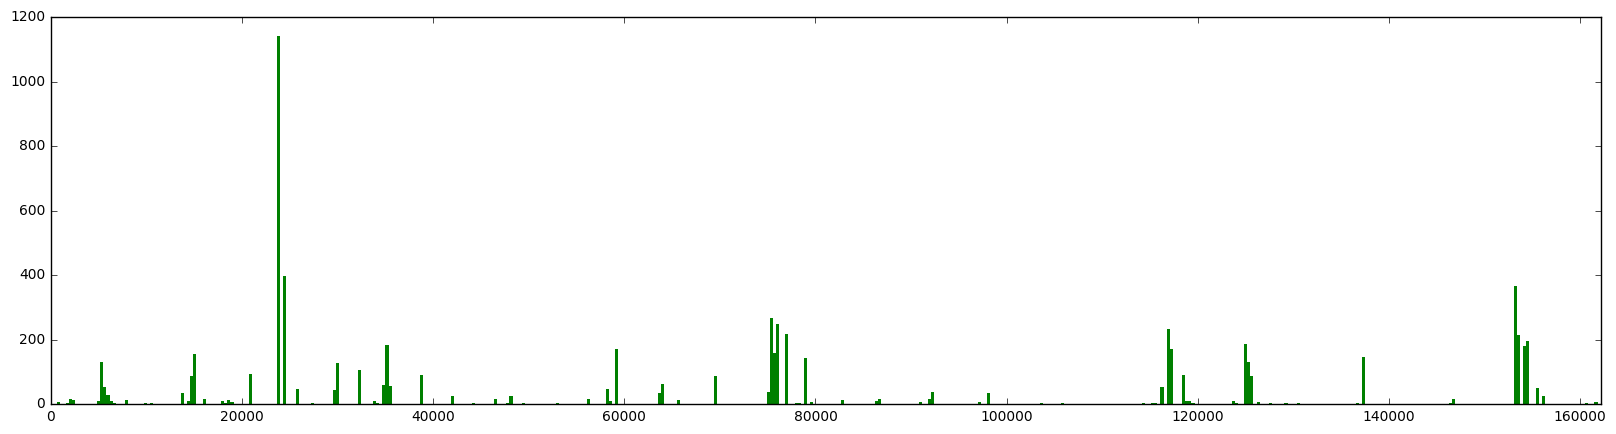

Chadwyck_British_1853_Bronte_VilletteByCurrer


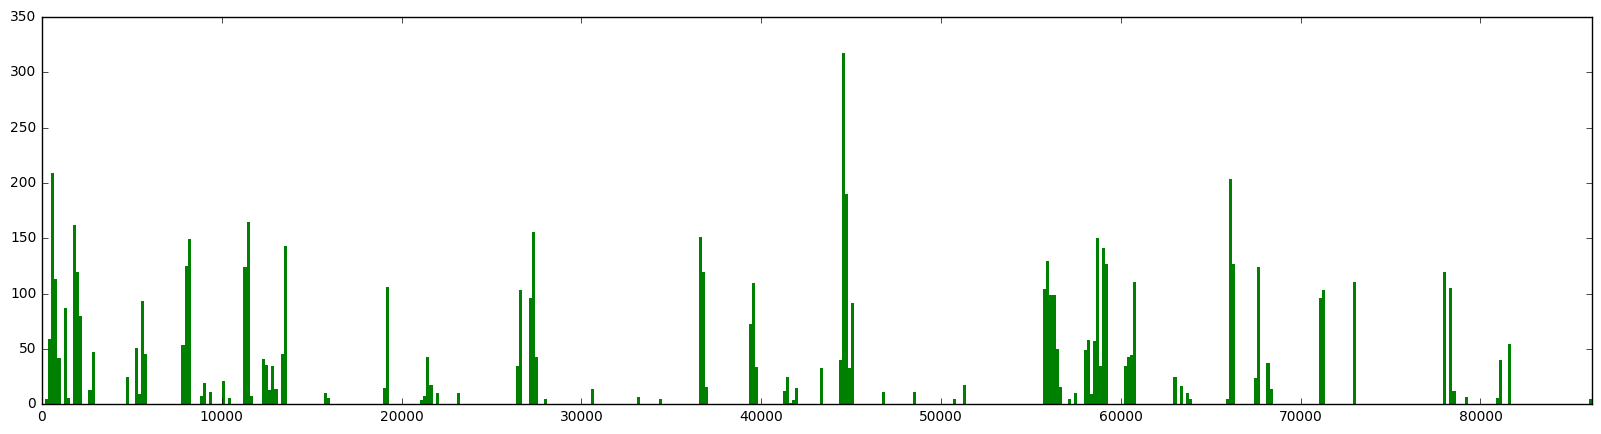

Chadwyck_British_1845_Disraeli_SybilorThe


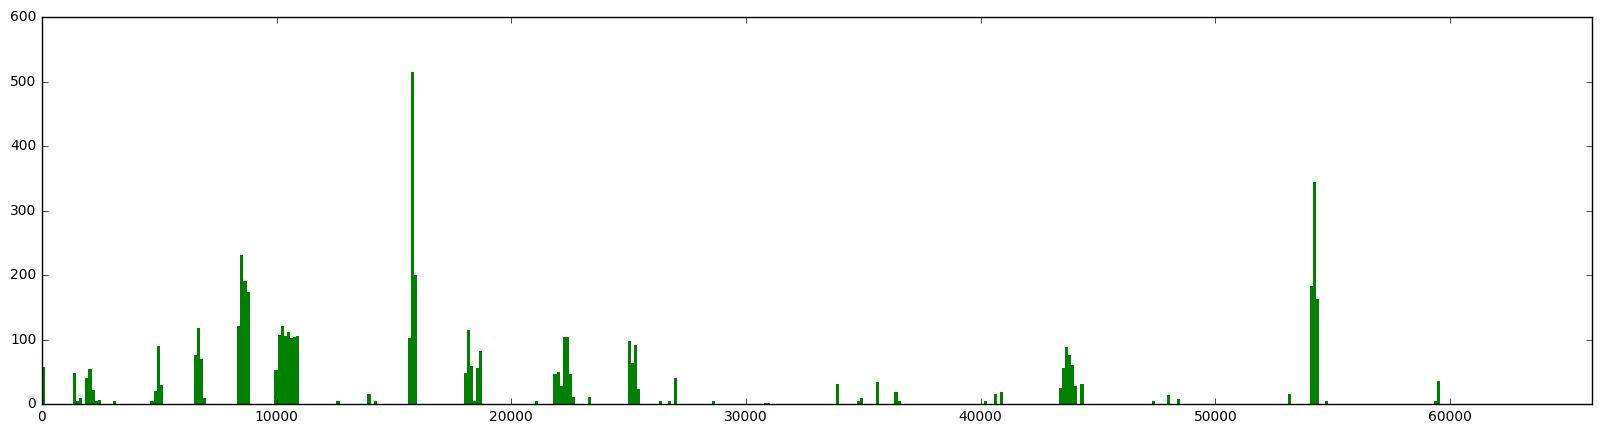

Chadwyck_British_1852_Thackeray_TheHistoryof


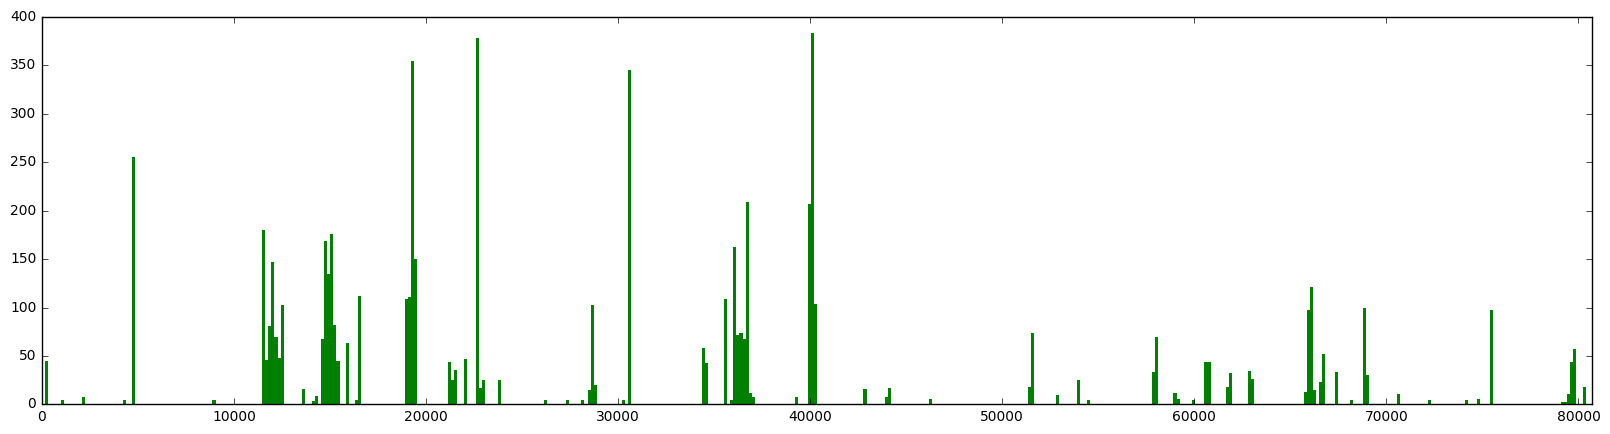

Chadwyck_British_1832_Lytton_EugeneAram


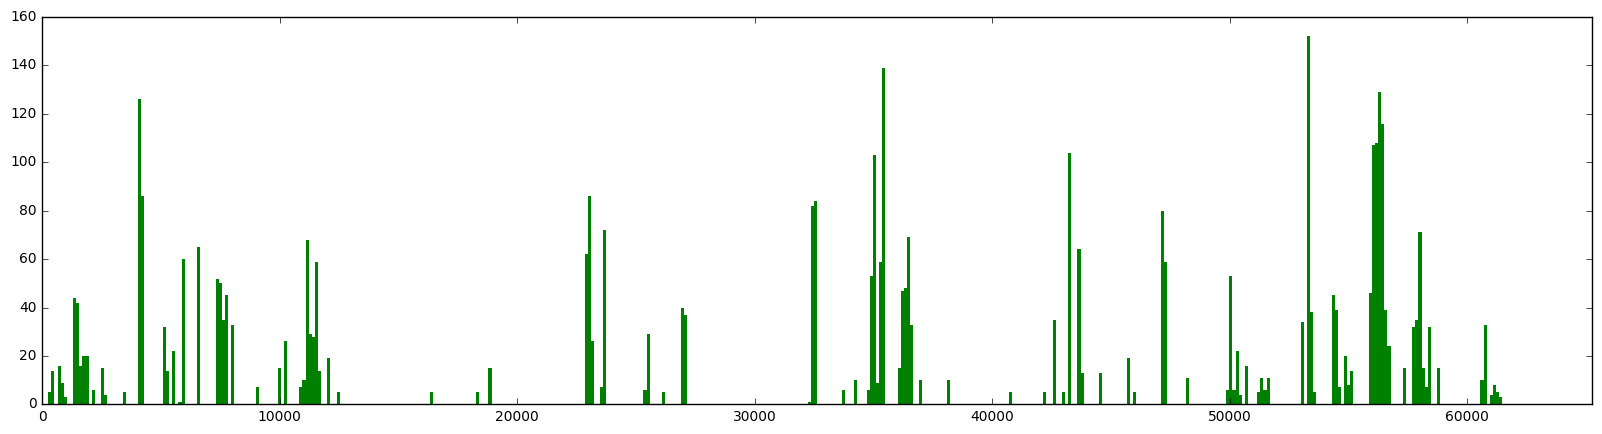

Chadwyck_Irish_1814_Edgeworth_PatronageByMaria


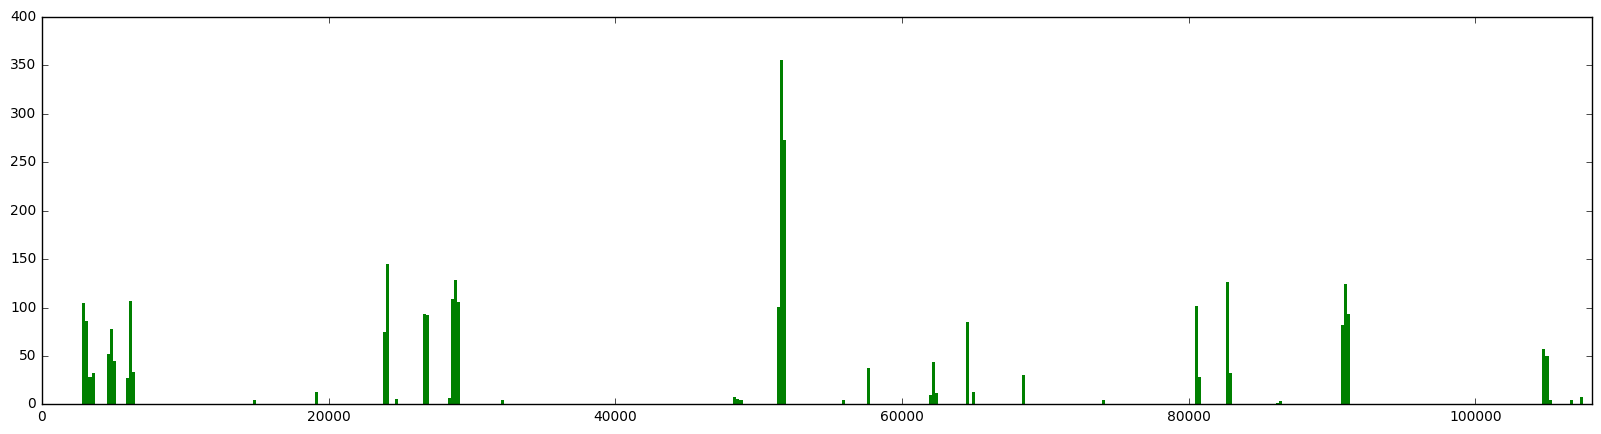

Chadwyck_British_1821_Galt_AnnalsOfThe


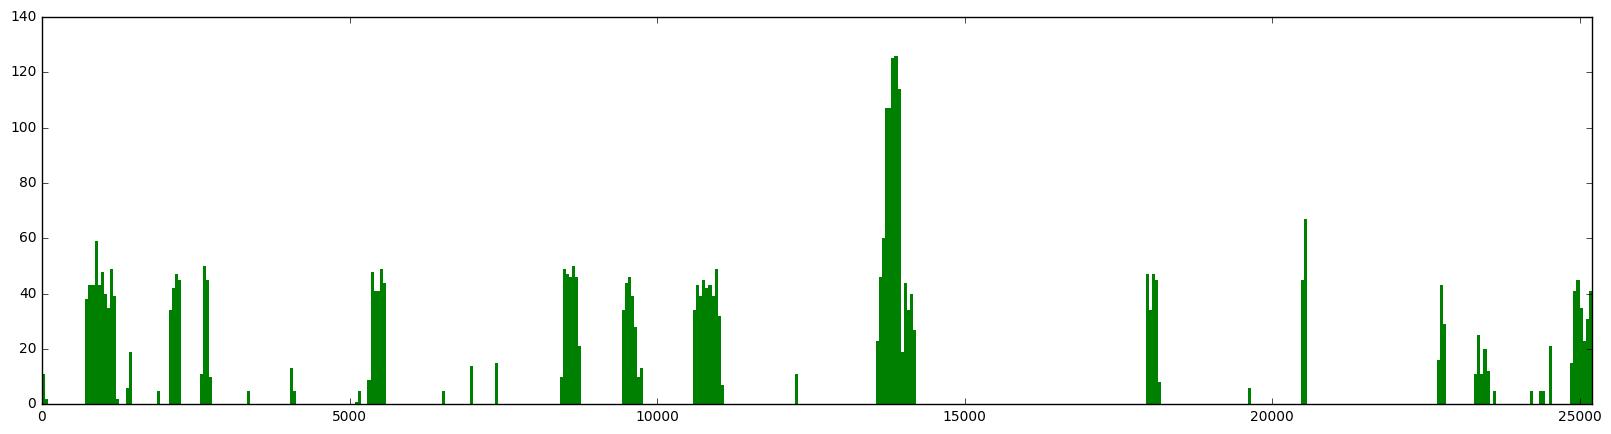

Chadwyck_British_1843_Dickens_AChristmasCarol


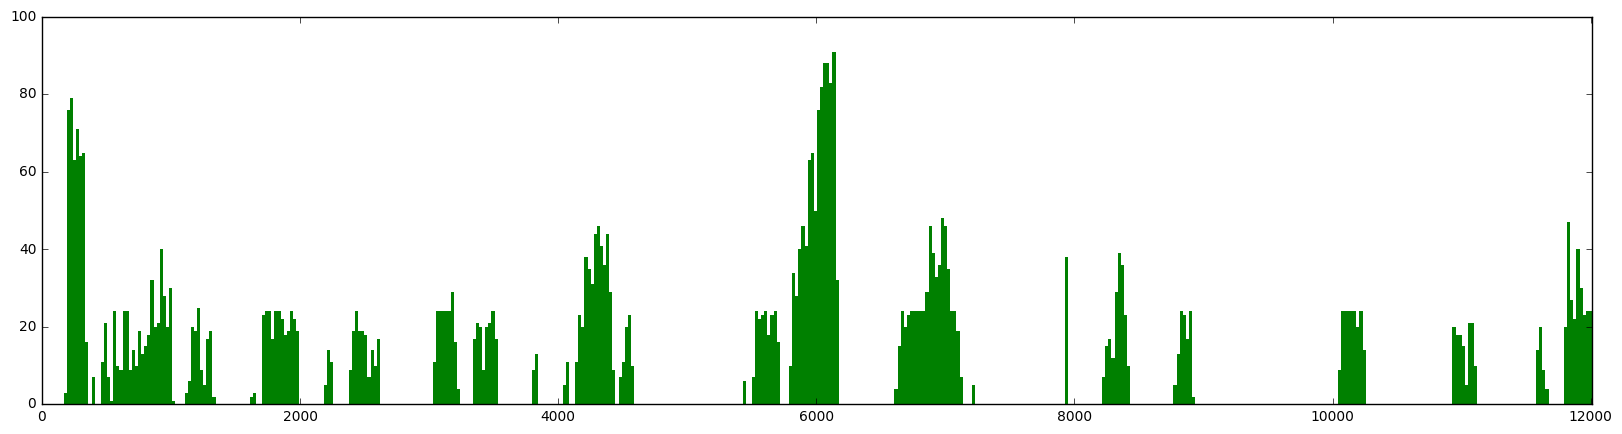

Chadwyck_British_1816_Scott_TheBlackDwarf


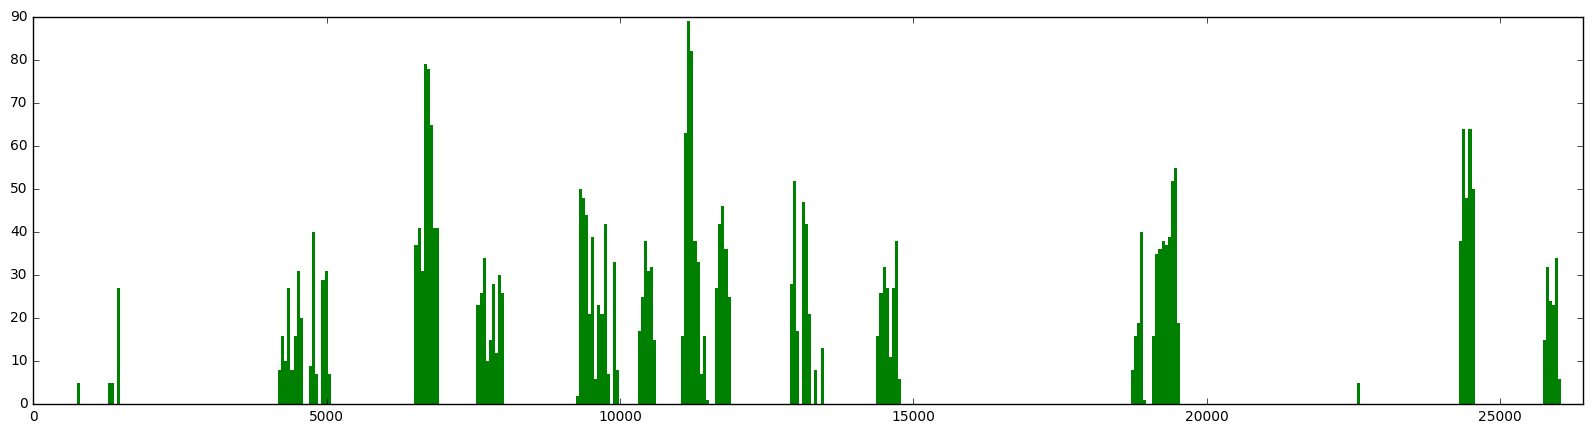

Chadwyck_British_1886_Stevenson_StrangeCaseof


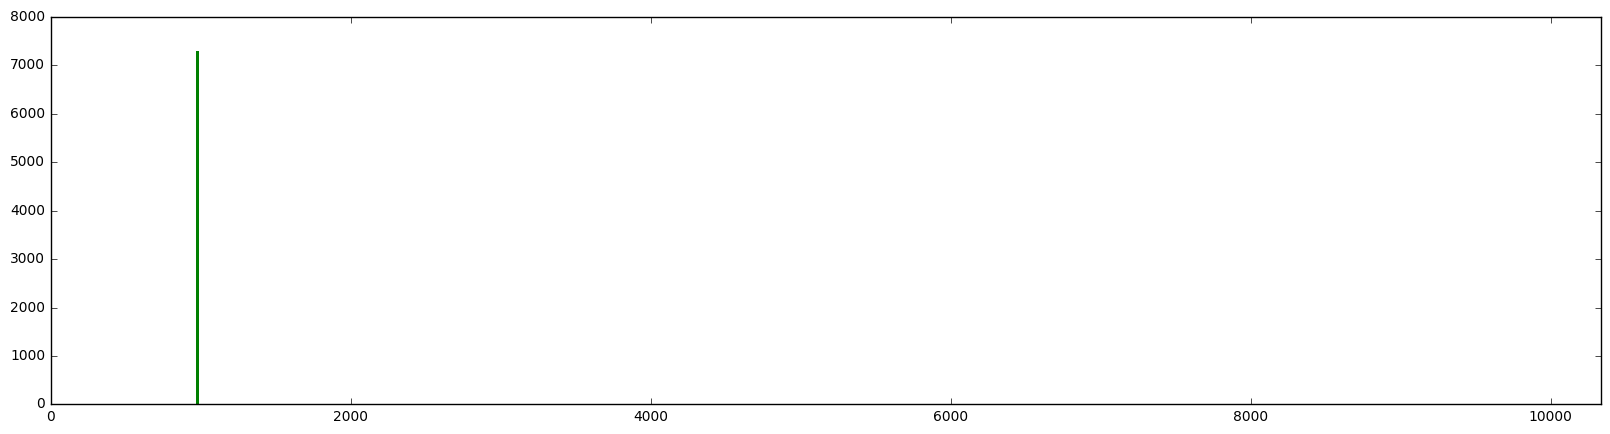

Chadwyck_Irish_1817_Edgeworth_OrmondATale


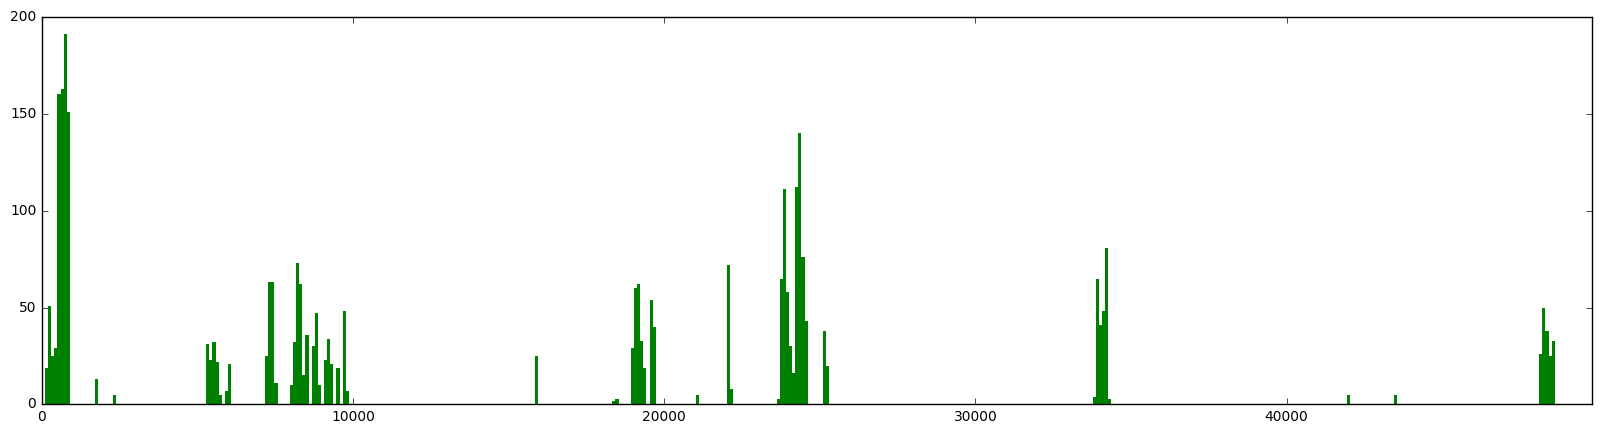

Chadwyck_British_1862_Sala_TheSevenSons


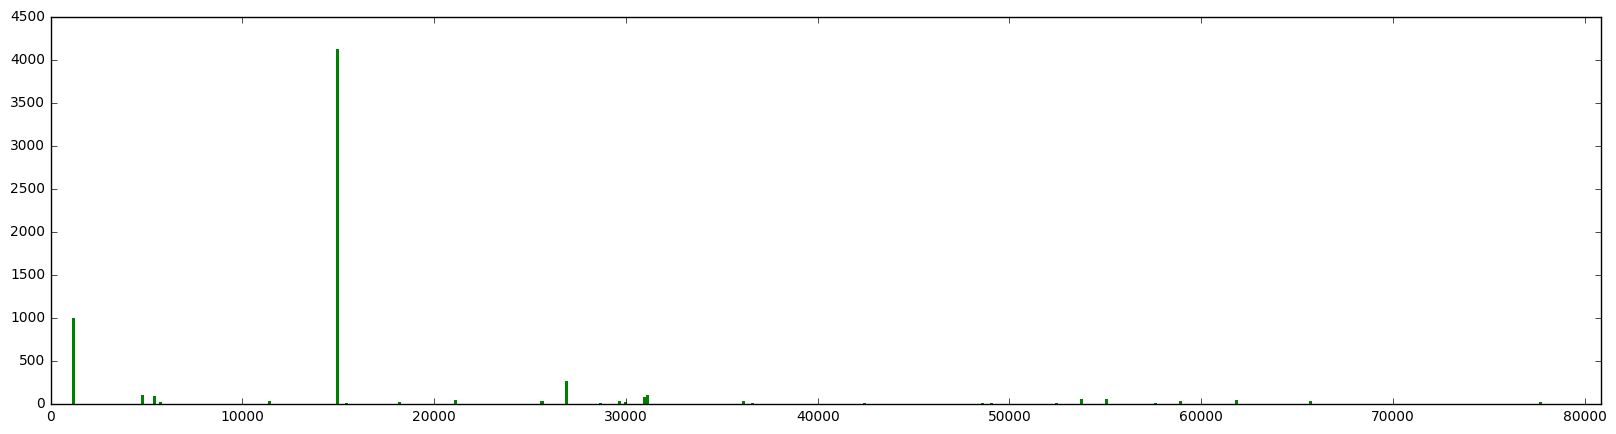

Chadwyck_British_1853_Gaskell_RuthANovel


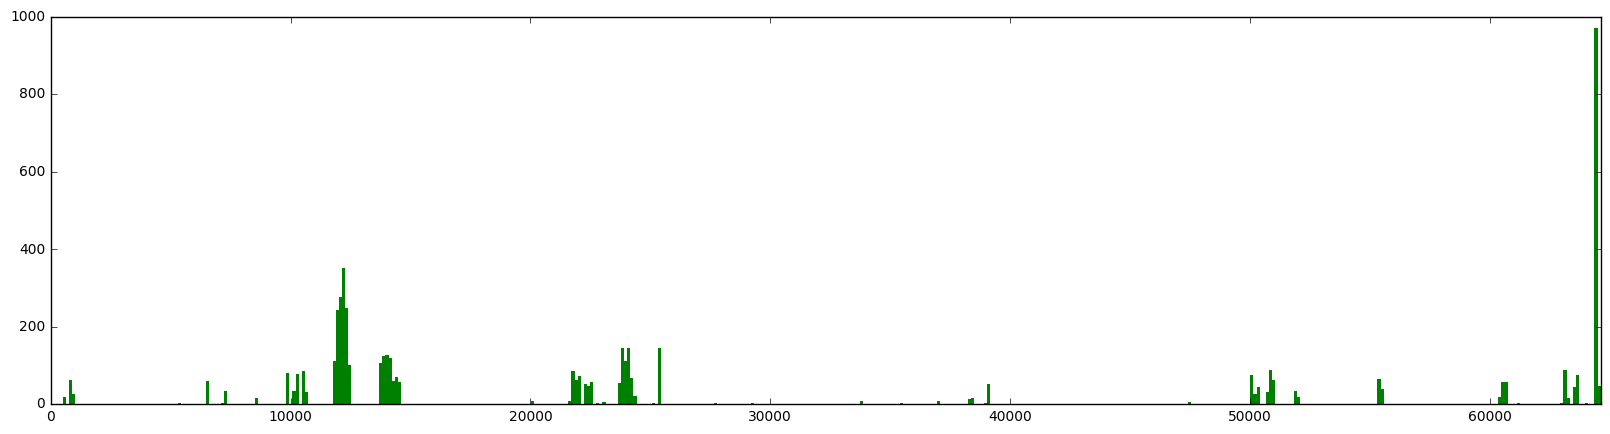

Chadwyck_British_1874_Trollope_PhineasReduxBy


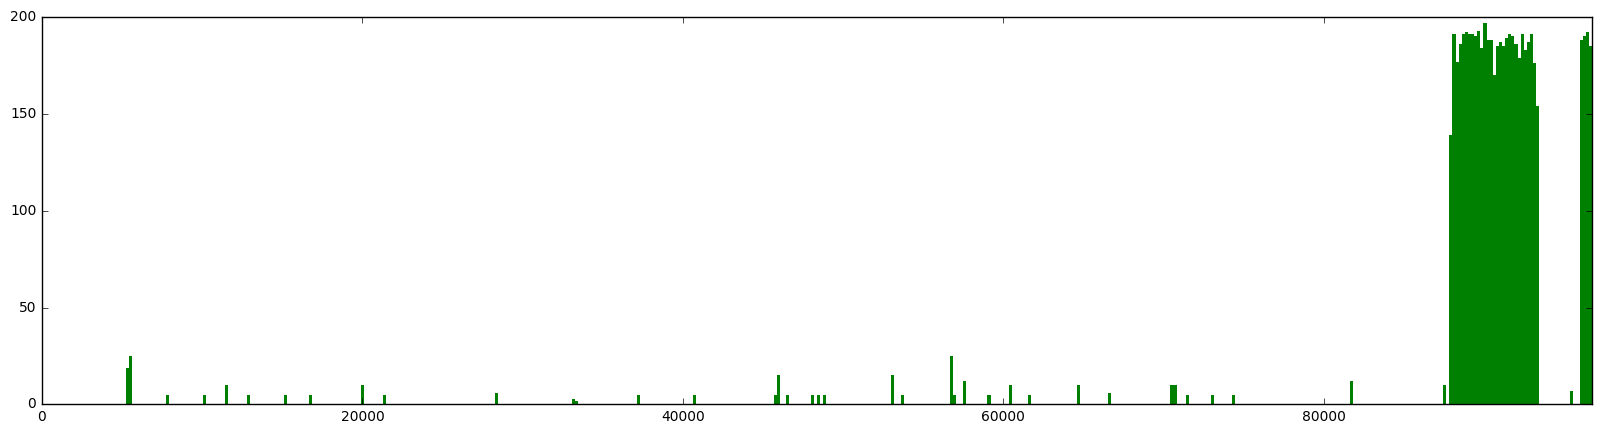

Chadwyck_British_1814_Burney_TheWandereror


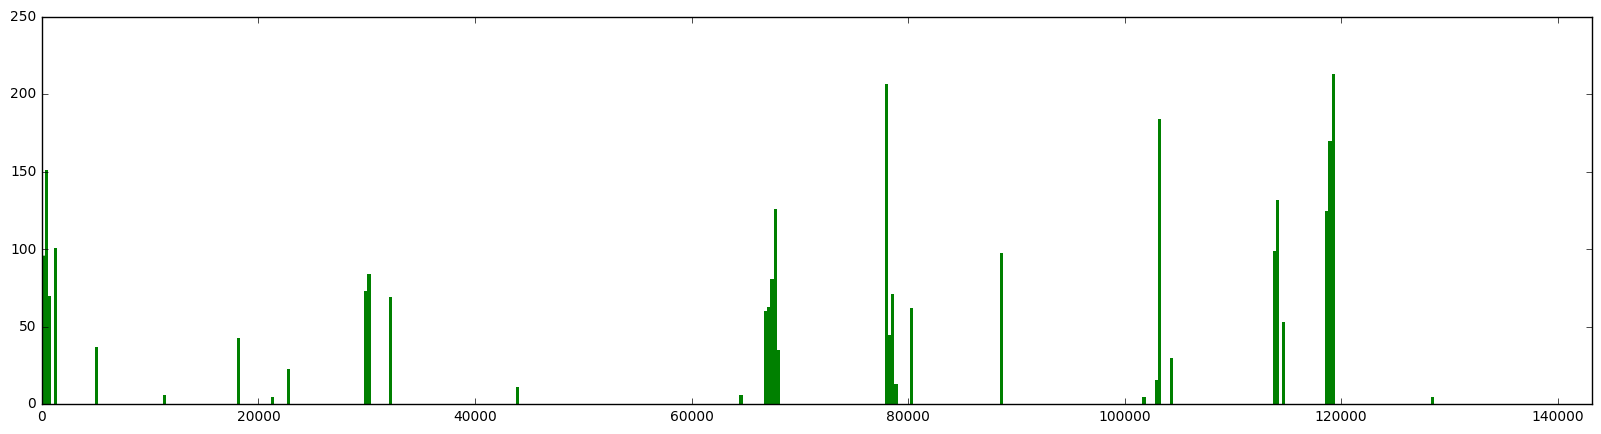

Chadwyck_British_1839_Dickens_TheLifeand


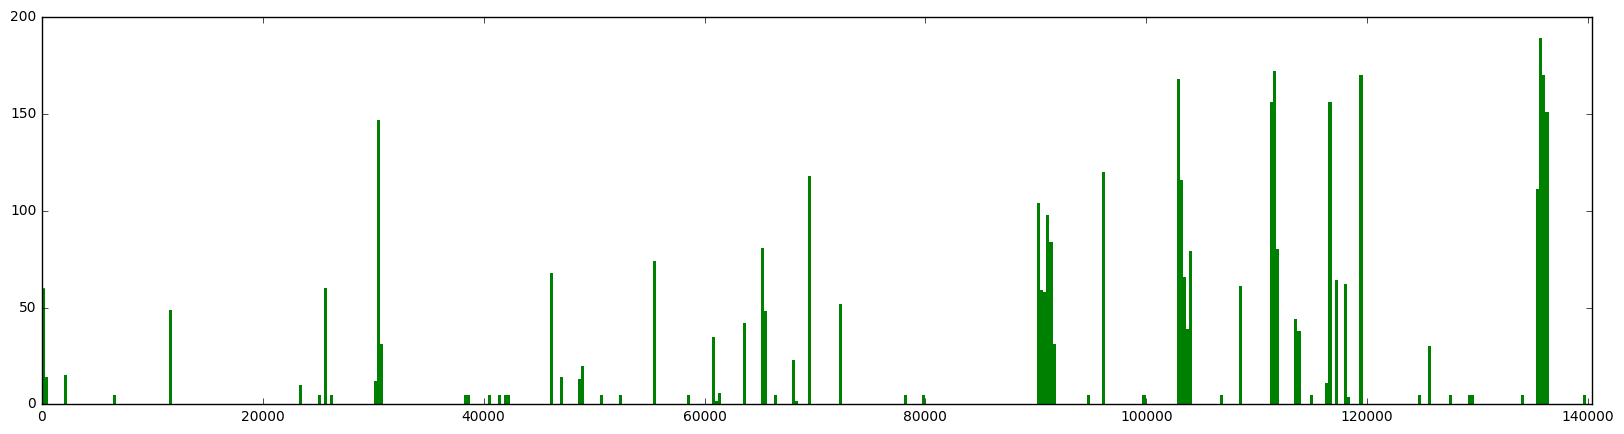

Chadwyck_British_1826_Disraeli_VivianGrey


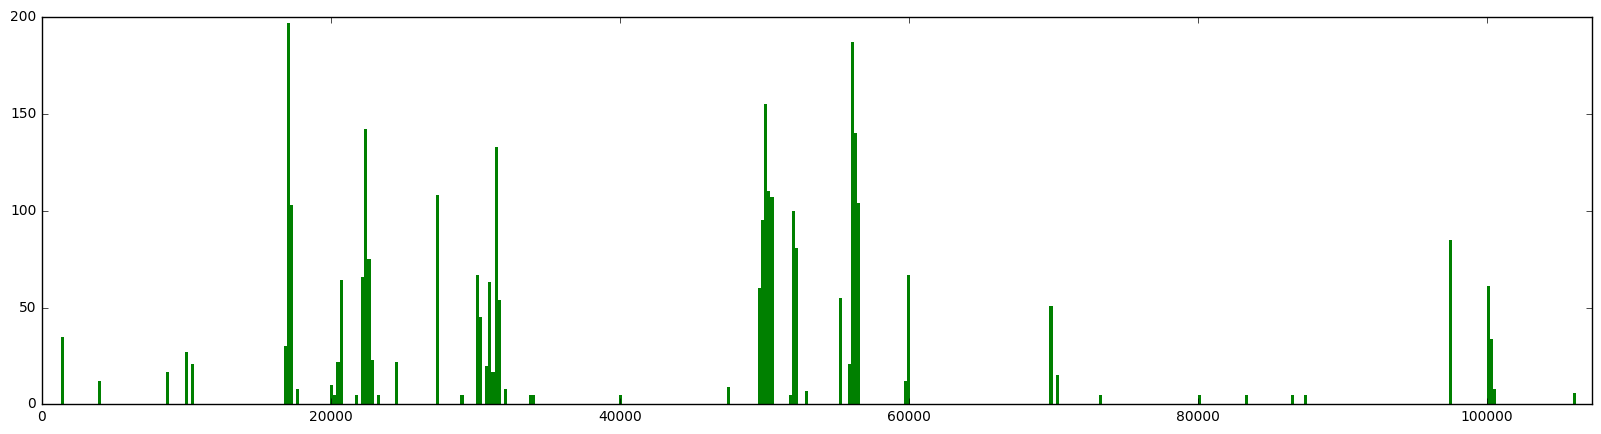

Chadwyck_British_1866_Eliot_FelixHoltThe


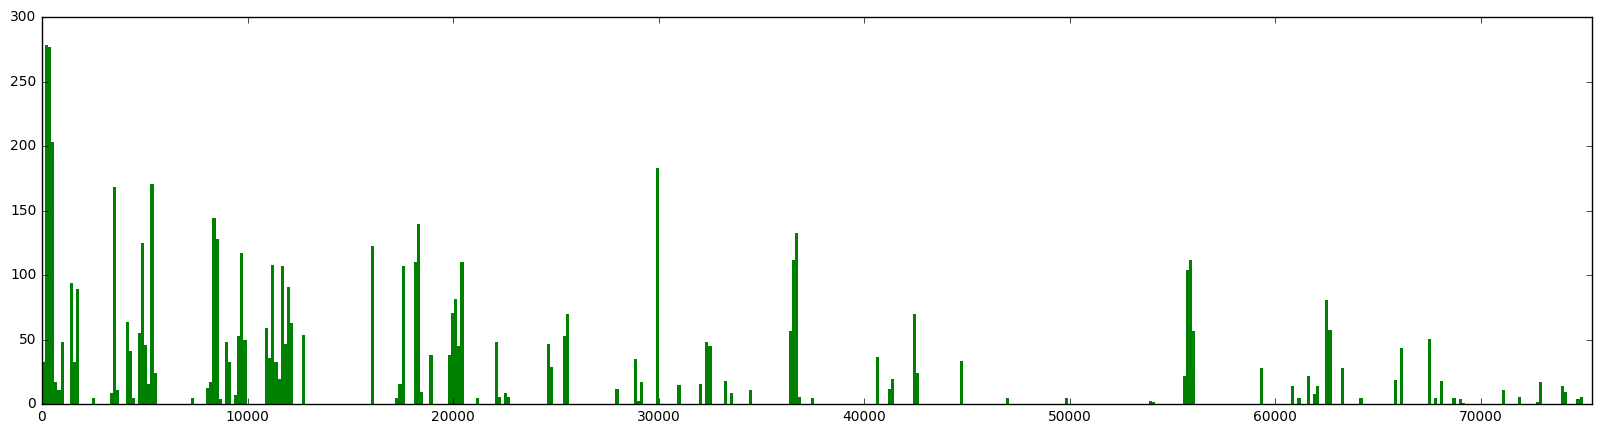

Chadwyck_British_1796_Burney_CamillaorA


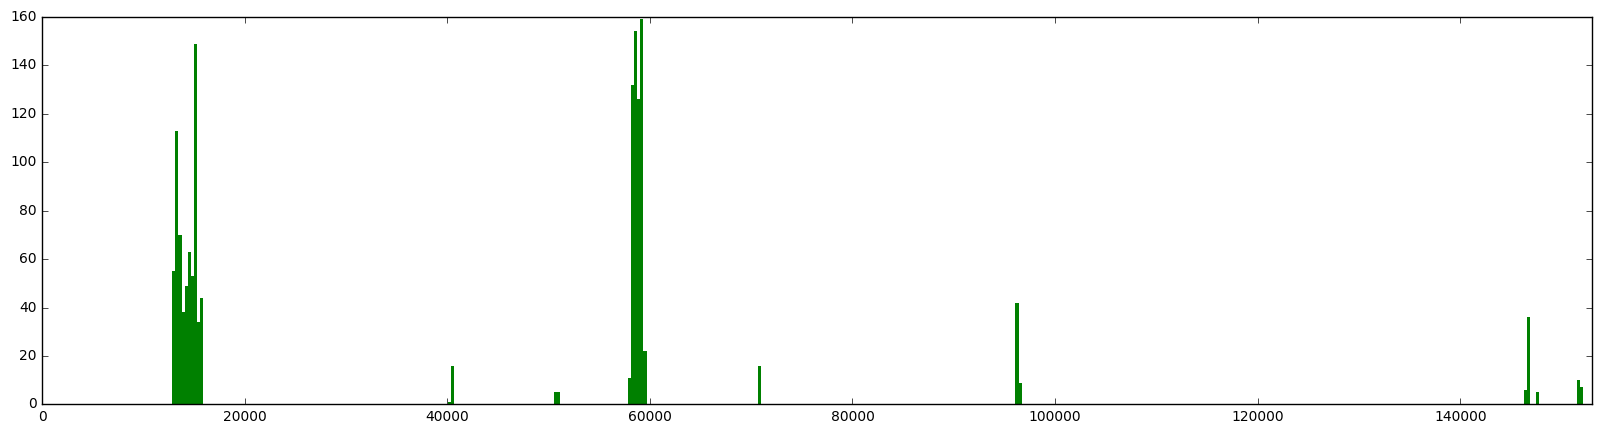

Chadwyck_British_1821_Galt_TheAyrshireLegatees


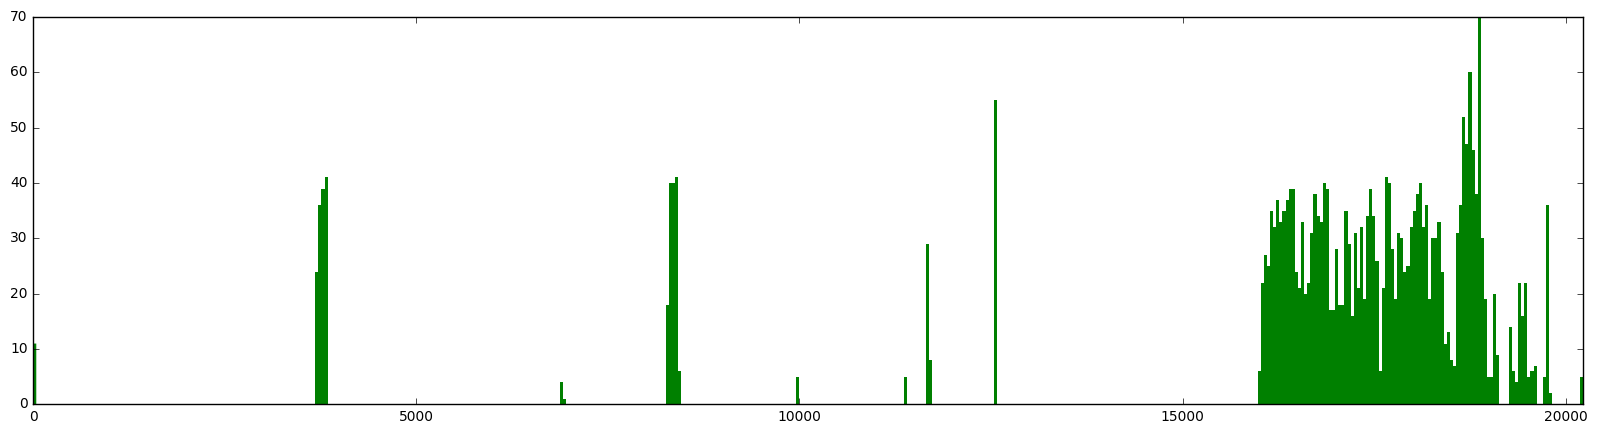

Chadwyck_British_1873_Trollope_TheEustaceDiamonds


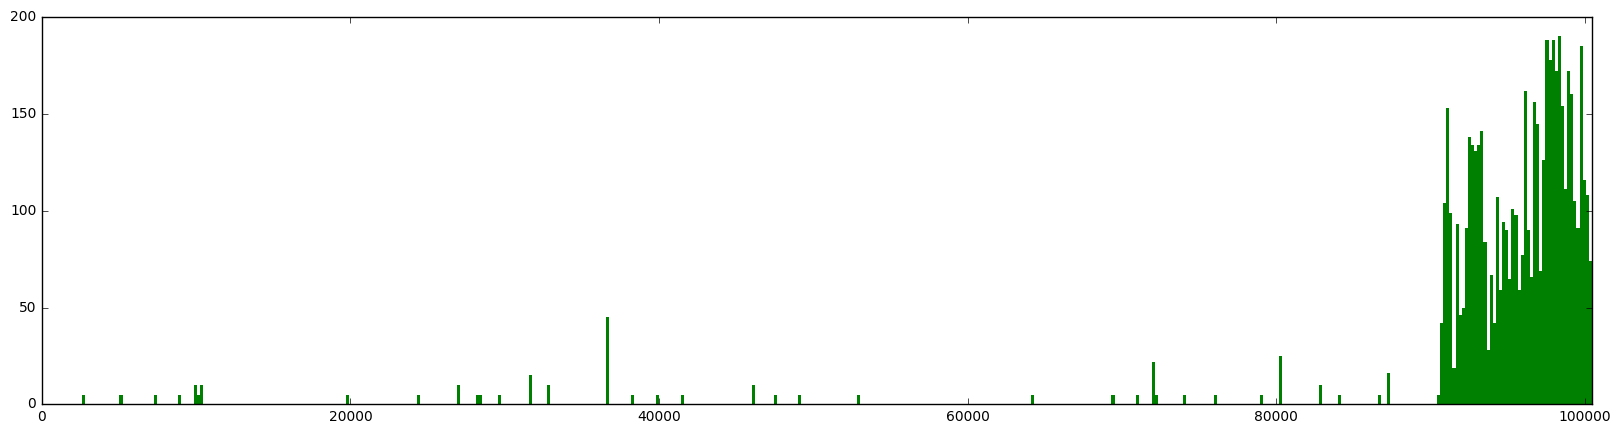

Chadwyck_British_1870_Disraeli_LothairBythe


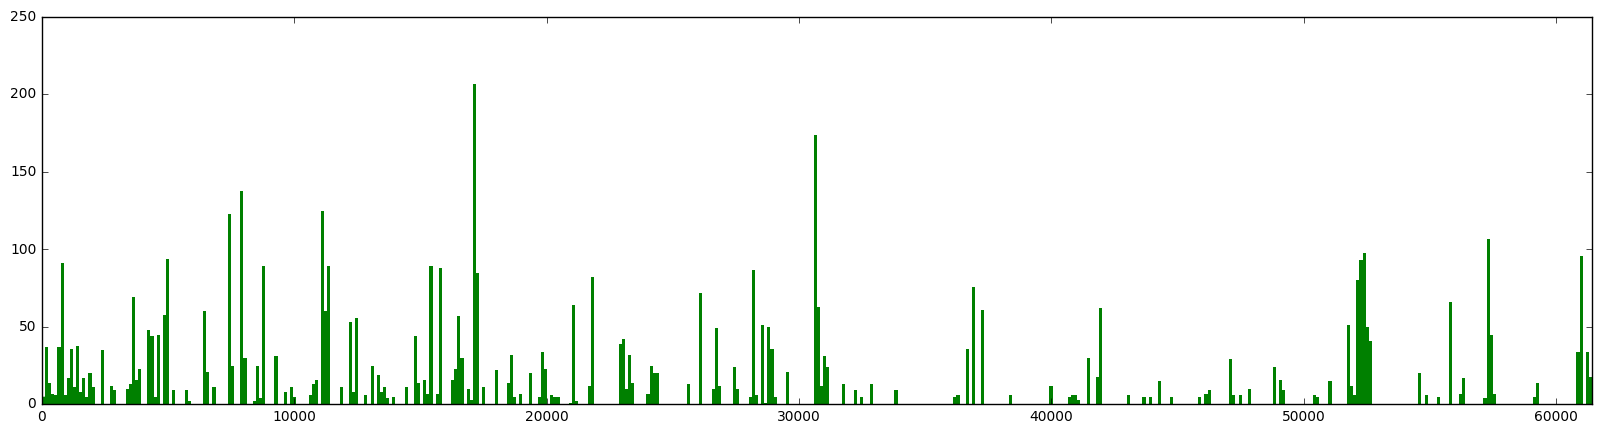

Chadwyck_British_1837_Trollope_TheVicarof


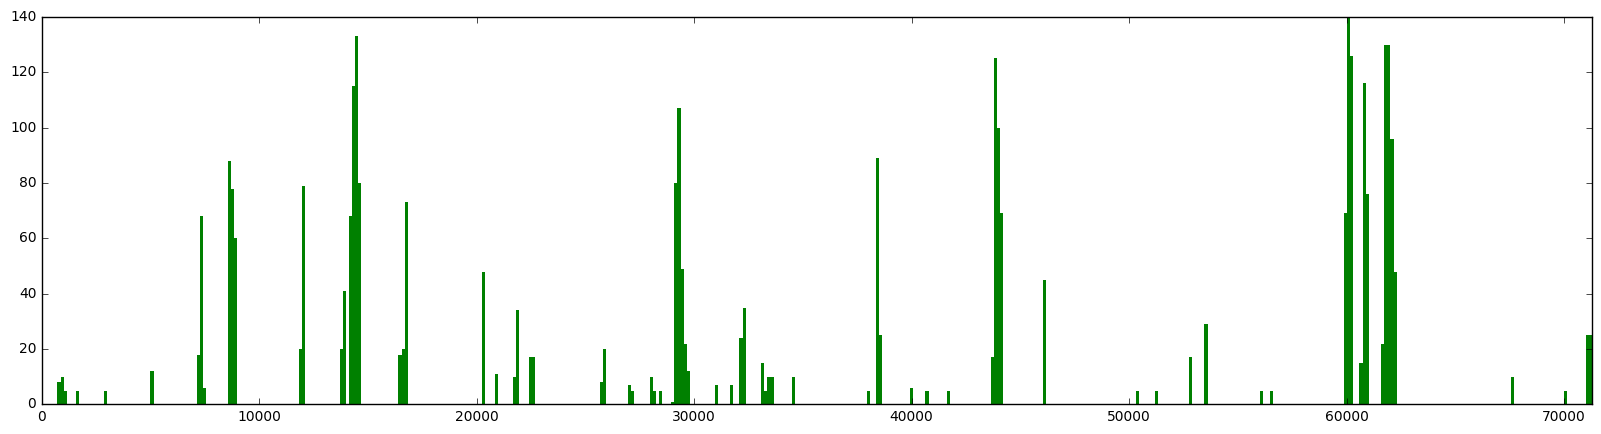

Chadwyck_Irish_1809_Edgeworth_EnnuiorMemoirs


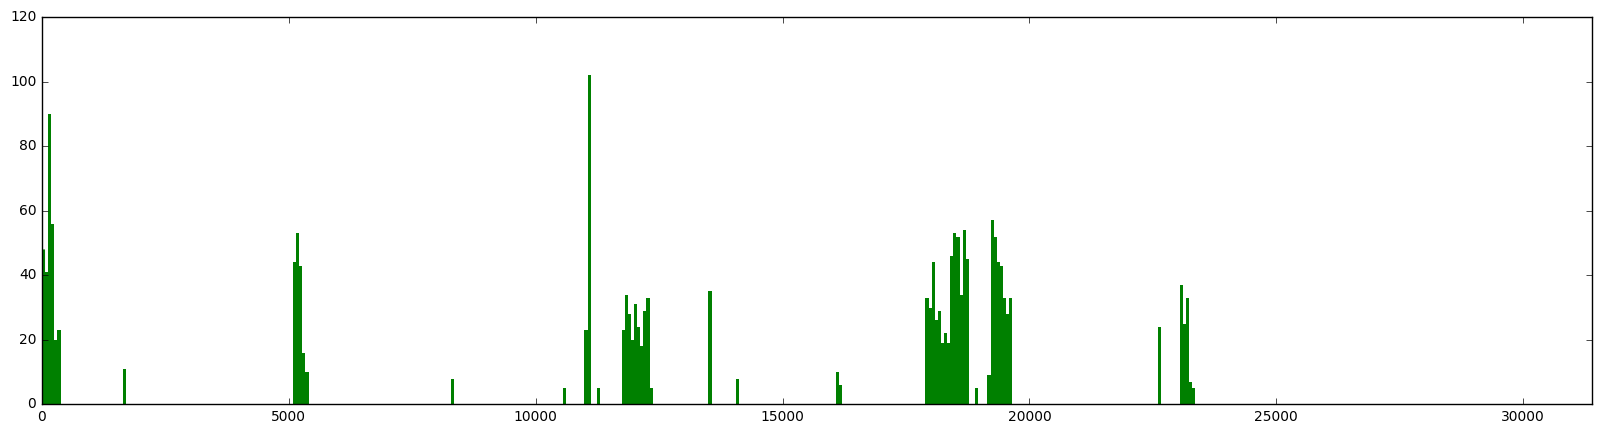

Chadwyck_British_1818_Scott_TheHeartof


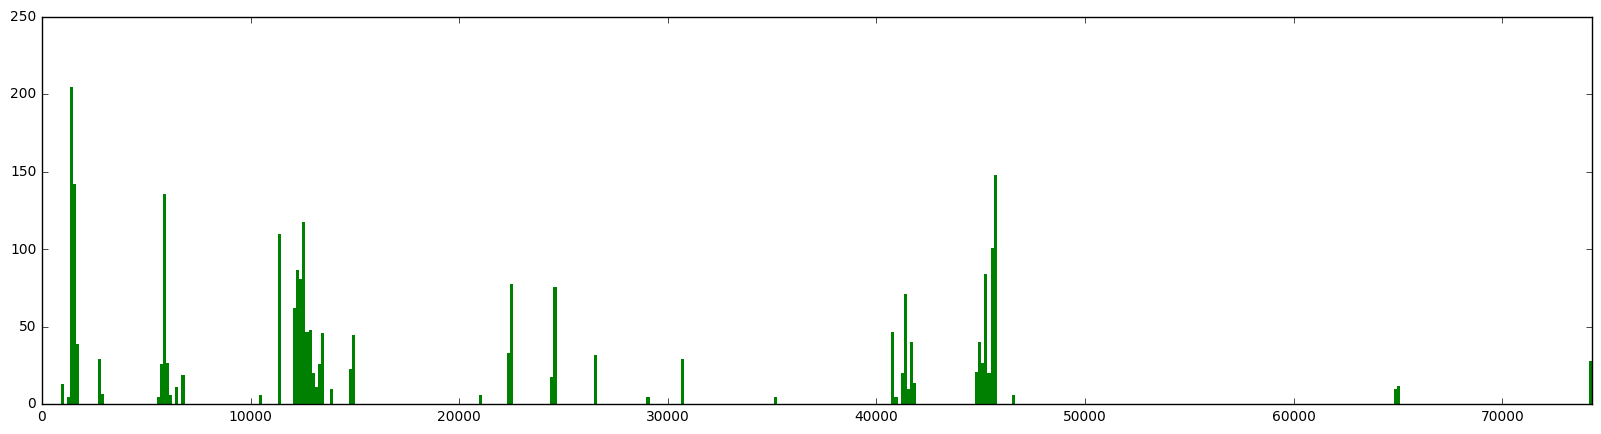

Chadwyck_British_1859_Eliot_AdamBedeBy


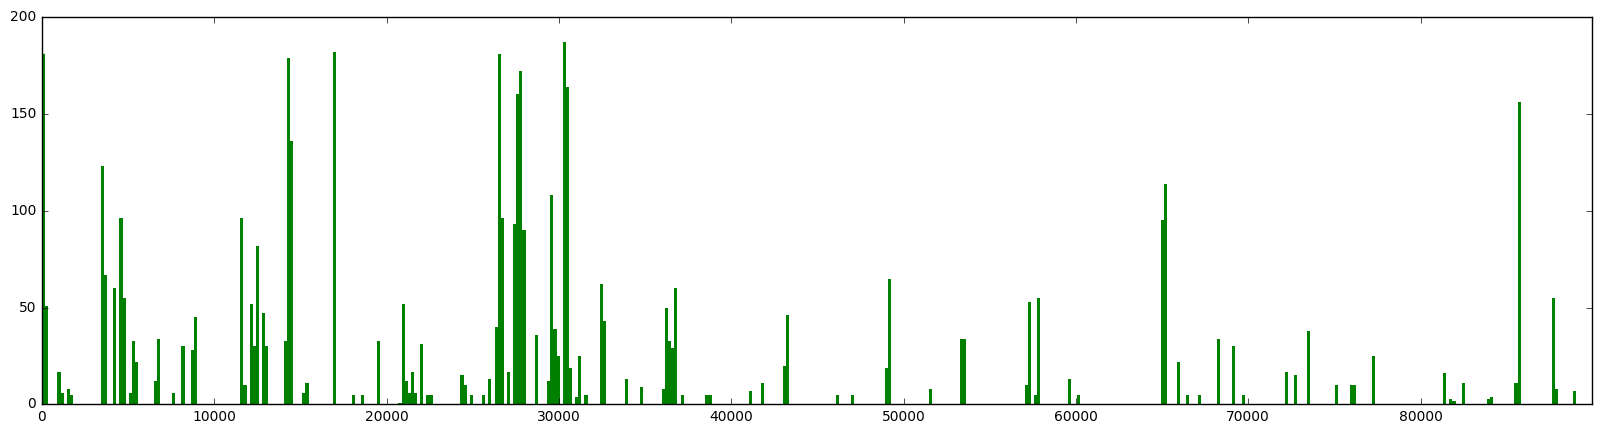

Chadwyck_British_1818_Ferrier_MarriageANovel


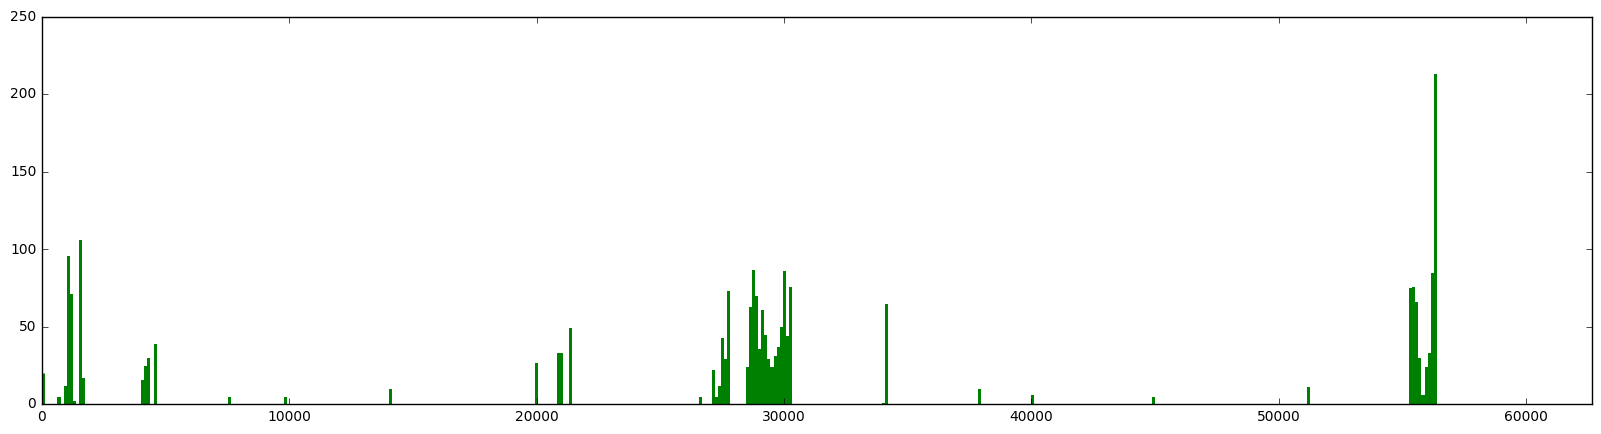

Chadwyck_British_1876_Eliot_DanielDerondaBy


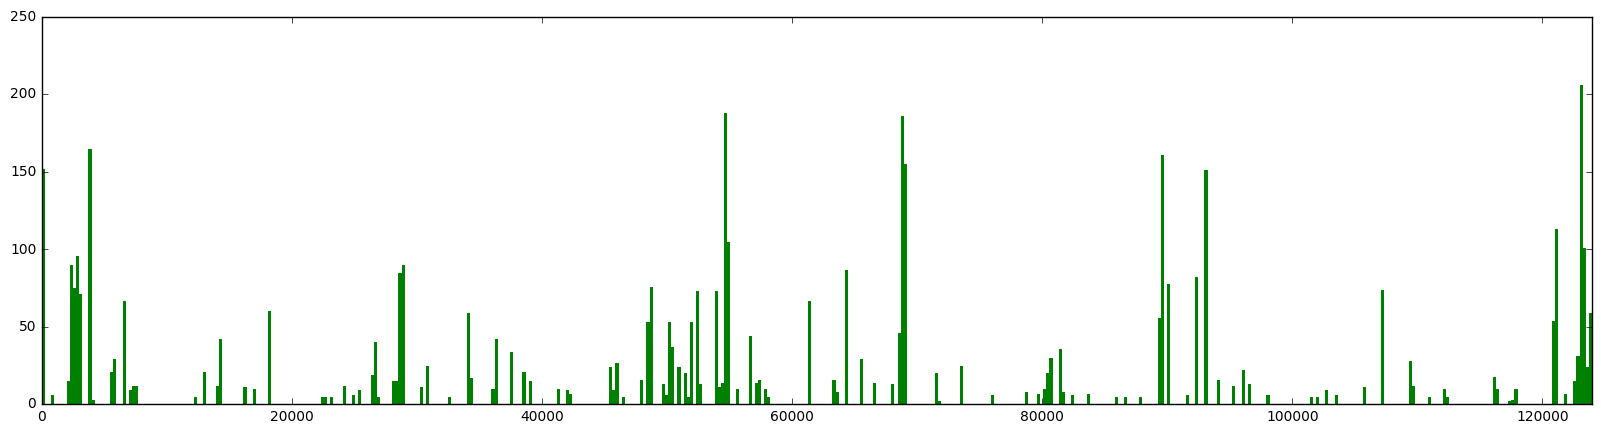

Chadwyck_British_1818_Shelley_FrankensteinorThe


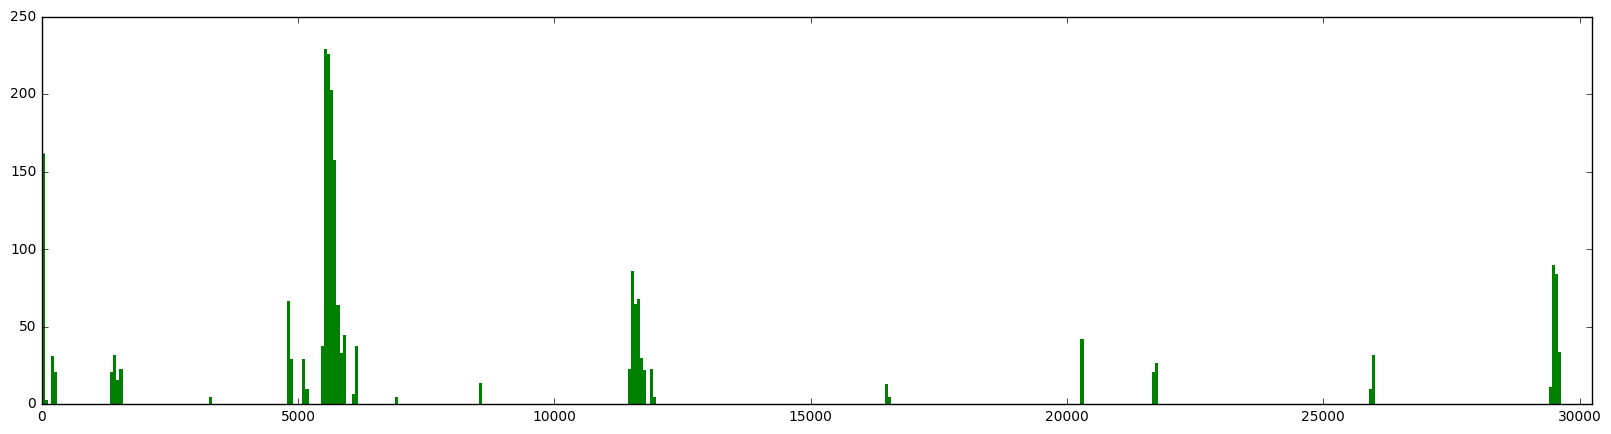

Chadwyck_British_1805_Godwin_FleetwoodOrThe


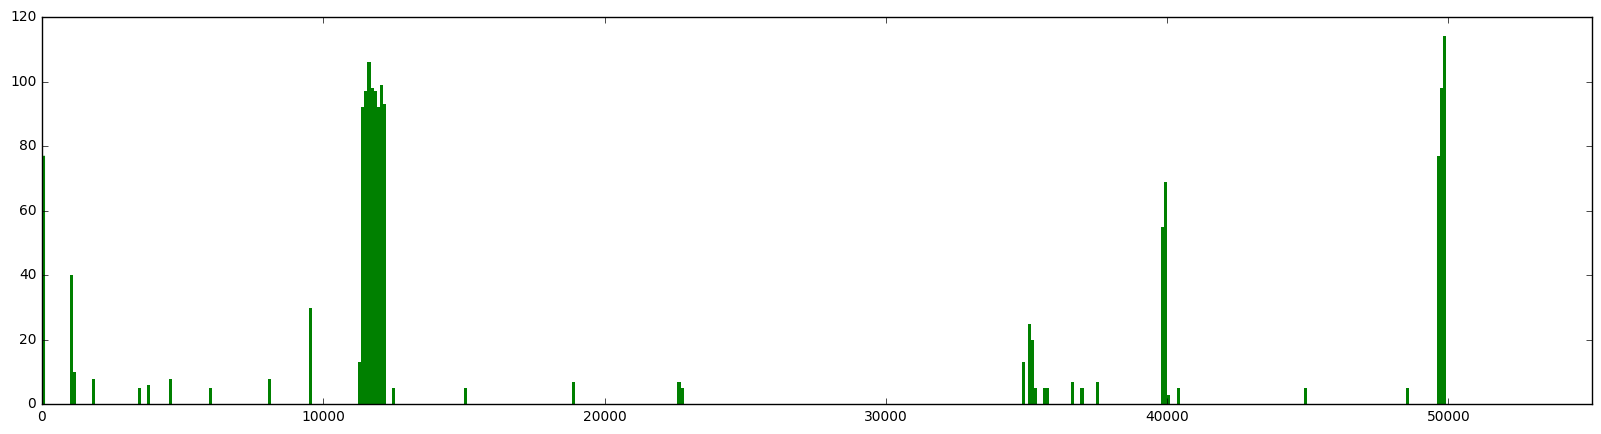

Chadwyck_British_1849_Froude_TheNemesisof


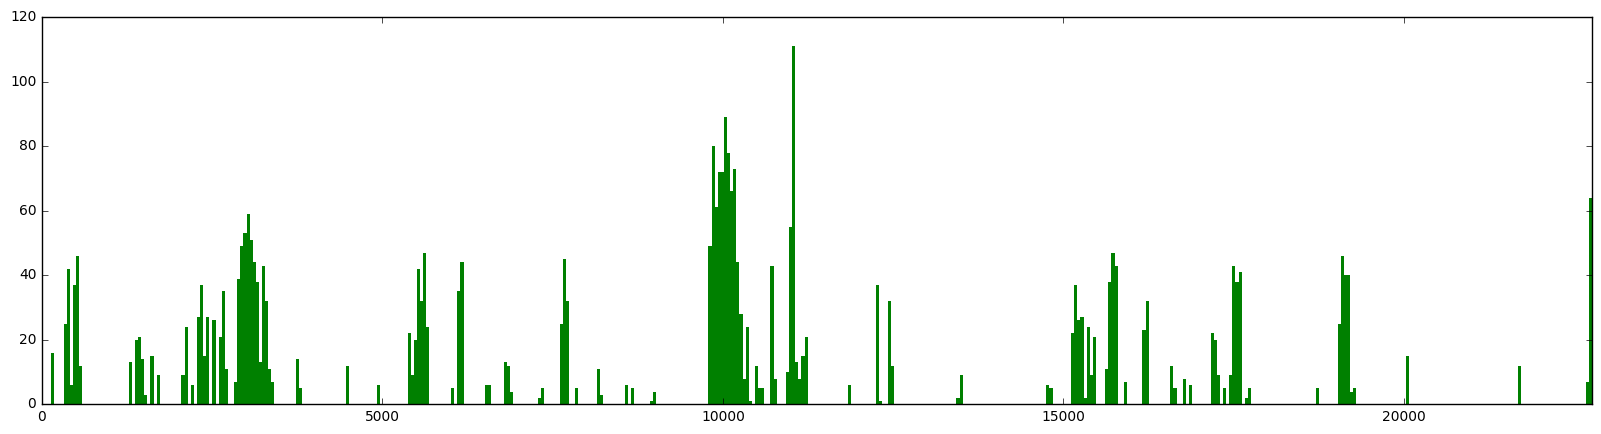

Chadwyck_British_1822_Galt_TheProvost


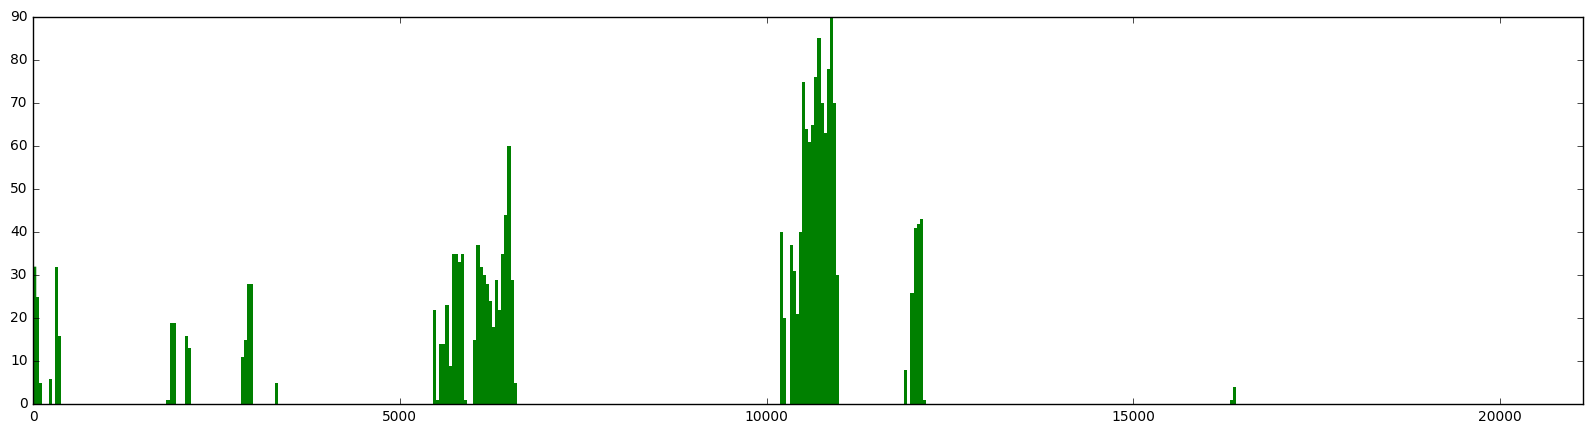

Chadwyck_British_1796_Hays_MemoirsofEmma


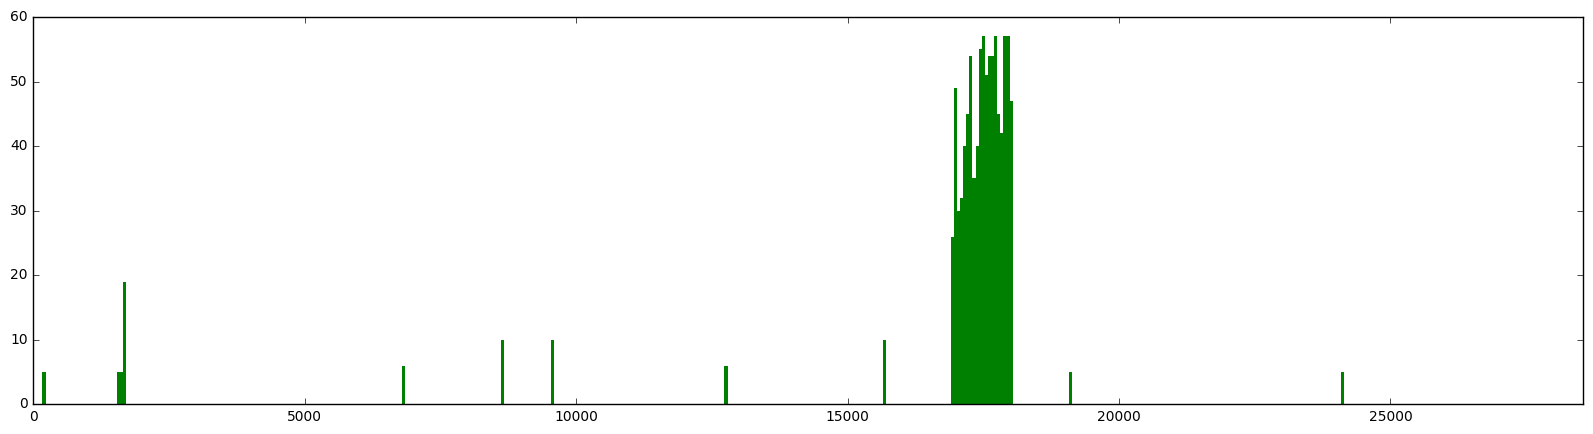

Chadwyck_British_1863_Kingsley_TheWater-BabiesA


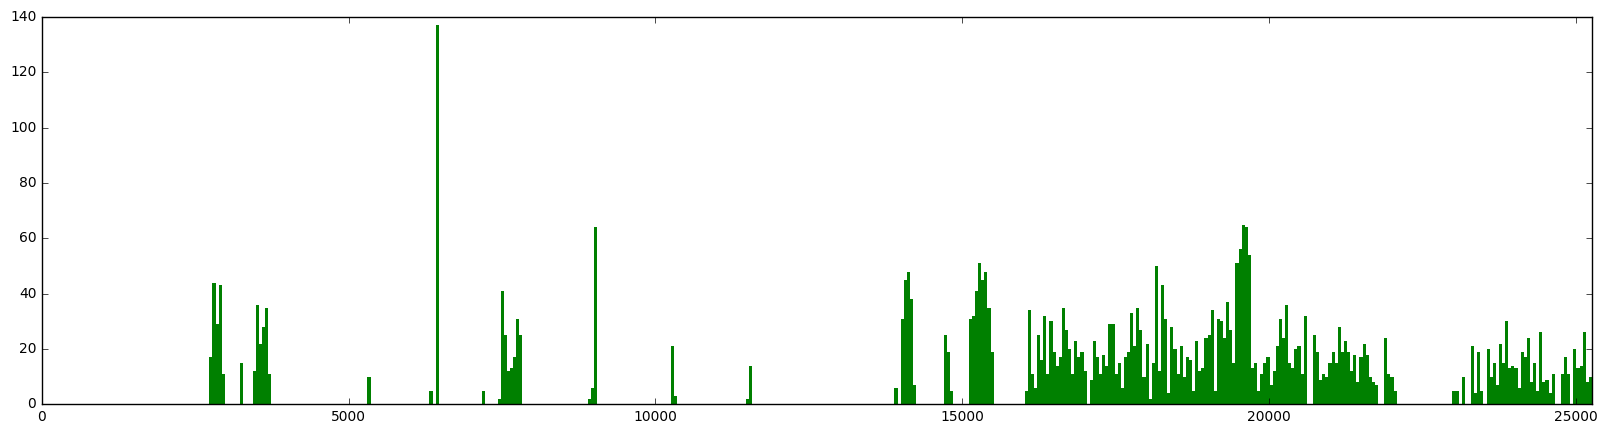

Chadwyck_British_1794_Holcroft_TheAdventuresof


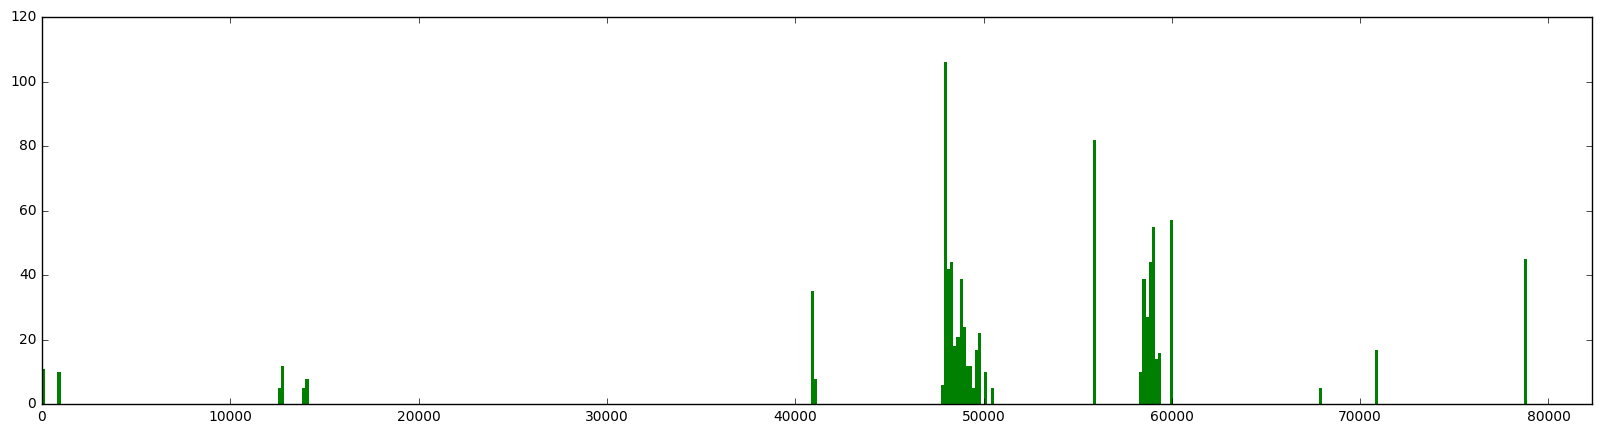

Chadwyck_British_1857_Hughes_TomBrownSchool


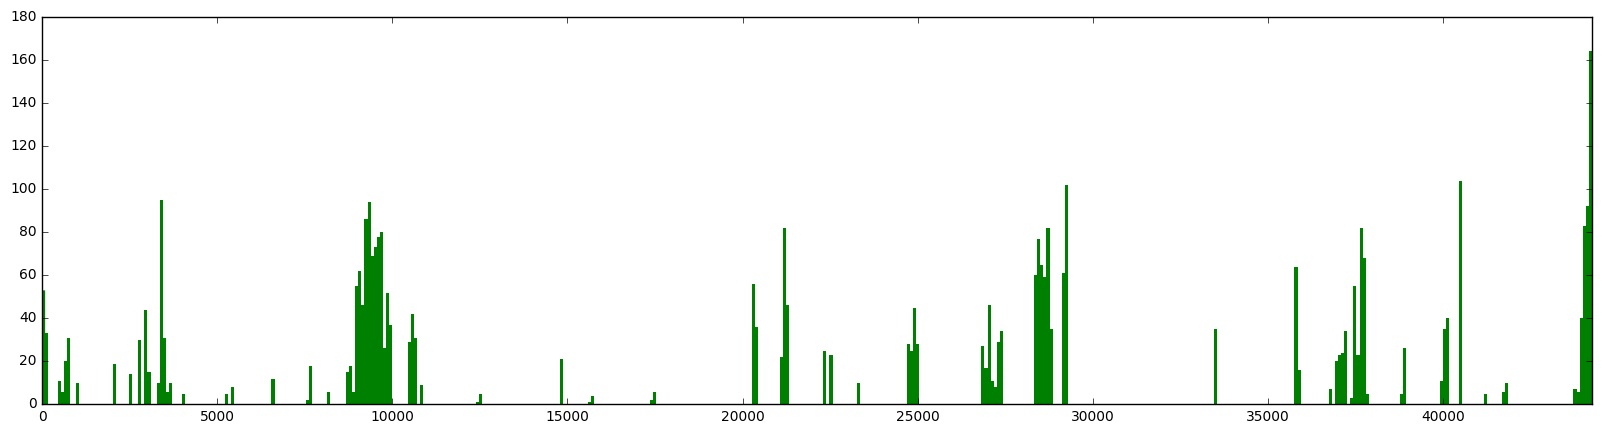

Chadwyck_British_1864_Charles_ChroniclesOfThe


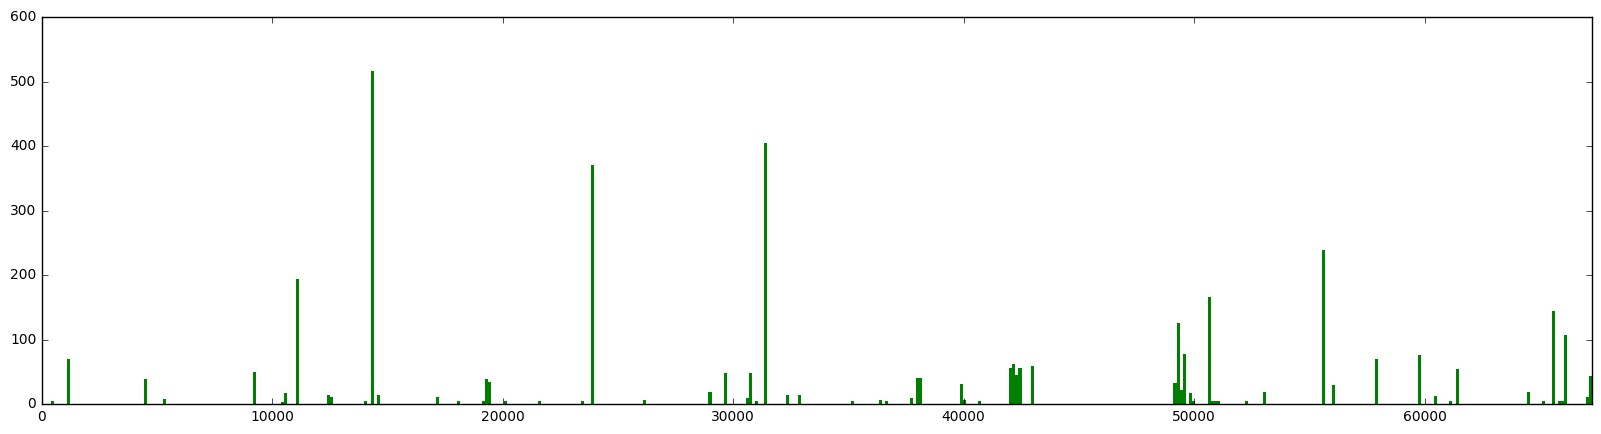

Chadwyck_British_1848_Bronte_TheTenantof


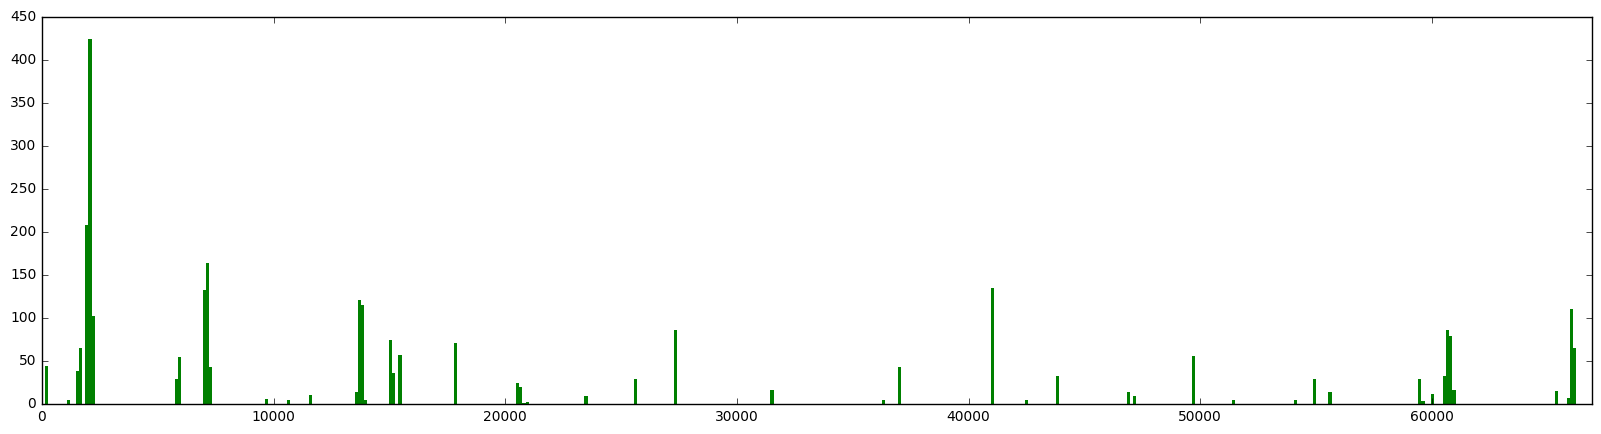

Chadwyck_British_1857_Bronte_TheProfessorA


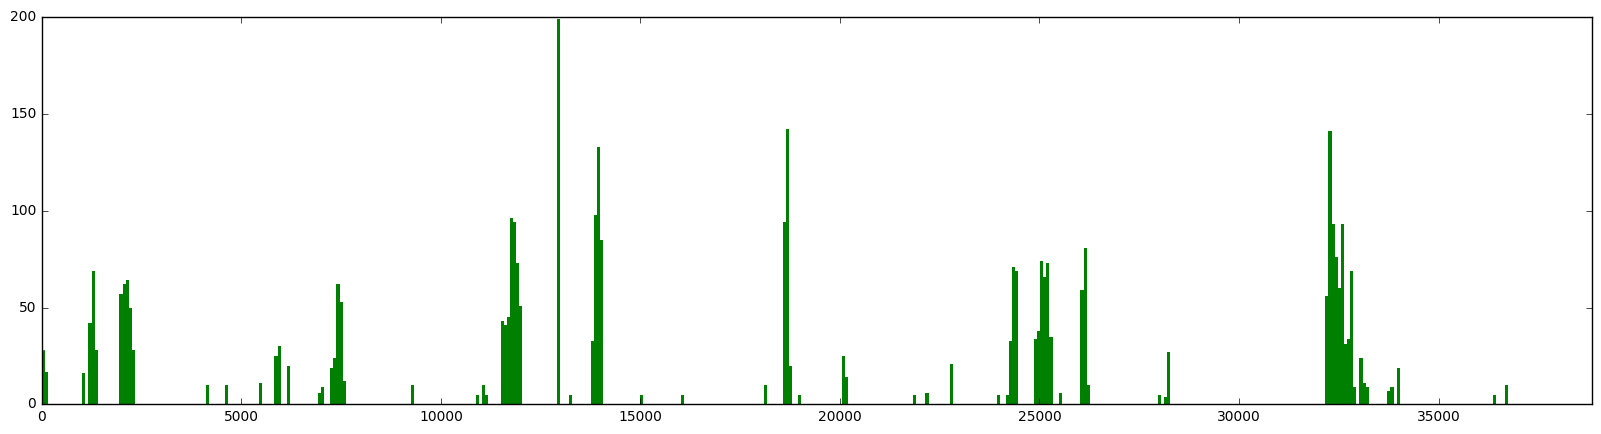

Chadwyck_British_1849_Gaskell_MaryBartonA


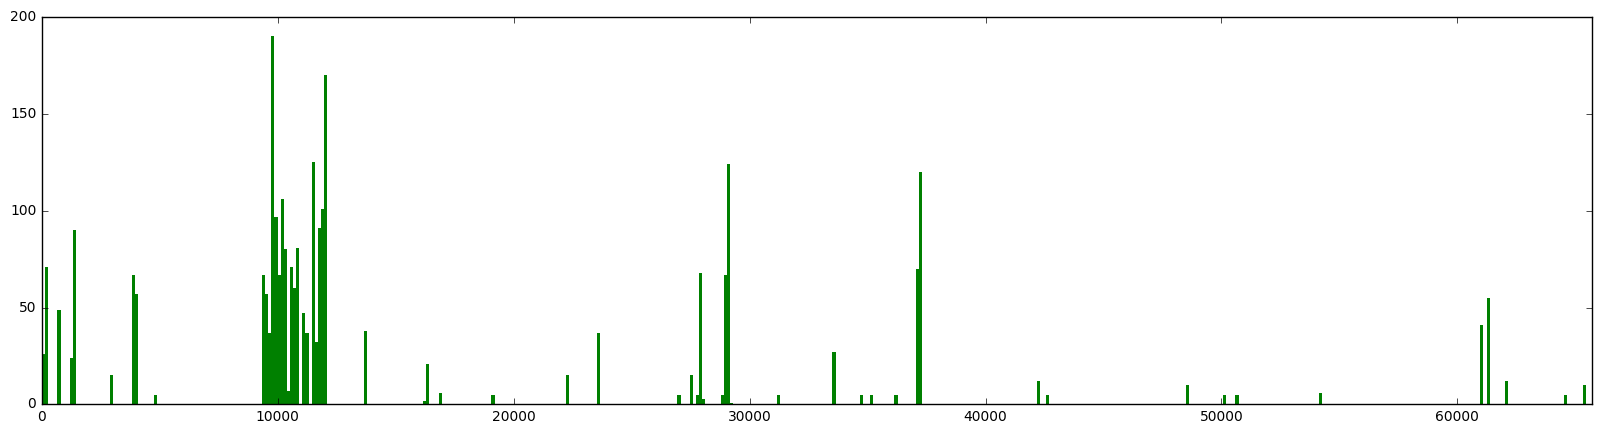

Chadwyck_British_1860_Eliot_TheMillon


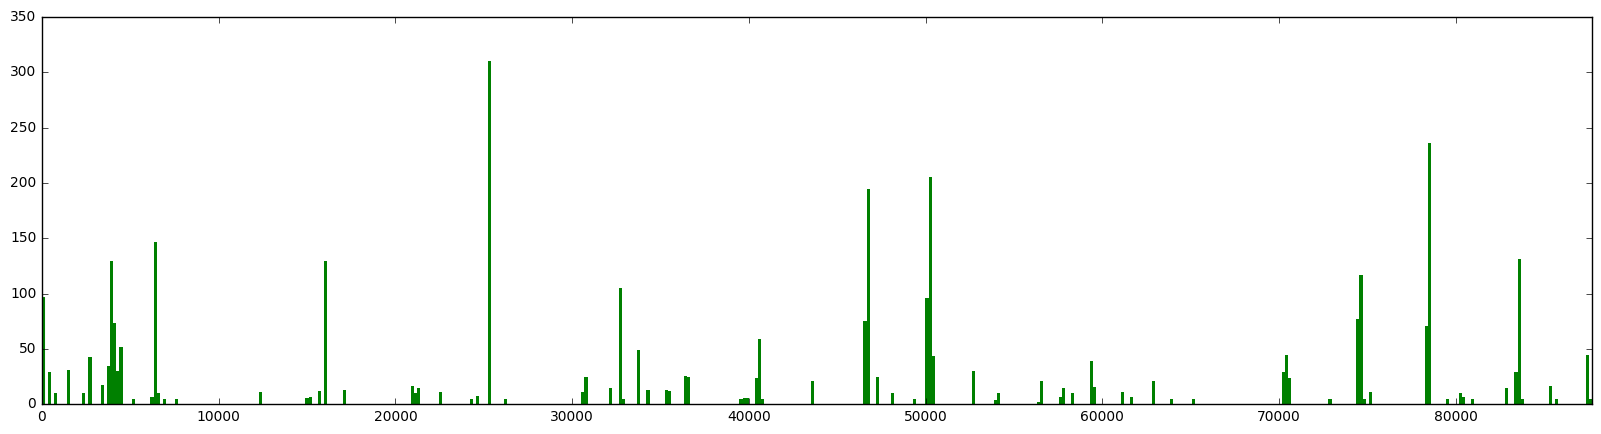

Chadwyck_British_1850_Dickens_ThePersonalHistory


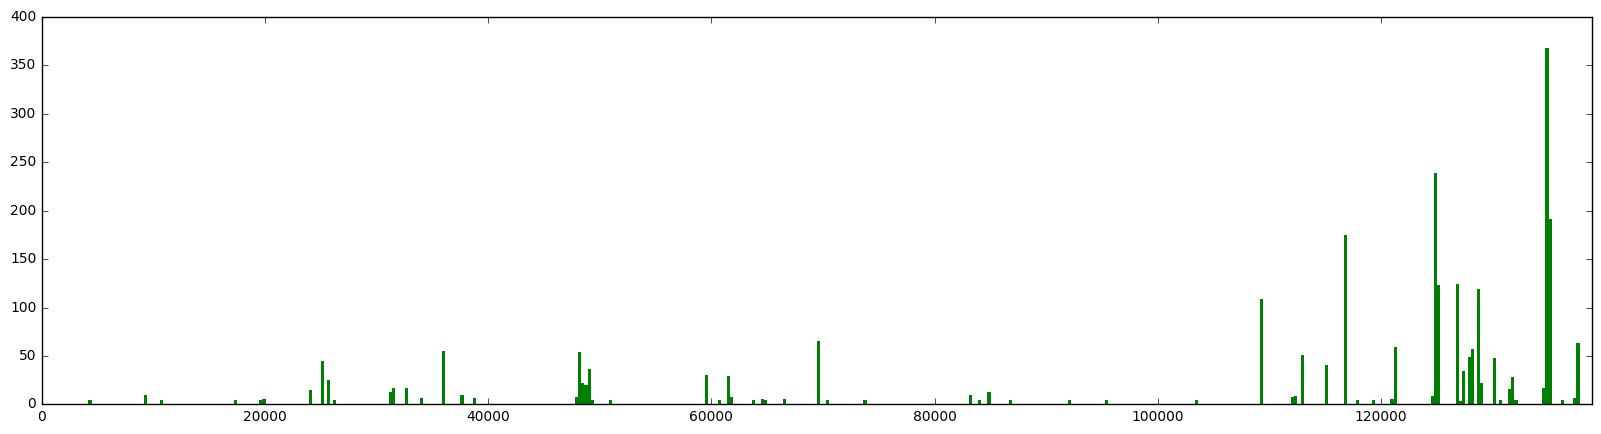

Chadwyck_British_1823_Shelley_ValpergaOrthe


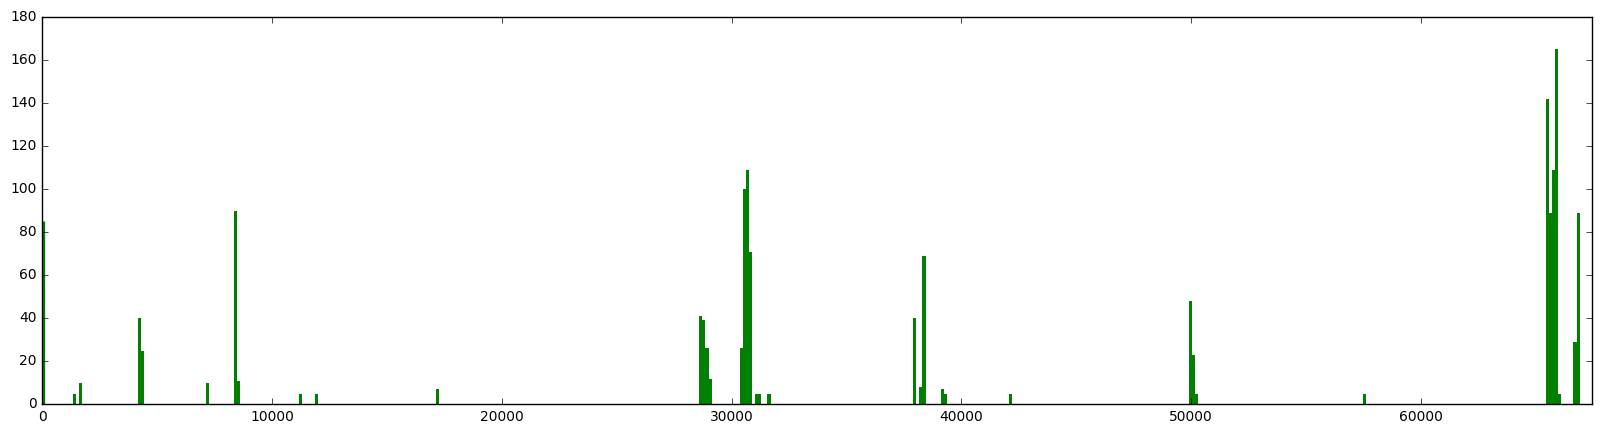

Chadwyck_British_1870_Dickens_TheMysteryof


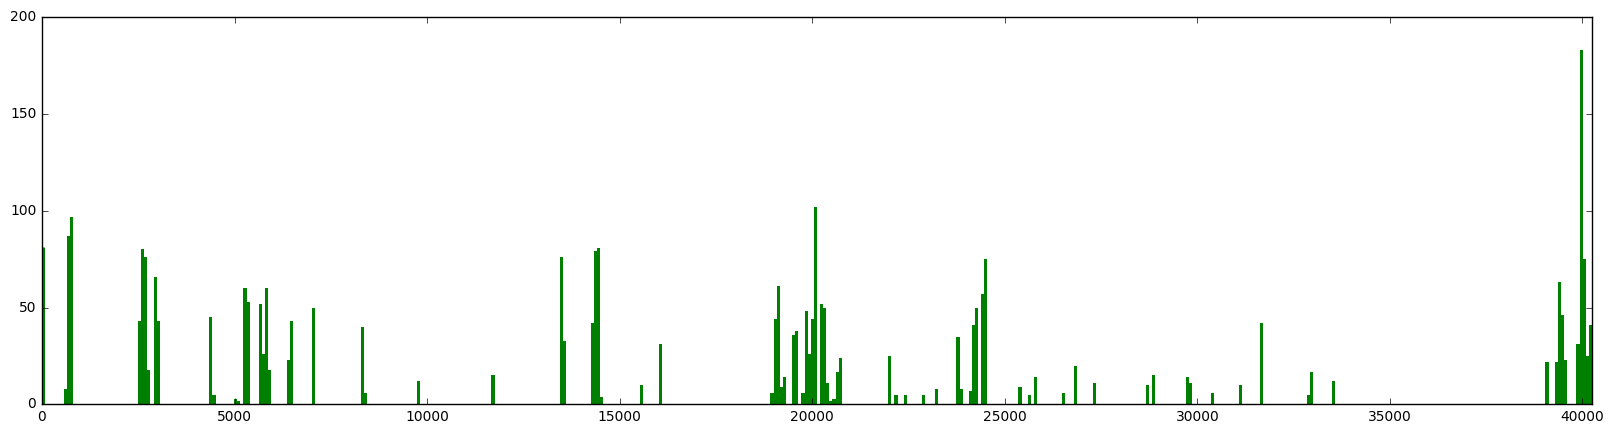

Chadwyck_British_1853_Yonge_TheHeirof


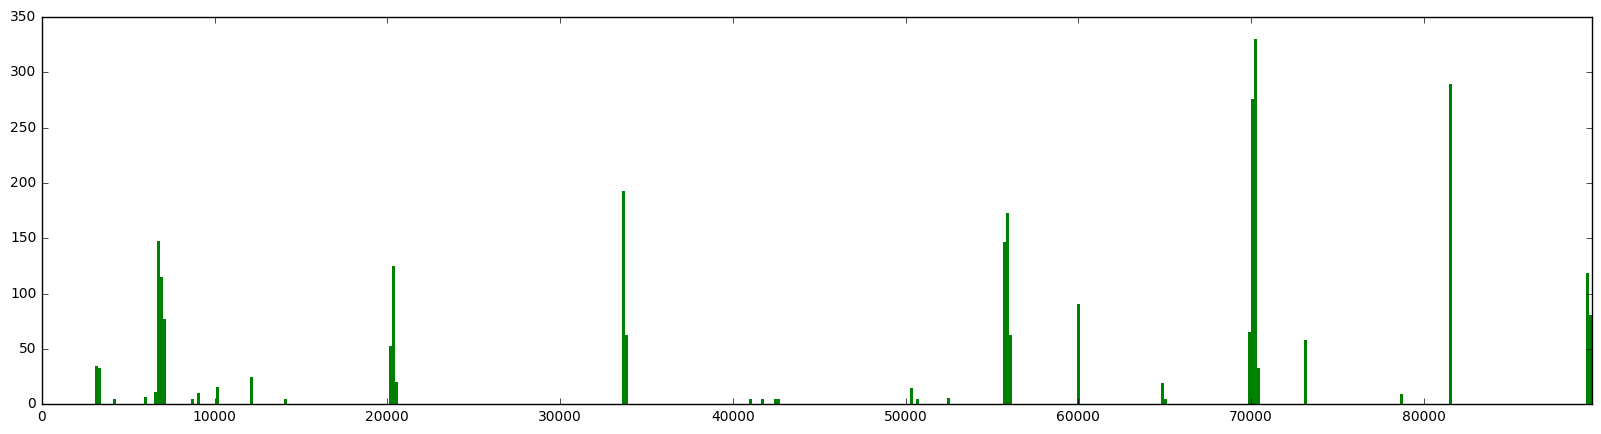

Chadwyck_British_1887_Haggard_SheAHistory


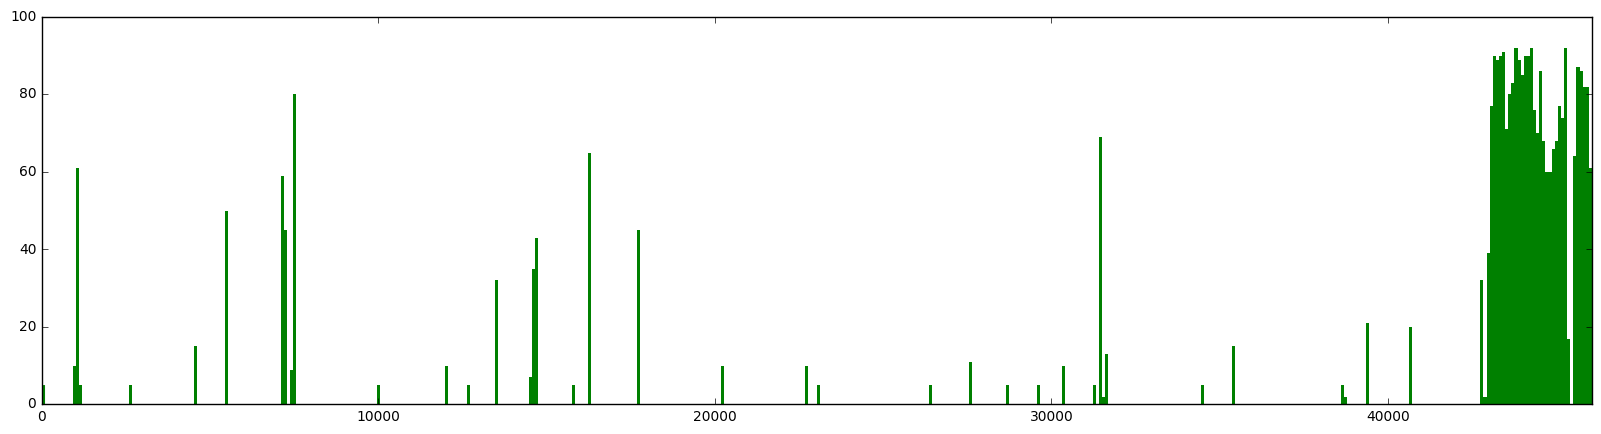

Chadwyck_British_1865_Dickens_OurMutualFriend


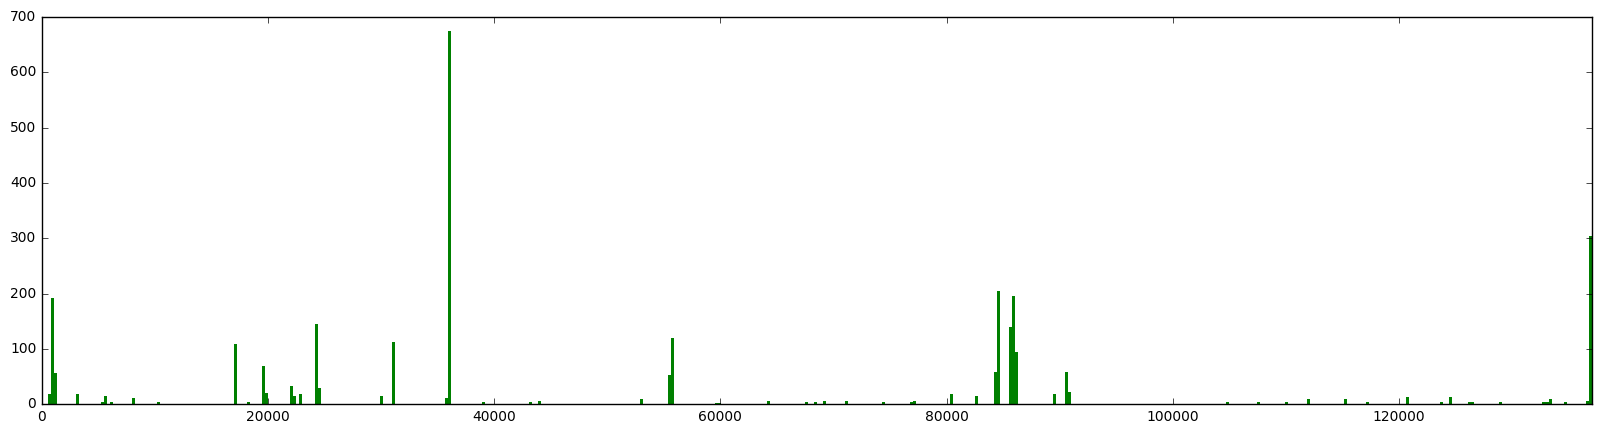

Chadwyck_British_1823_Galt_TheEntailor


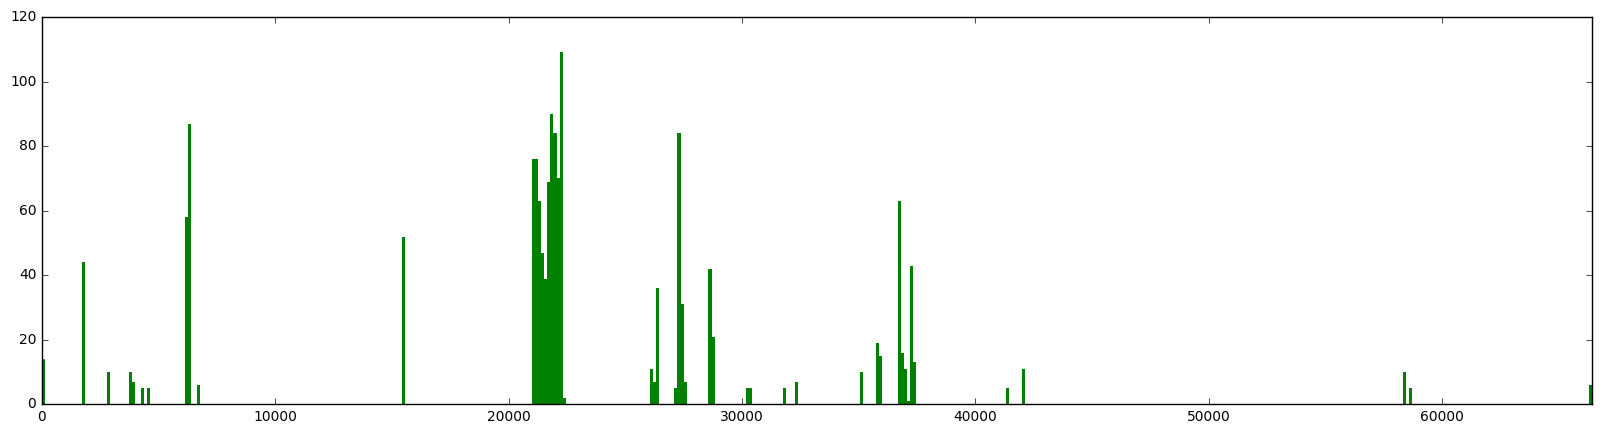

Chadwyck_British_1858_Eliot_ScenesofClerical


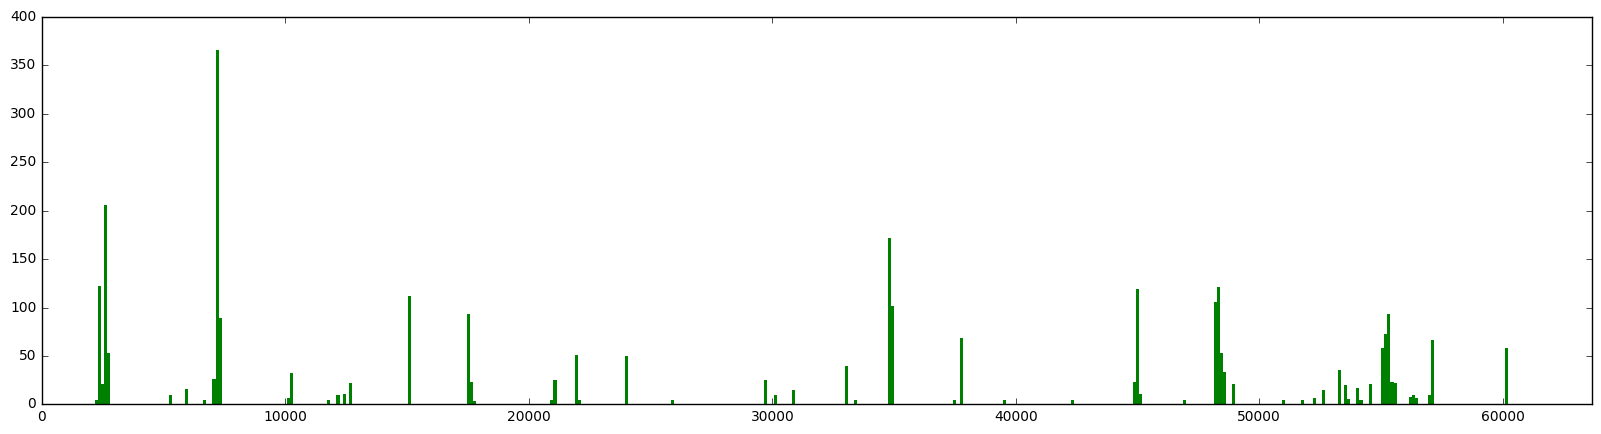

Chadwyck_British_1848_Newman_LossandGain


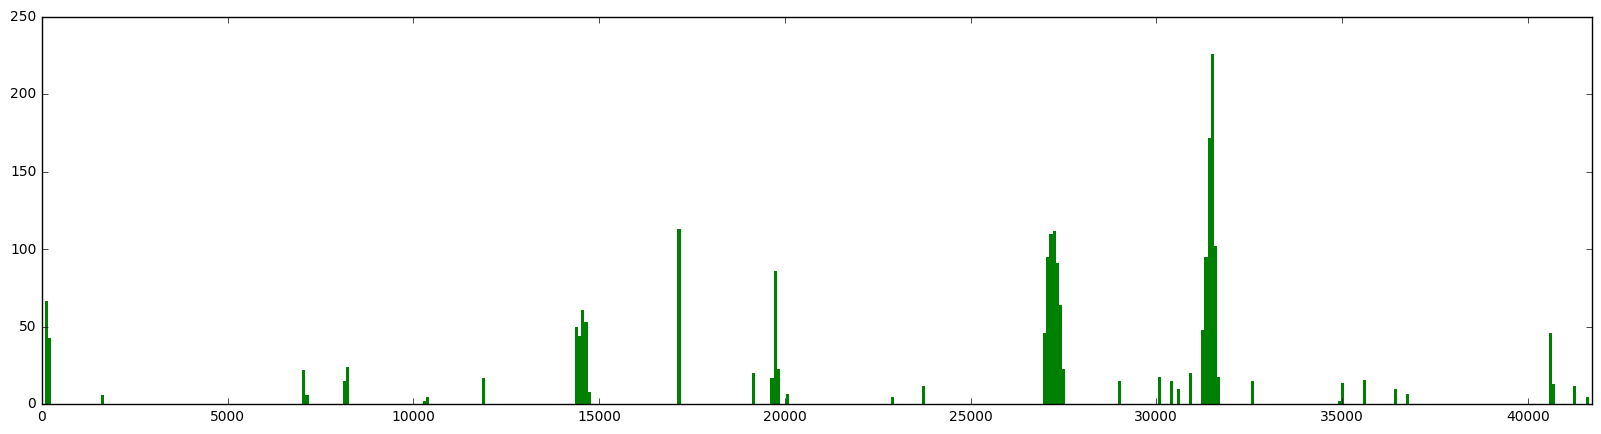

Chadwyck_Irish_1801_Edgeworth_BelindaByMaria


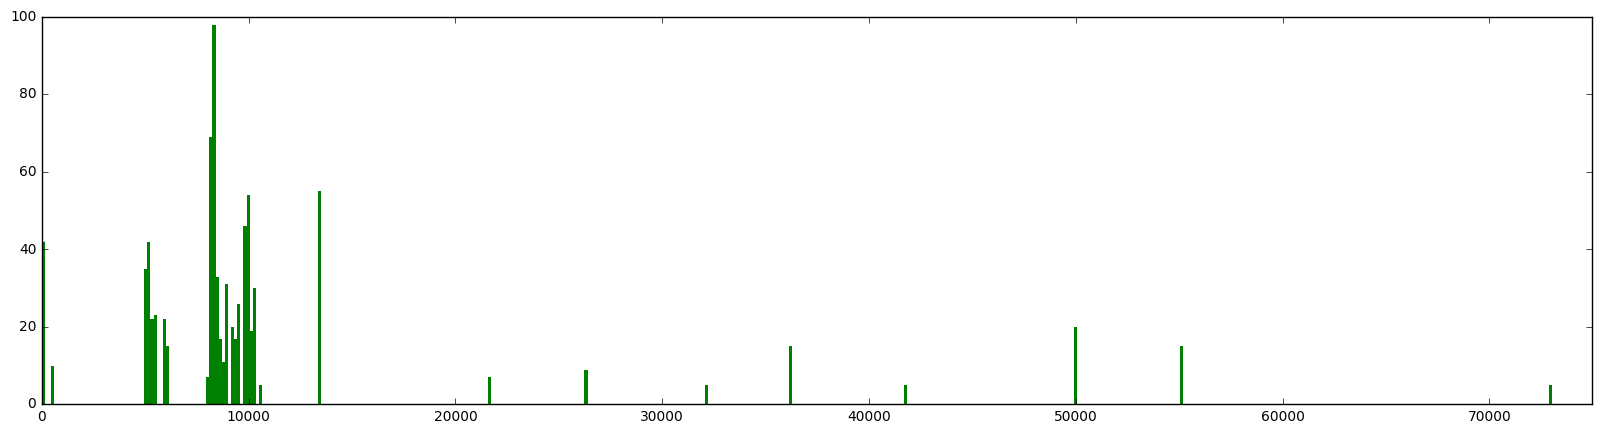

Chadwyck_British_1858_Thackeray_TheVirginiansA


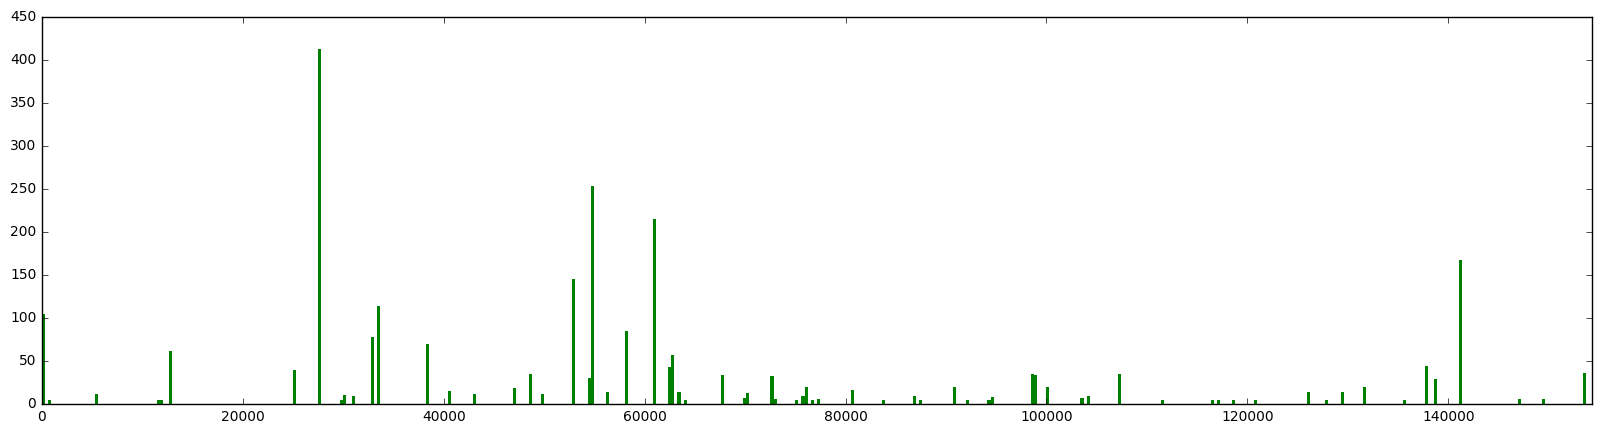

Chadwyck_British_1857_Trollope_BarchesterTowersBy


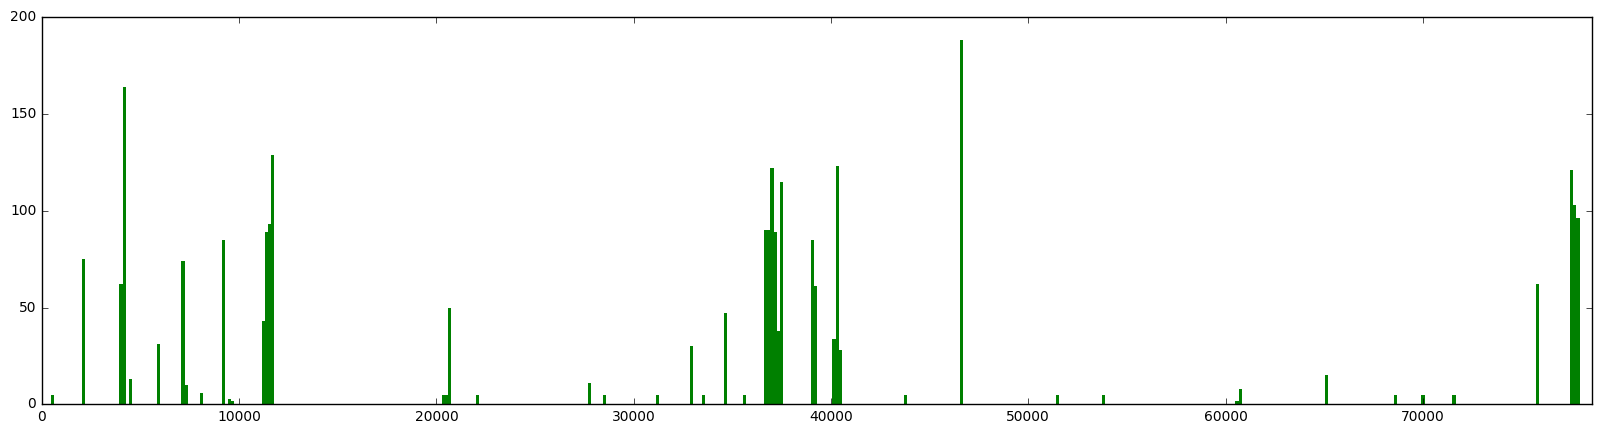

Chadwyck_British_1835_Shelley_Lodore


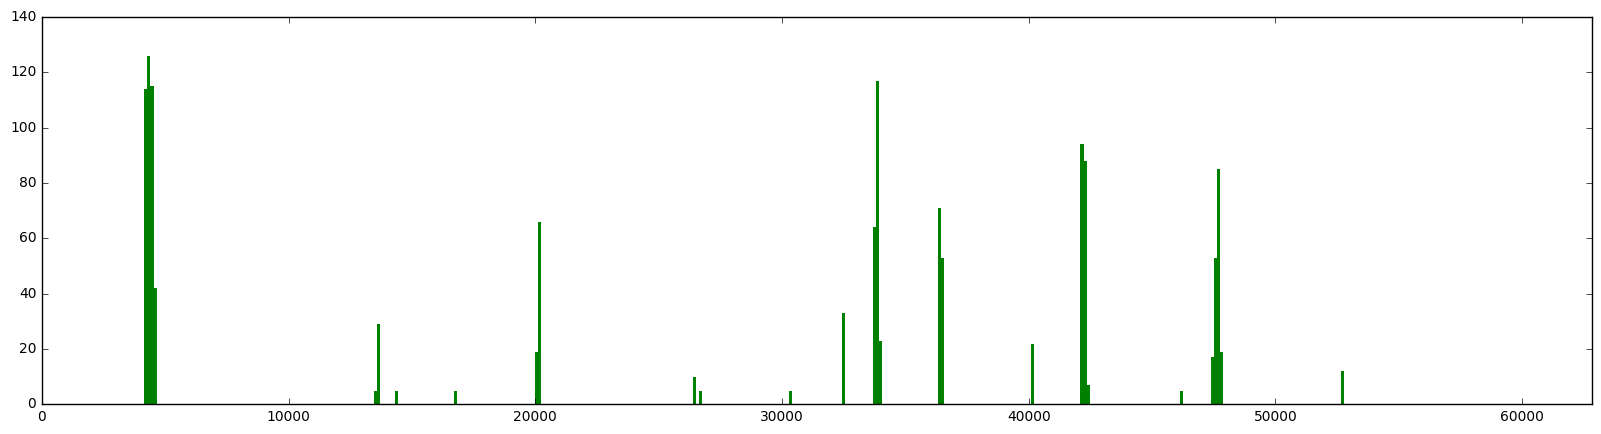

Chadwyck_British_1895_Allen_TheWomanWho


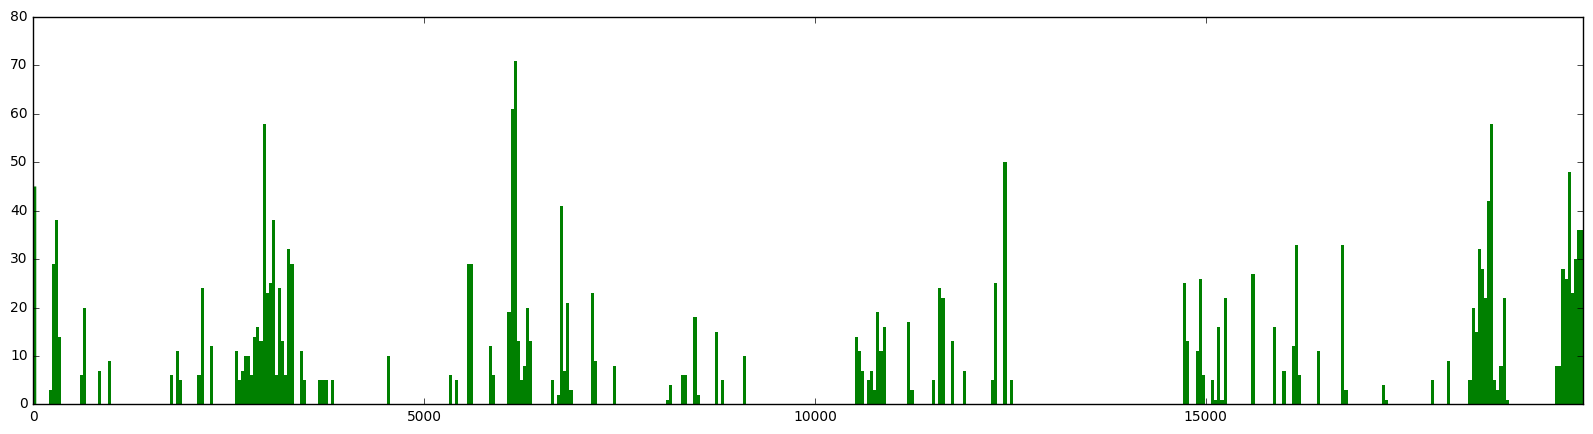

Chadwyck_British_1799_Godwin_StLeonA


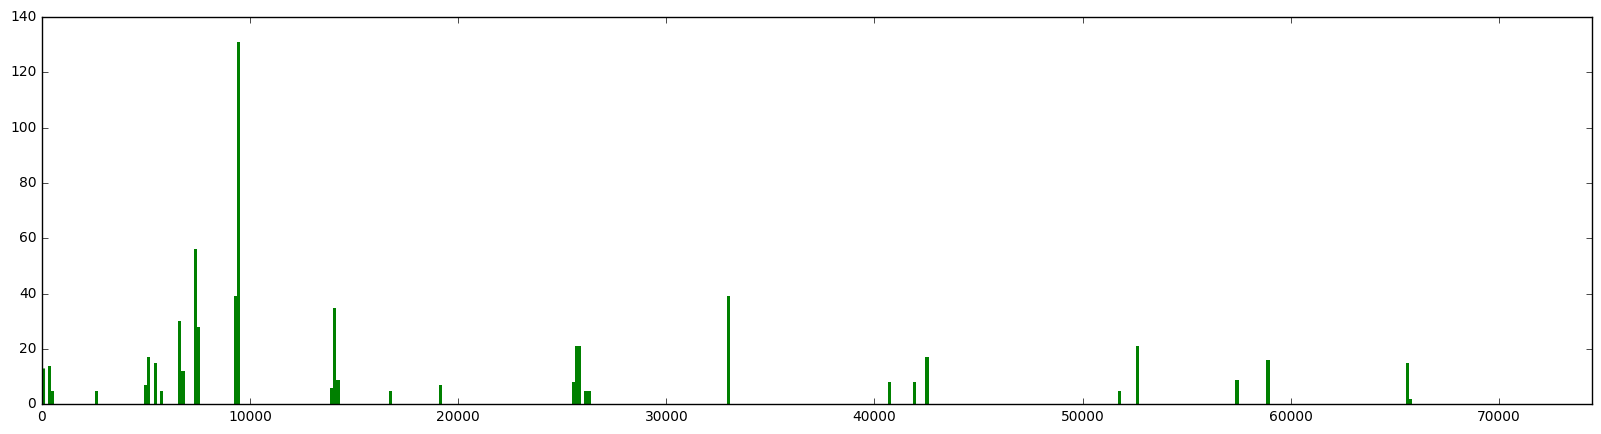

Chadwyck_British_1810_Porter_TheScottishChiefs


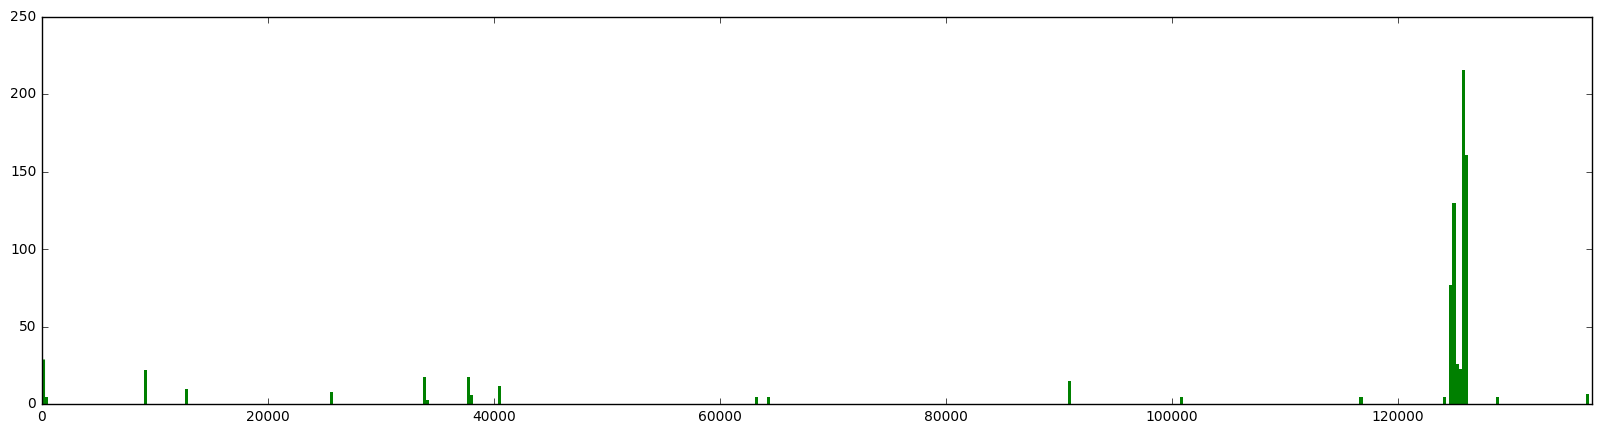

Chadwyck_Irish_1844_Lever_TomBurkeOf


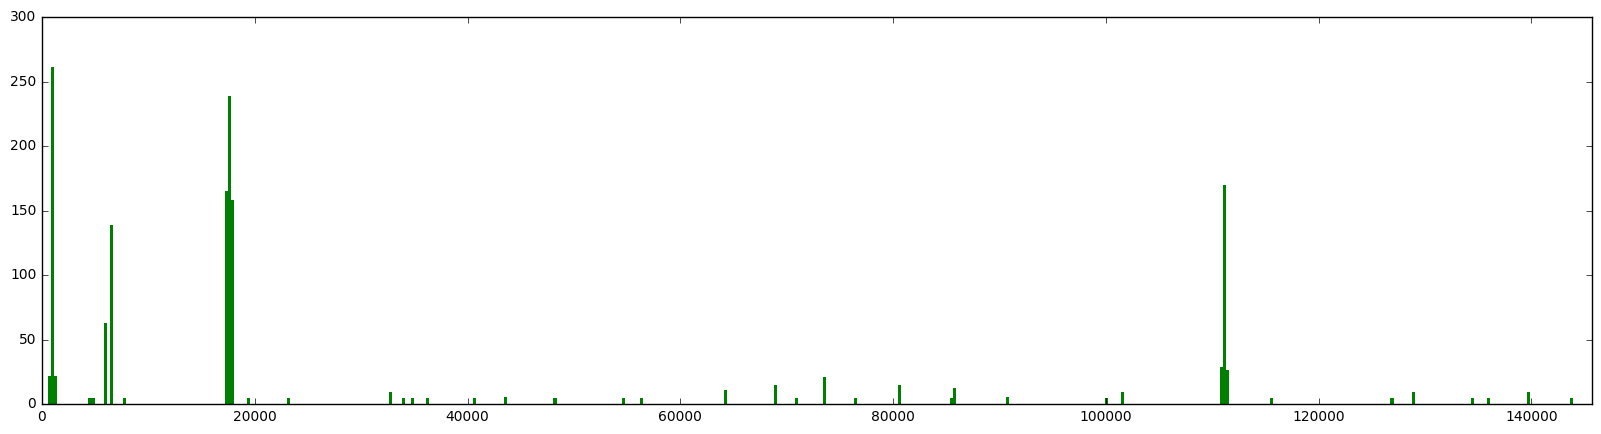

Chadwyck_British_1853_Dickens_BleakHouseBy


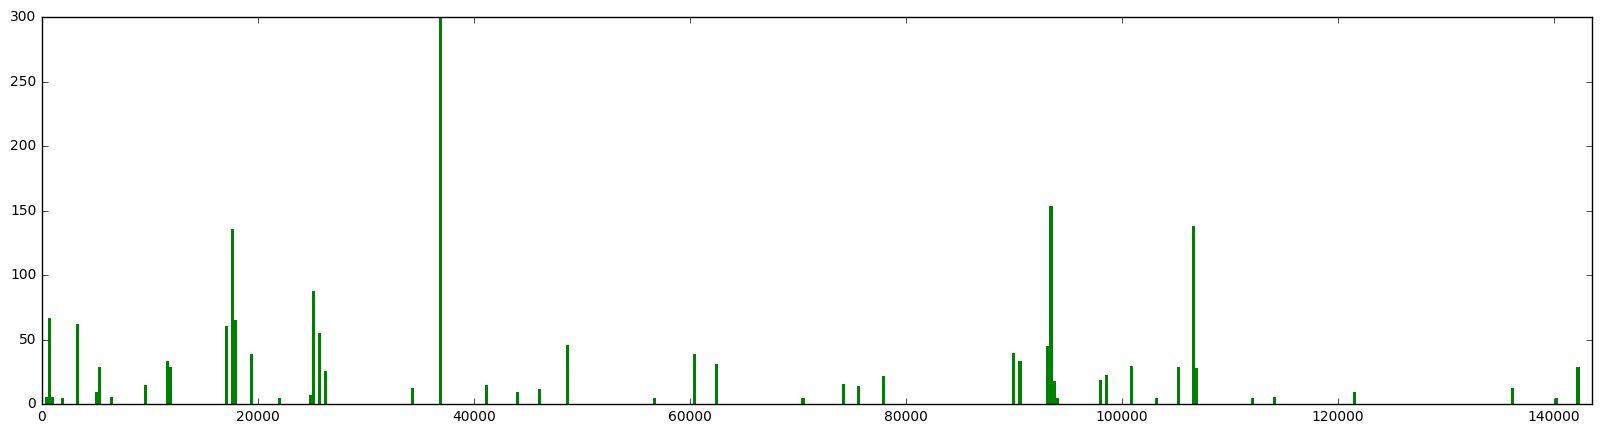

Chadwyck_British_1857_Dickens_LittleDorritBy


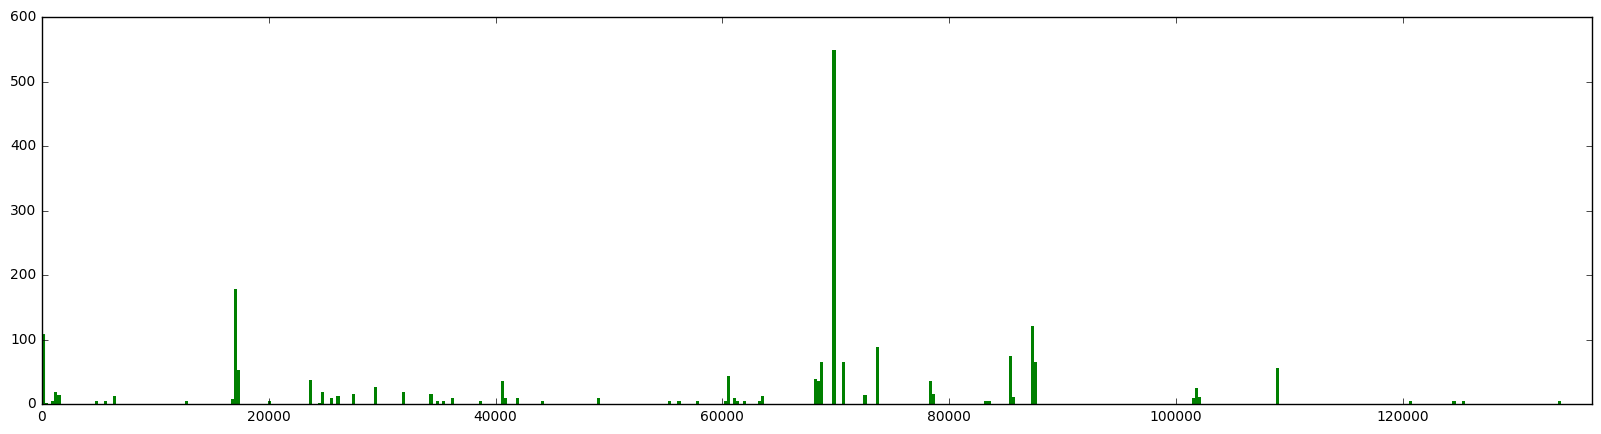

Chadwyck_British_1858_Trollope_TheThreeClerks


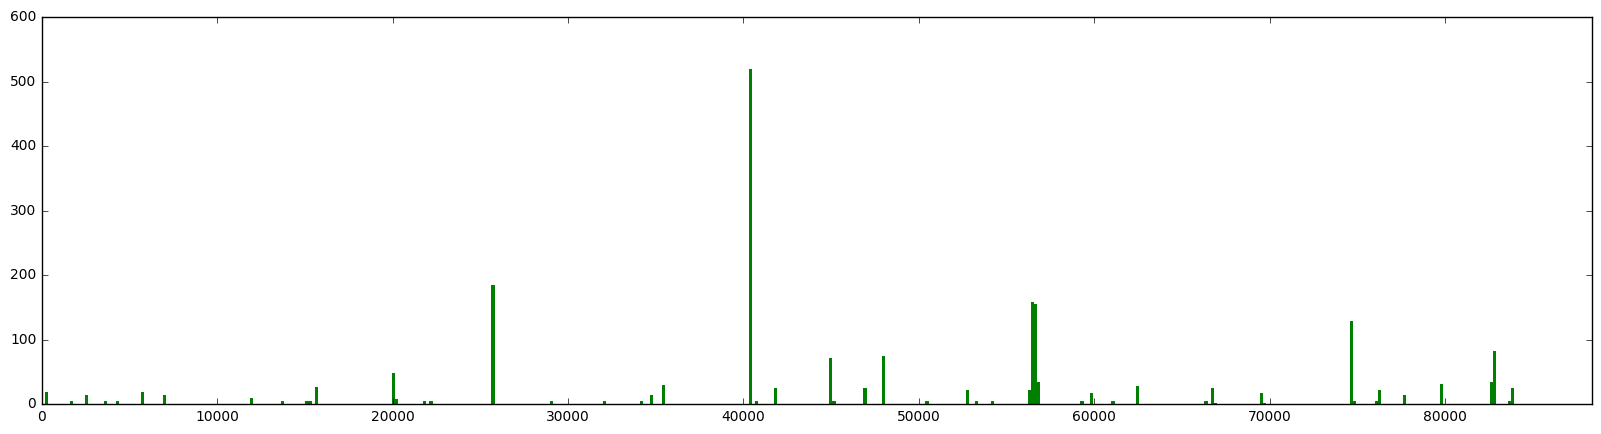

Chadwyck_British_1844_Dickens_TheLifeand


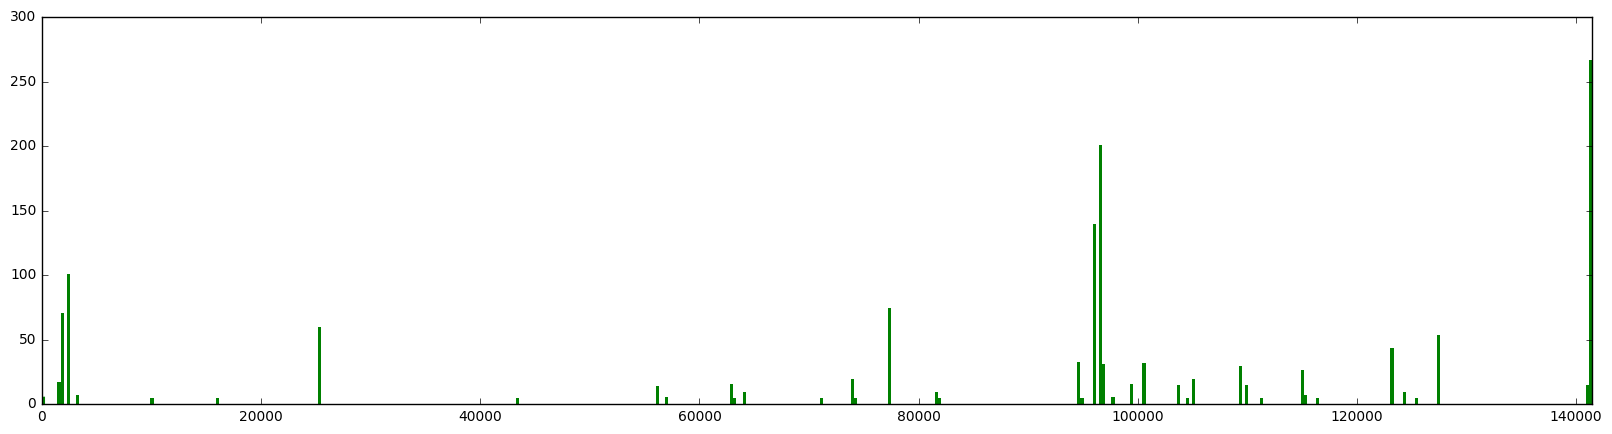

Chadwyck_British_1871_Lytton_TheComingRace


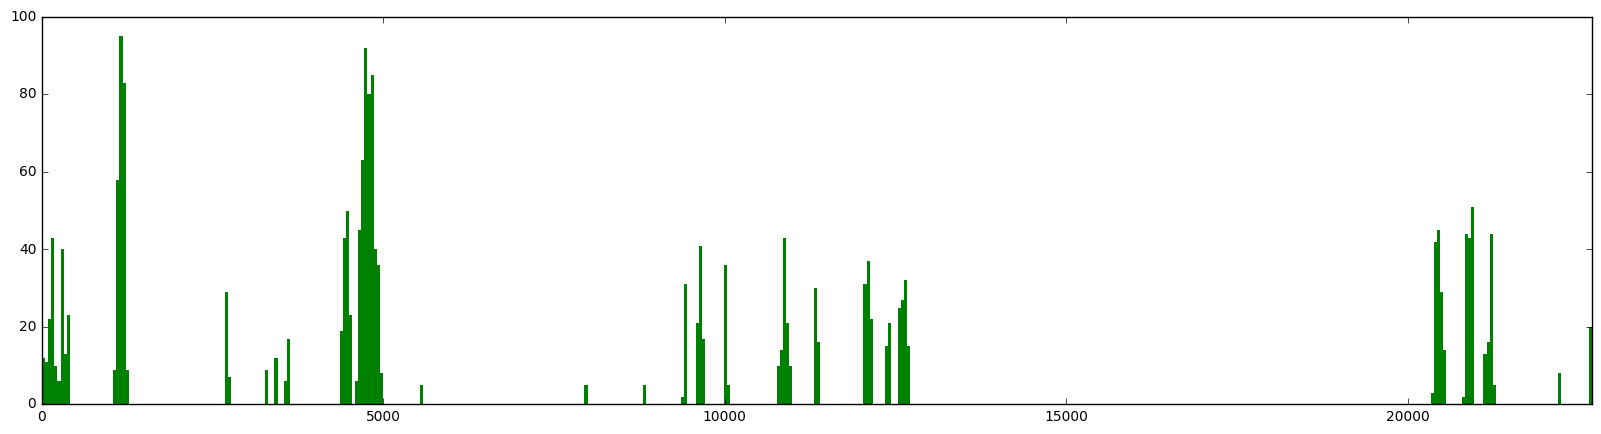

Chadwyck_British_1866_Gaskell_WivesandDaughters


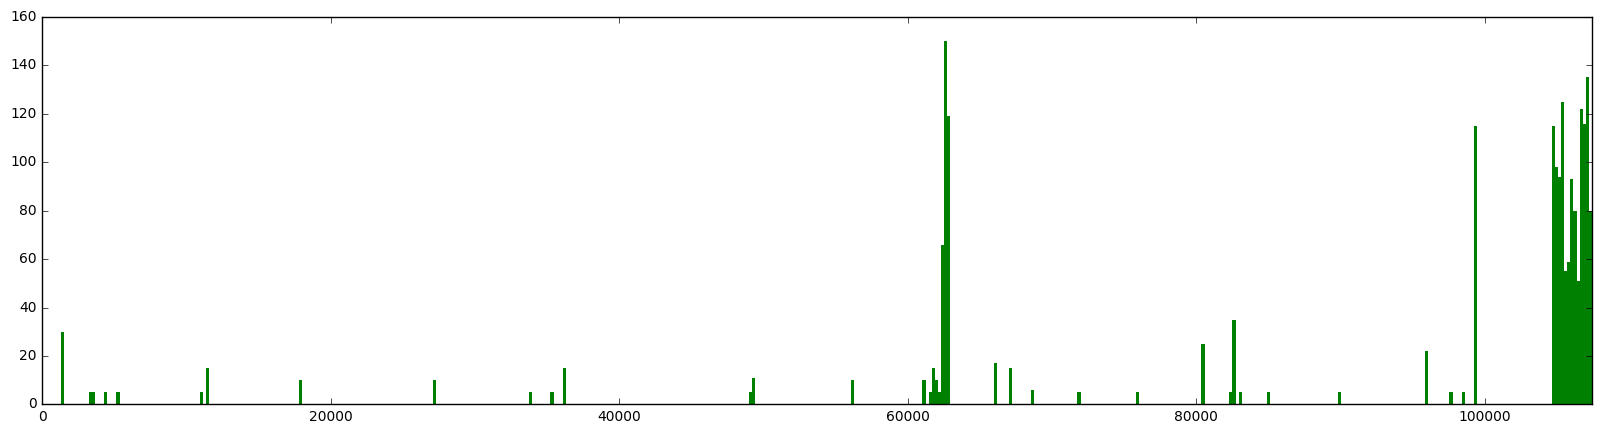

Chadwyck_British_1861_Reade_TheCloisterand


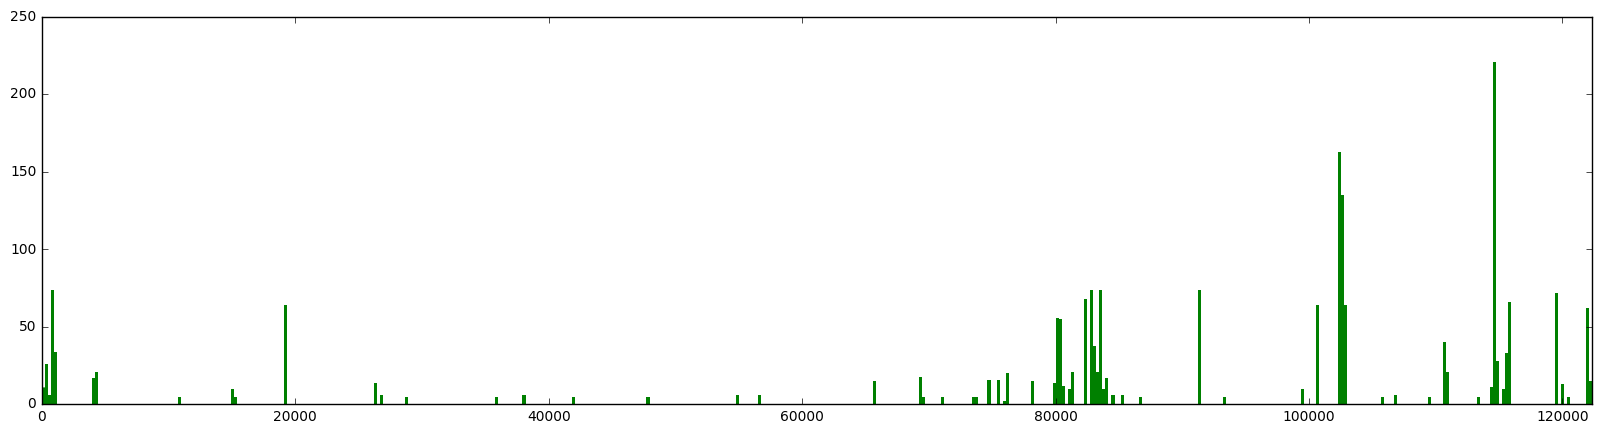

Chadwyck_British_1888_Ward_RobertElsmereBy


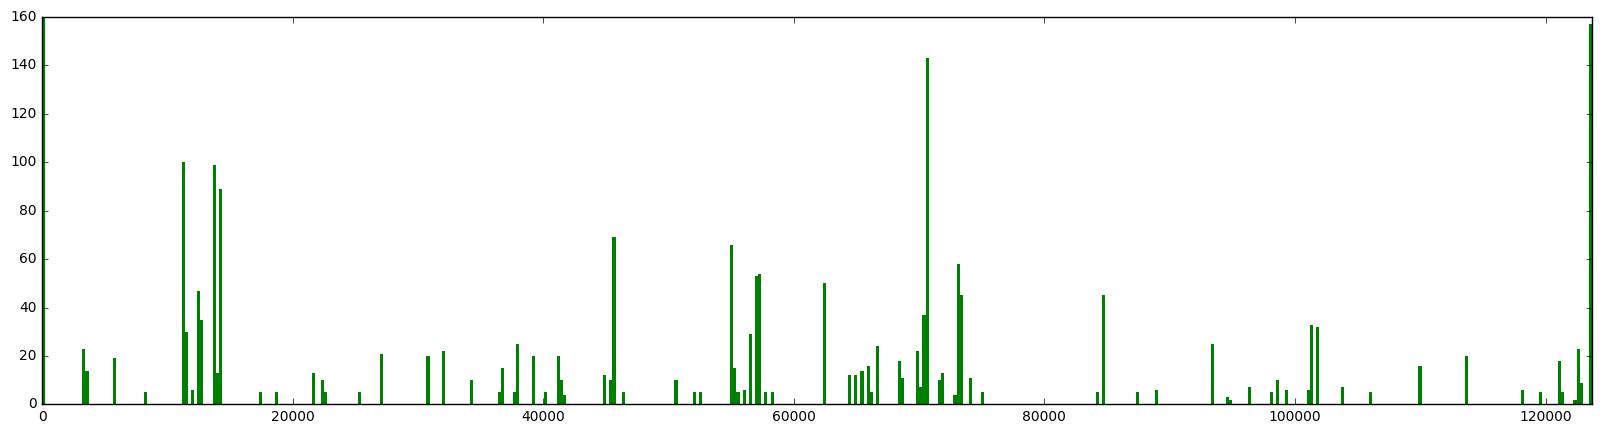

Chadwyck_British_1854_Surtees_HandleyCrossor


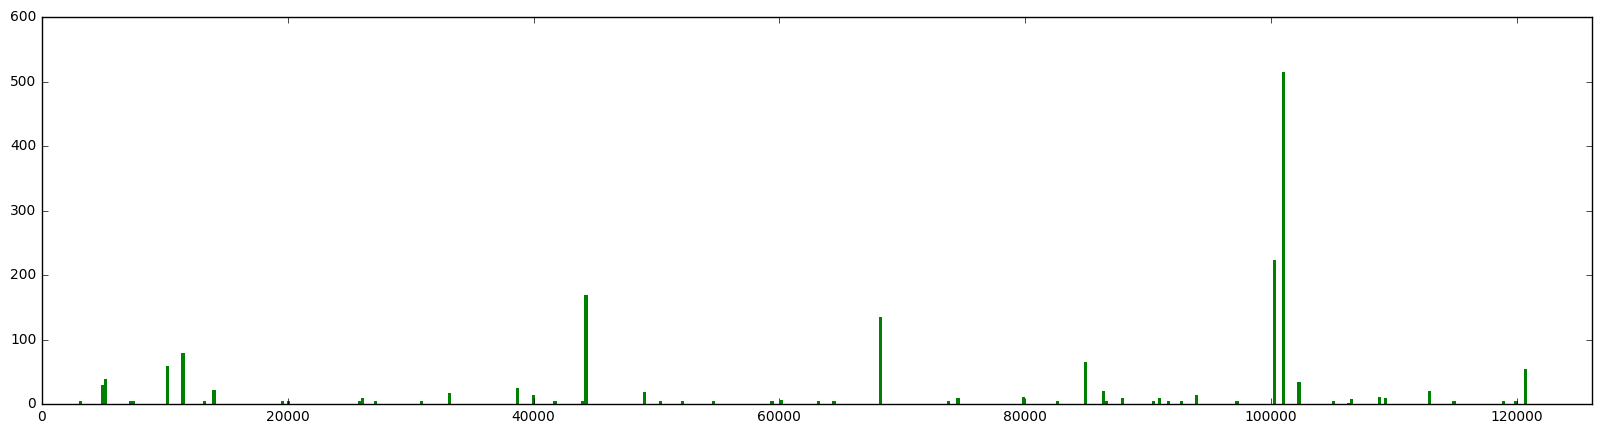

Chadwyck_British_1810_Brunton_Self-ControlANovel


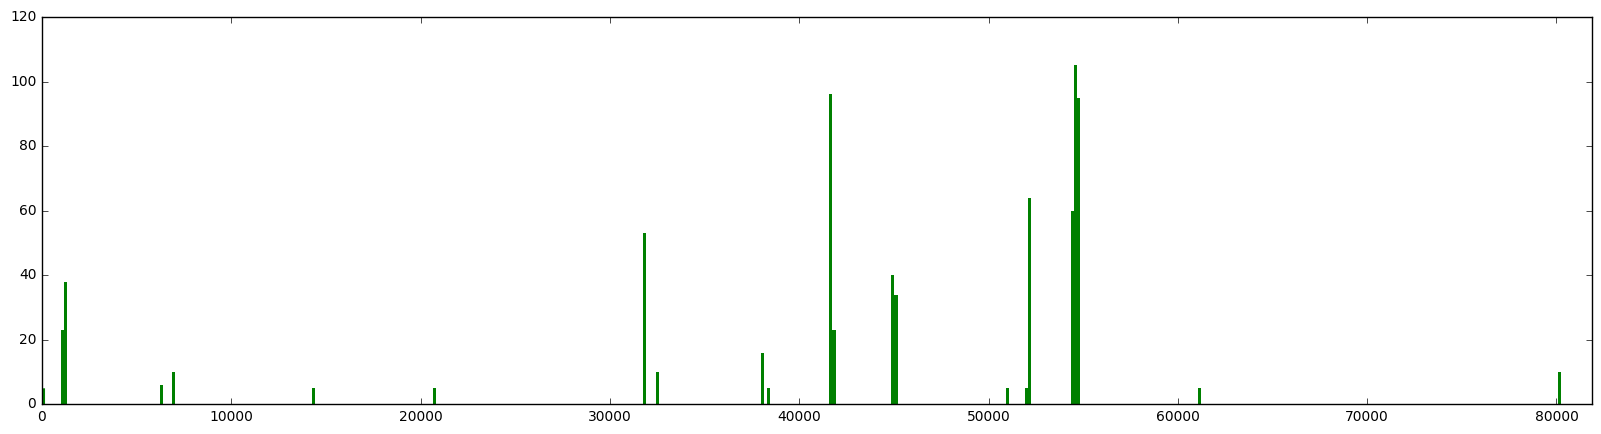

Chadwyck_British_1818_Austen_PersuasionBythe


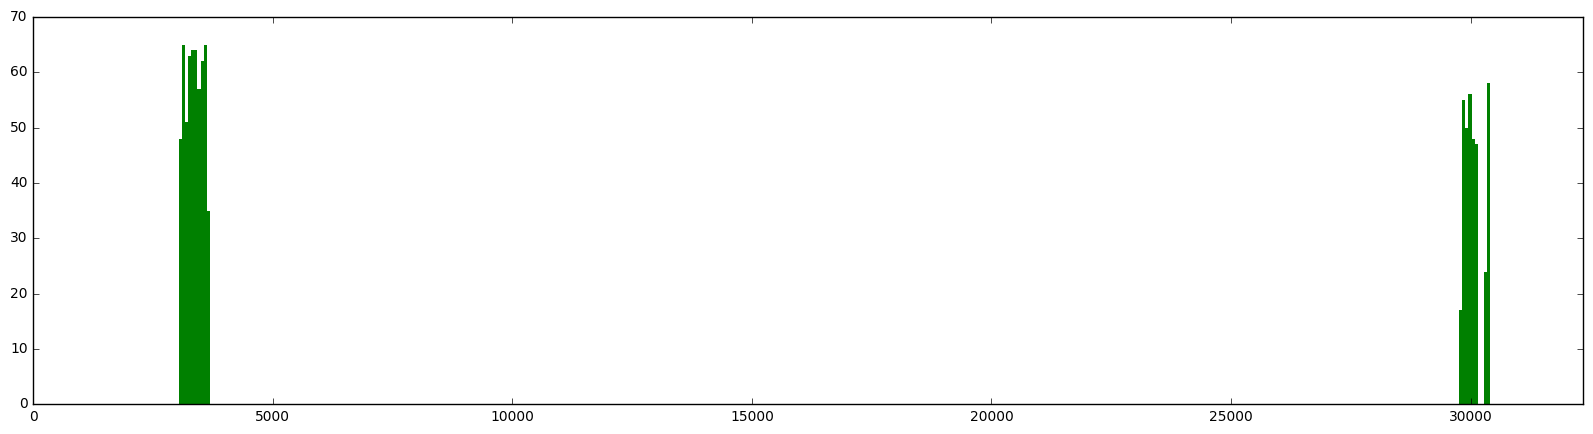

Chadwyck_British_1797_Robinson_WalsinghamorThe


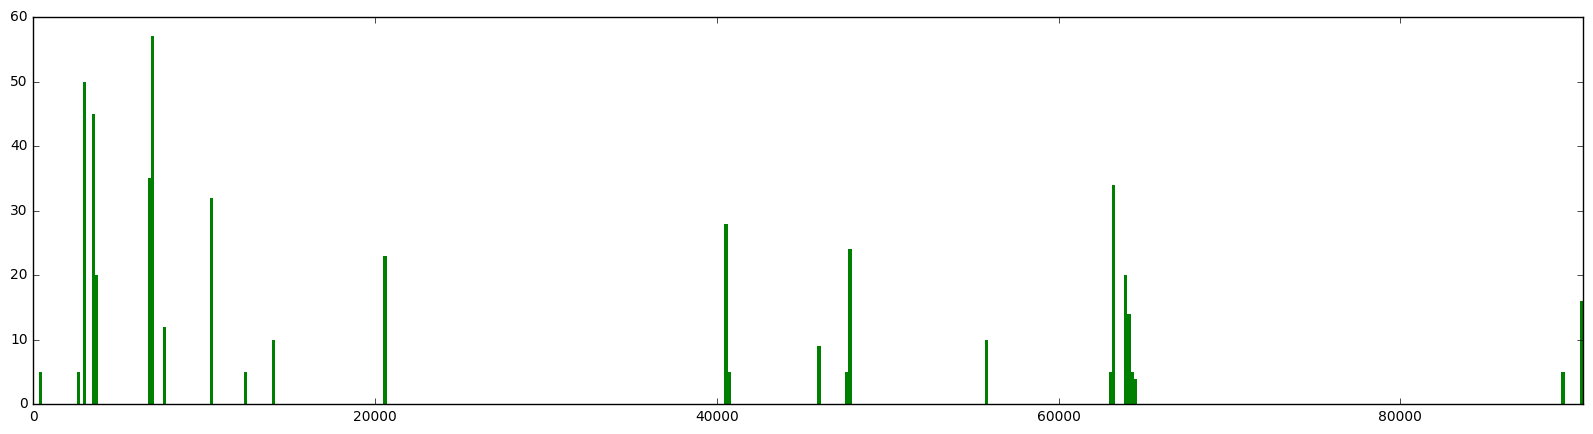

Chadwyck_British_1797_Radcliffe_TheItalianor


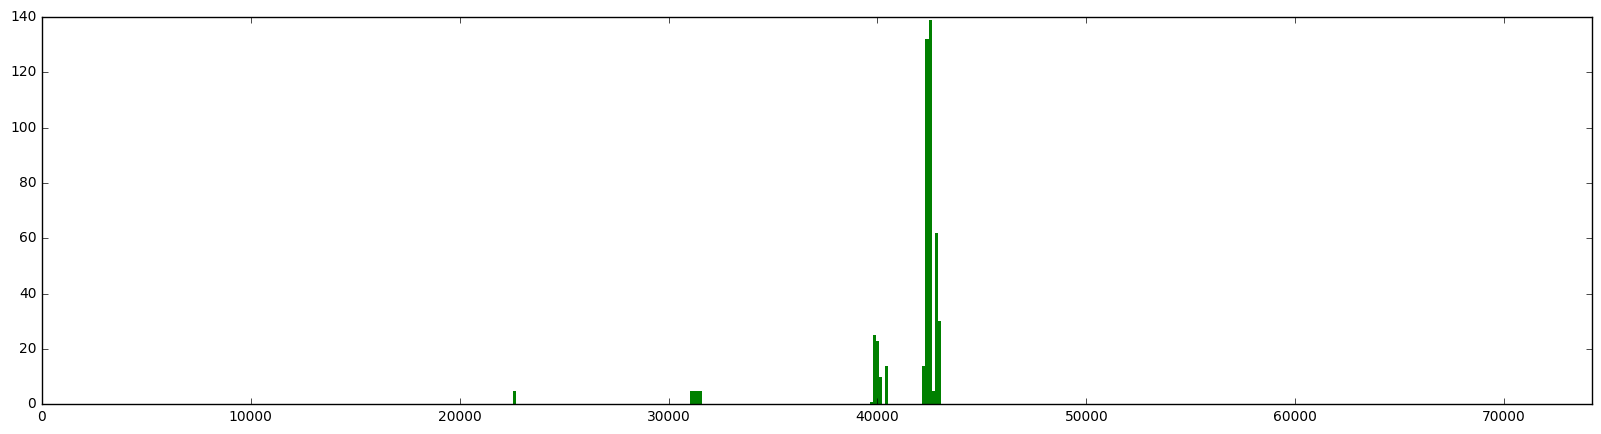

Chadwyck_British_1794_Radcliffe_TheMysteriesof


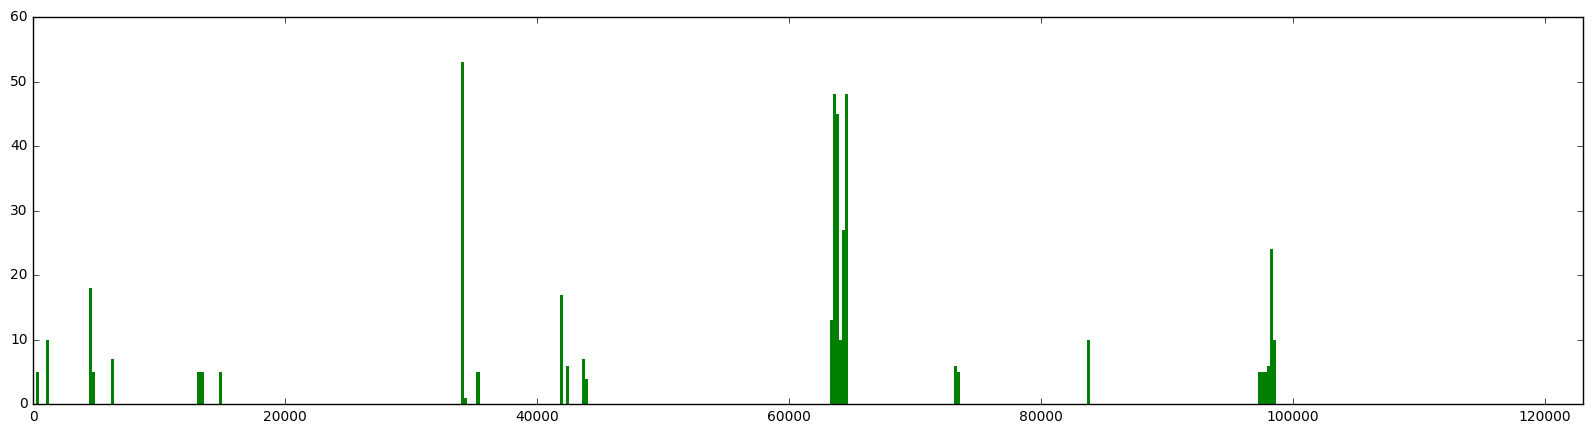

Chadwyck_British_1824_Hogg_ThePrivateMemoirs


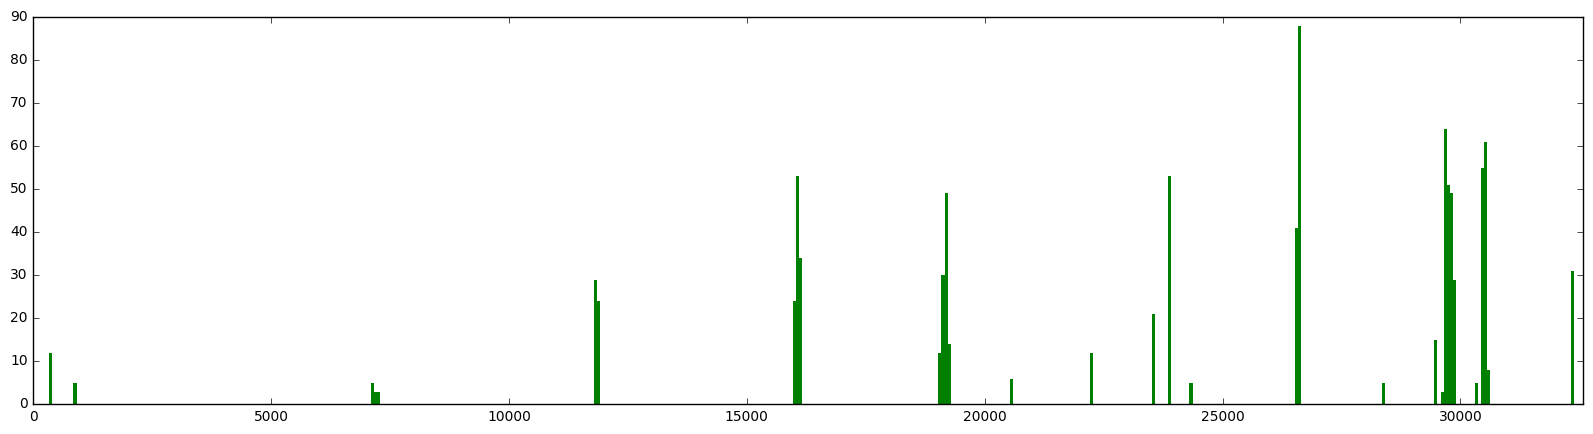

Chadwyck_British_1793_Smith_TheOldManor


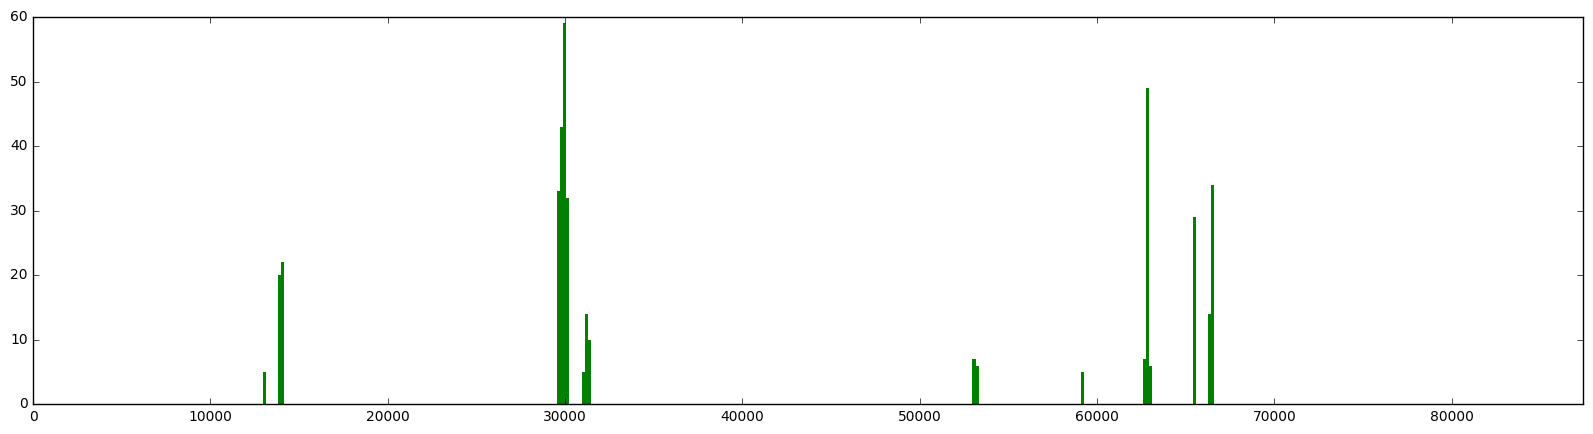

Chadwyck_Irish_1806_Morgan_TheWildIrish


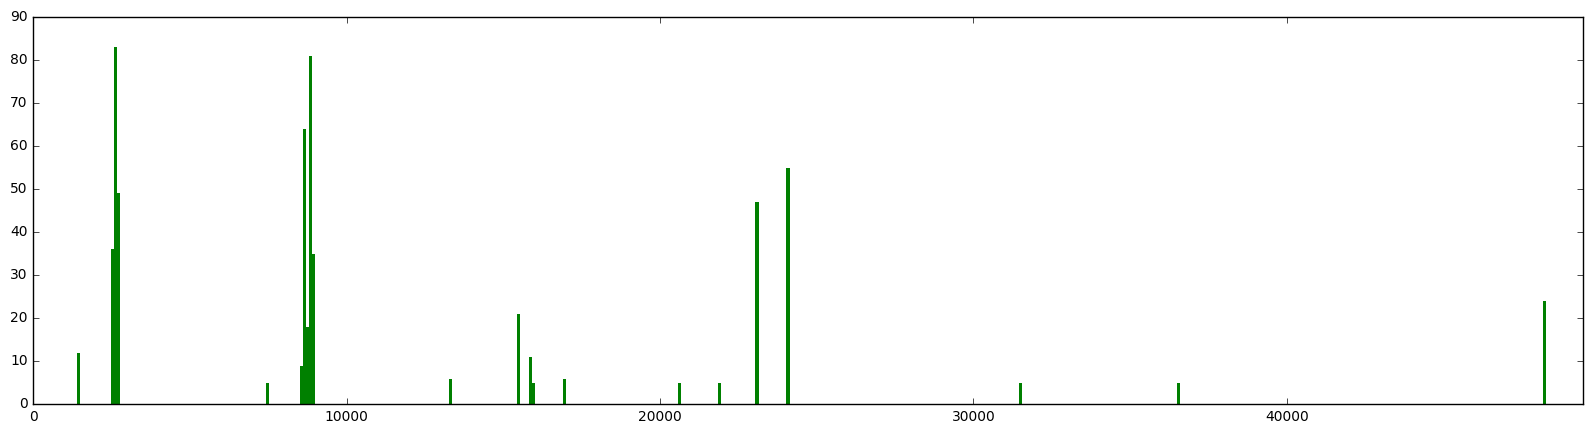

Chadwyck_British_1791_Radcliffe_TheRomanceof


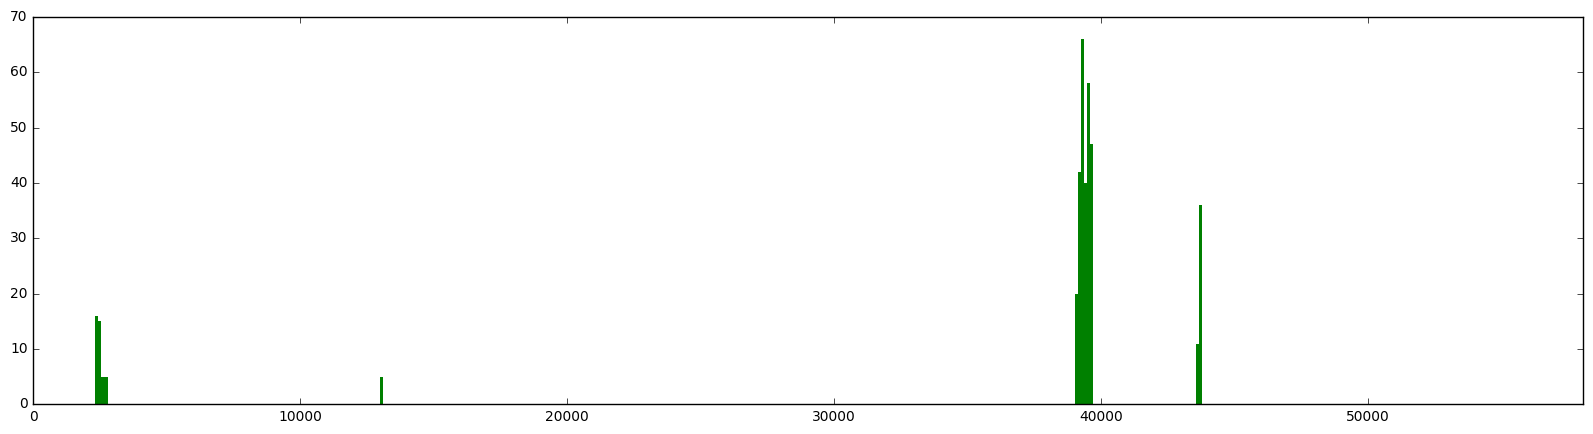

Chadwyck_British_1869_Trollope_PhineasFinnthe


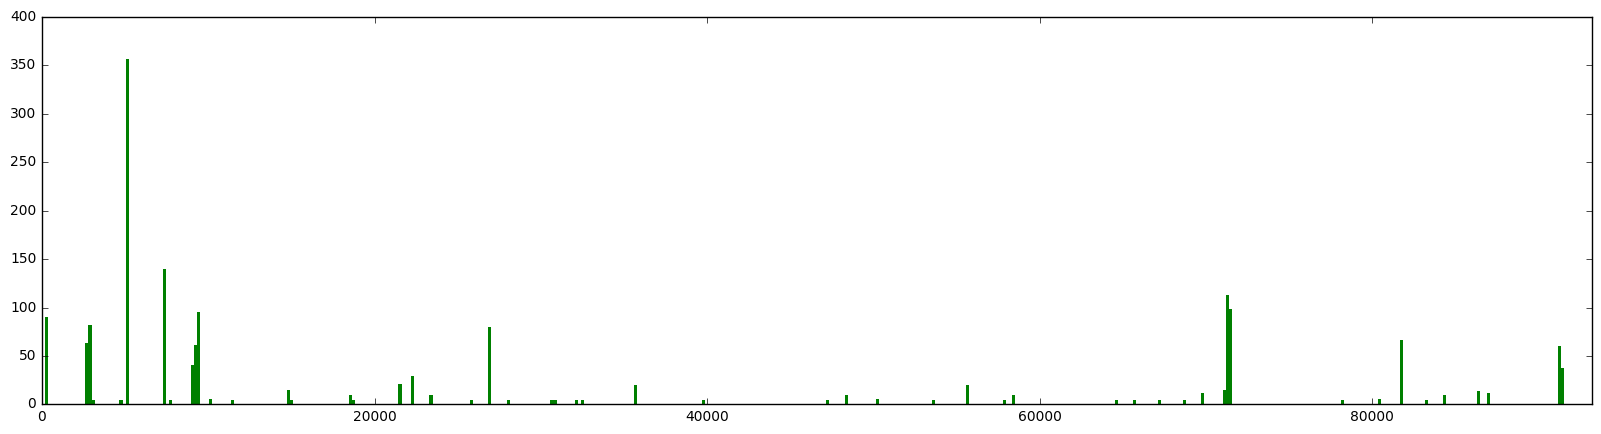

Chadwyck_British_1872_Butler_ErewhonorOver


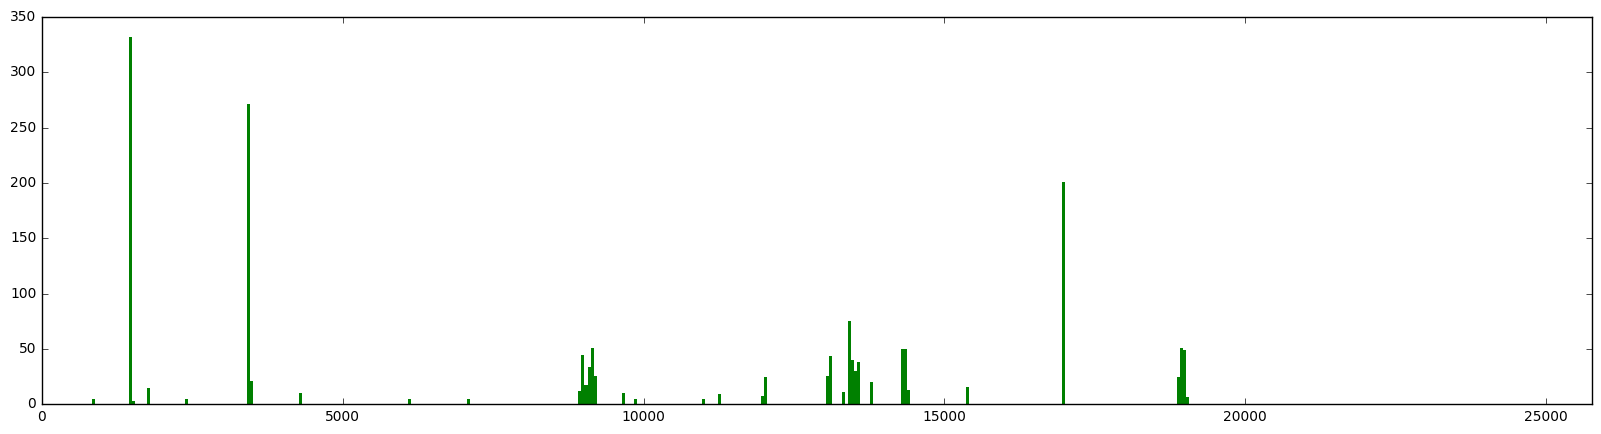

Chadwyck_British_1791_Inchbald_ASimpleStory


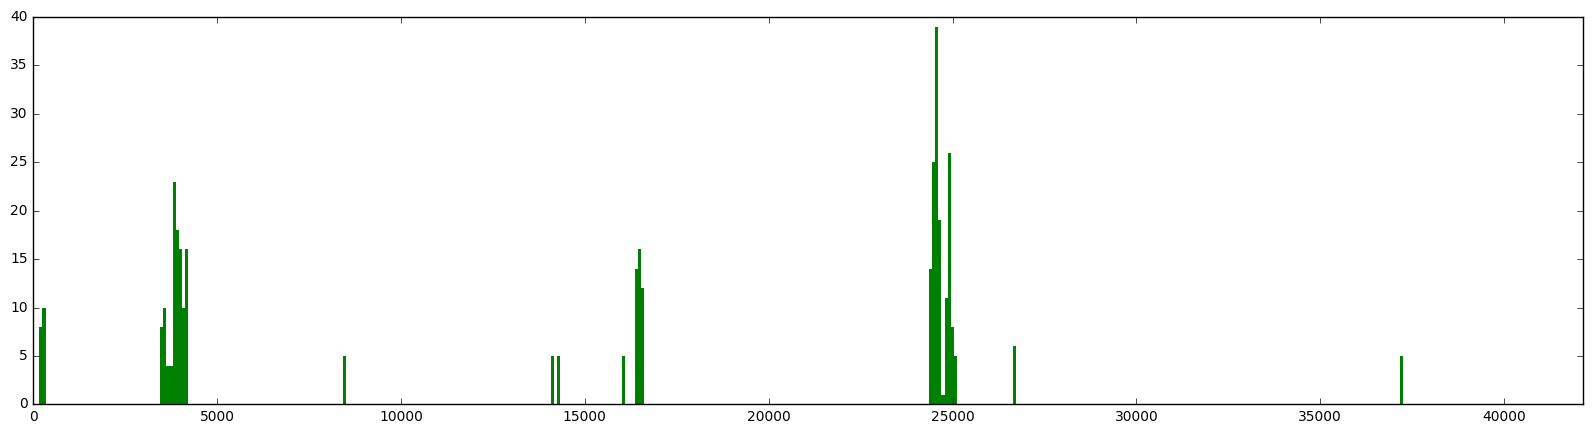

Chadwyck_British_1837_Shelley_FalknerANovel


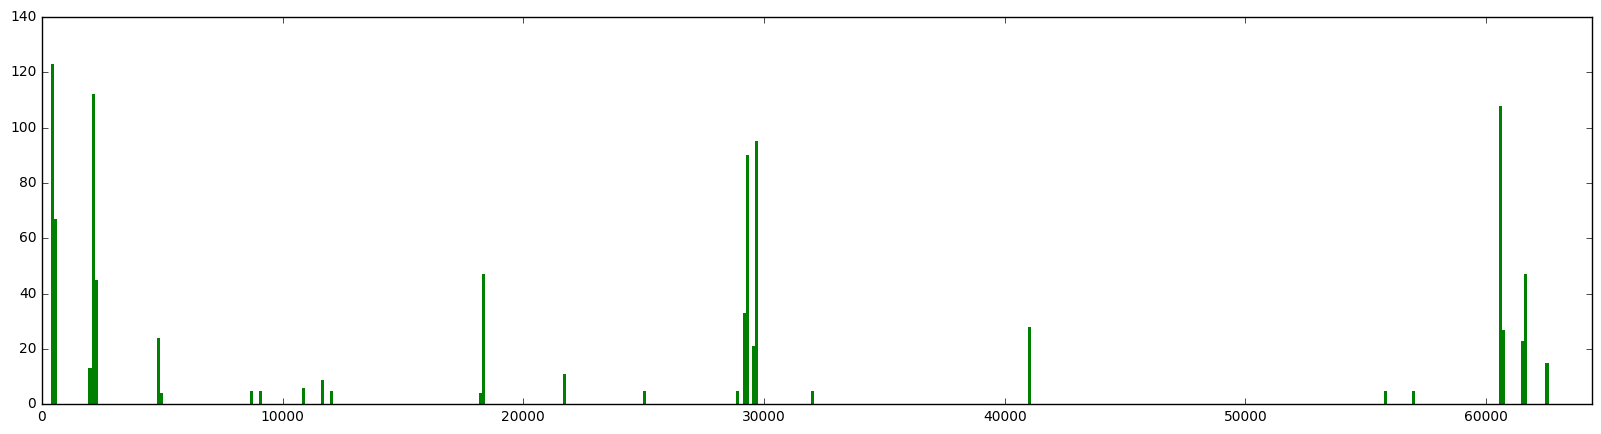

Chadwyck_British_1867_Trollope_TheLastChronicle


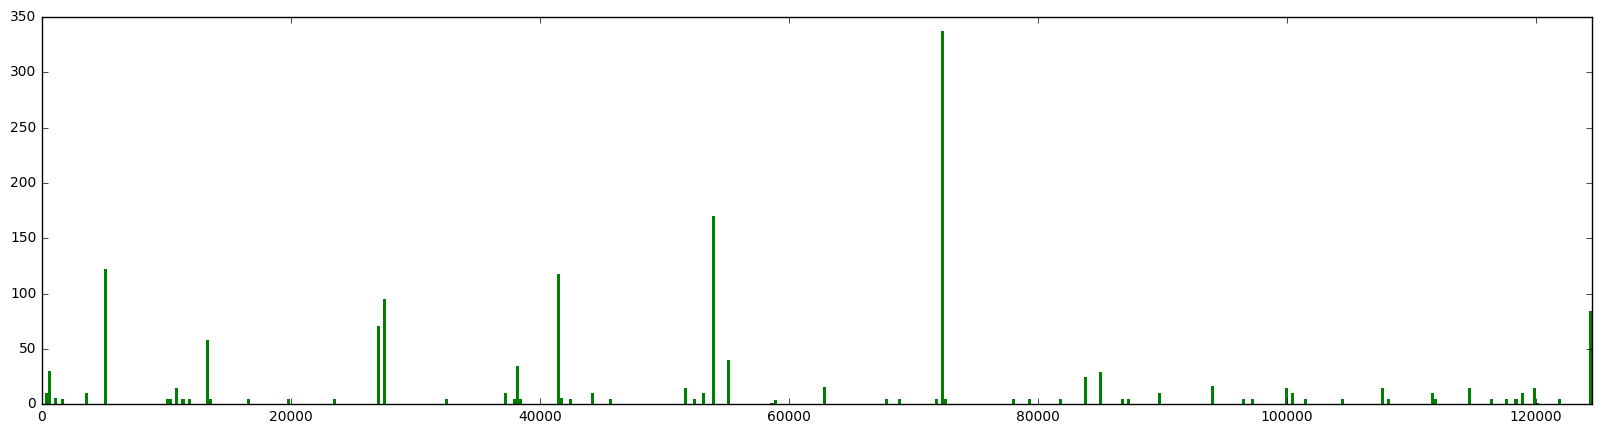

Chadwyck_British_1897_Hardy_TheWell-Beloveda


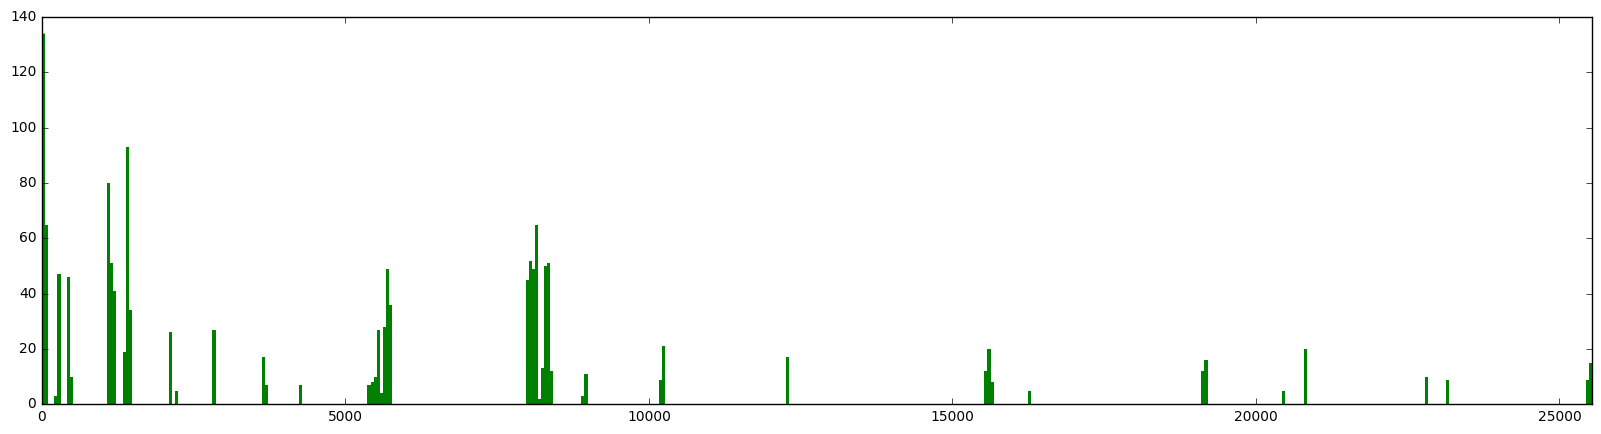

Chadwyck_British_1831_Shelley_FrankensteinOrThe


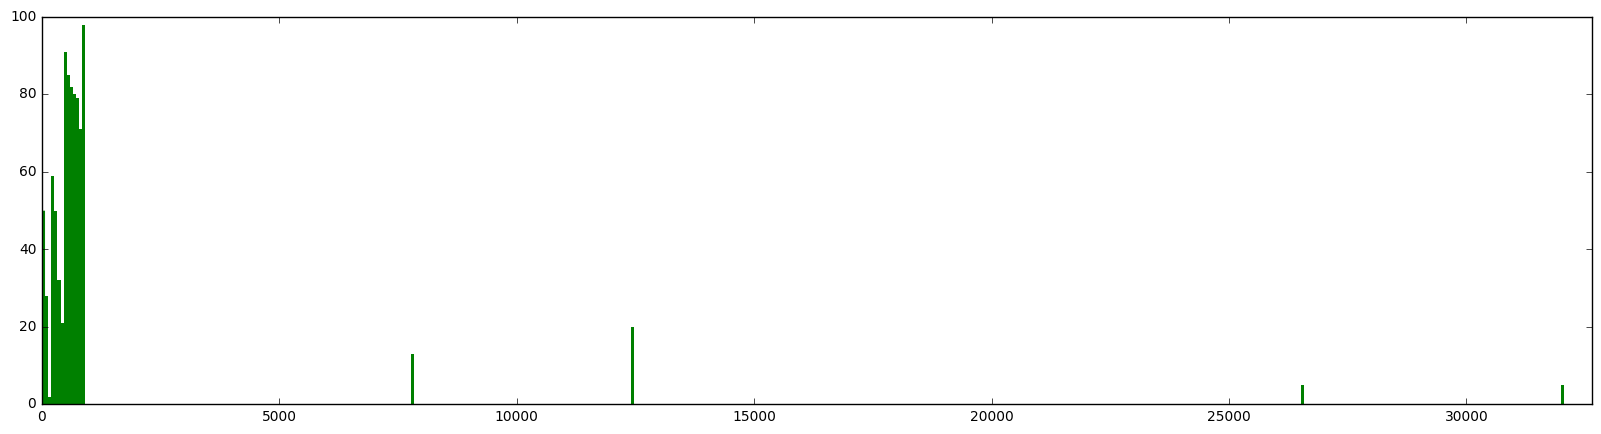

Chadwyck_British_1870_Collins_ManandWife


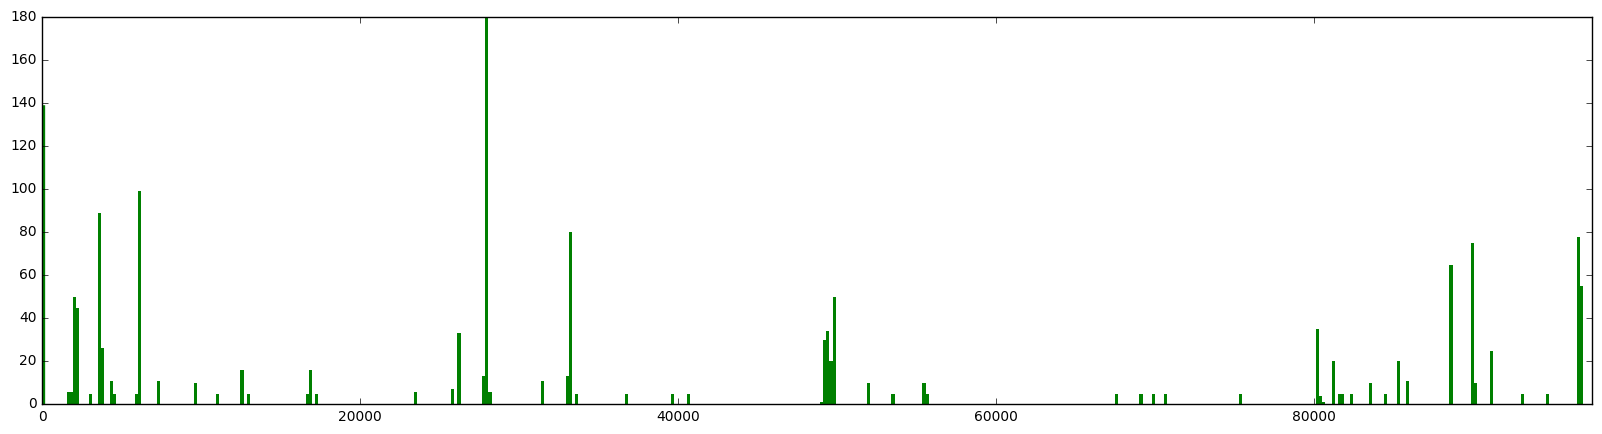

Chadwyck_British_1863_Gaskell_SylviaLoversBy


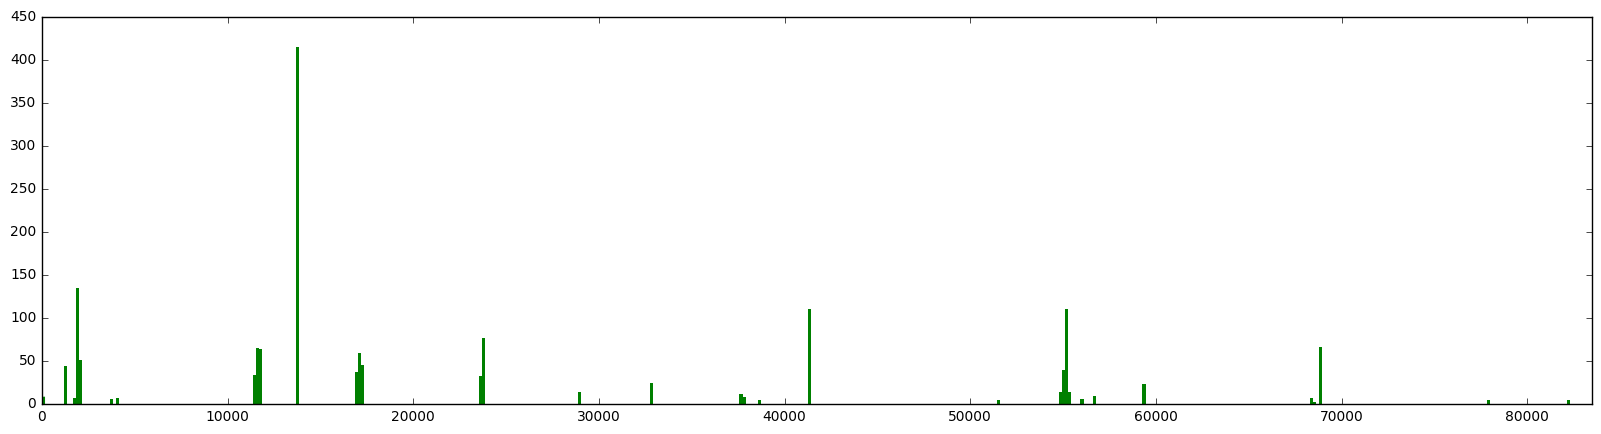

Chadwyck_British_1818_Austen_NorthangerAbbeyand


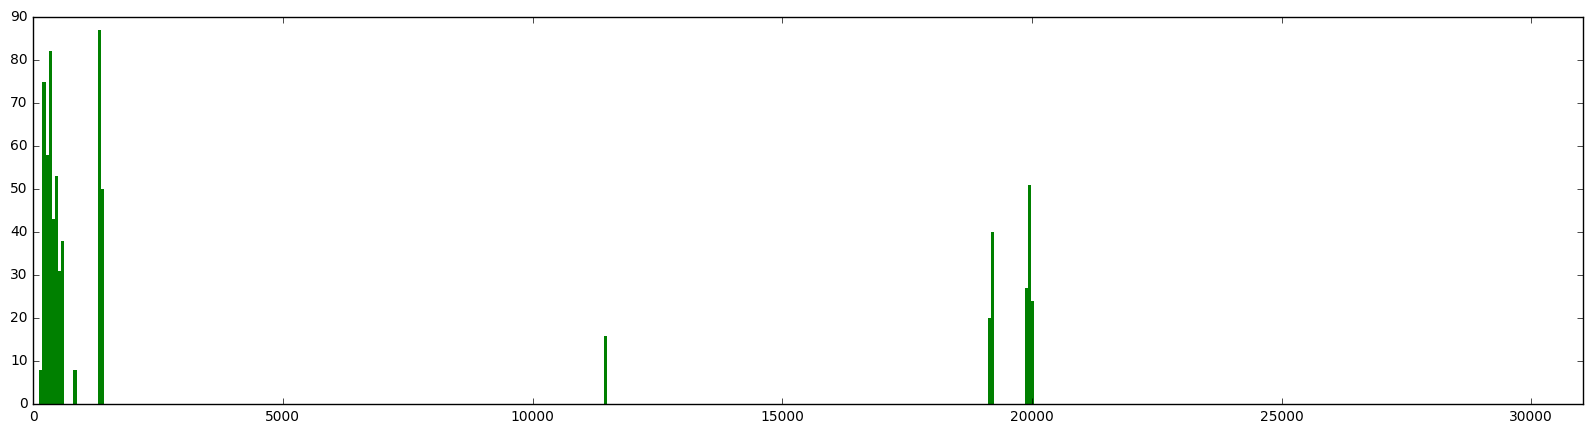

Chadwyck_British_1805_Opie_AdelineMowbrayOr


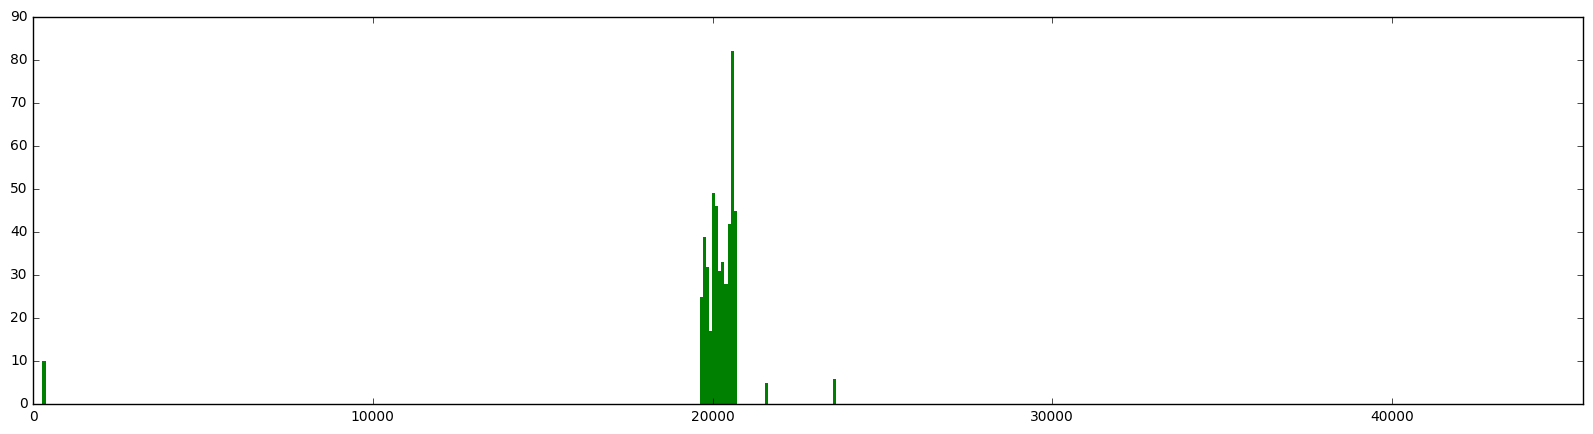

Chadwyck_British_1830_Shelley_TheFortunesof


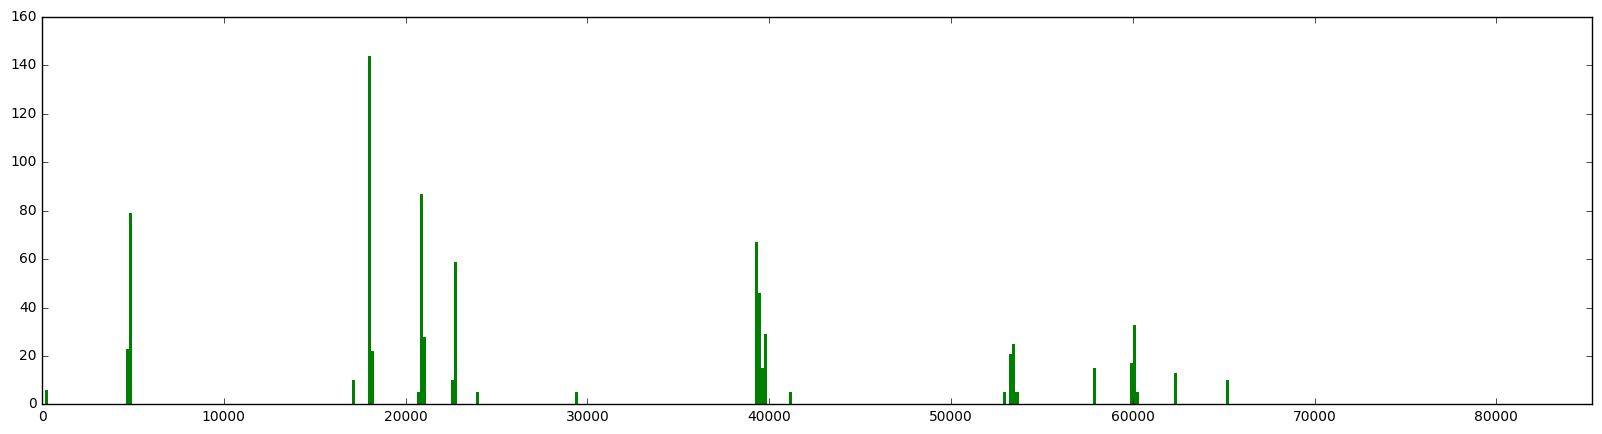

Chadwyck_British_1896_Hardy_JudetheObscure


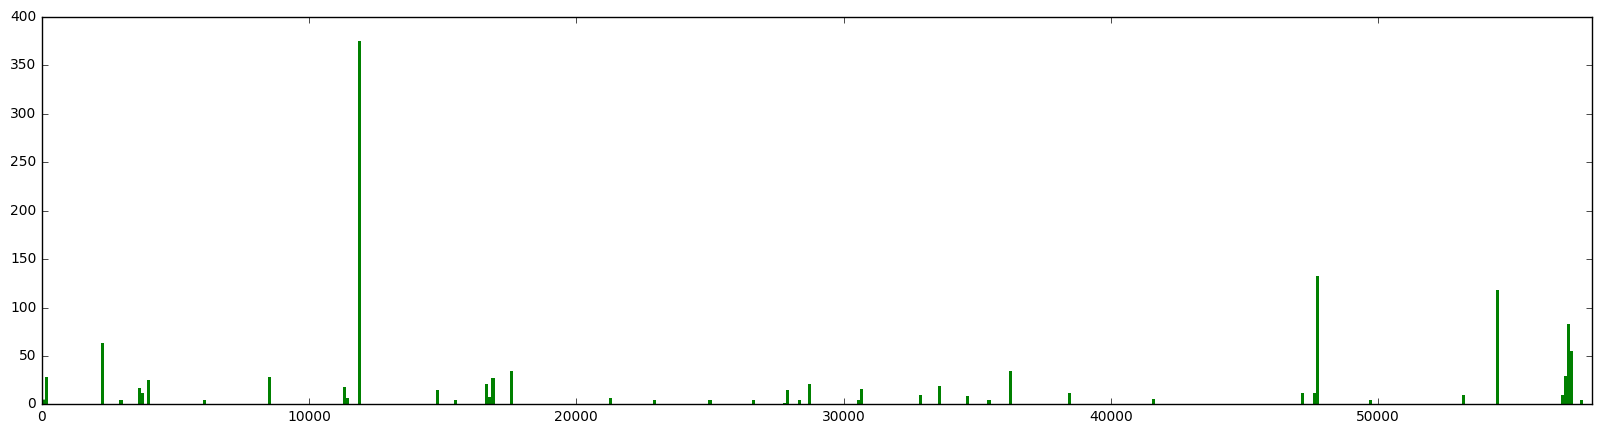

Chadwyck_British_1887_Hardy_TheWoodlandersBy


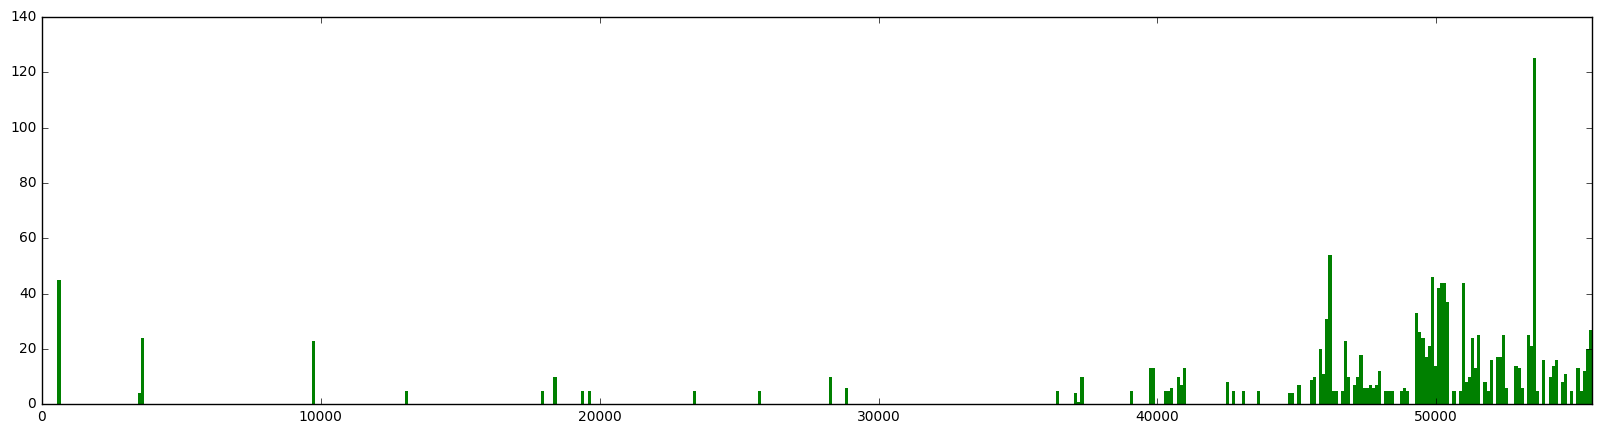

Chadwyck_British_1841_Dickens_TheOldCuriosity


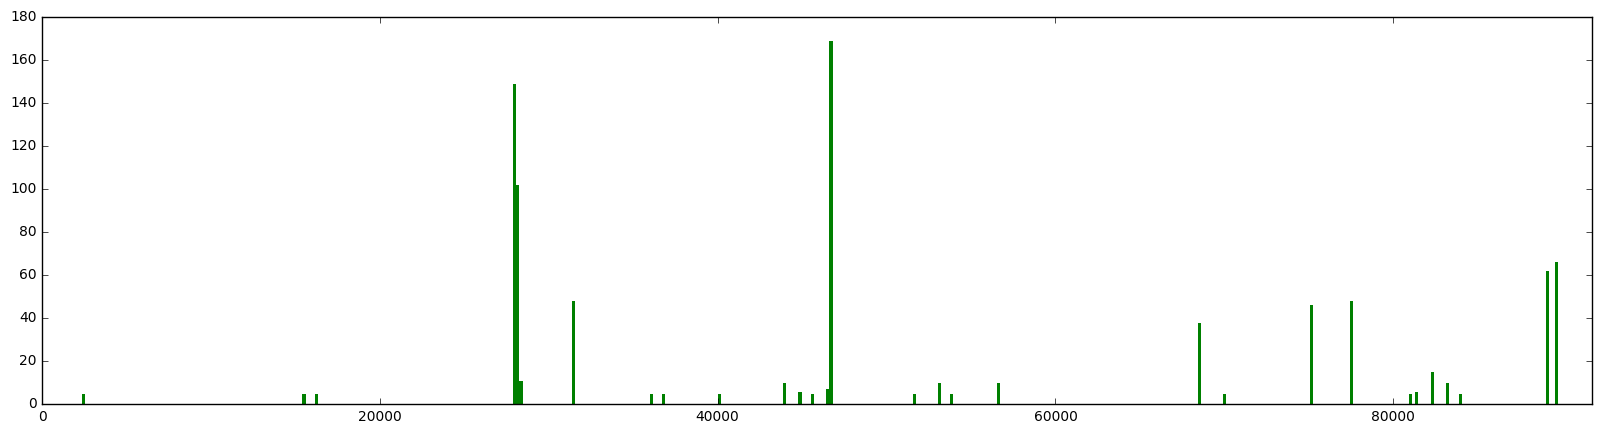

Chadwyck_British_1834_Marryat_PeterSimple


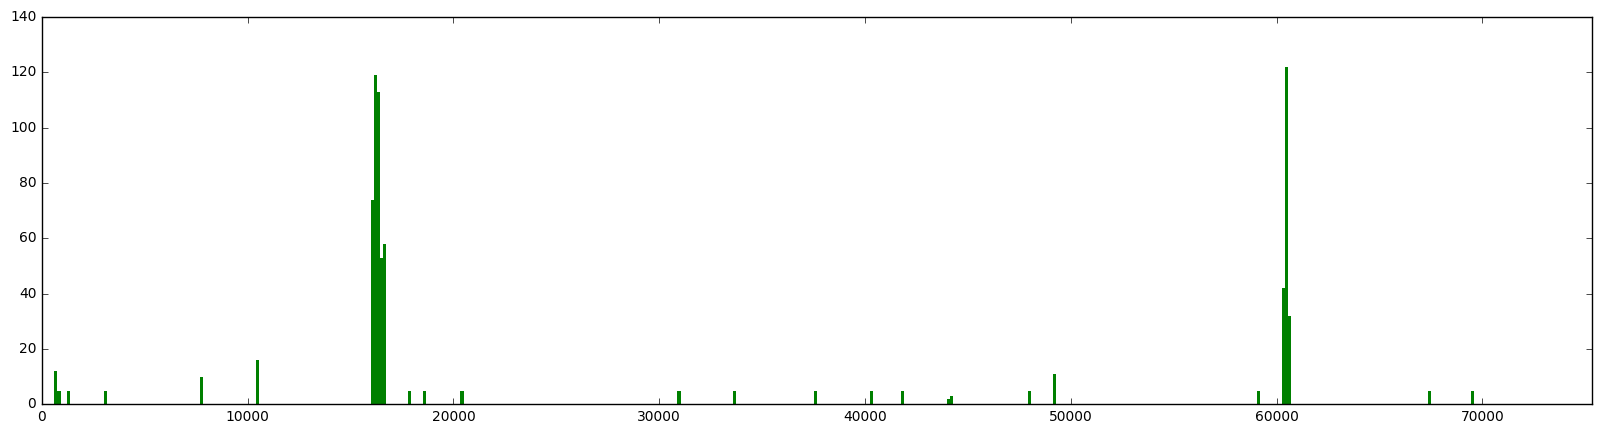

Chadwyck_British_1861_Eliot_SilasMarnerthe


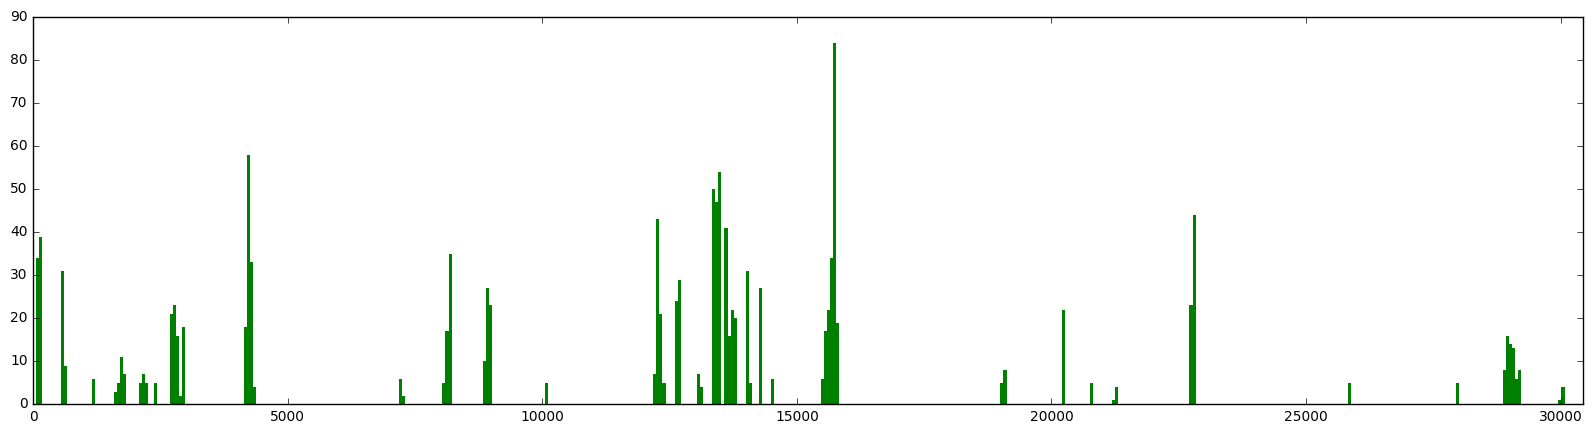

Chadwyck_British_1841_Dickens_BarnabyRudgein


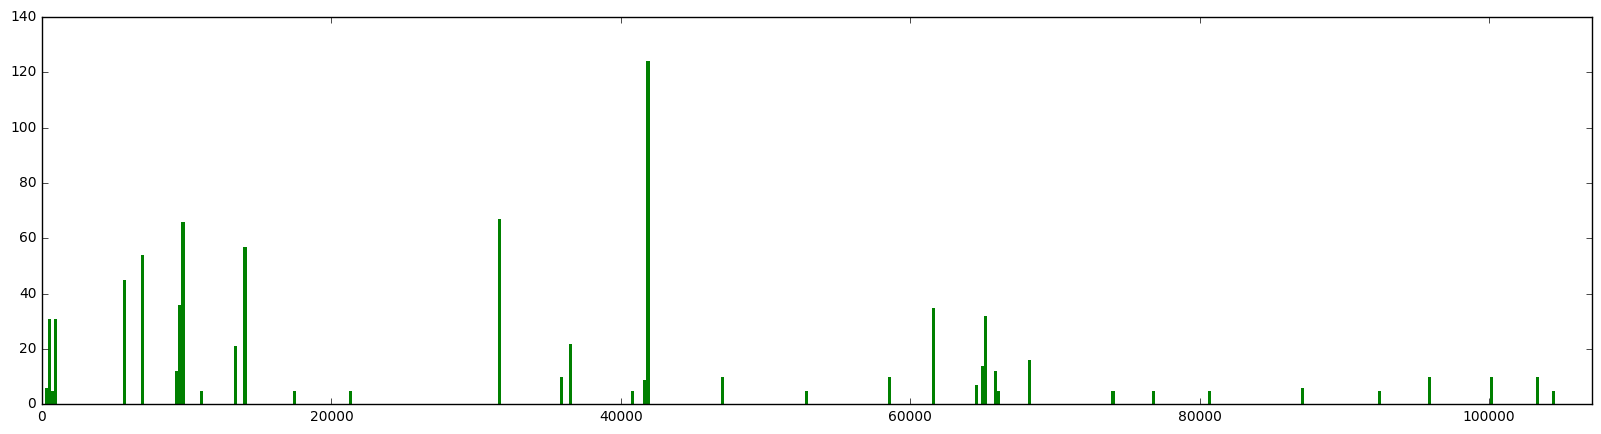

Chadwyck_British_1866_Kingsley_HerewardtheWake


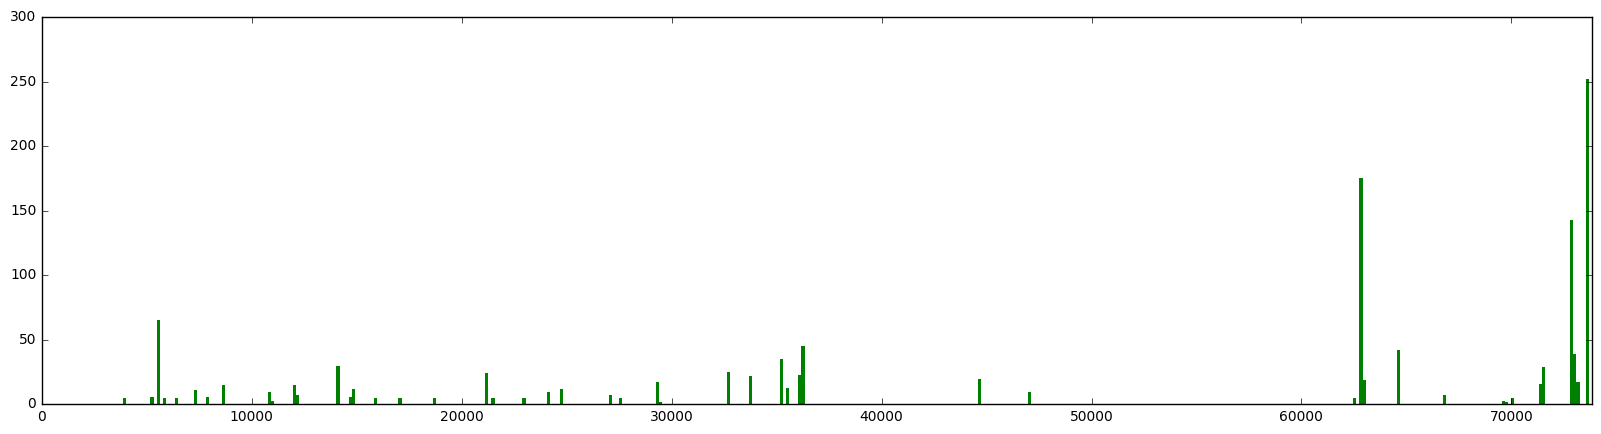

Chadwyck_British_1855_Trollope_TheWardenBy


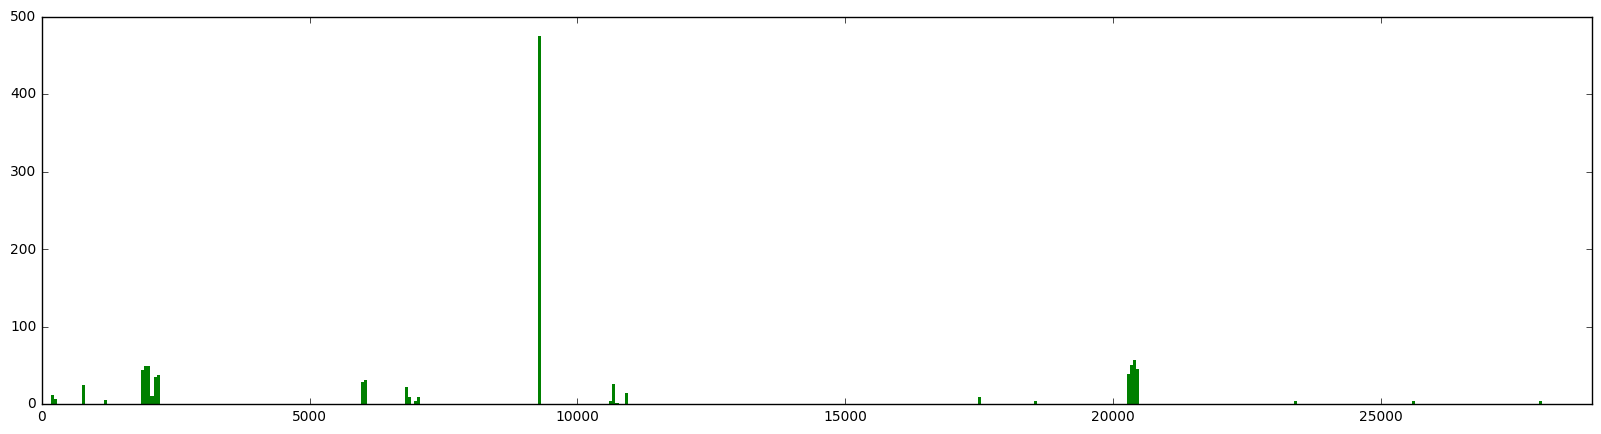

Chadwyck_British_1875_Trollope_TheWayWe


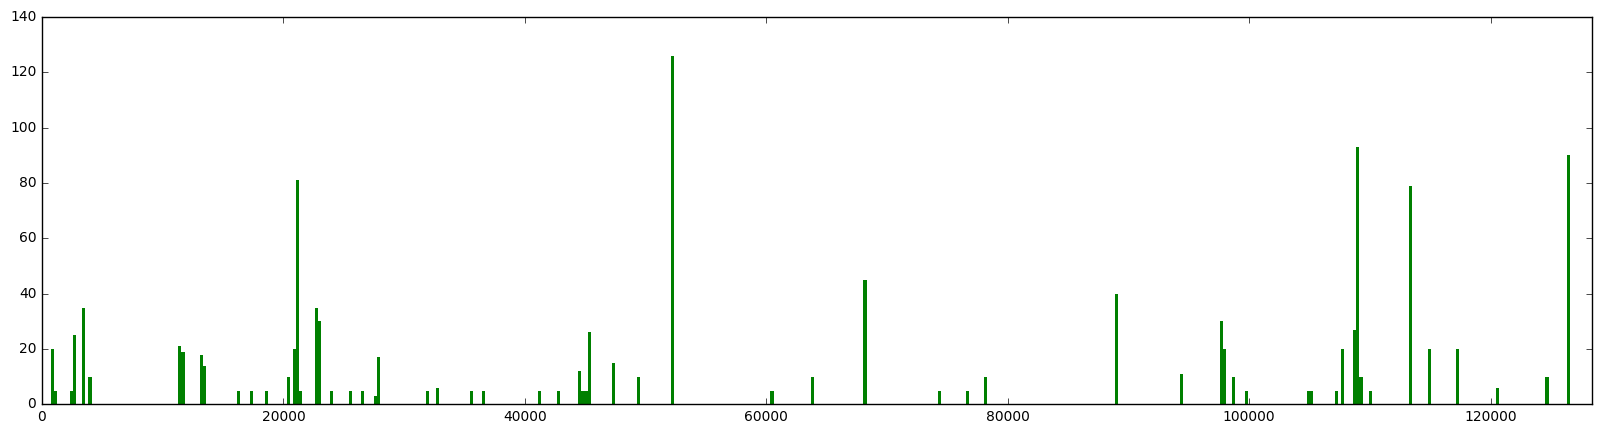

Chadwyck_British_1869_Blackmore_LornaDoonea


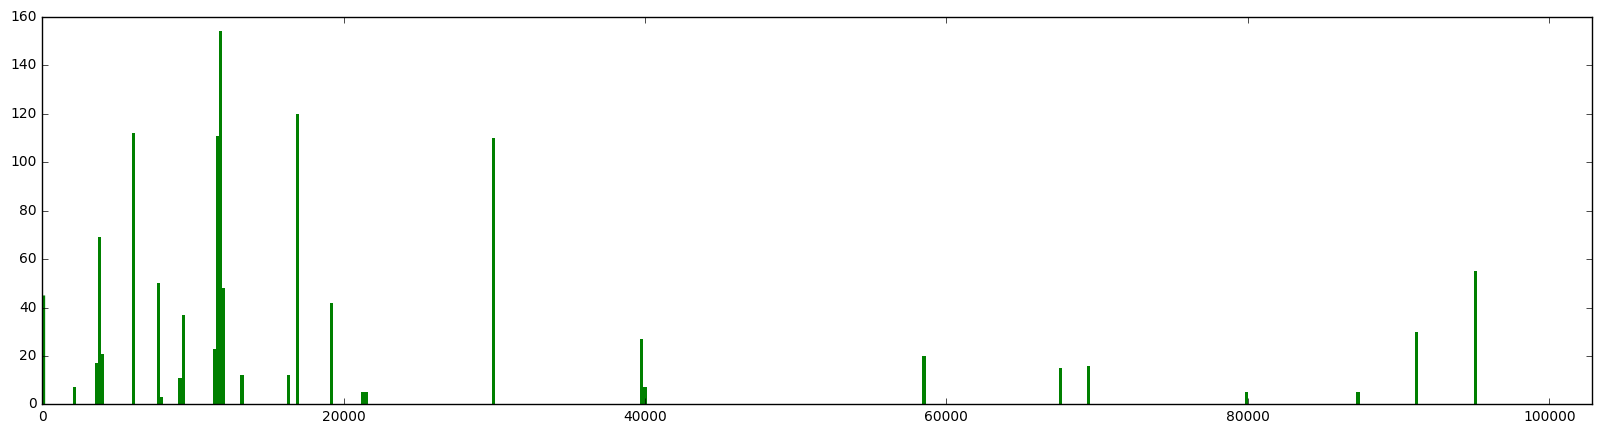

Chadwyck_British_1848_Dickens_DombeyandSon


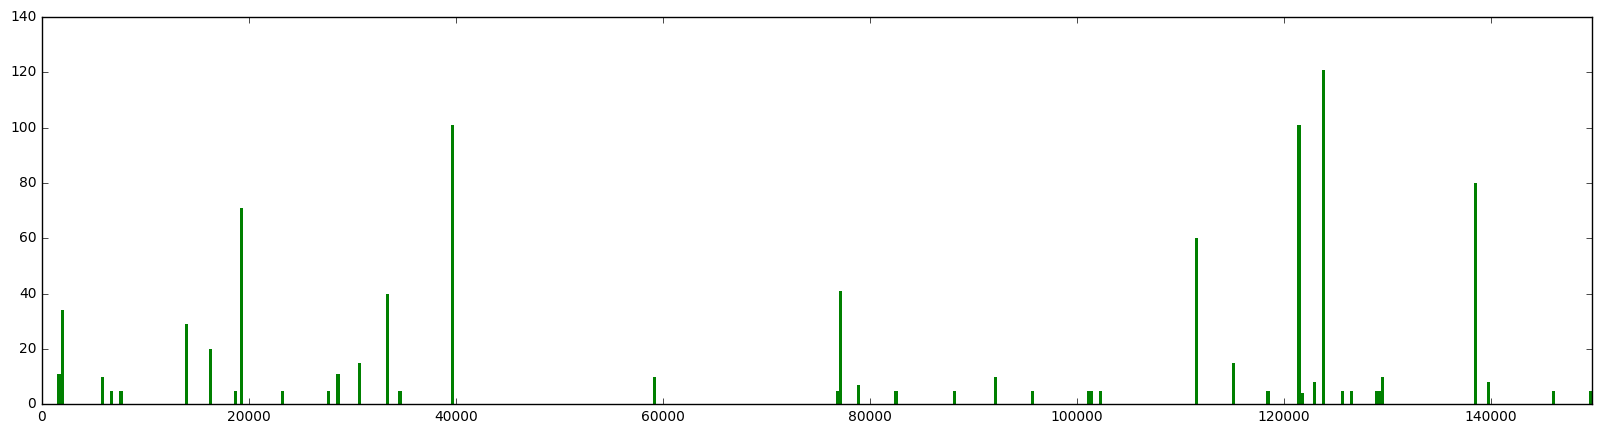

Chadwyck_British_1858_Trollope_DoctorThorneA


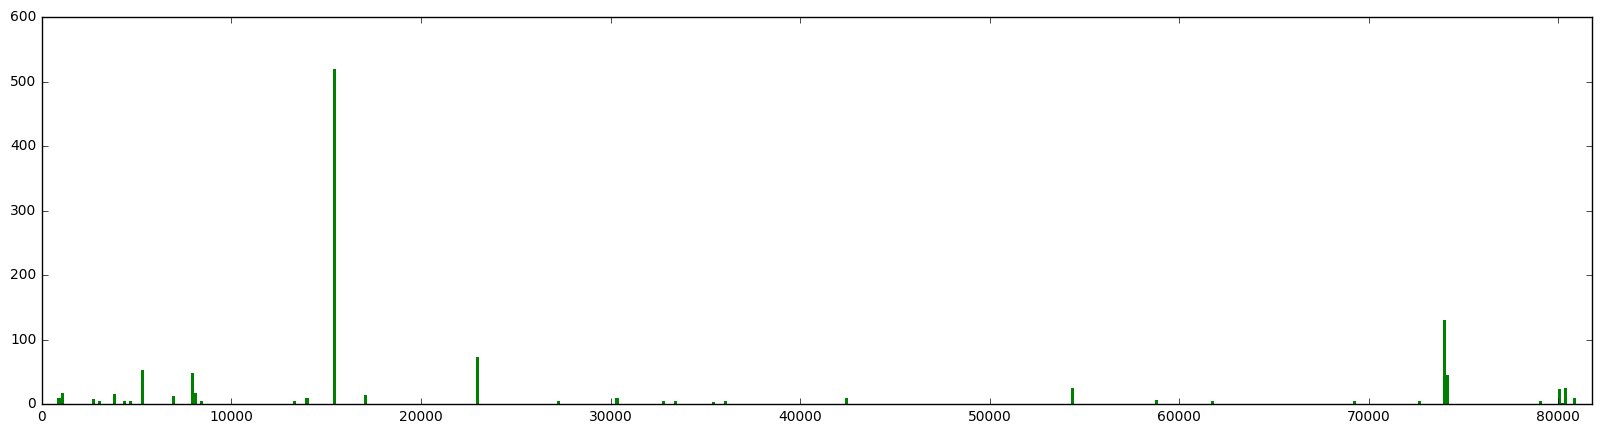

Chadwyck_British_1788_Shelley_MaryAFiction


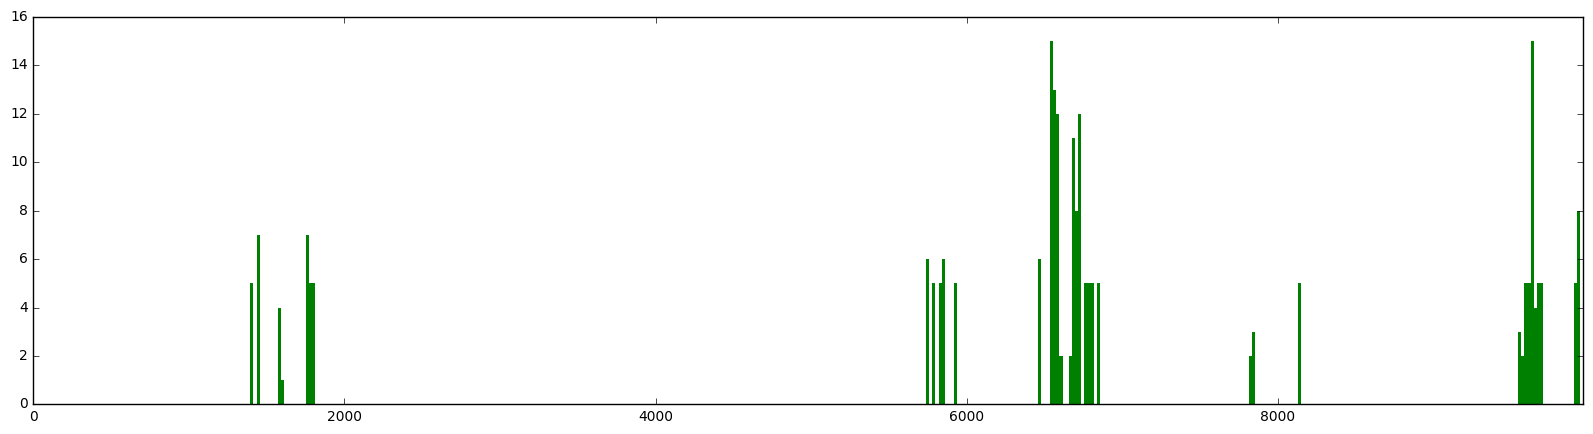

Chadwyck_British_1850_Thackeray_RebeccaandRowena


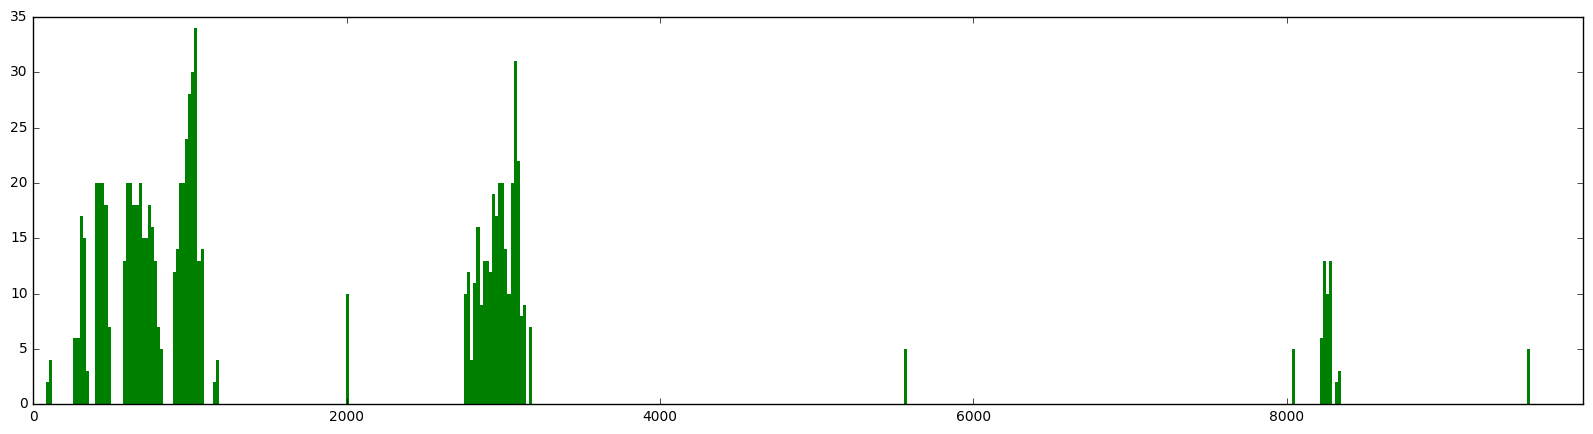

Chadwyck_British_1856_Yonge_TheDaisyChain


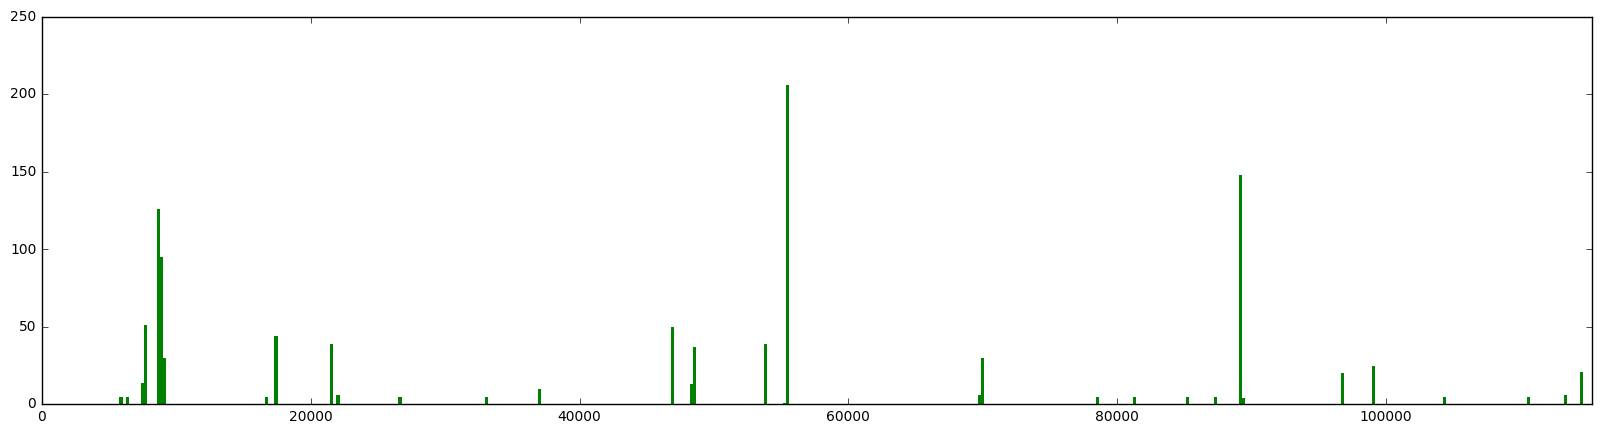

Chadwyck_British_1836_Gore_MrsArmytageor


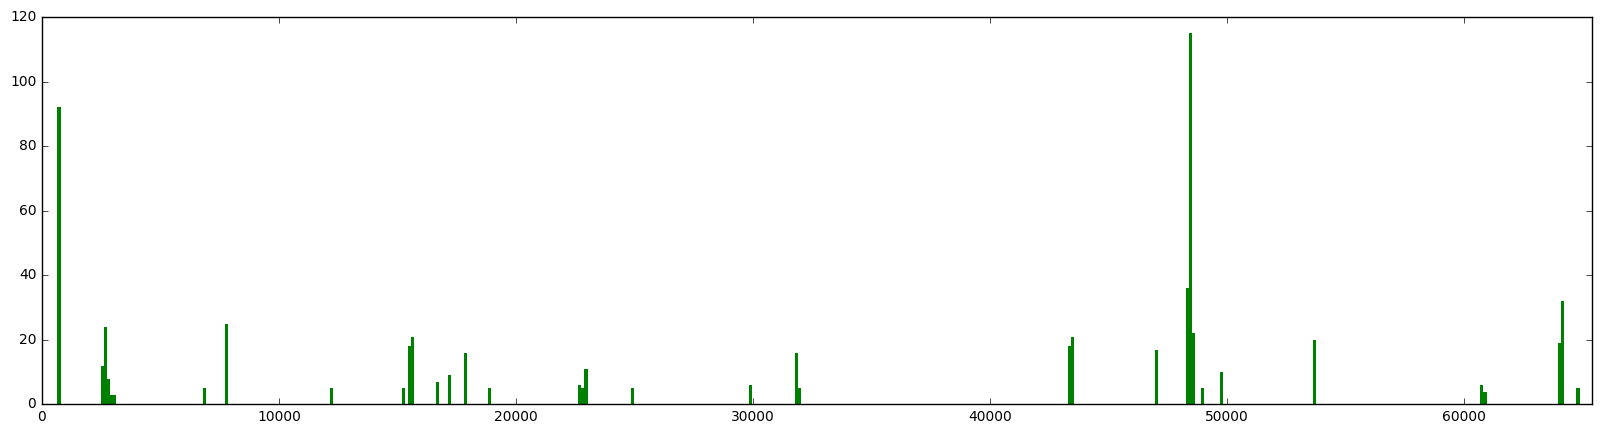

Chadwyck_British_1872_Hardy_UndertheGreenwood


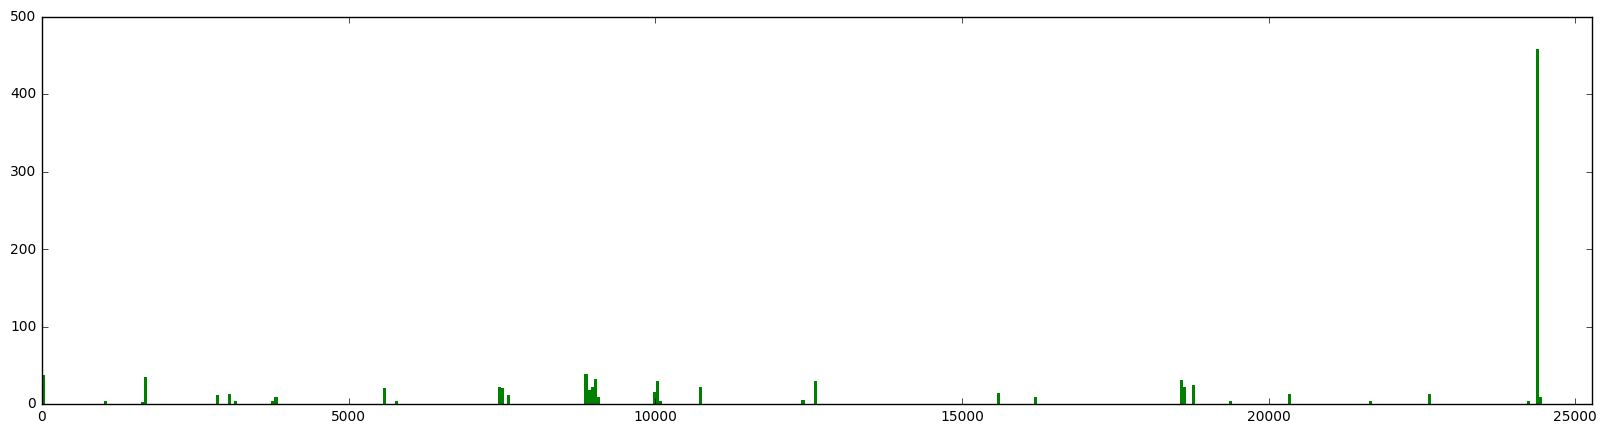

Chadwyck_British_1792_Bage_ManAsHe


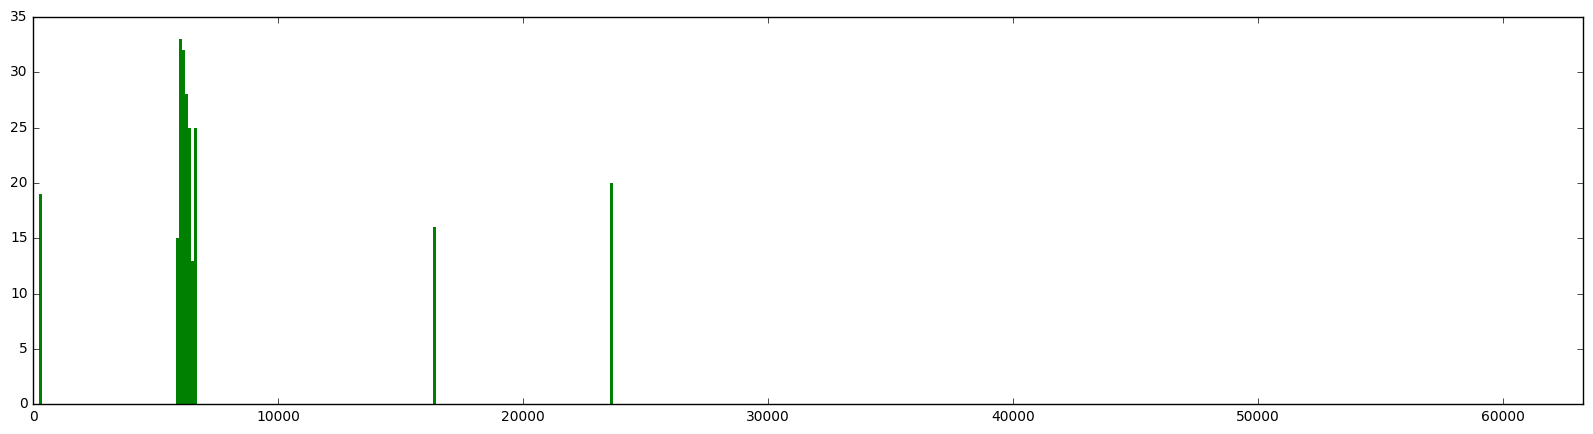

Chadwyck_Irish_1824_M'Henry_O'HalloranorThe


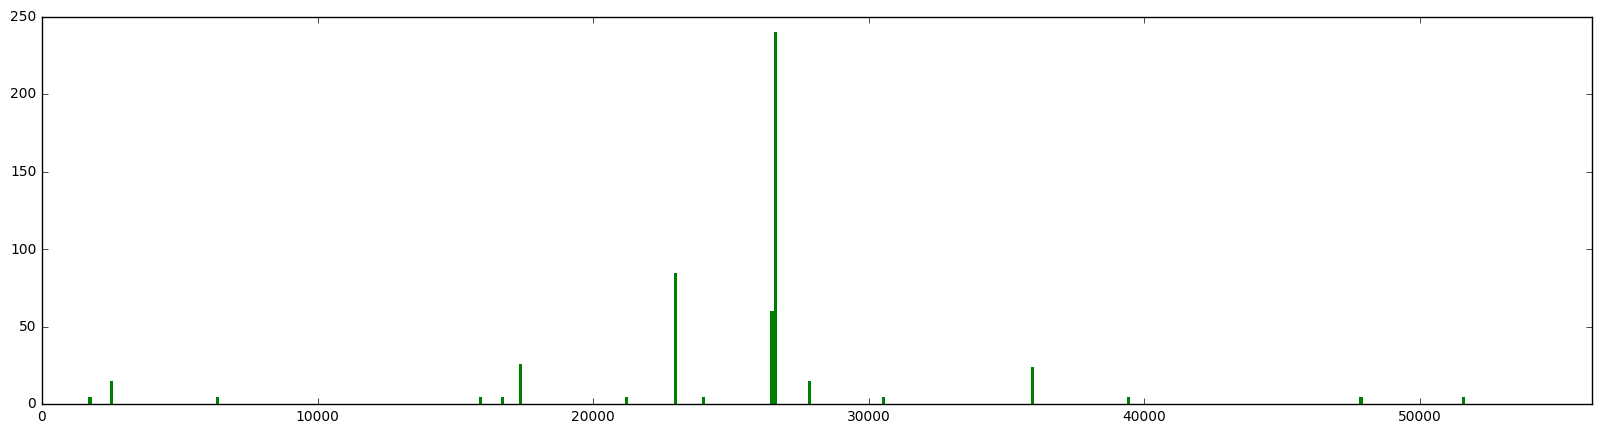

Chadwyck_Irish_1800_Edgeworth_CastleRackrentAn


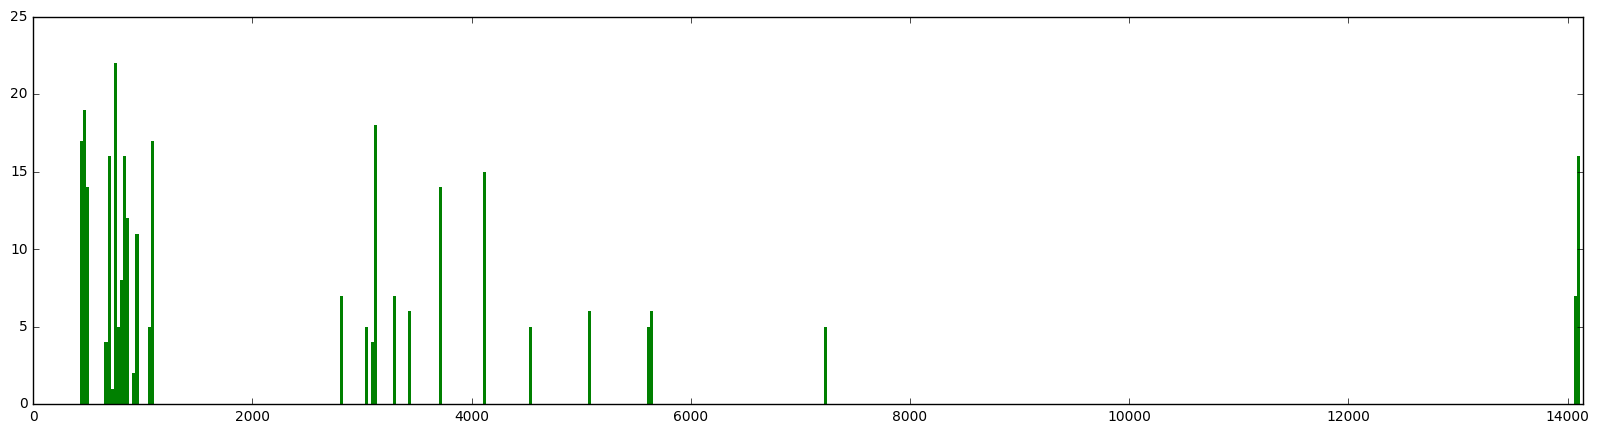

Chadwyck_British_1816_Austen_EmmaANovel


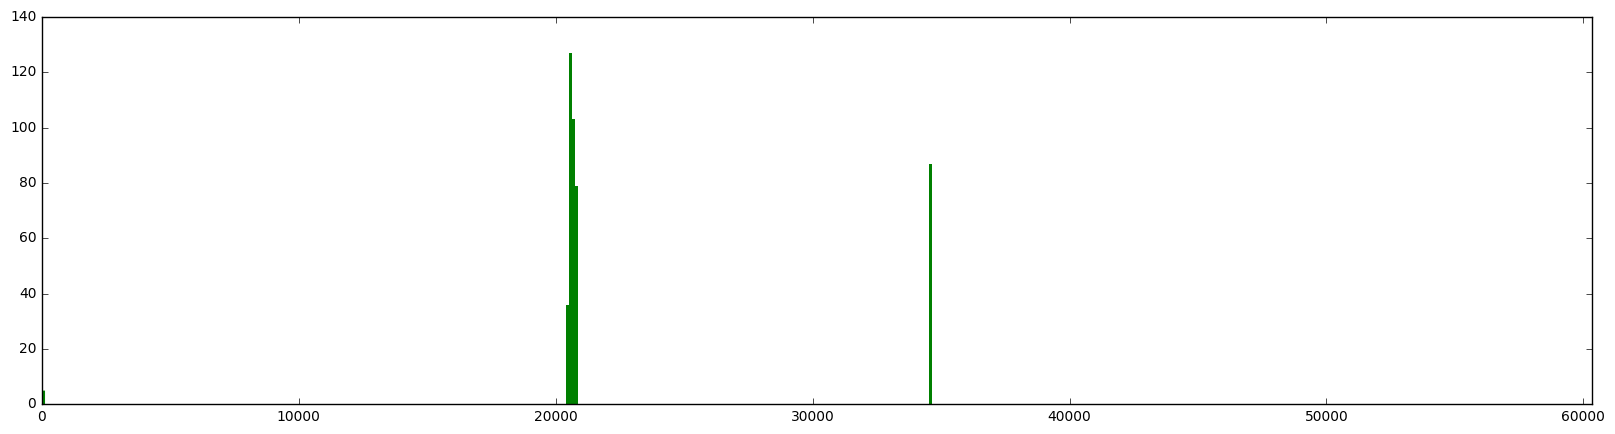

Chadwyck_British_1818_Peacock_NightmareAbbey


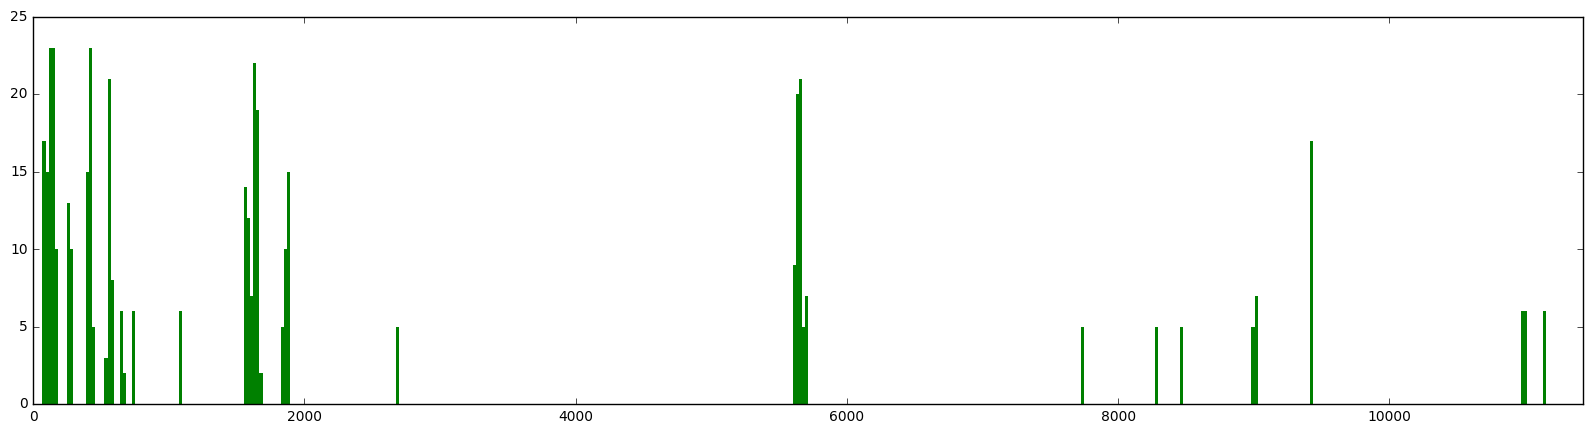

Chadwyck_British_1891_Morris_NewsfromNowhere


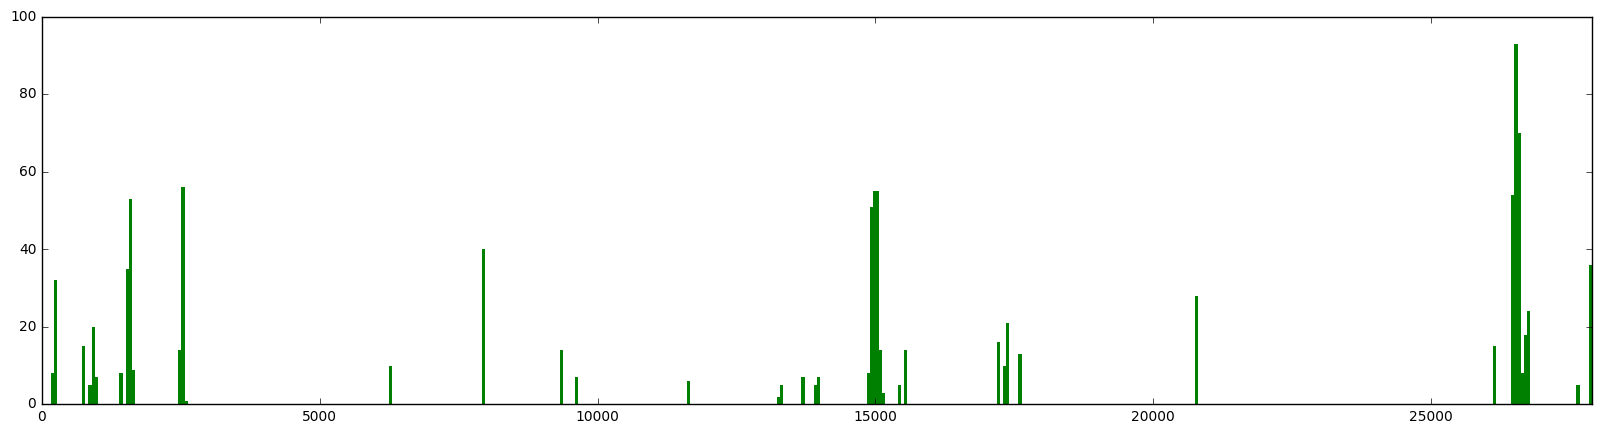

Chadwyck_British_1847_Bronte_WutheringHeightsA


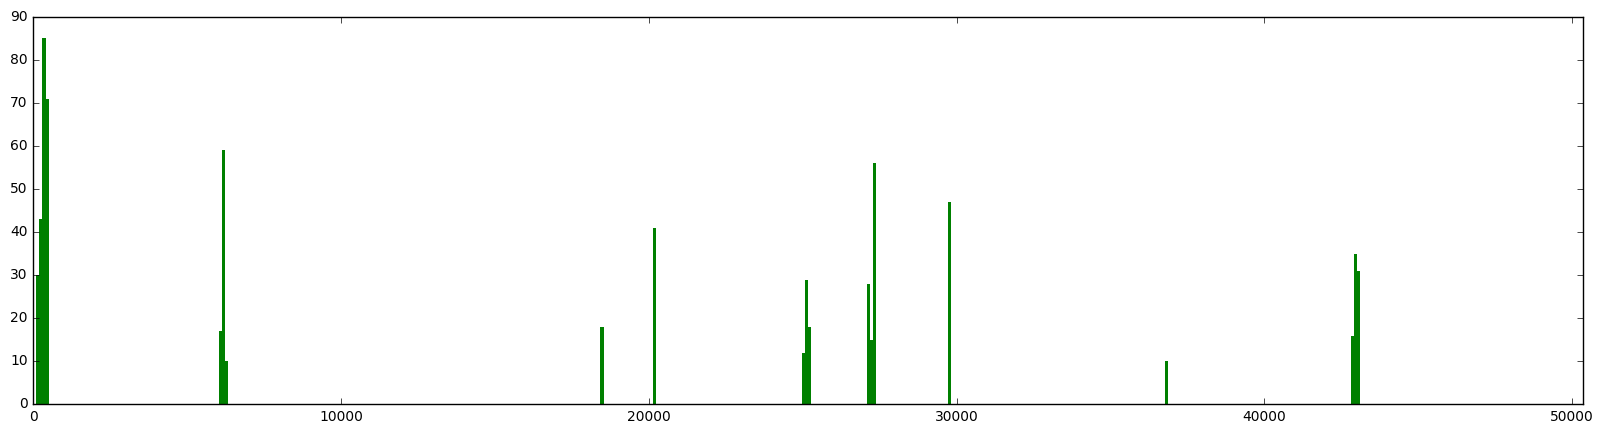

Chadwyck_British_1879_Meredith_TheEgoistA


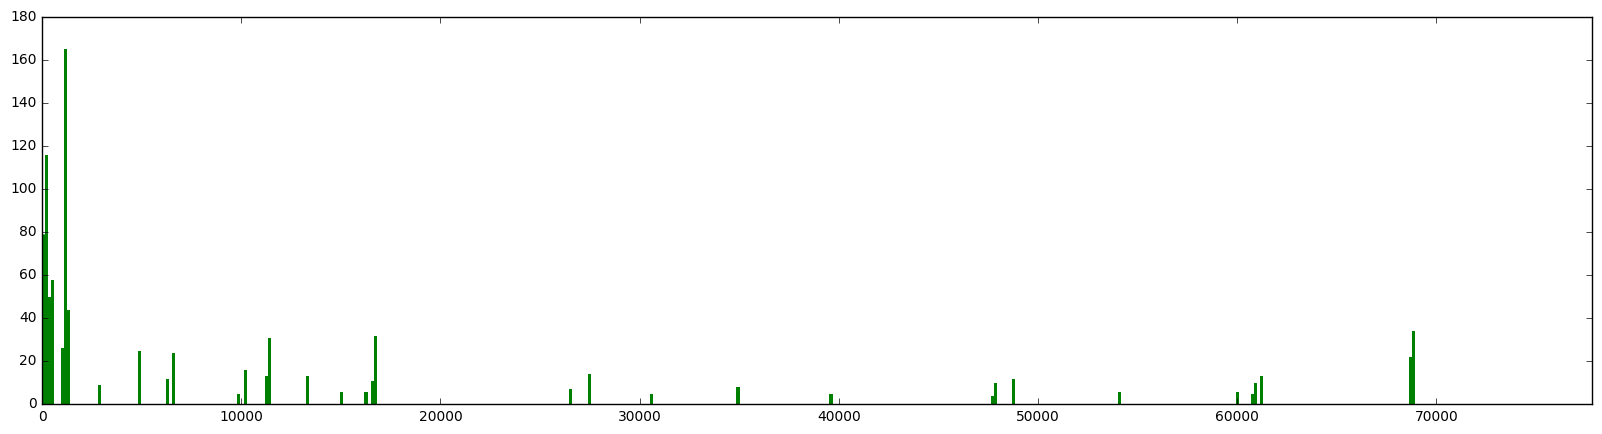

Chadwyck_Irish_1894_Moore_EstherWatersA


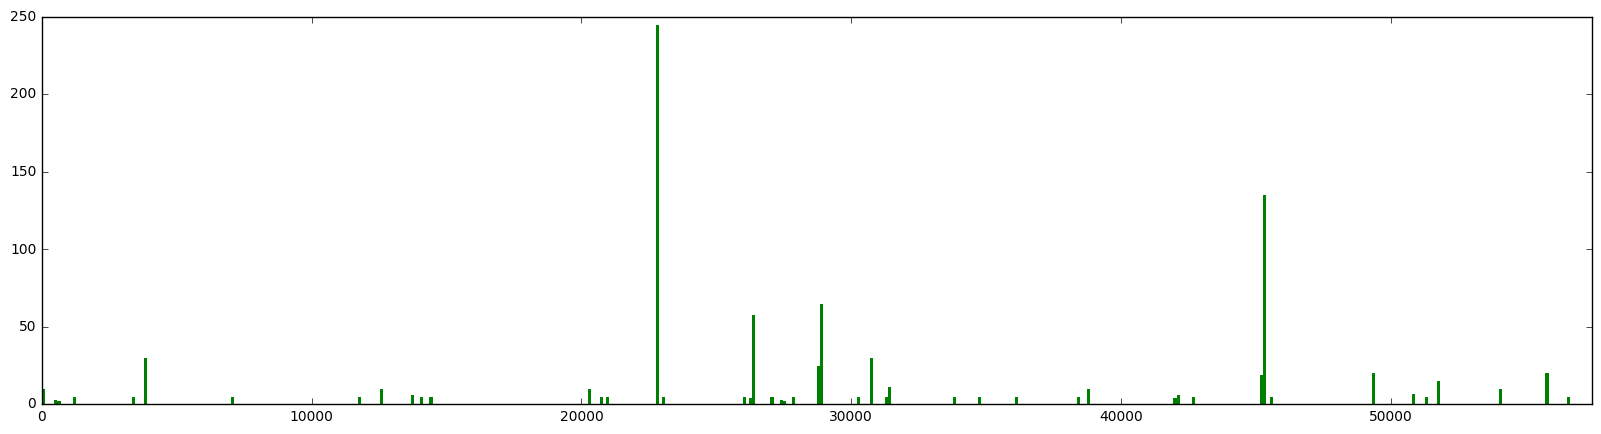

Chadwyck_British_1786_Beckford_VathekTranslatedfrom


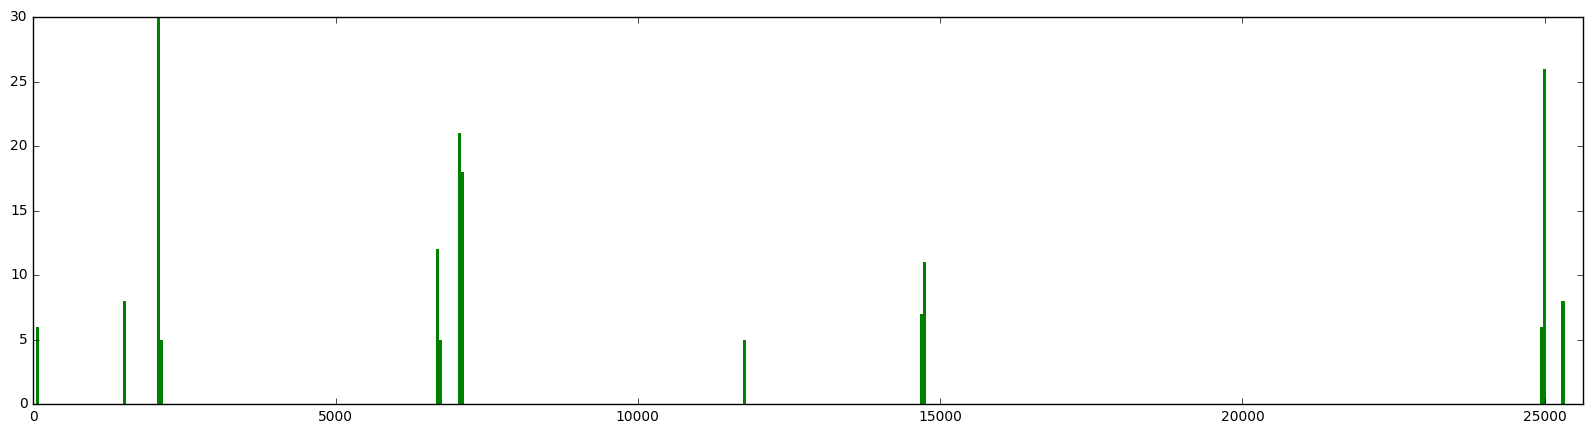

Chadwyck_British_1826_Shelley_TheLastMan


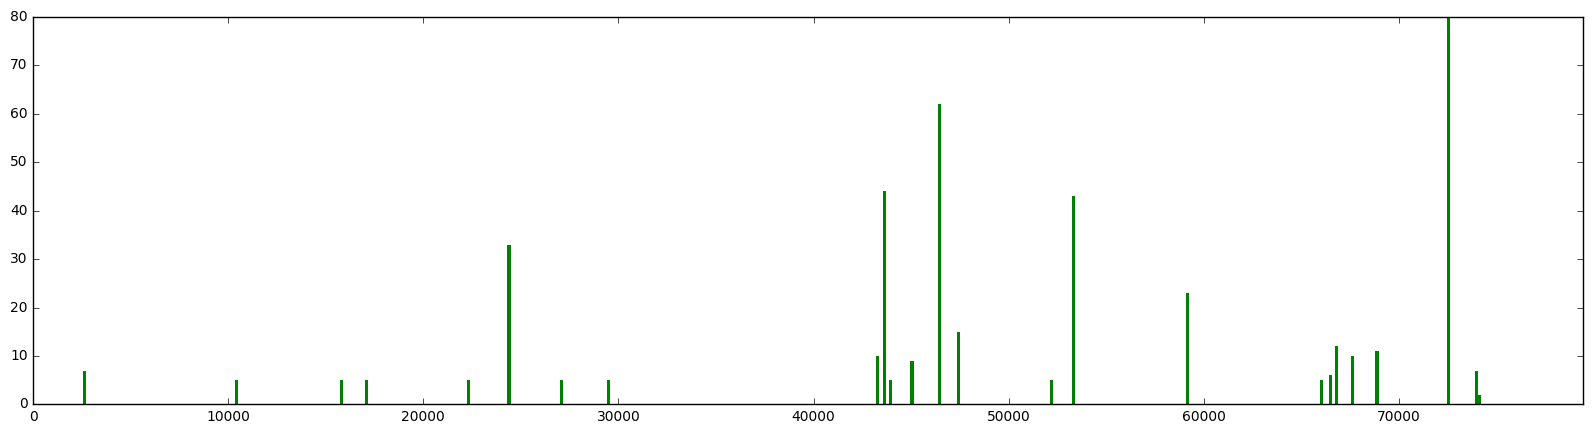

Chadwyck_British_1871_Black_ADaughterof


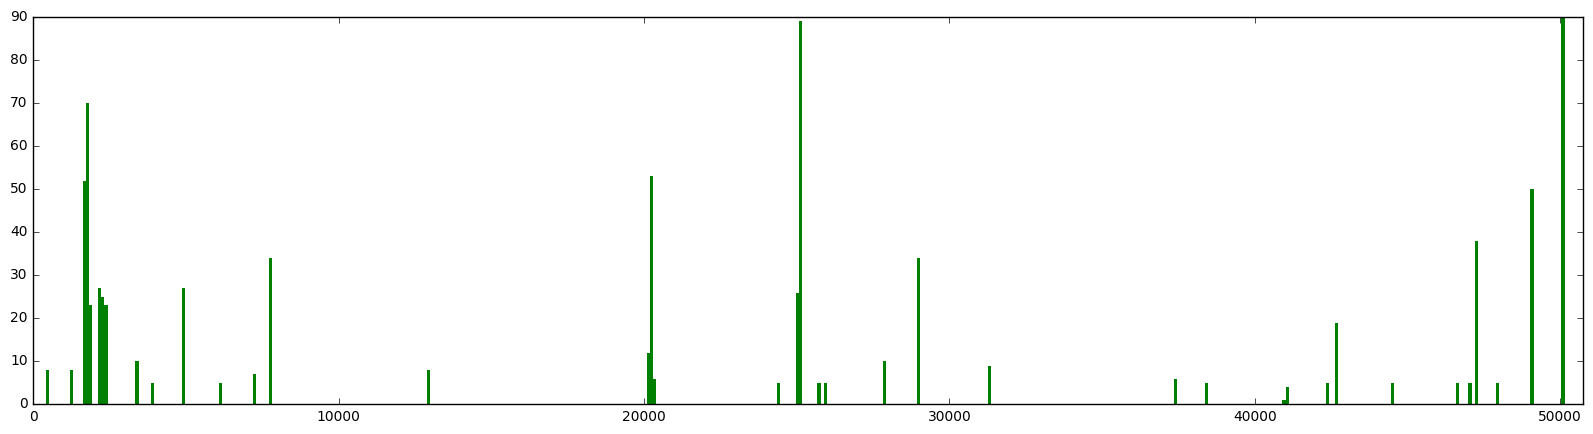

Chadwyck_British_1885_Meredith_Dianaofthe


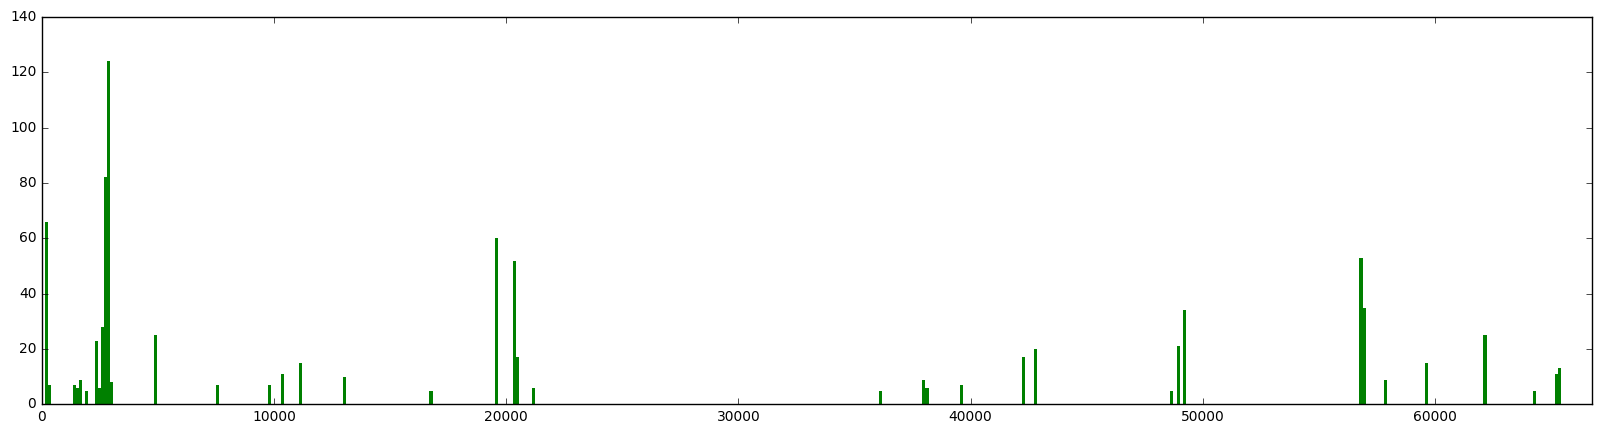

Chadwyck_British_1892_Hardy_ThePursuitof


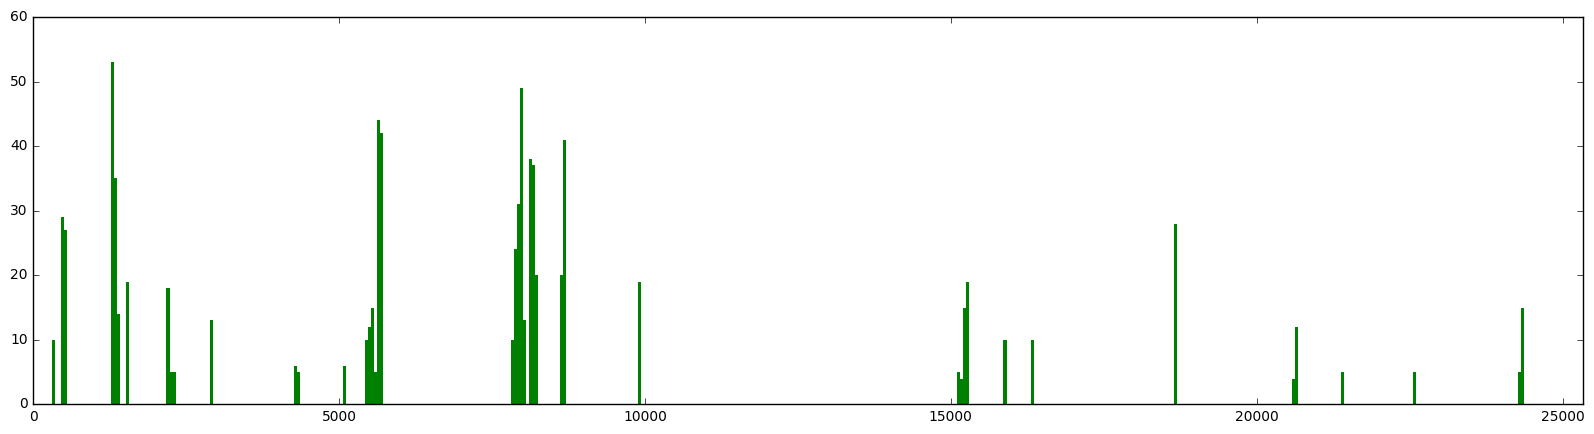

Chadwyck_British_1883_Schreiner_TheStoryof


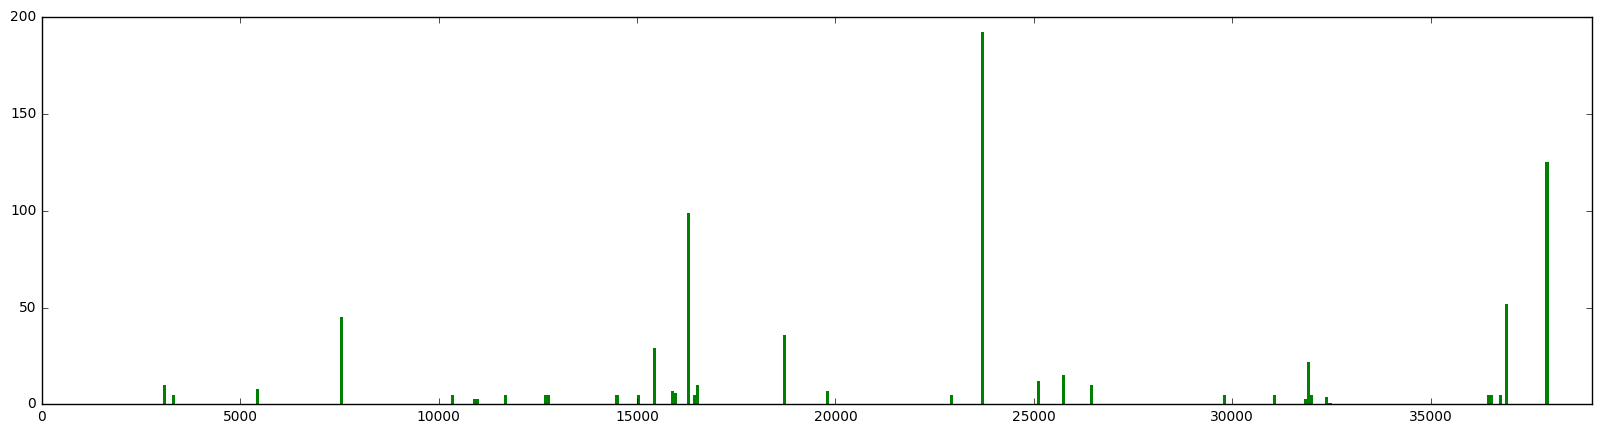

Chadwyck_British_1858_Ballantyne_TheCoralIsland


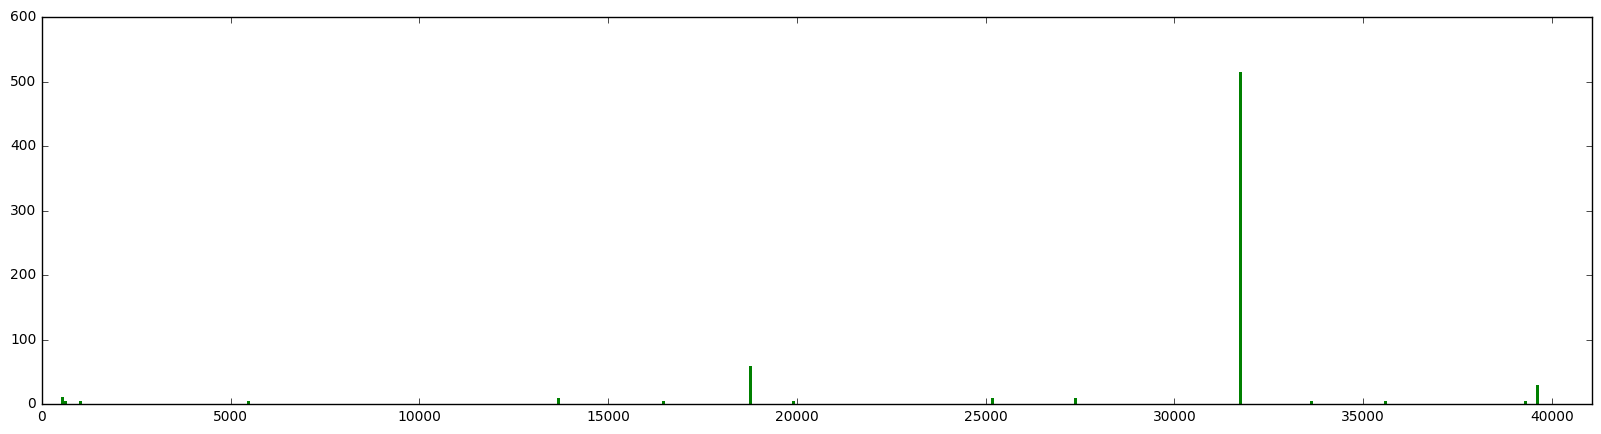

Chadwyck_British_1858_Farrar_EricorLittle


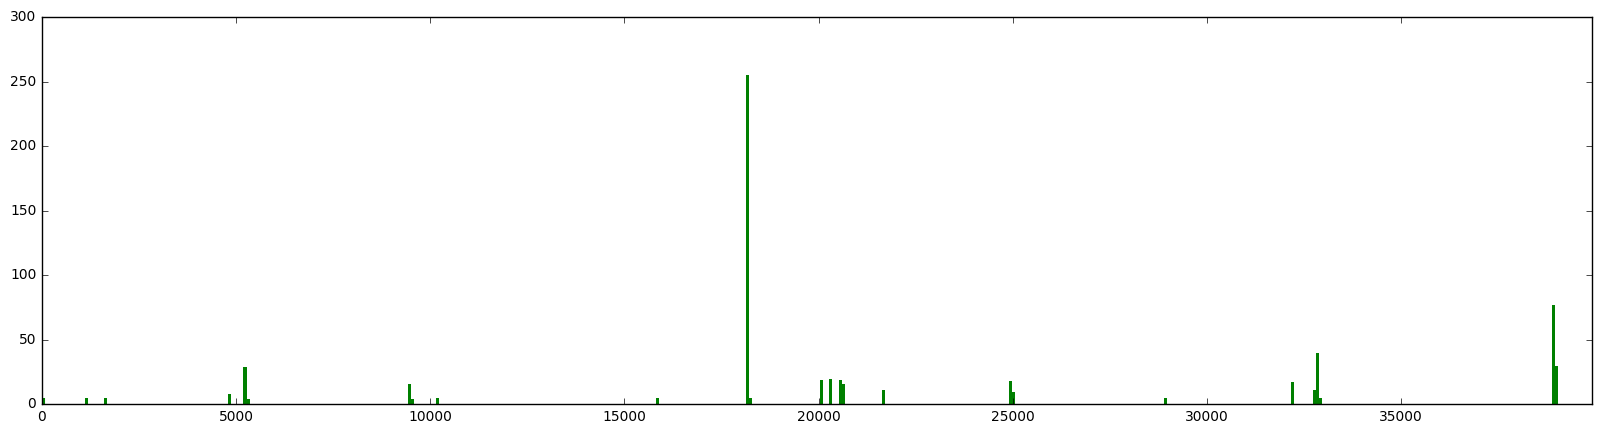

Chadwyck_British_1889_Gissing_TheNetherWorld


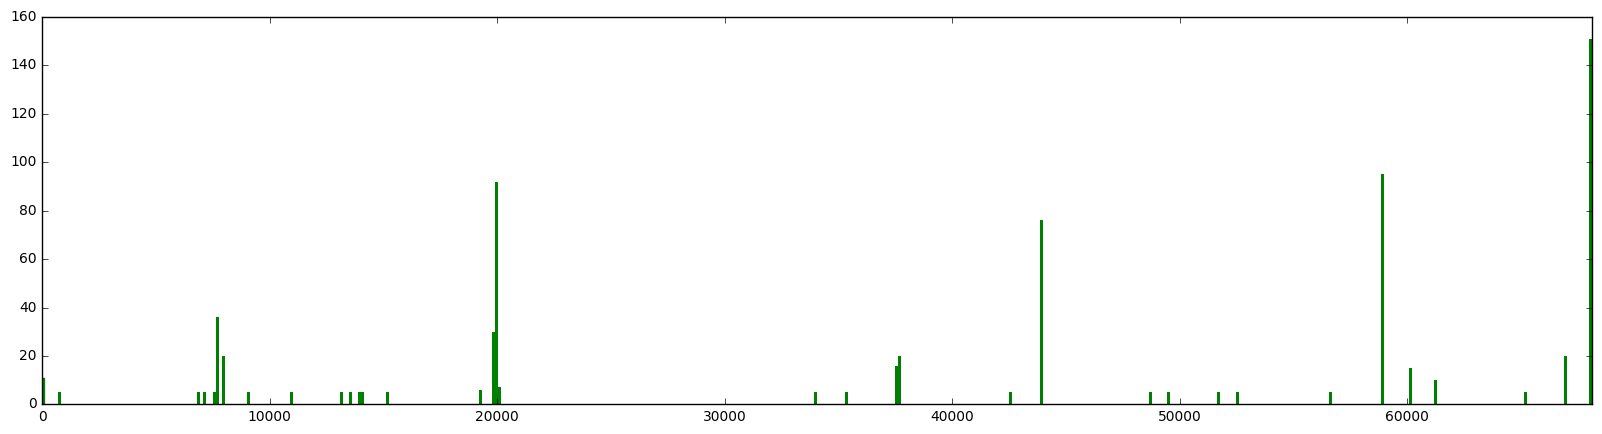

Chadwyck_British_1792_Holcroft_AnnaStIves


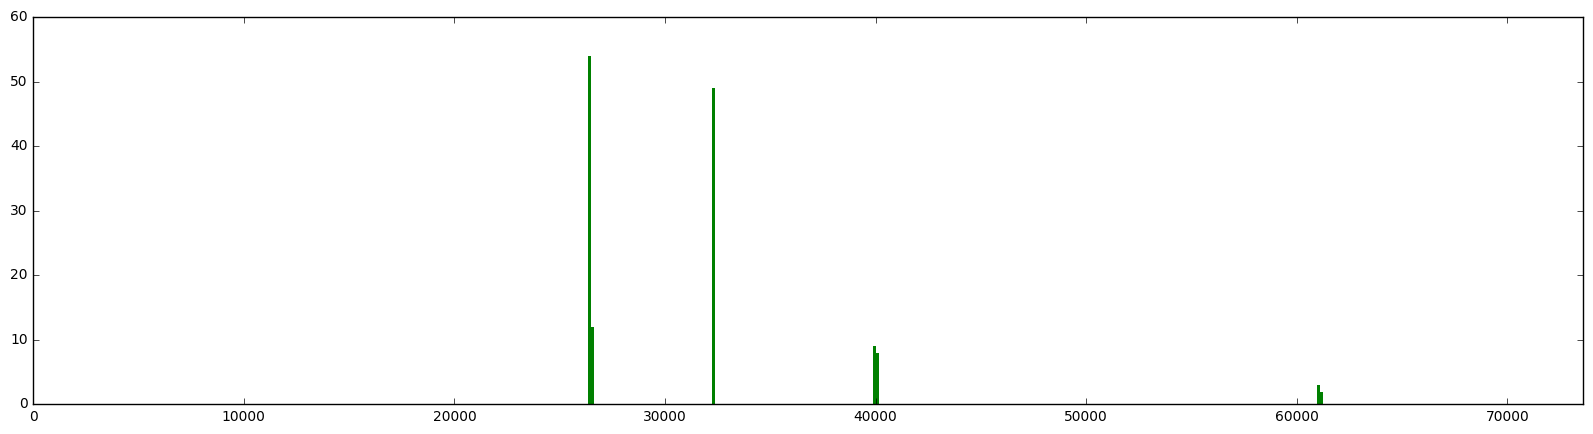

Chadwyck_British_1885_Haggard_KingSolomonMines


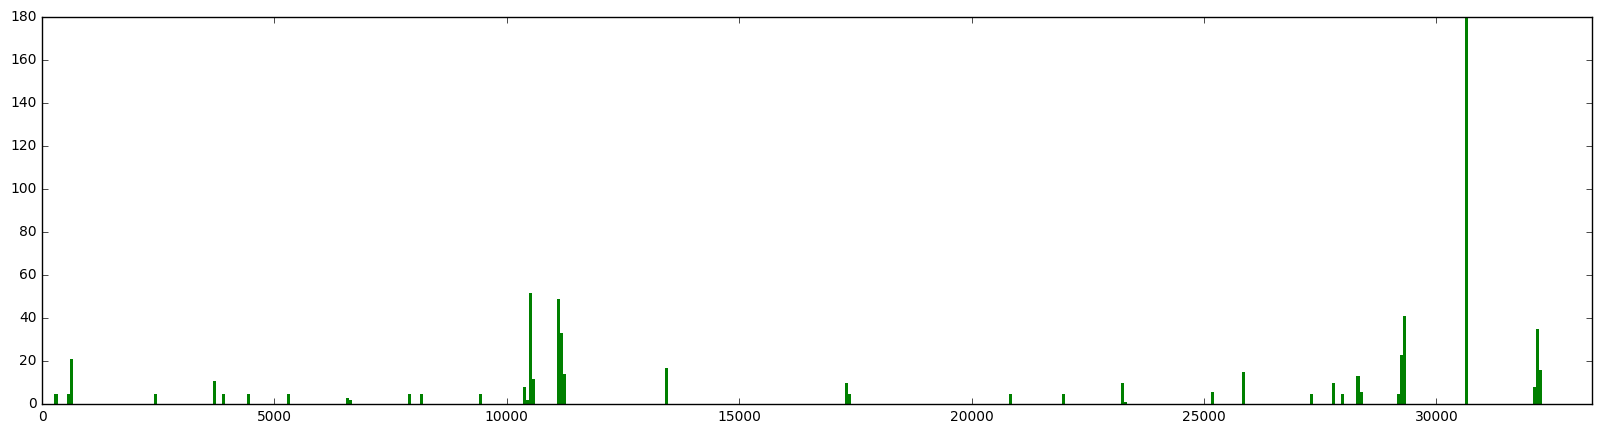

Chadwyck_British_1813_Austen_PrideandPrejudice


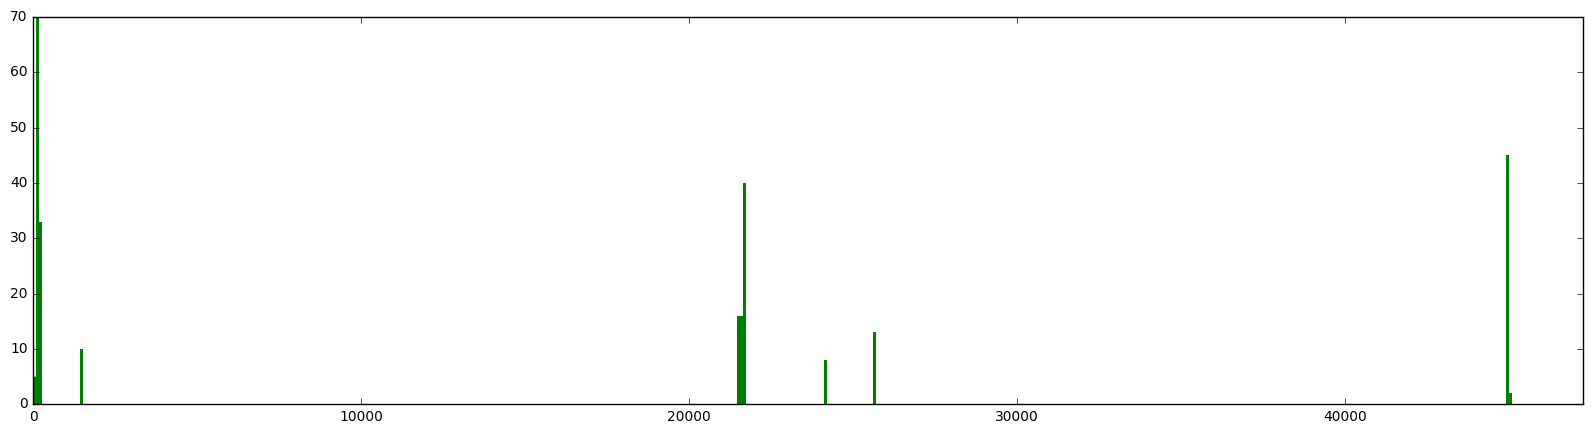

Chadwyck_British_1865_Trollope_CanYouForgive


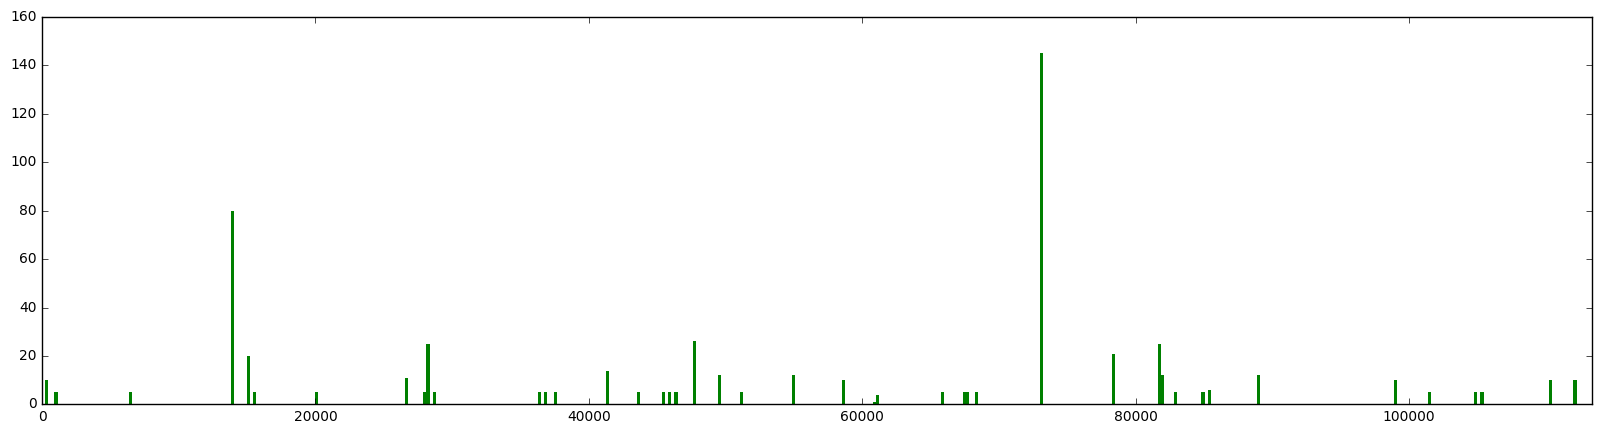

Chadwyck_British_1814_Austen_MansfieldParkA


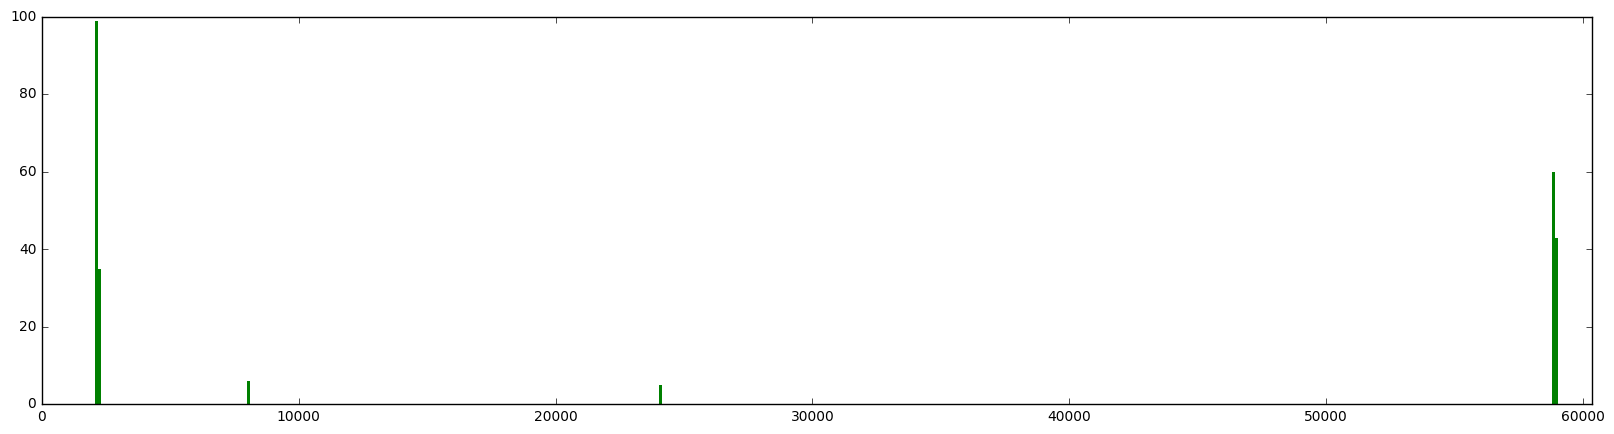

Chadwyck_British_1889_Stevenson_TheMasterof


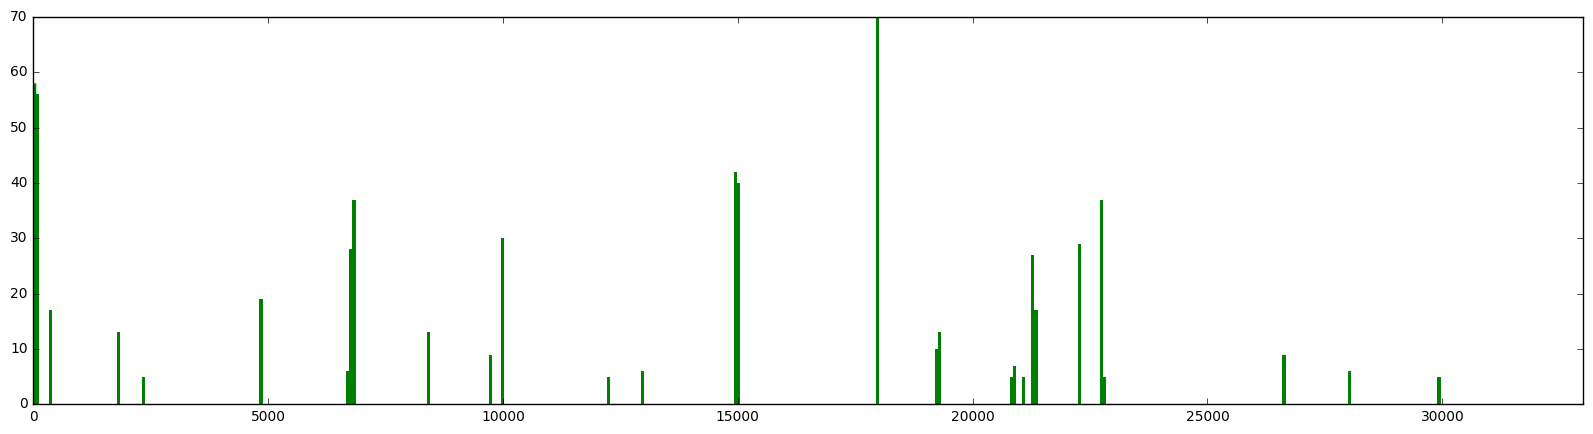

Chadwyck_Irish_1891_Wilde_ThePictureof


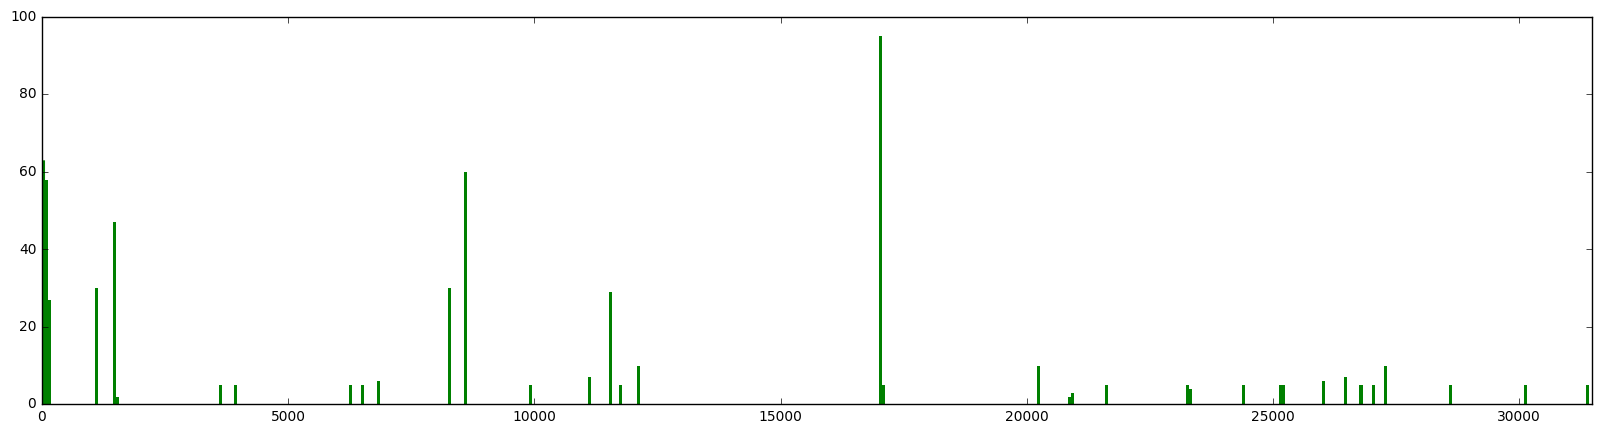

Chadwyck_British_1876_Trollope_ThePrimeMinister


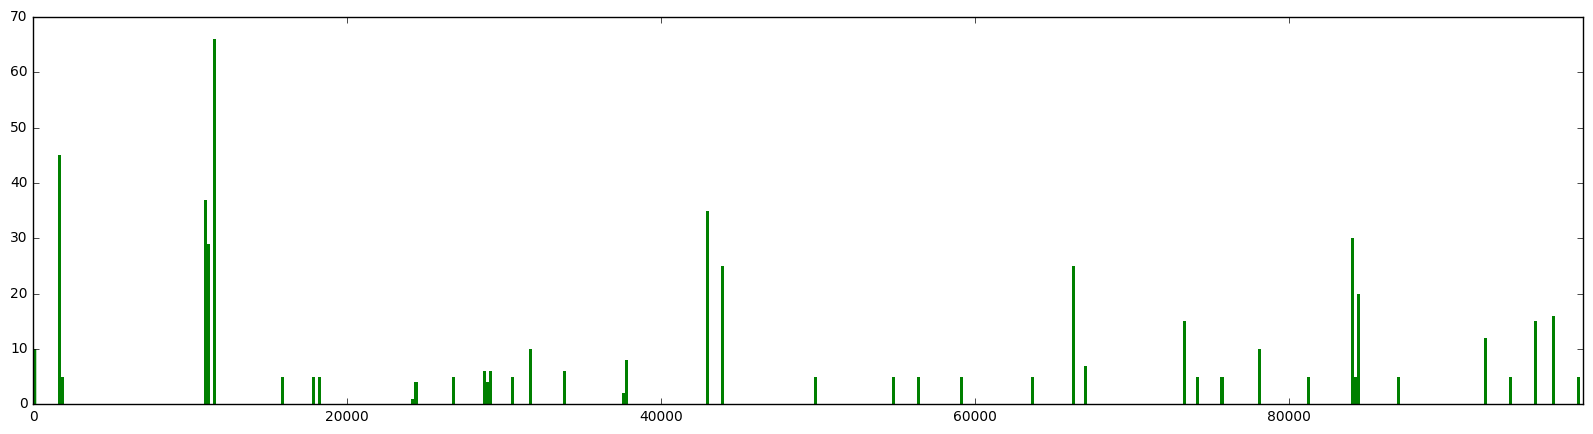

Chadwyck_British_1796_Bage_HermsprongorMan


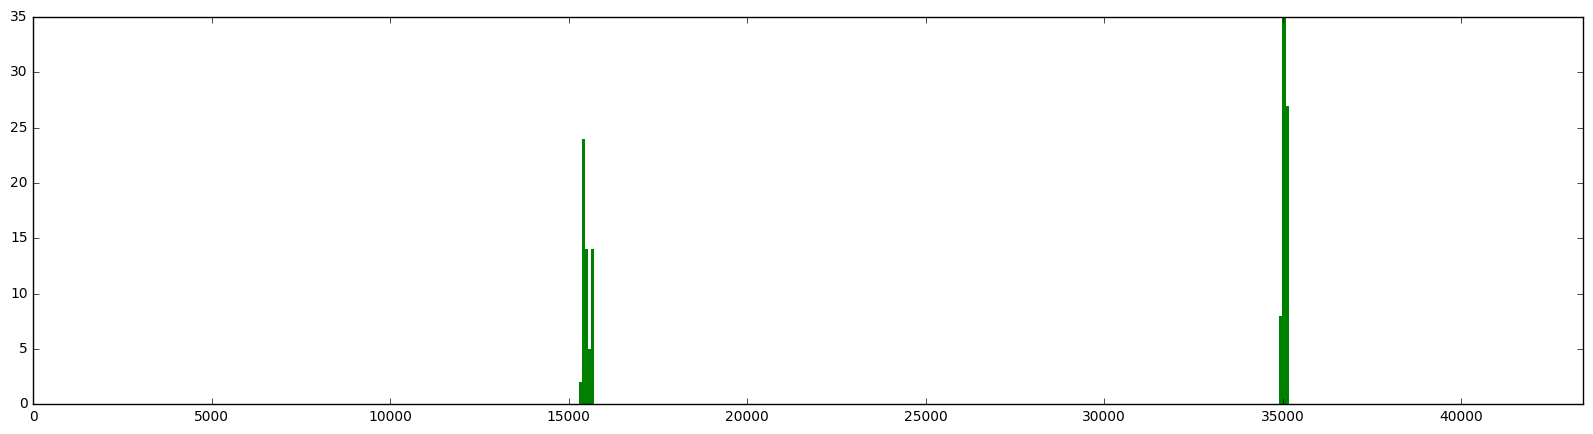

Chadwyck_British_1878_Russell_TheWreckof


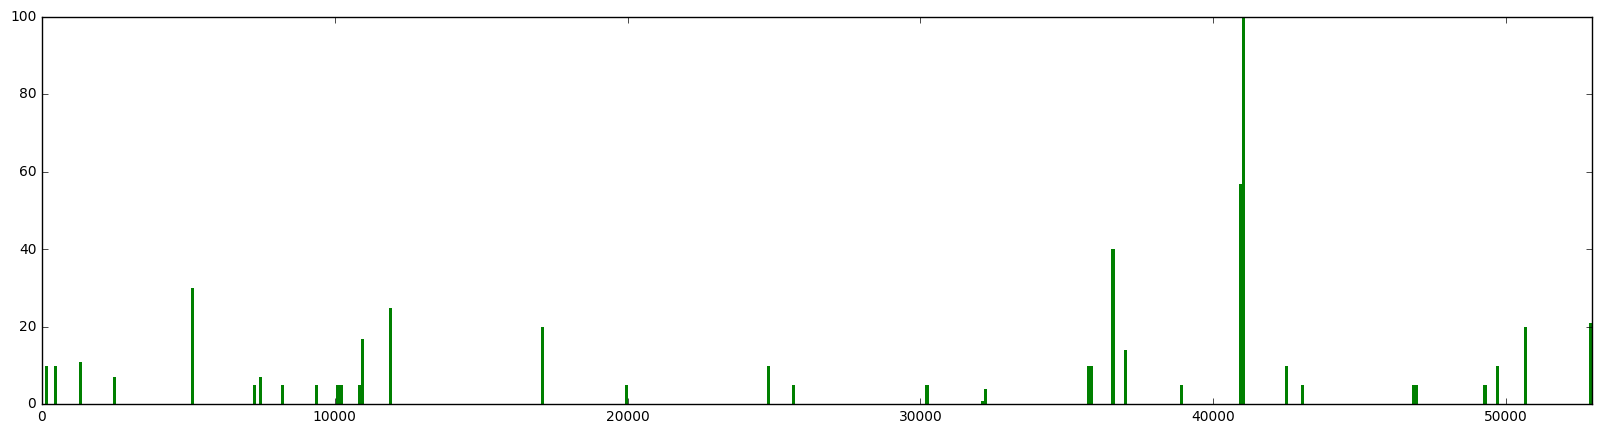

Chadwyck_British_1872_Linton_TheTrueHistory


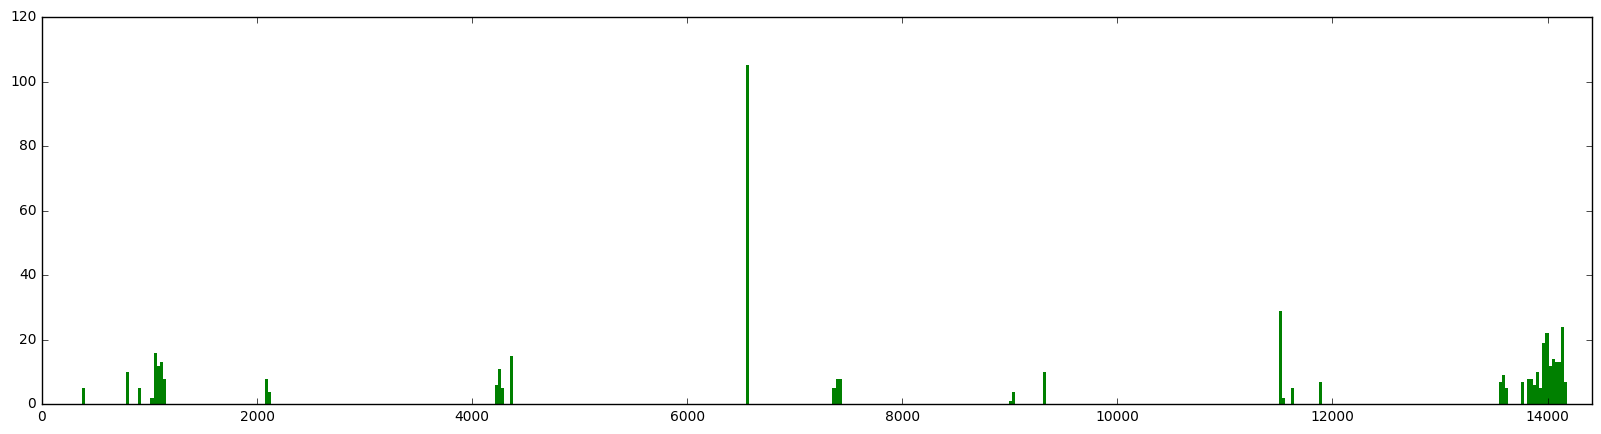

Chadwyck_British_1897_Gissing_TheWhirlpoolBy


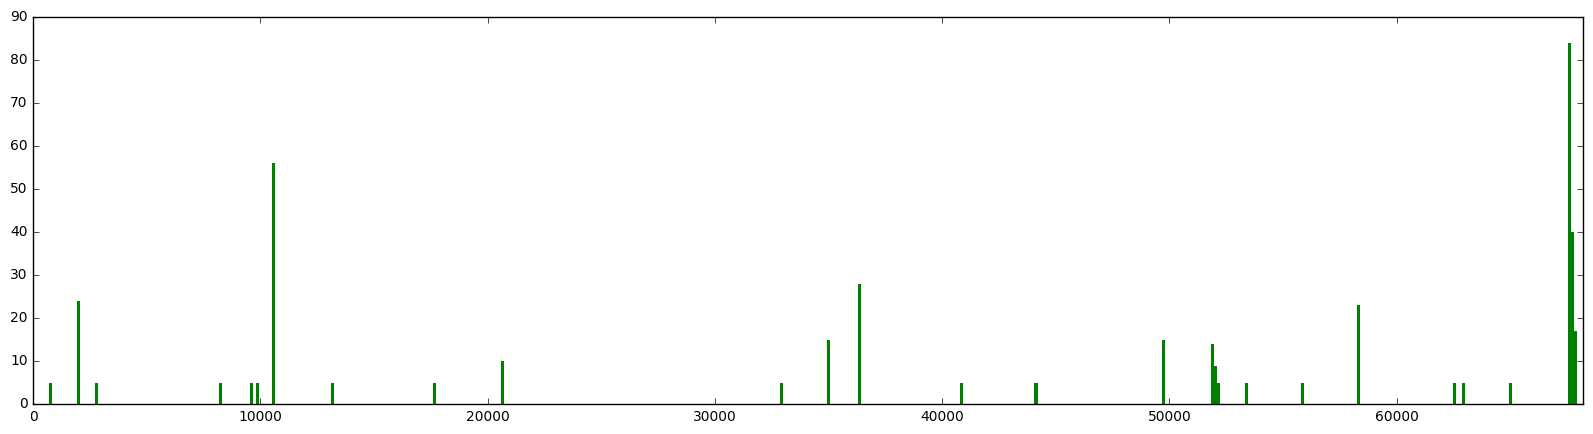

Chadwyck_Irish_1897_Stoker_DraculaByBram


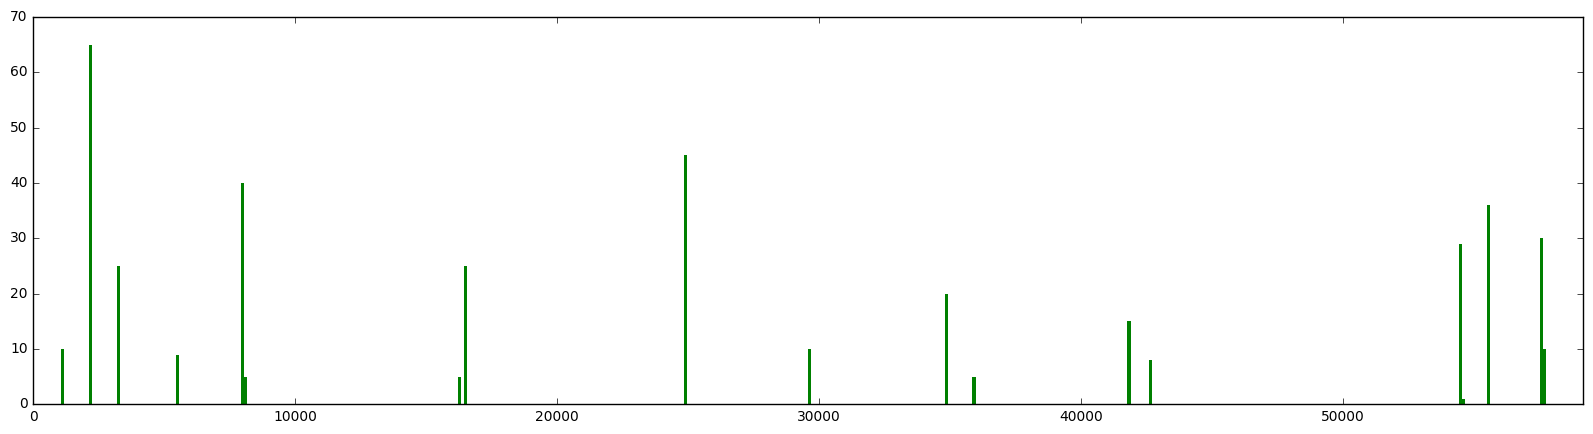

Chadwyck_British_1847_Bronte_AgnesGreyA


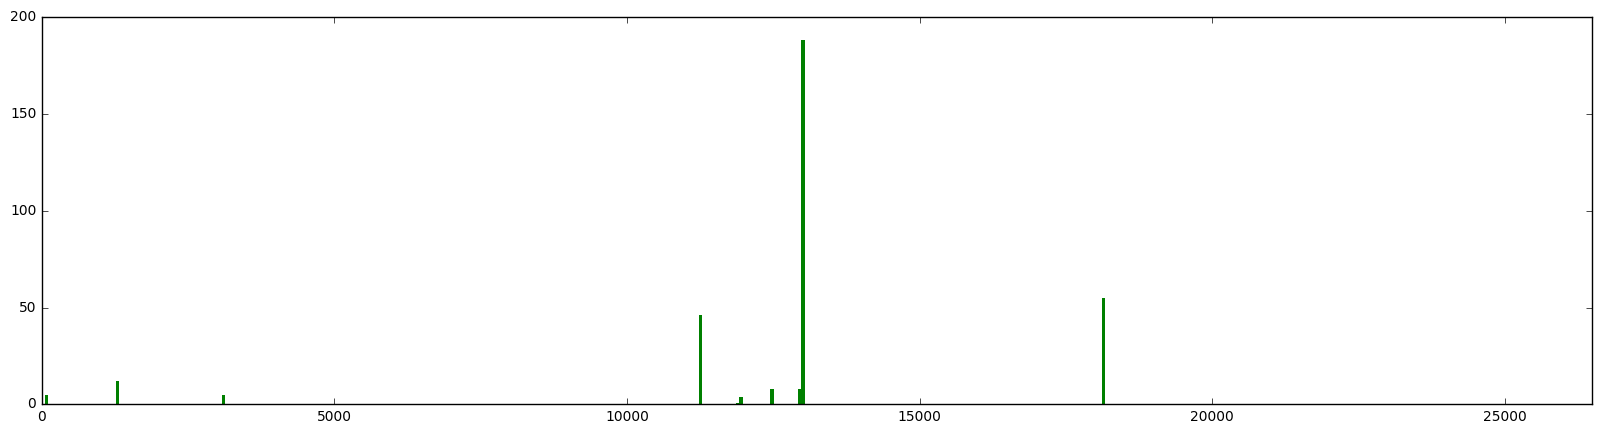

Chadwyck_British_1798_Shelley_TheWrongsof


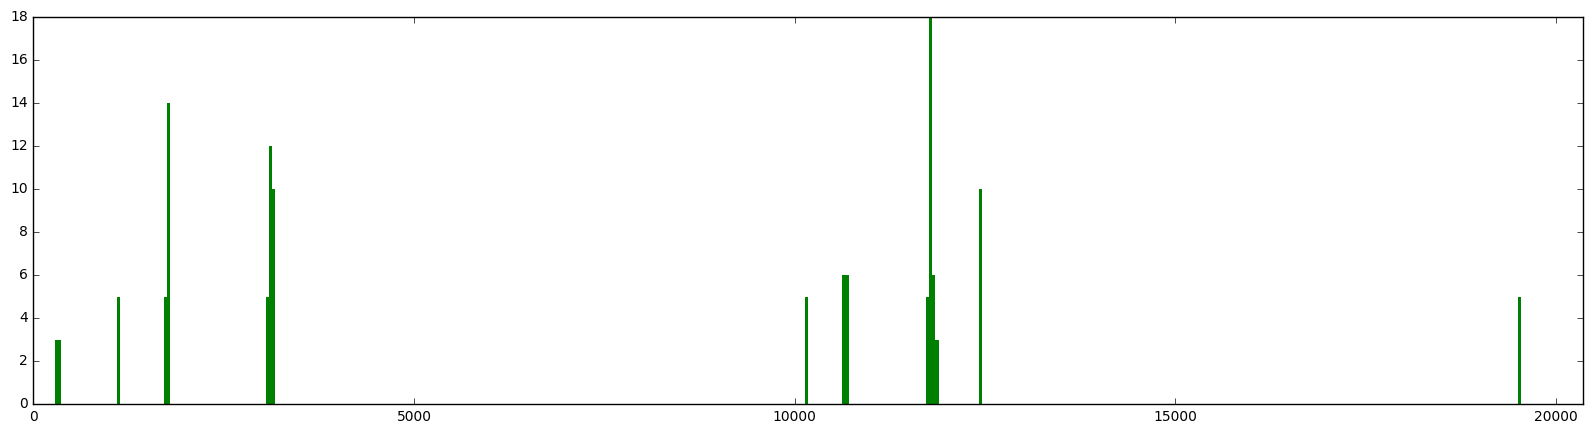

Chadwyck_British_1887_Barry_TheNewAntigone


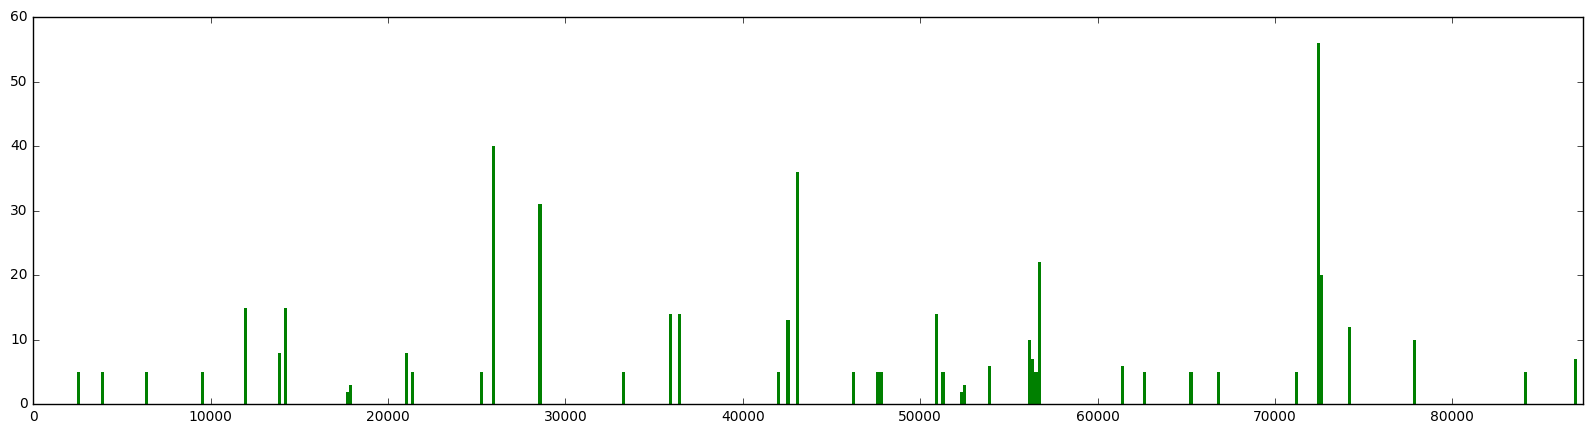

Chadwyck_British_1794_Godwin_ThingsAsThey


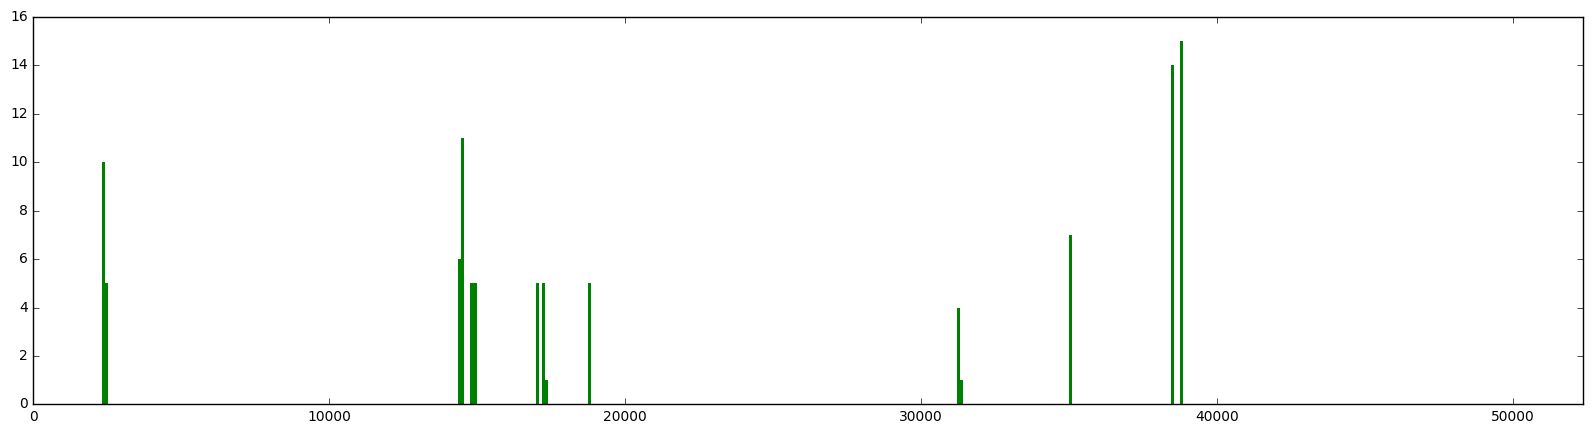

Chadwyck_British_1892_Baring_InTheRoar


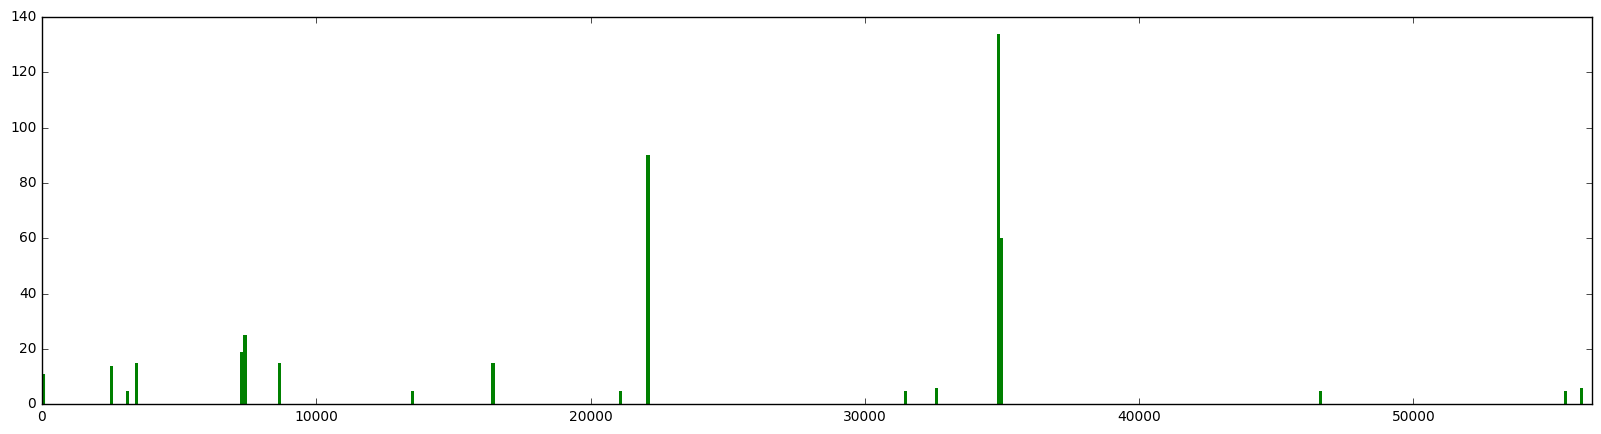

Chadwyck_British_1856_Thackeray_TheMemoirsof


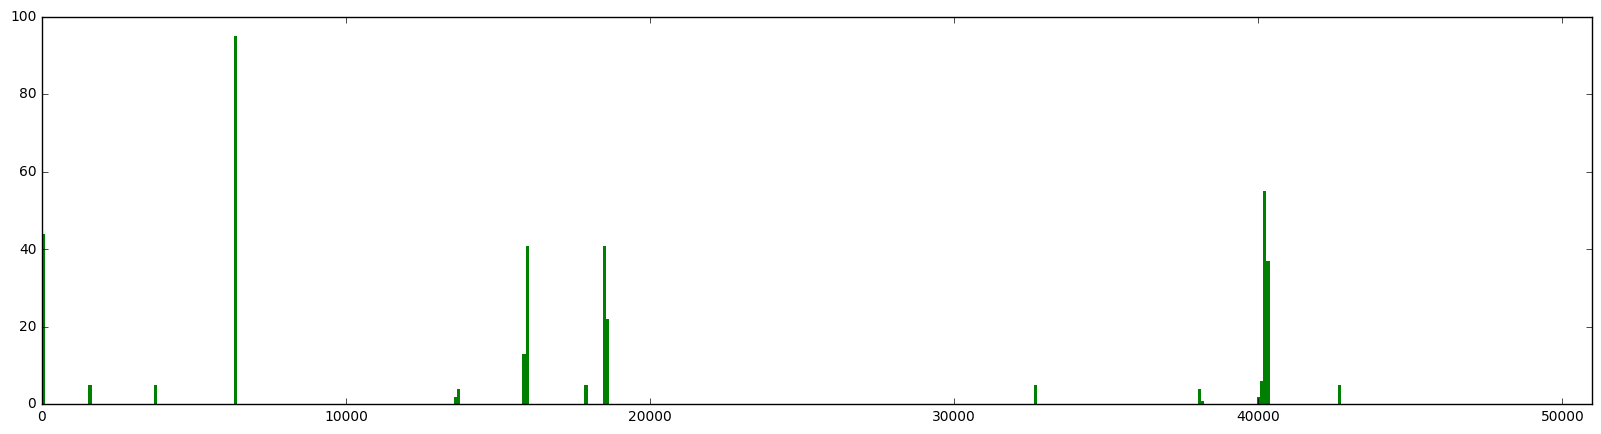

Chadwyck_British_1811_Austen_SenseandSensibility


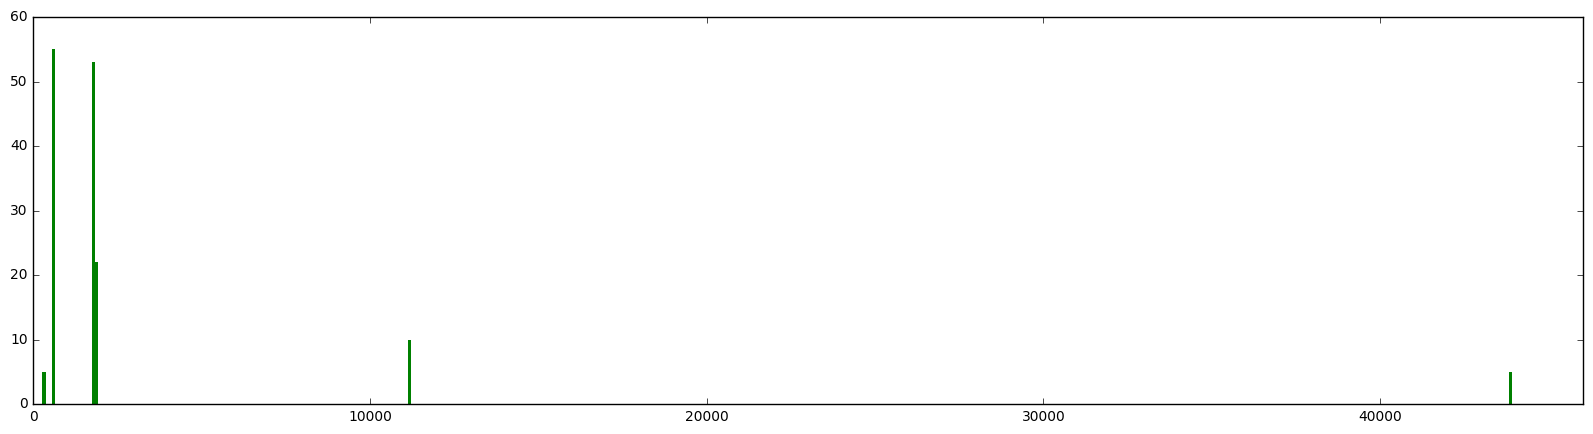

Chadwyck_British_1891_Gissing_NewGrubStreet


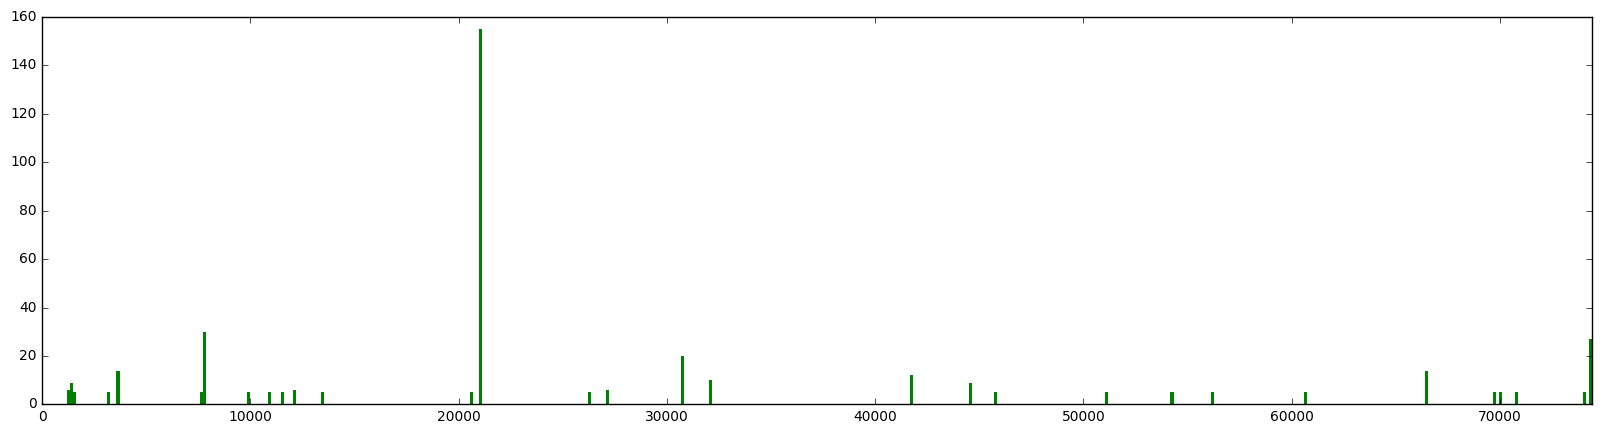

Chadwyck_British_1867_Ouida 1839 1908_UnderTwoFlags


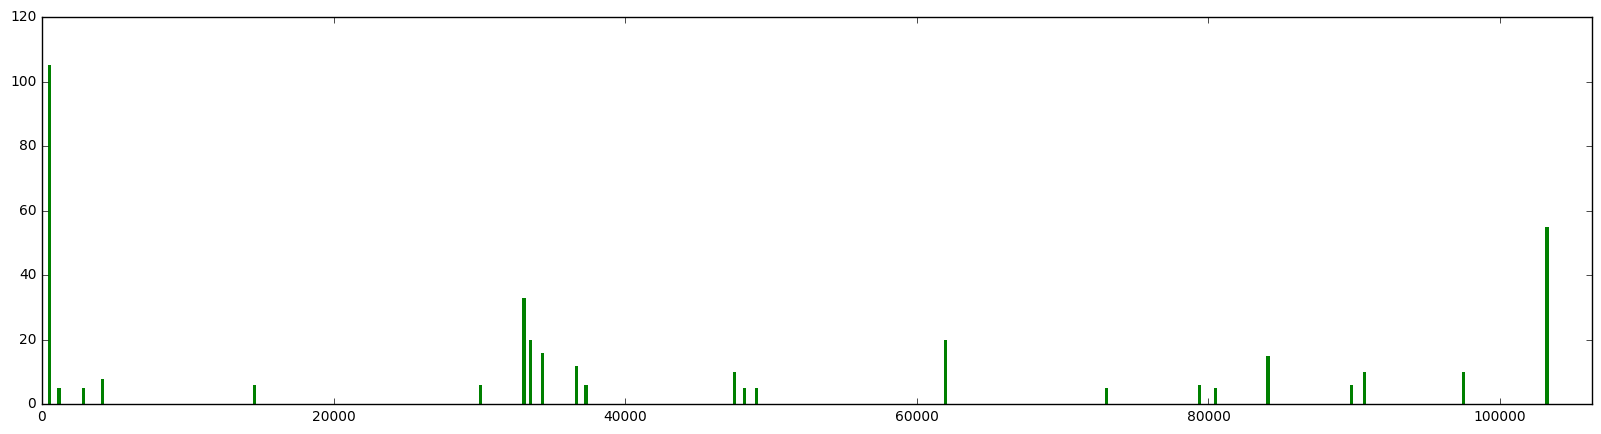

Chadwyck_British_1796_Inchbald_NatureandArt


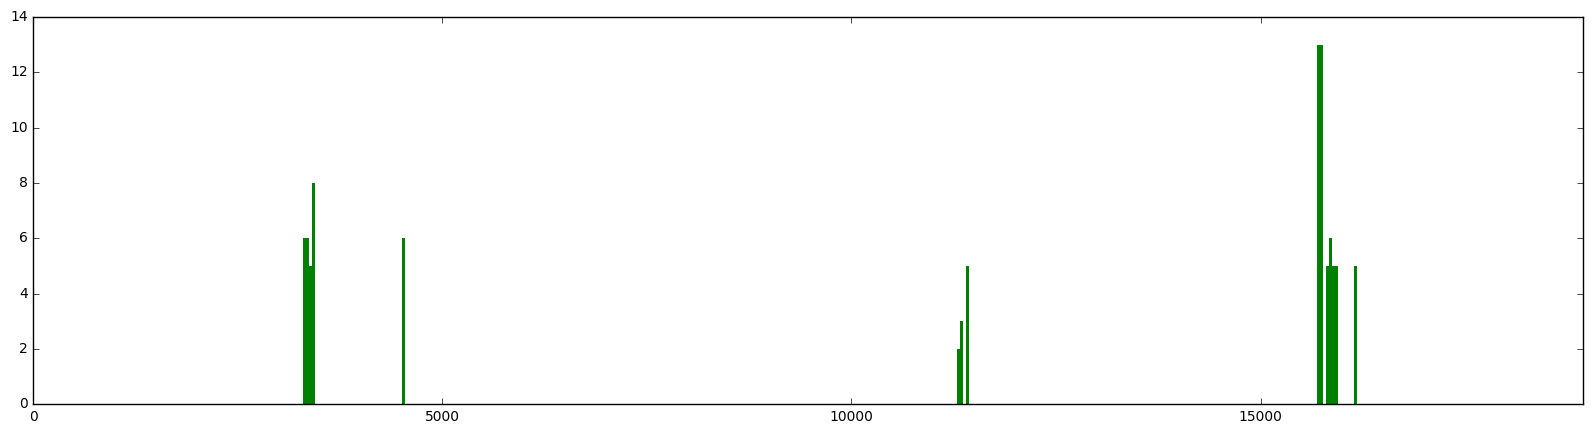

Chadwyck_British_1881_White_TheAutobiographyof


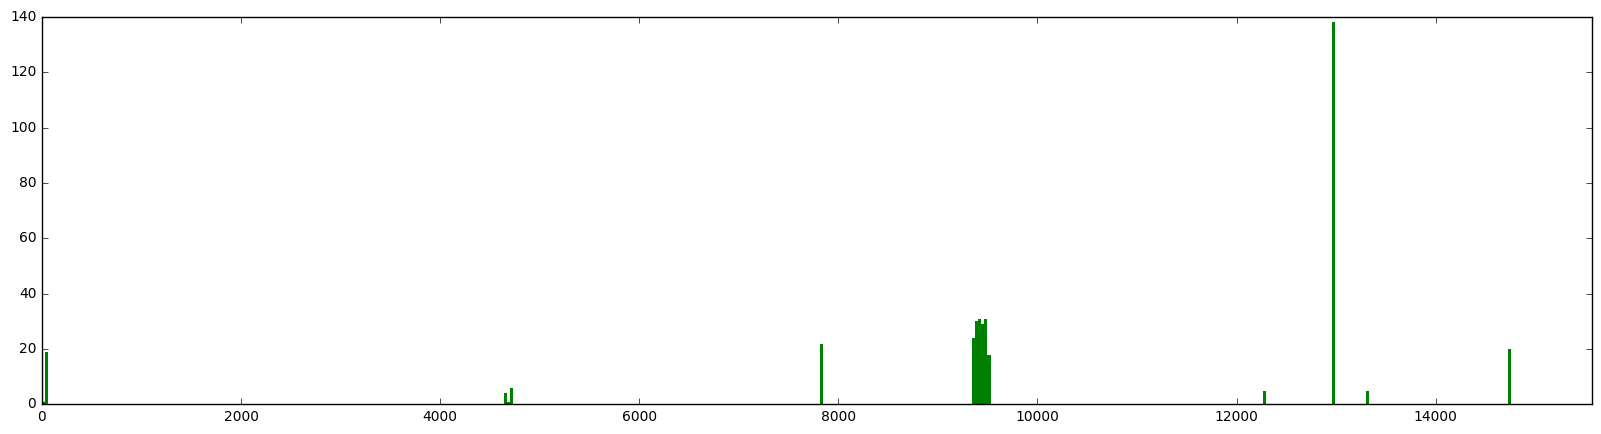

Chadwyck_British_1897_Coleridge_TheKingwith


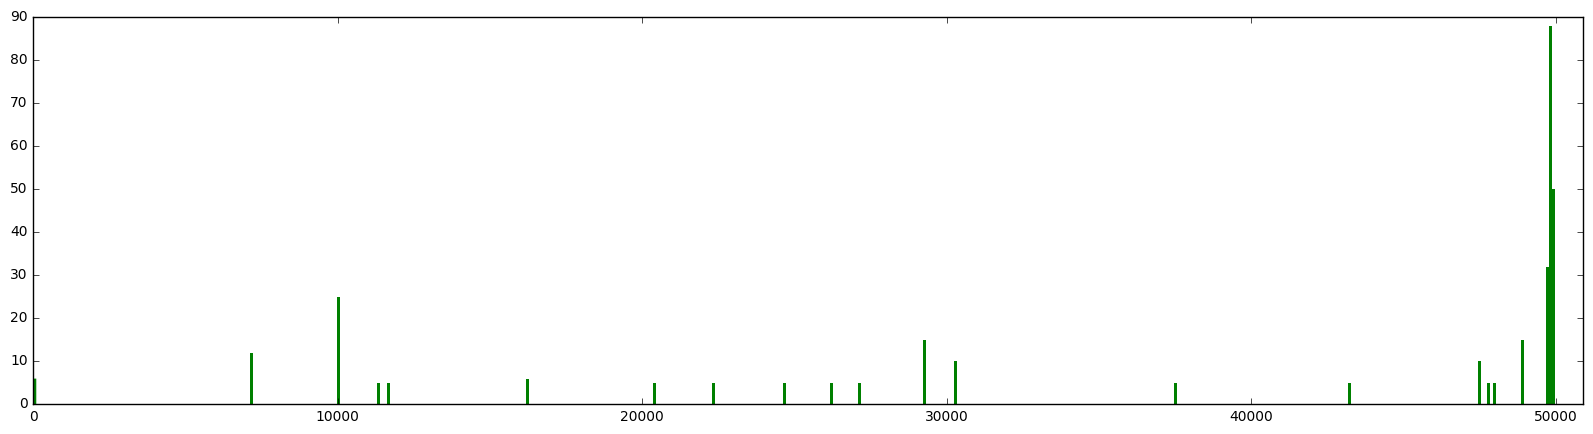

Chadwyck_British_1861_Meredith_EvanHarringtonBy


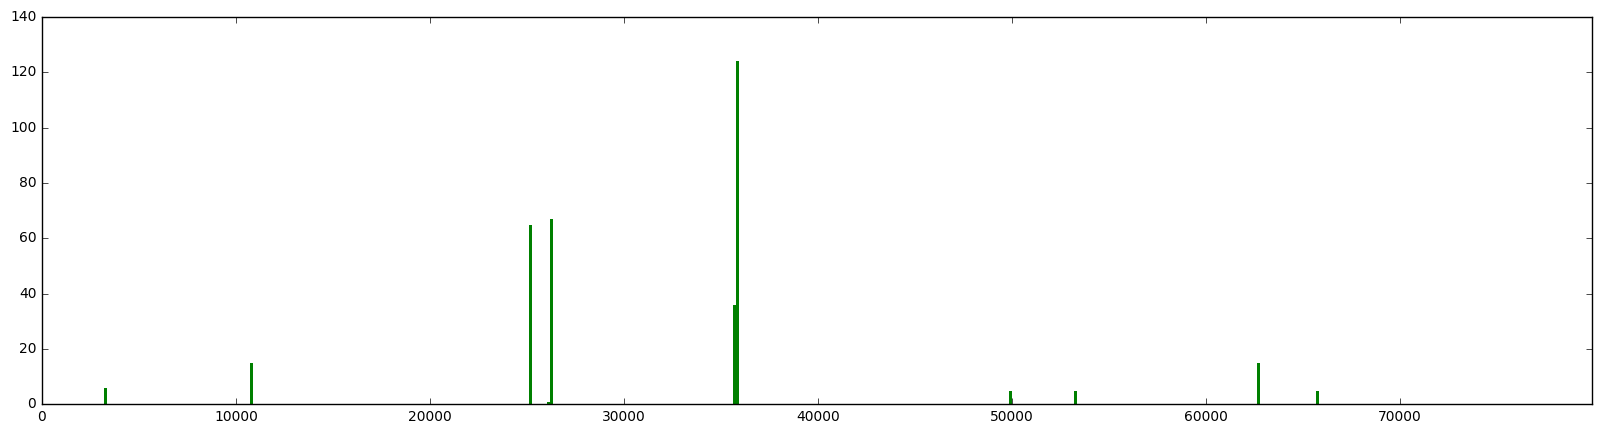

Chadwyck_British_1795_Fenwick_SecresyOrThe


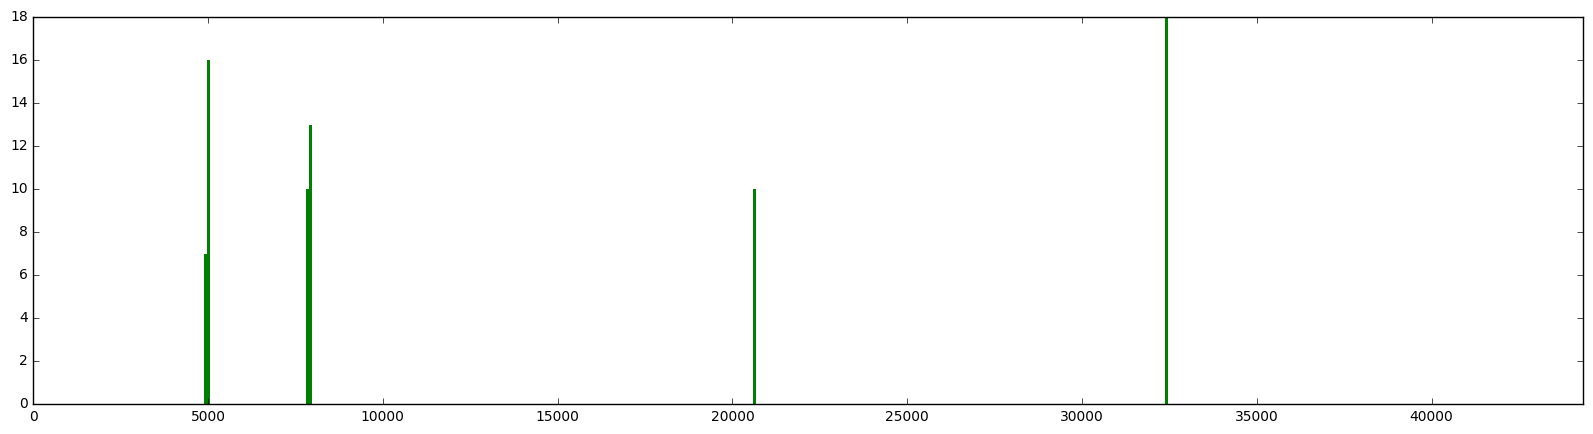

Chadwyck_British_1861_Thackeray_LoveltheWidower


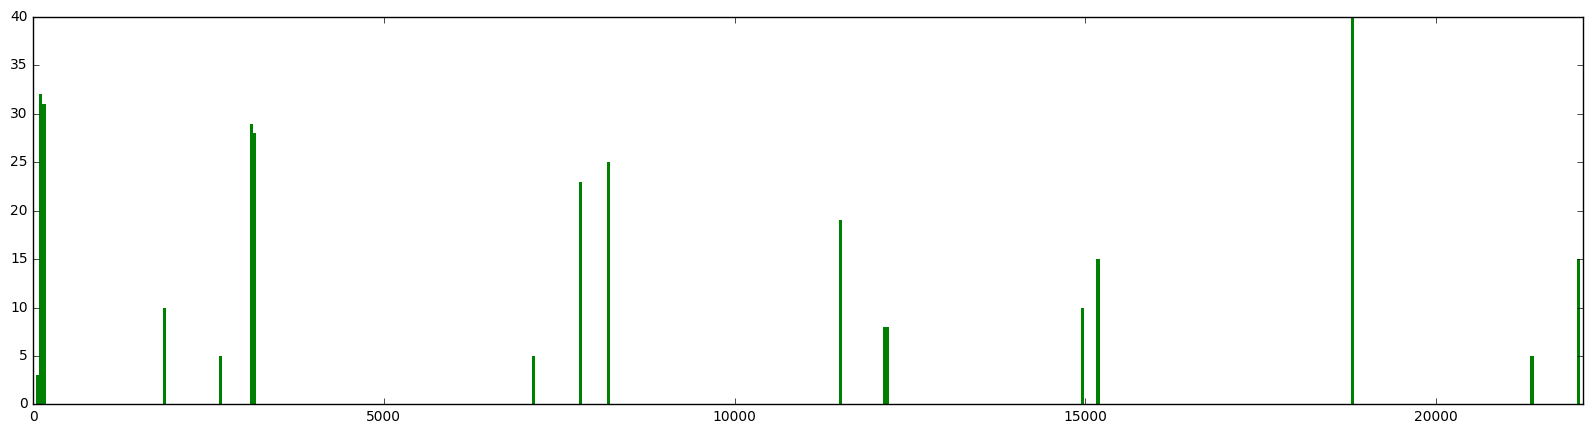

Chadwyck_British_1894_Somerville_TheRealCharlotte


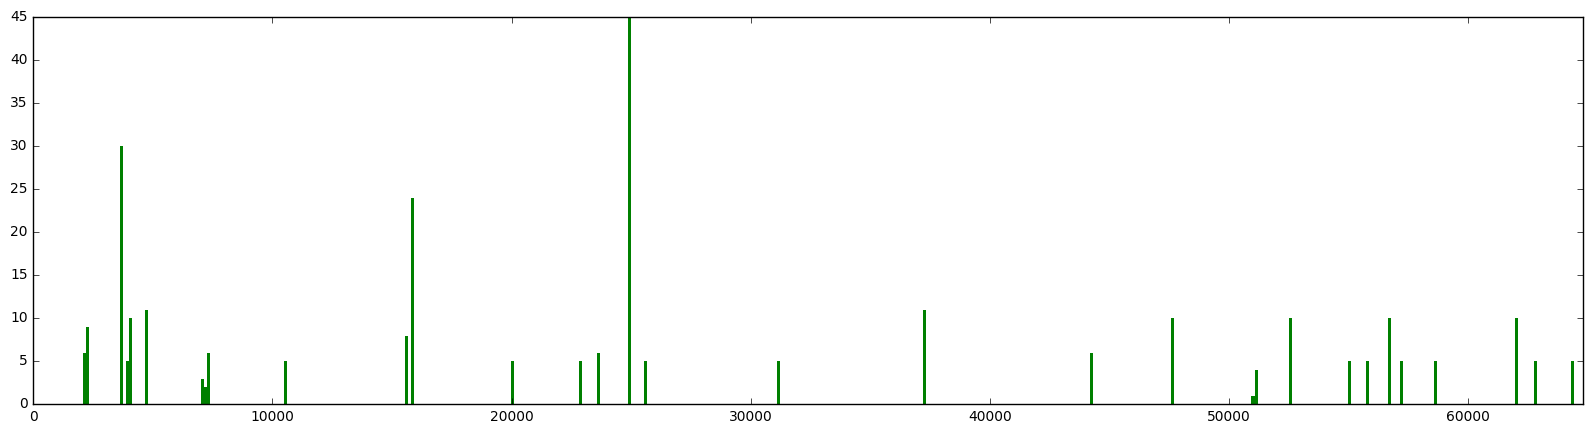

Chadwyck_British_1840_Trollope_TheLifeand


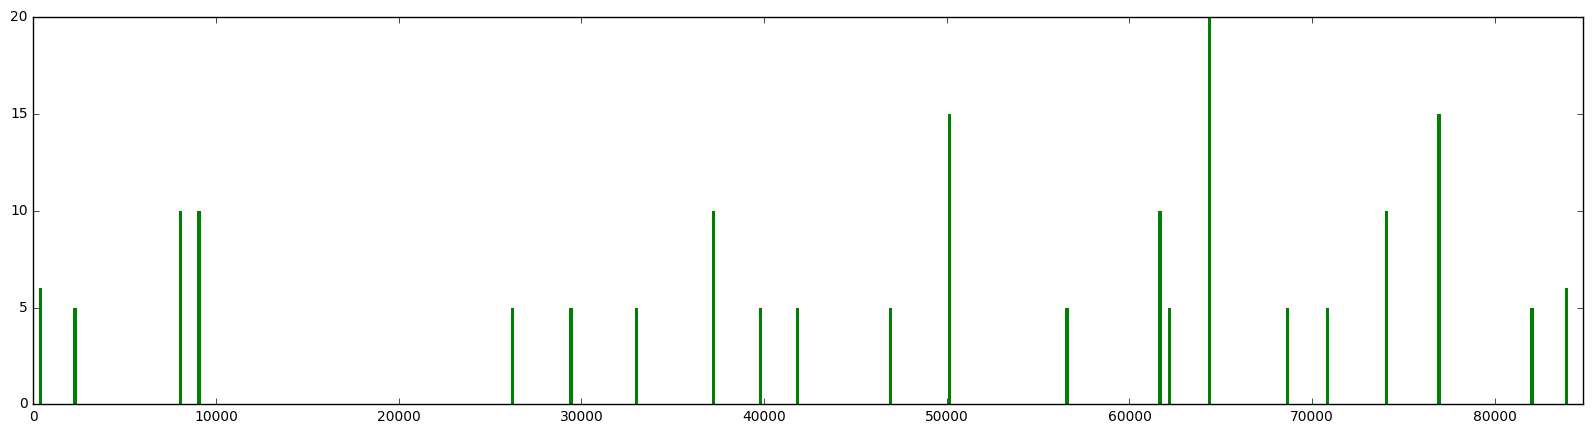

Chadwyck_British_1886_Stevenson_KidnappedbeingMemoirs


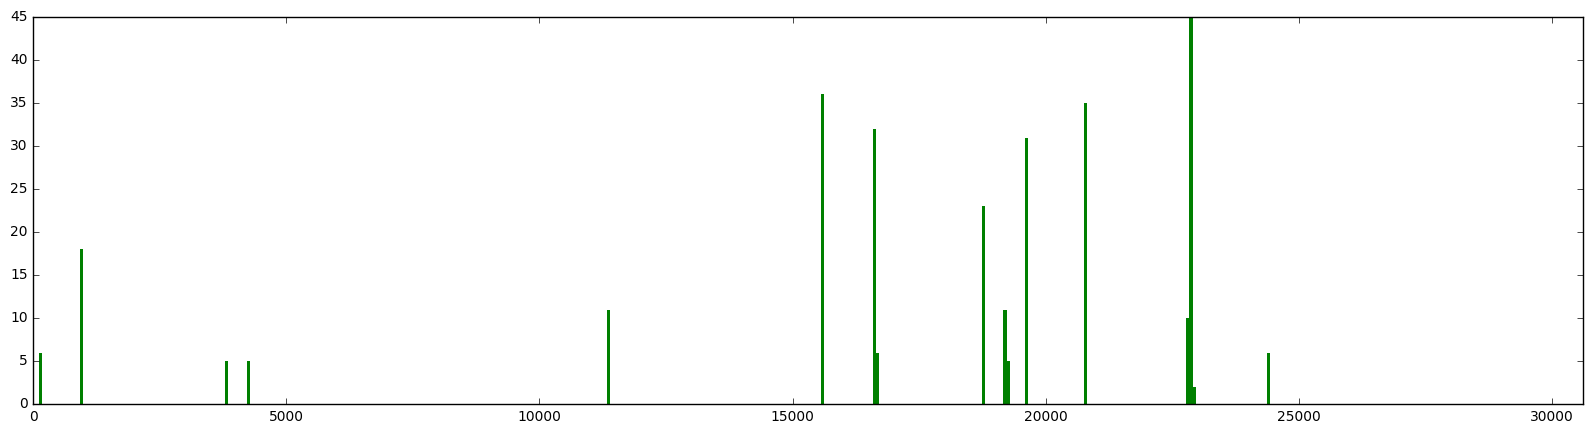

Chadwyck_British_1876_Meredith_BeauchampCareerBy


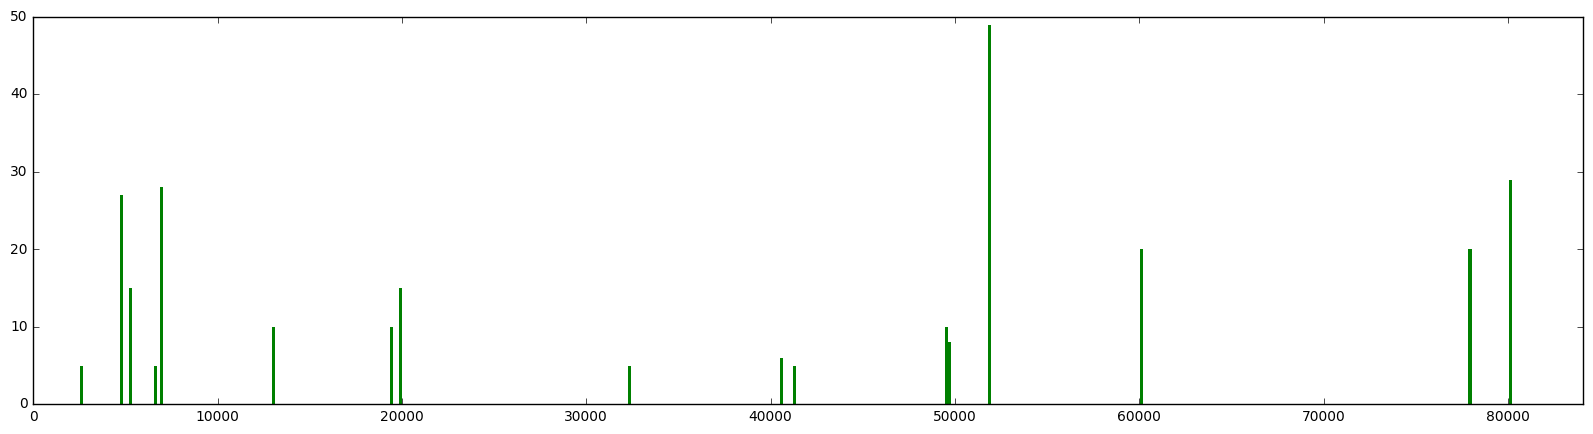

Chadwyck_British_1859_Meredith_TheOrdealof


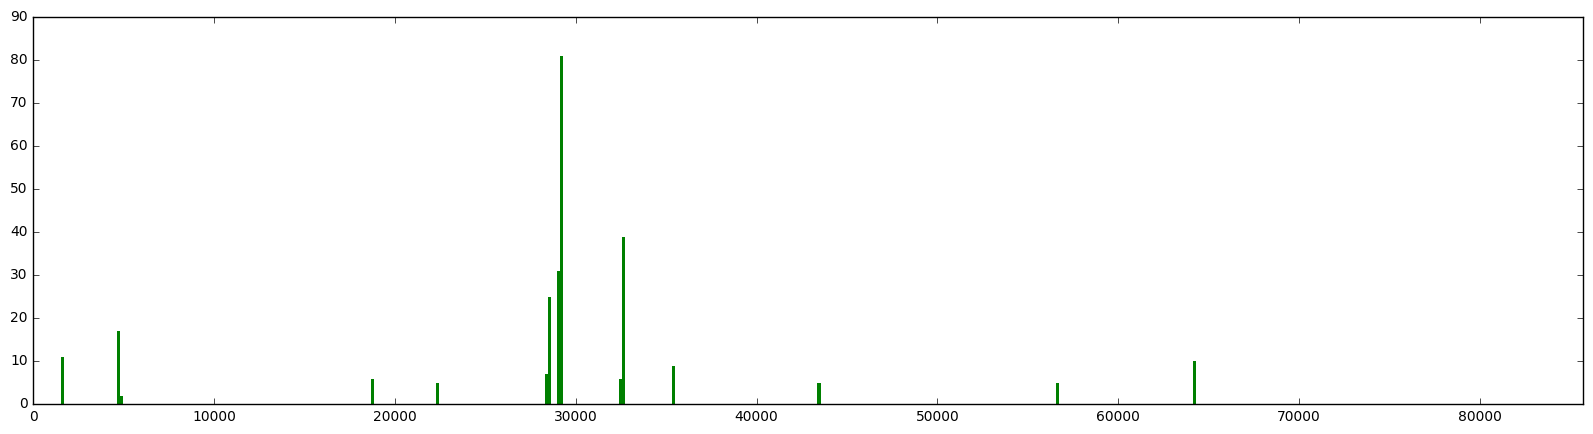

Chadwyck_British_1866_Carroll_AliceAdventuresin


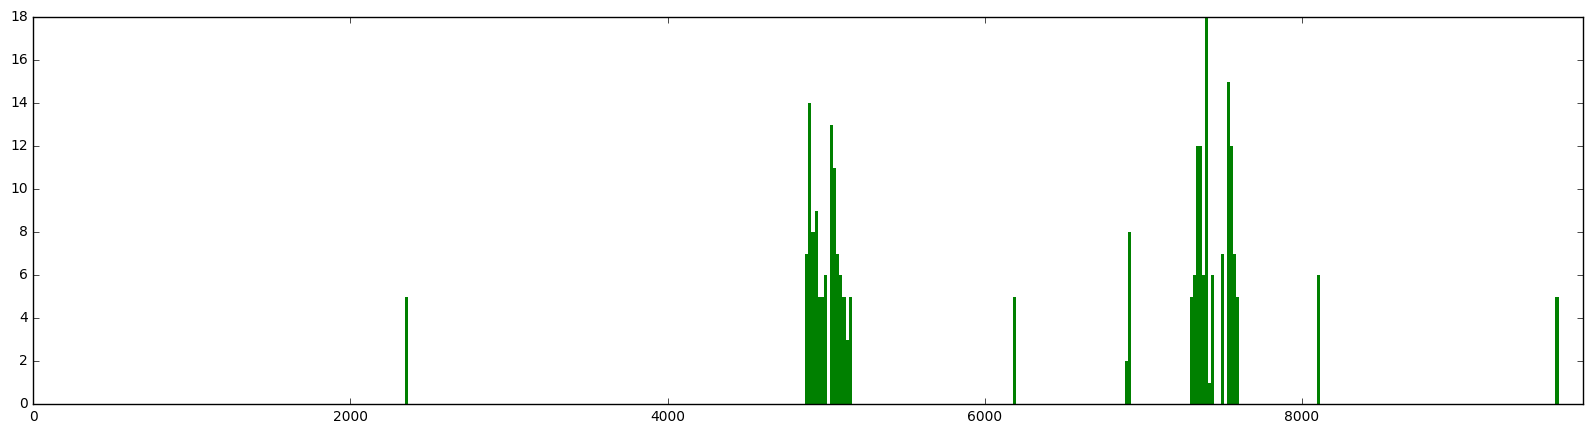

Chadwyck_British_1877_Sewell_BlackBeautyHis


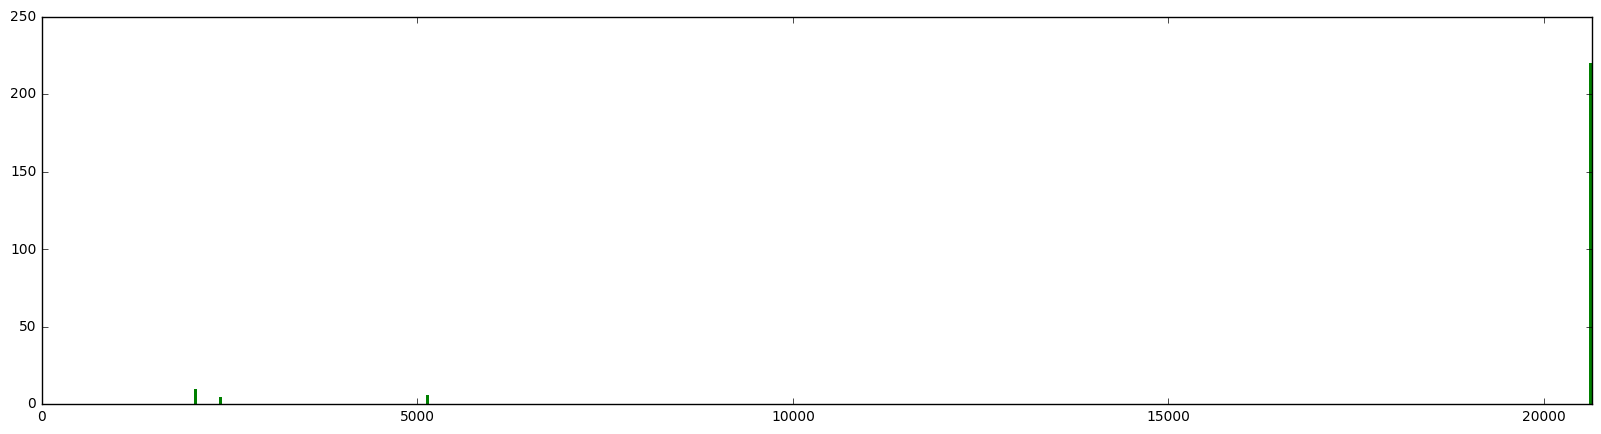

Chadwyck_Irish_1823_M'Henry_TheWildernessor


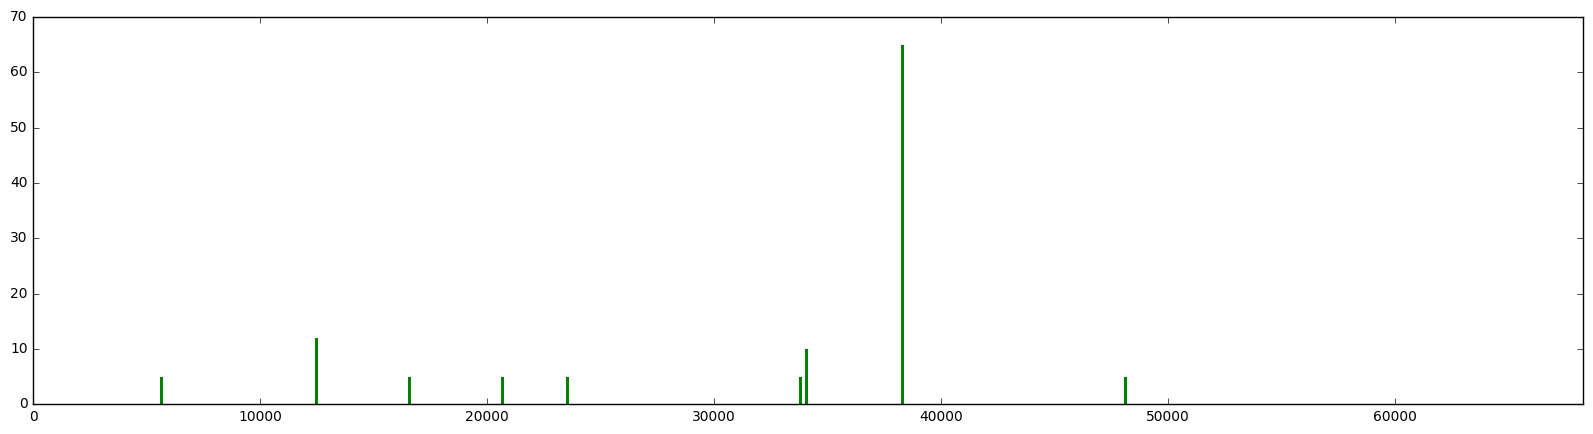

Chadwyck_British_1882_Jefferies_BevisTheStory


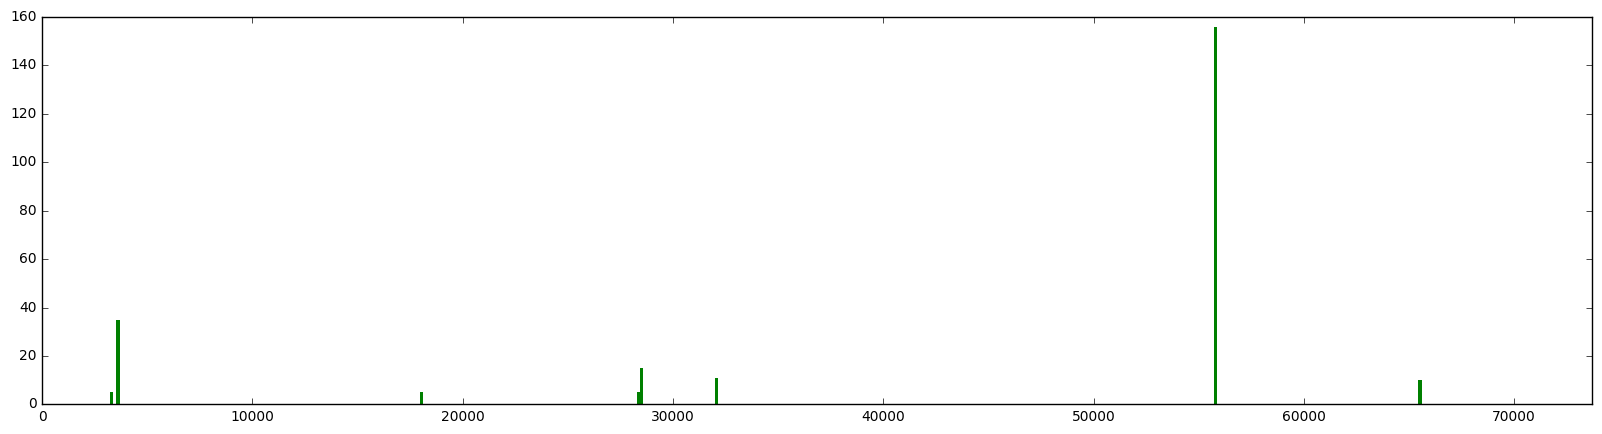

Chadwyck_British_1883_Stevenson_TreasureIslandBy


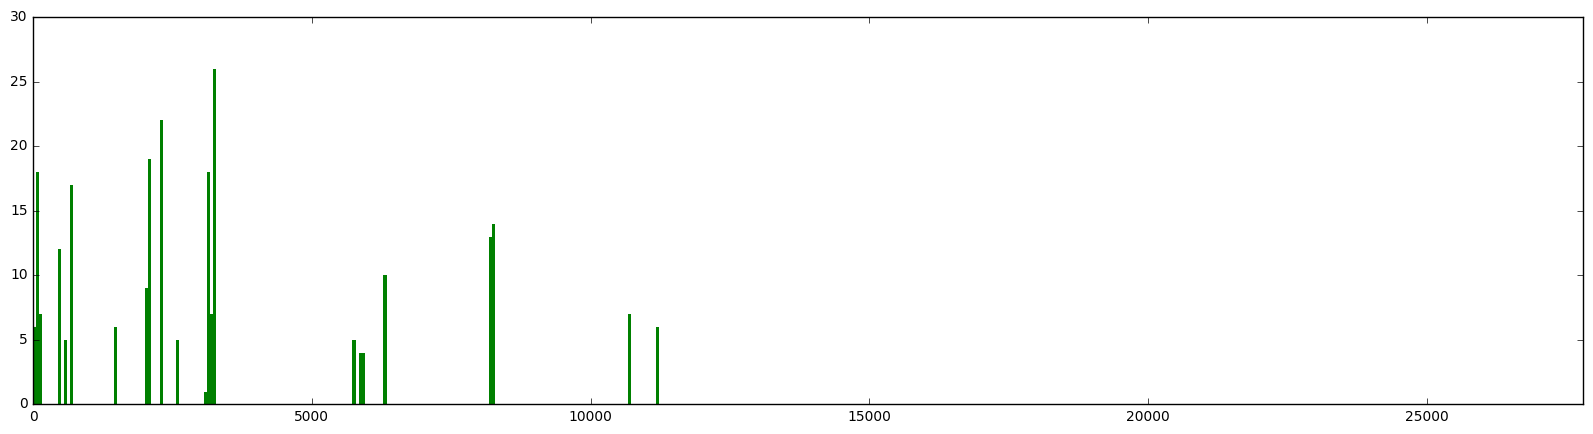

Chadwyck_British_1871_MacDonald_AttheBack


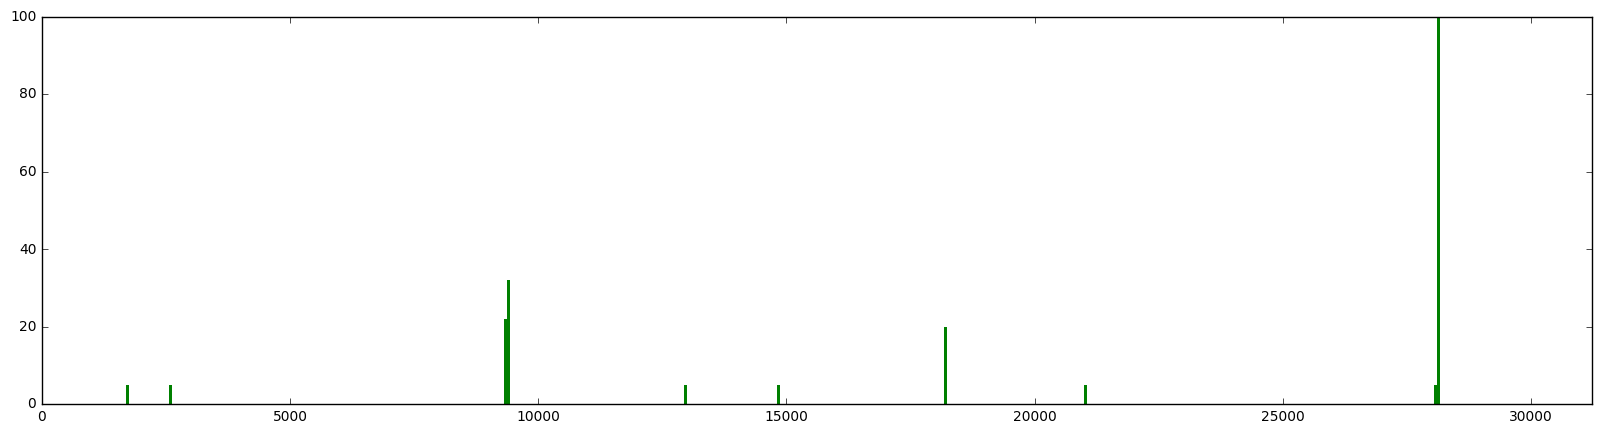

Chadwyck_British_1886_Burnett_LittleLordFauntleroy


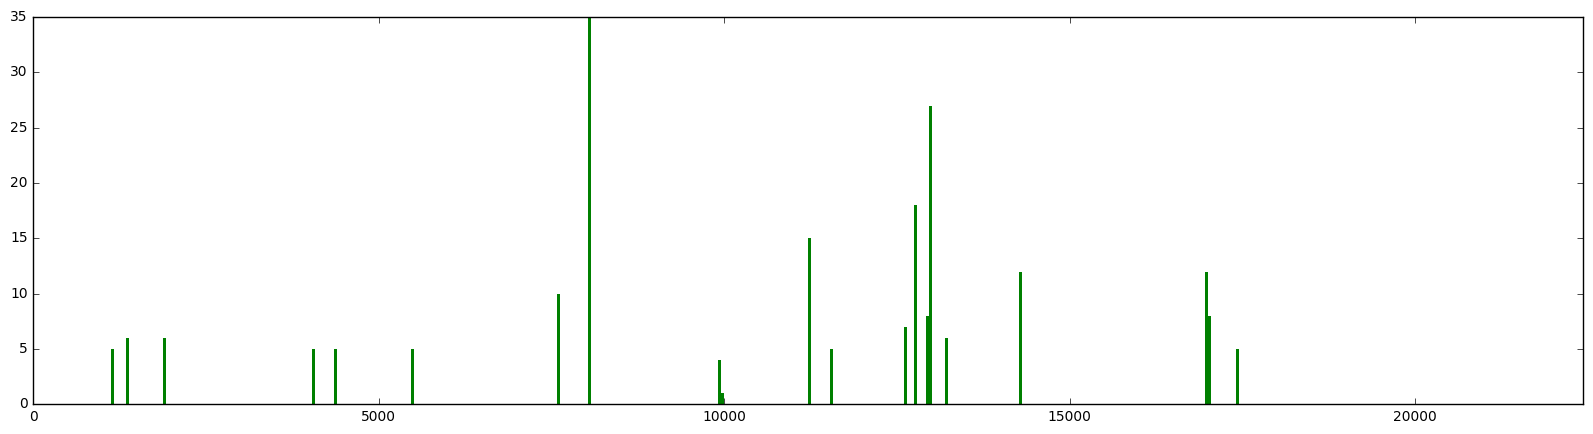

Chadwyck_British_1893_Gissing_TheOddWomen


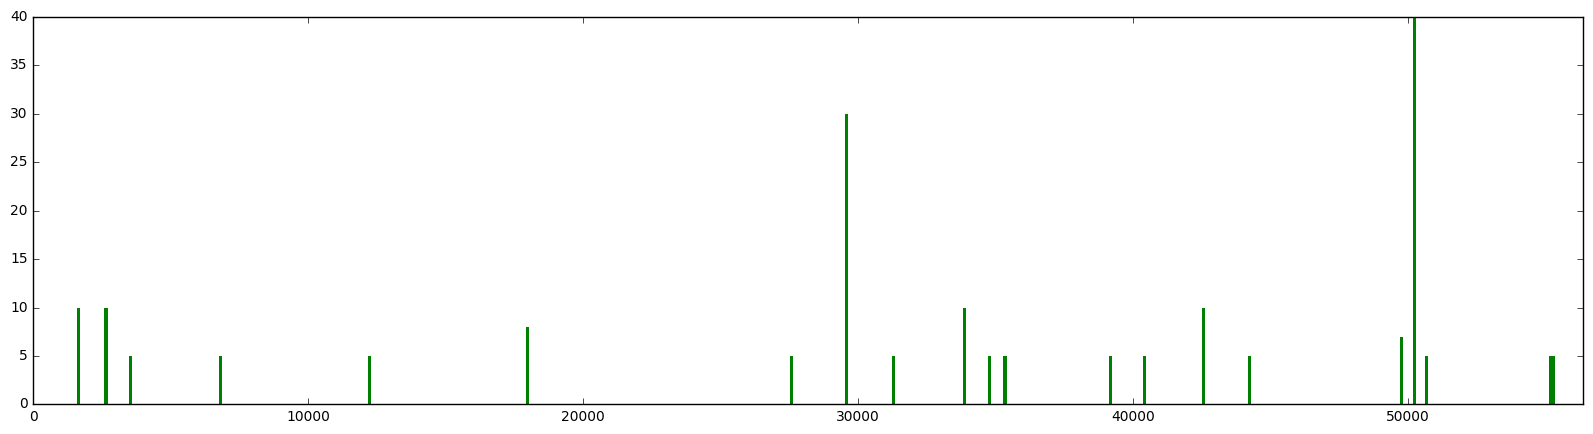

Chadwyck_British_1885_Jefferies_AfterLondonor


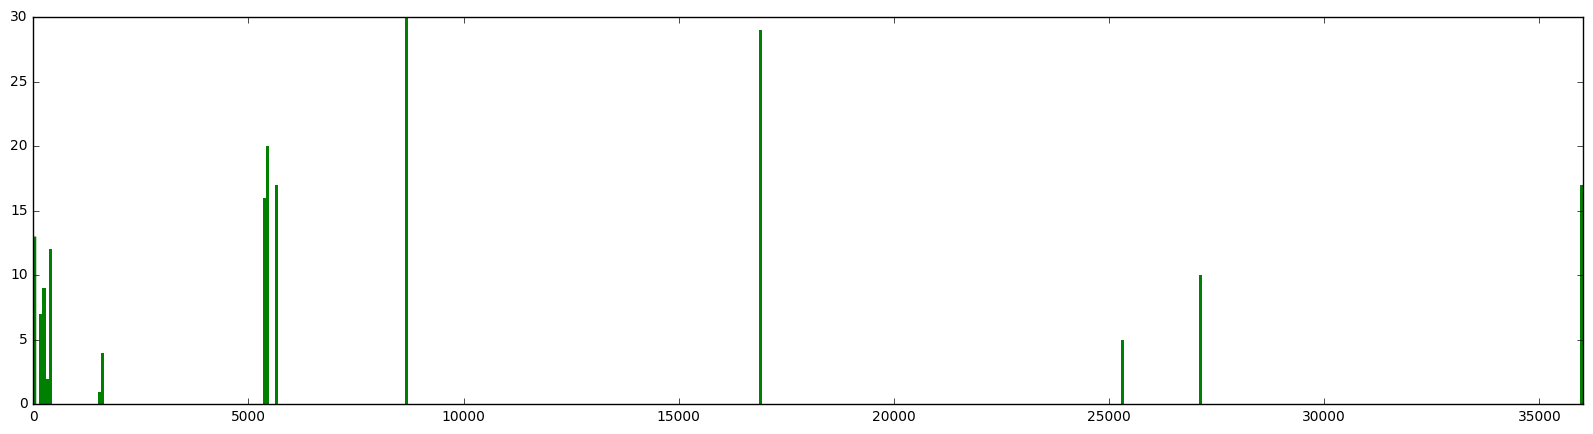

Chadwyck_British_1799_Hays_TheVictimof


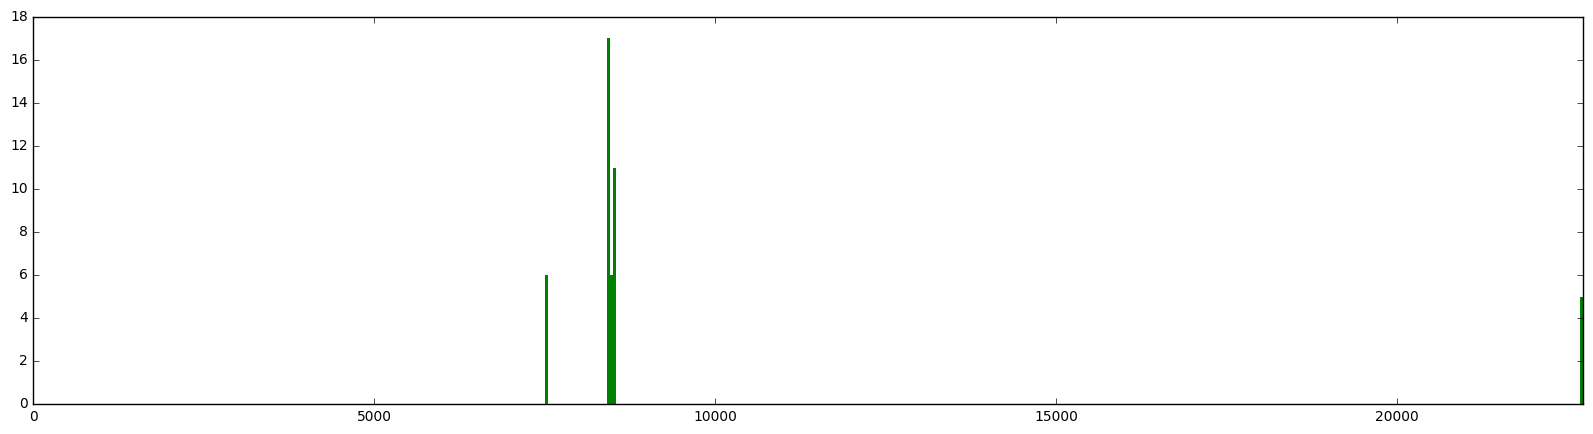

Chadwyck_British_1890_Doyle_TheSignof


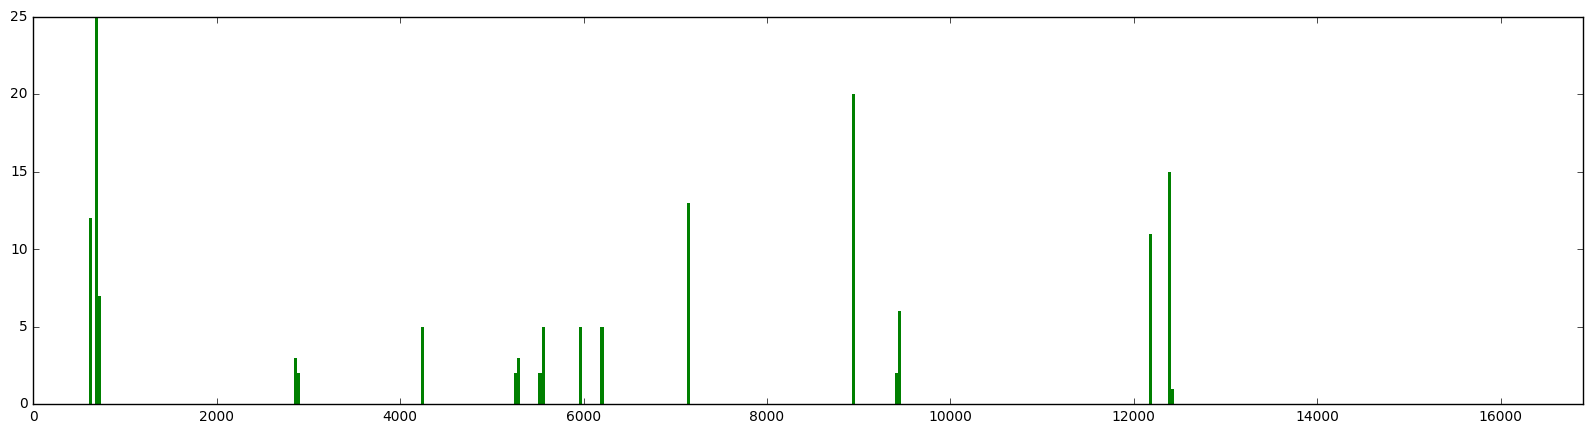

Chadwyck_British_1806_Dacre_ZofloyaorThe


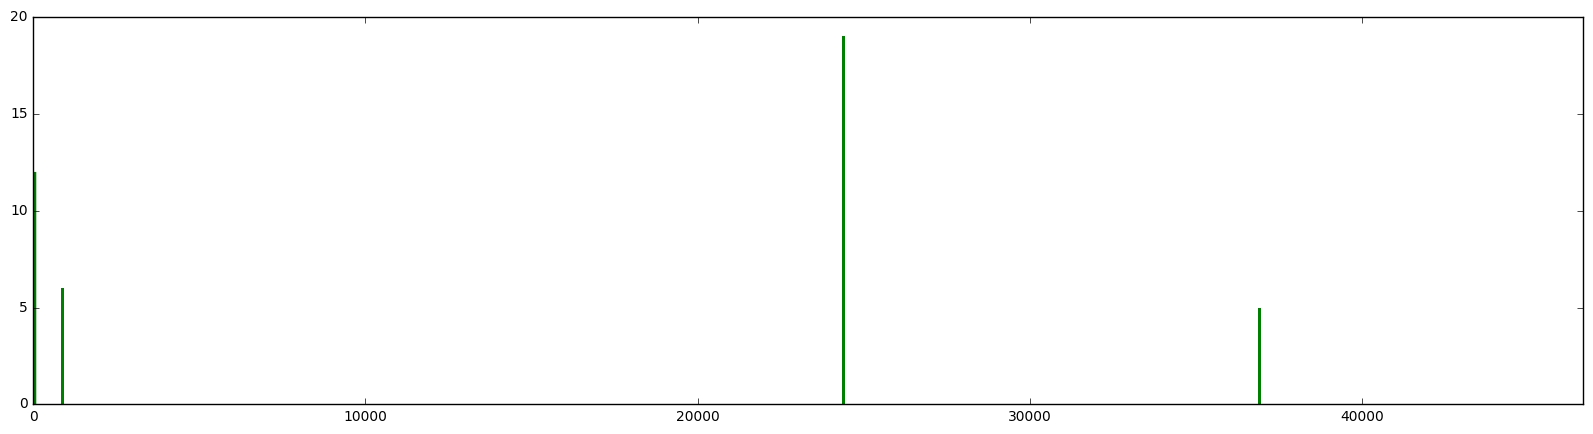

Chadwyck_British_1893_Stevenson_IslandNightsEntertainments


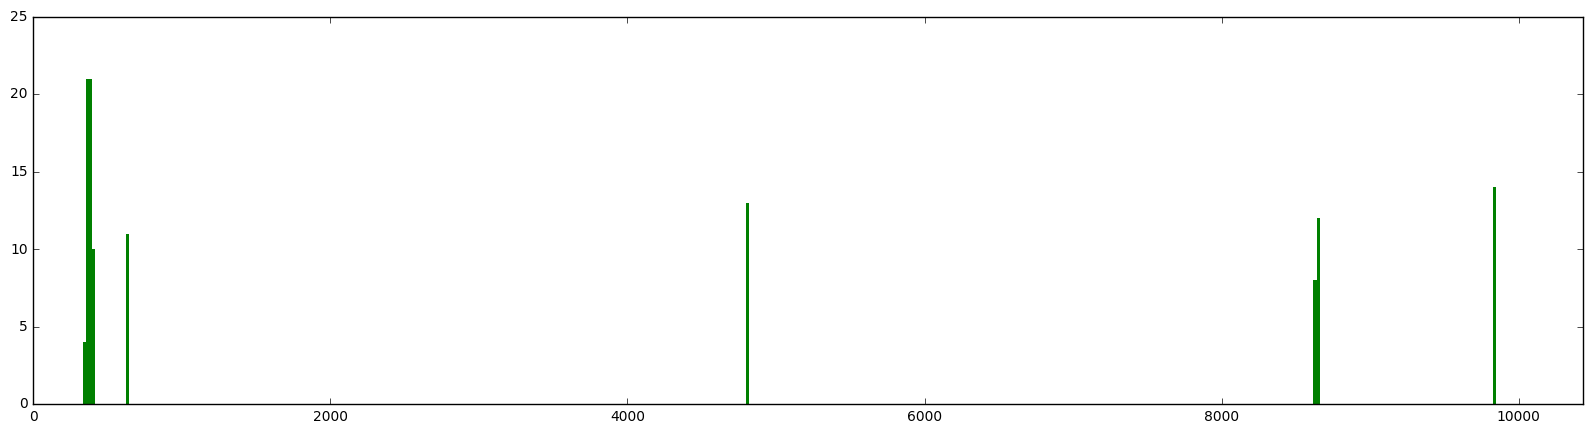

Chadwyck_British_1872_MacDonald_ThePrincessAnd


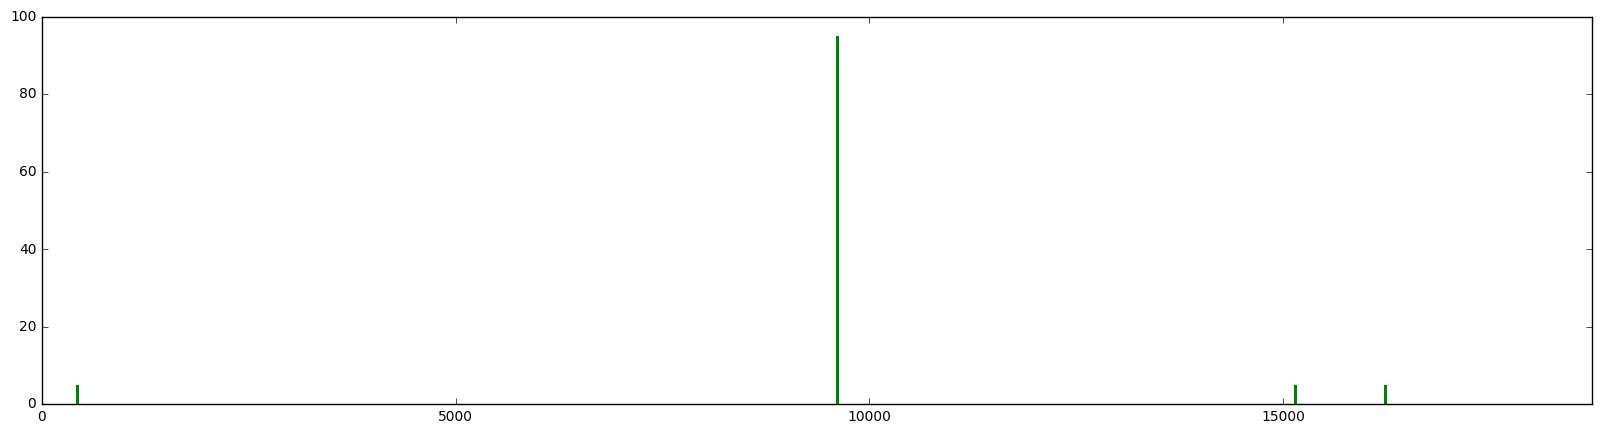

Chadwyck_British_1872_Carroll_ThroughtheLooking-Glass


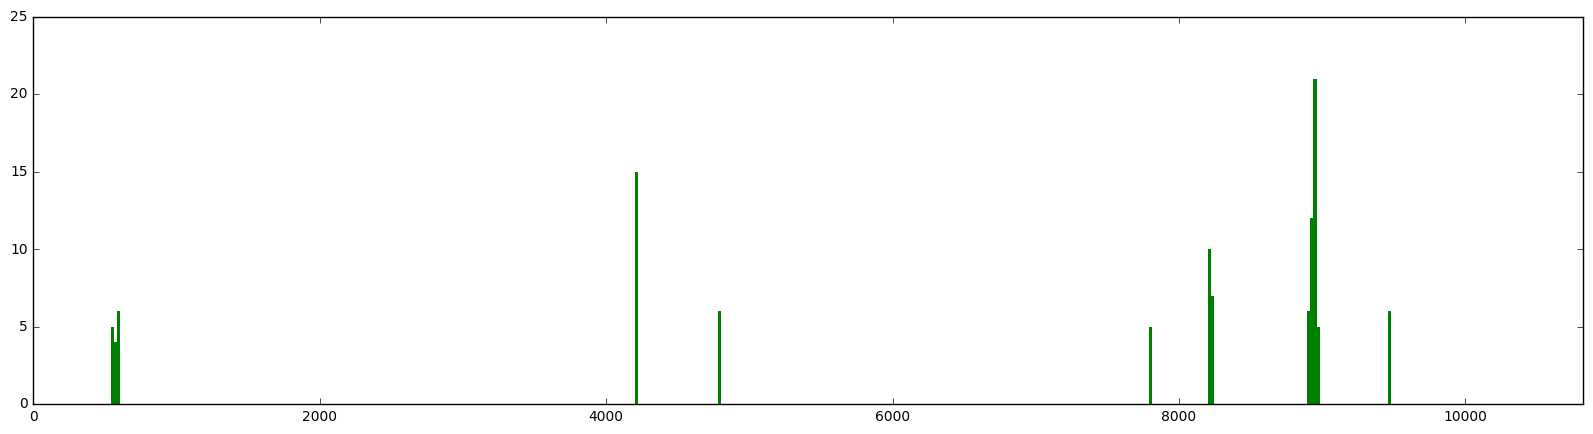

Chadwyck_British_1814_Barrett_TheHeroineOr


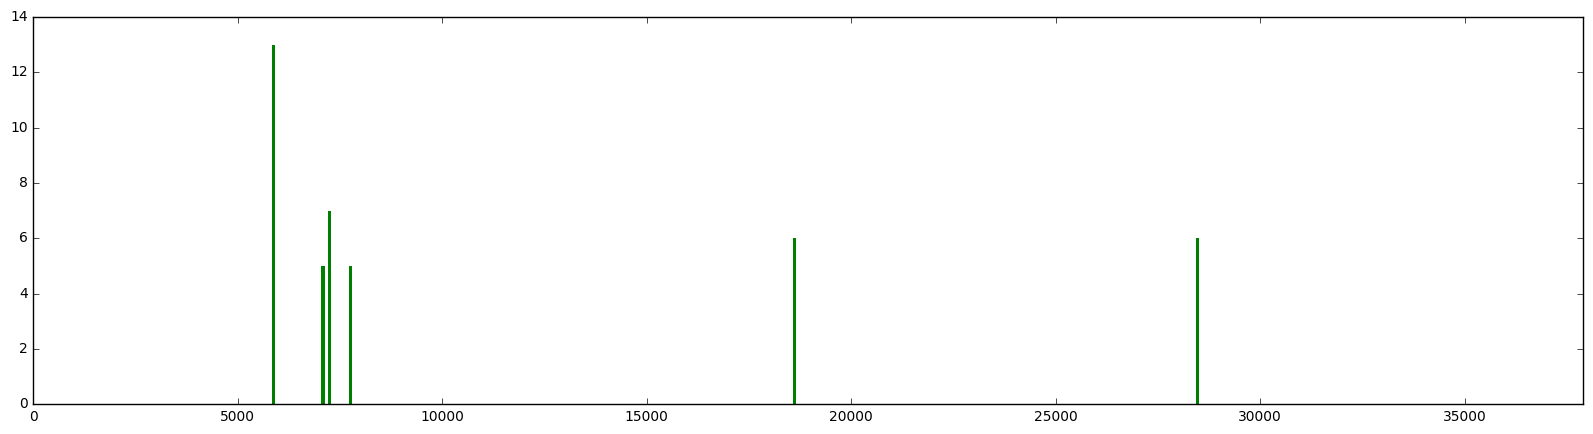

Chadwyck_British_1810_Shelley_ZastrozziARomance


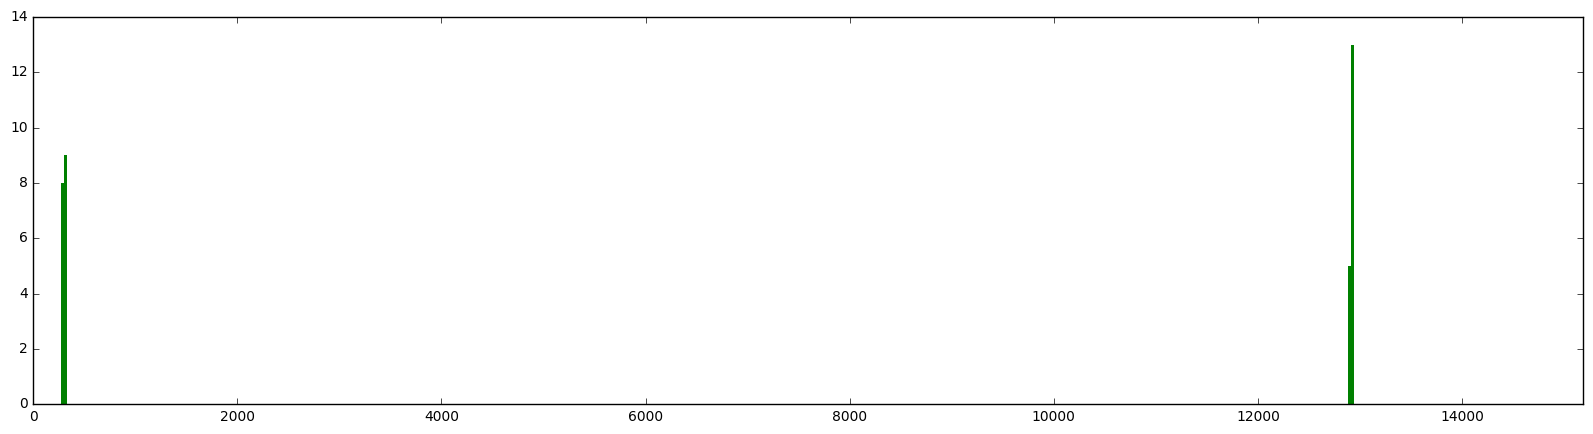

Chadwyck_British_1788_Smith_EmmelinetheOrphan


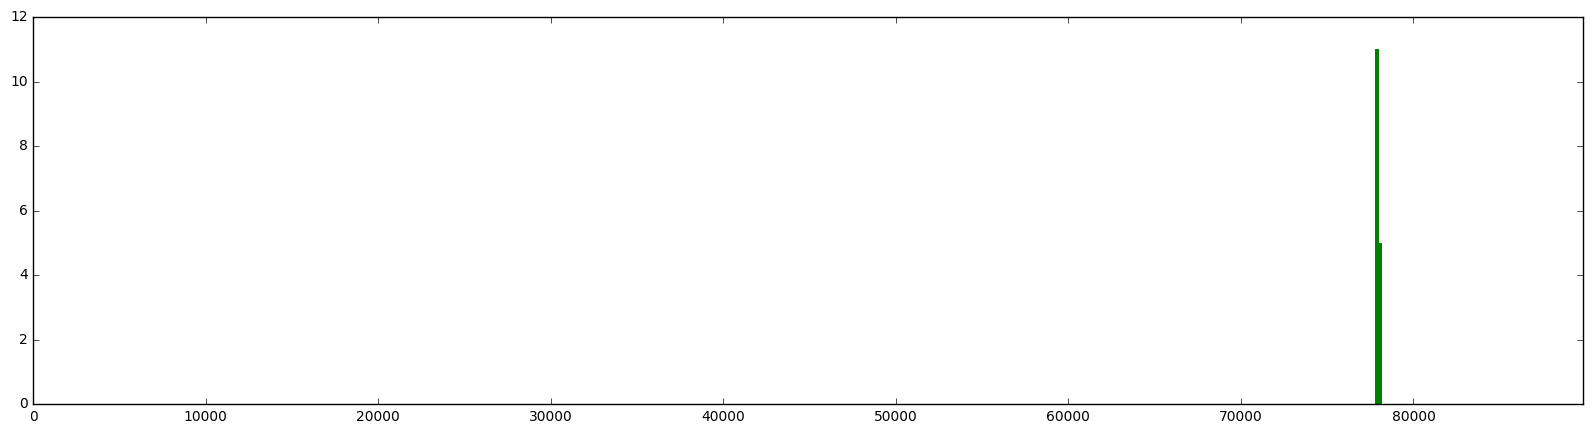

Chadwyck_Irish_1831_M'Henry_MeredithorThe


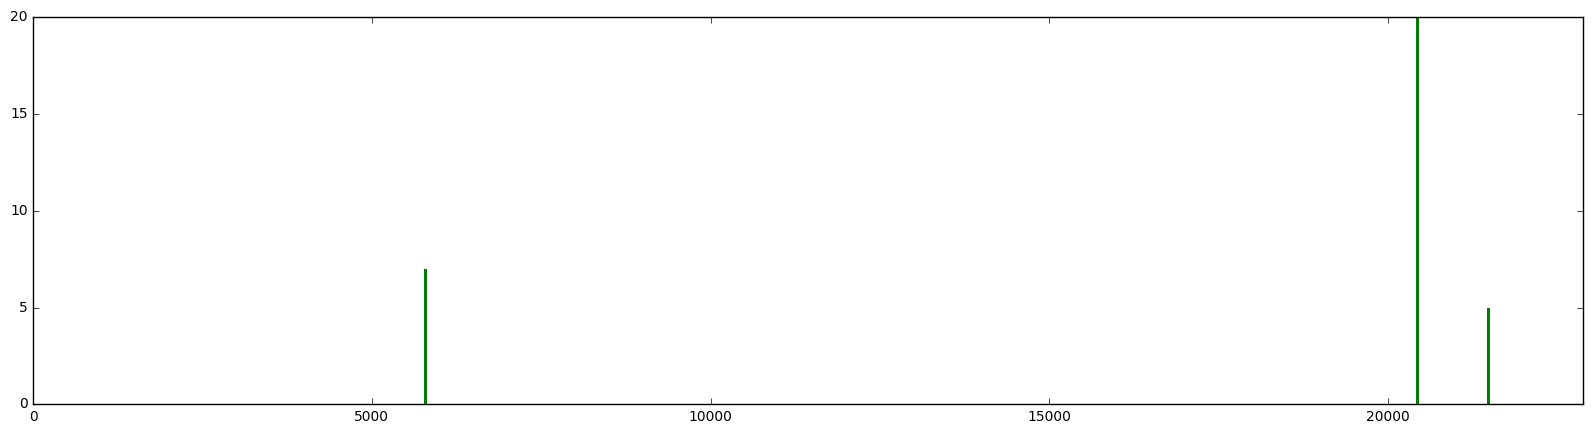

Chadwyck_British_1892_Grossmith_TheDiaryof


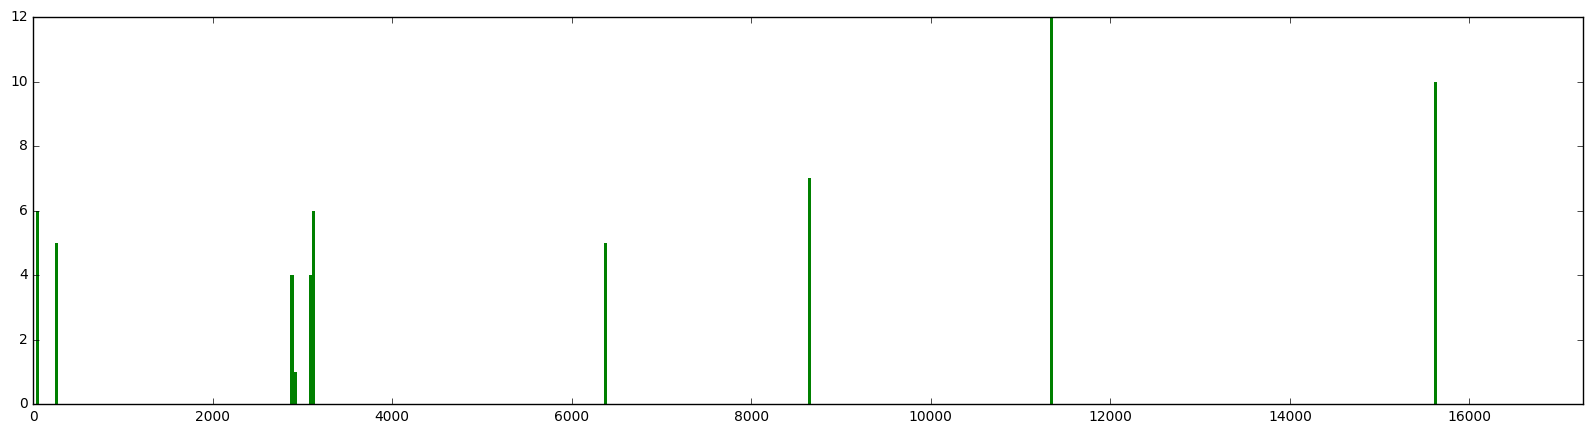

Chadwyck_British_1796_Lewis_TheMonkA


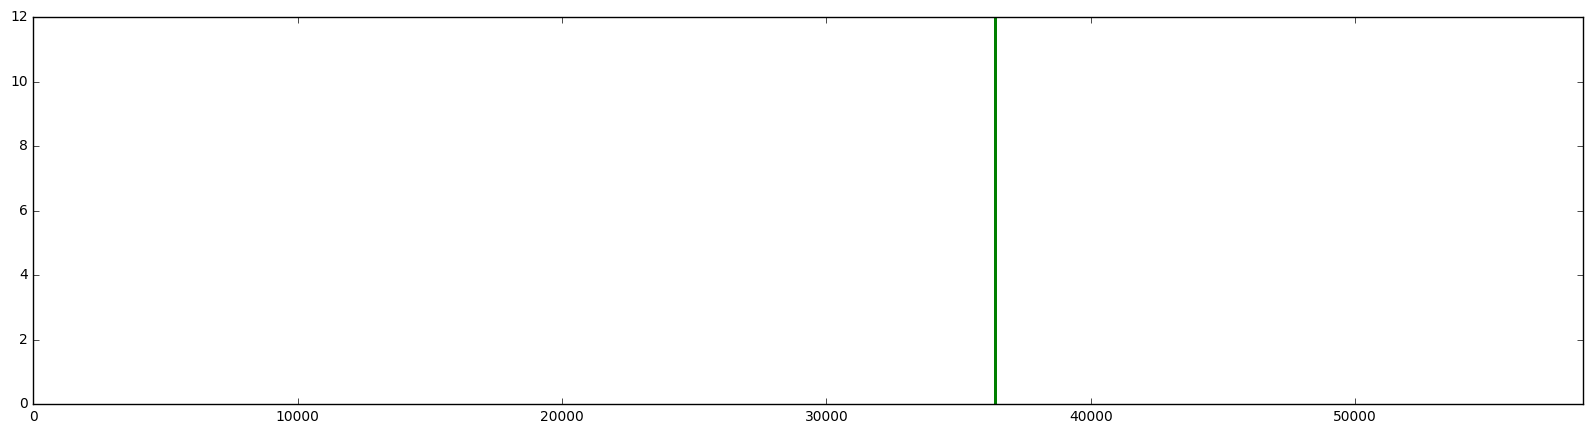

Chadwyck_Irish_1830_M'Henry_TheBetrothedof


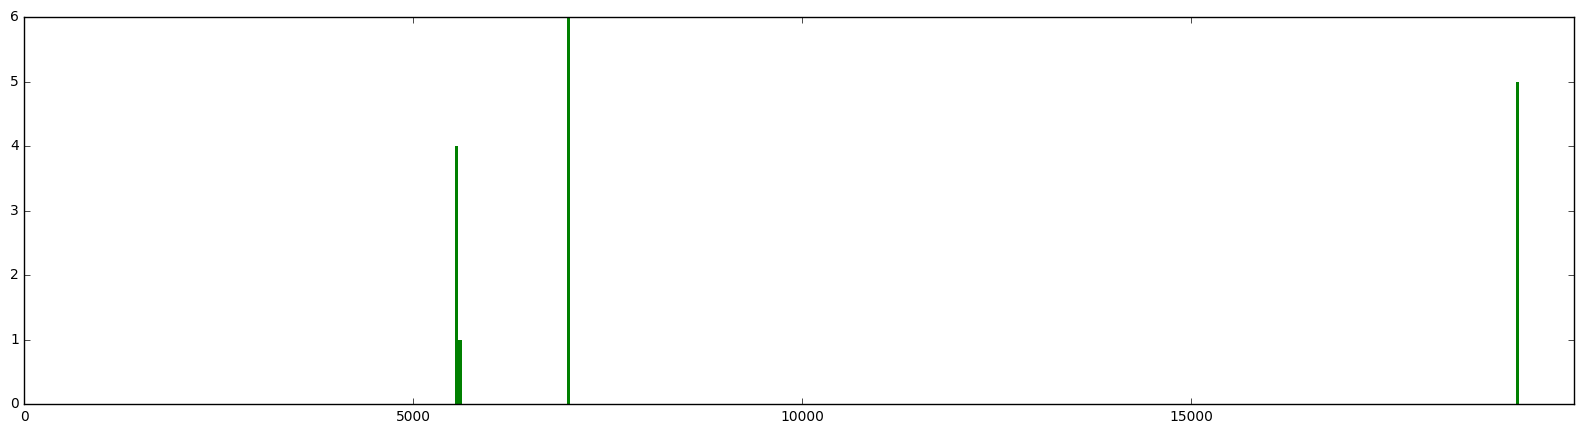

Chadwyck_British_1811_Shelley_StIrvyneor


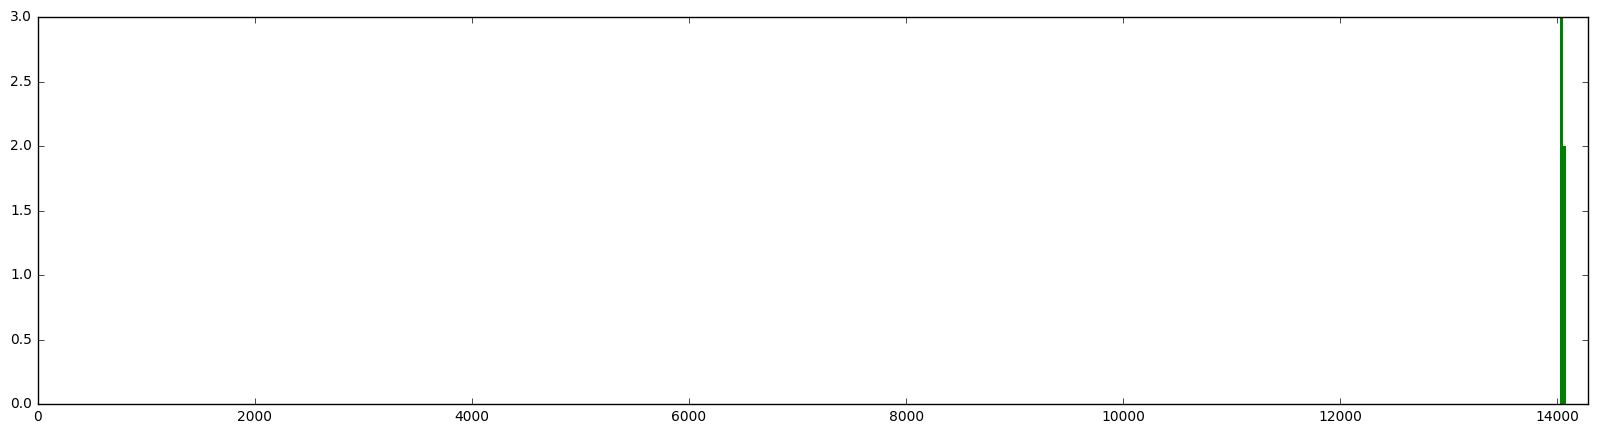

In [6]:
for slug, _ in scores:
    plot_chadh_histogram(slug)